In [97]:
import pandas as pd
df = pd.read_table(r"C:\Users\Administrator\Desktop\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only.txt", delimiter = '\t')#, nrows=2)


In [98]:
print(df.head())

                       IB     plate well   C15   C25   D15   D25   R15   R25
0  AGTTAACTAAGTACGGGATTGG  plate001  A02  1739  1521  1682  1733   641  1572
1  ACTTAGGTGCTGTTACGGCTAG  plate001  A04  3131  1540  1622  2899   857  1647
2  CGATTTGGGTTTTATCATCCCG  plate001  A04  1635   670  1439  3013   787  1455
3  CGTACCAGGAAGTCAGAGTCCG  plate001  A04  2993  1581  1011  2151   738  1546
4  GACCTACGAGGTACTGGTGAGG  plate001  A05  1893  2035  1413  3112  1126  1779


In [99]:
dfclean2 = df.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean2 = dfclean2[~dfclean2.index.isin(range(33482, 33797))] #122
dfclean2 = dfclean2[~dfclean2.index.isin(range(34747, 35652))] #126, 127, 128
dfclean2 = dfclean2[~dfclean2.index.isin(range(35930, 36501))] #130, 131
dfclean2 = dfclean2[~dfclean2.index.isin(range(36770, 37054))] #133
dfclean2 = dfclean2[~dfclean2.index.isin(range(38773, 39015))] #140
dfclean2 = dfclean2[~dfclean2.index.isin(range(39325, 39543))] #142
dfclean2 = dfclean2[~dfclean2.index.isin(range(40030, 46853))] #145, 146
dfclean2 = dfclean2[~dfclean2.index.isin(range(46853, 49718))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean2 = dfclean2[~(dfclean2.index >= 111952)] #the rest
print(dfclean2)
dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean25.xlsx', index=False)

                            IB     plate well   C15   C25   D15    D25   R15  \
0       AGTTAACTAAGTACGGGATTGG  plate001  A02  1739  1521  1682   1733   641   
1       ACTTAGGTGCTGTTACGGCTAG  plate001  A04  3131  1540  1622   2899   857   
2       CGATTTGGGTTTTATCATCCCG  plate001  A04  1635   670  1439   3013   787   
3       CGTACCAGGAAGTCAGAGTCCG  plate001  A04  2993  1581  1011   2151   738   
4       GACCTACGAGGTACTGGTGAGG  plate001  A05  1893  2035  1413   3112  1126   
...                        ...       ...  ...   ...   ...   ...    ...   ...   
111947  GAGGGCGGTATTATTTGGTGGA  plate409  P02     6     6     3      9     4   
111948  GAGGGCGTTATTATTTGGTGGA  plate409  P02  2087  2156  1848   2297  1056   
111949  CCTTGGGTTAATCGGGGTGTAC  plate409  P03  1312   877   321   1613  1122   
111950  GCATCTTGCTGCGTAGACAAAA  plate409  P04  2297  2429  2586   9085  1226   
111951  CTGGTCATCGTGTGTTCTCAGT  plate409  P05  3247  3098   823  10776  1635   

         R25  
0       1572  
1       1

In [100]:
summary_df2 = pd.DataFrame(columns=['plate', 'C15', 'C25', 'D25', 'D15', 'R15', 'R25'])
for plate, group in dfclean2.groupby('plate'):
    sums = group[['C15', 'C25', 'D25', 'D15', 'R15', 'R25']].sum()
    row = {'plate': plate, 'C15': sums['C15'], 'D25': sums['D25'], 'C25': sums['C25'], 'D15': sums['D15'],  'R15': sums['R15'], 'R25': sums['R25']} #
    summary_df2 = pd.concat([summary_df2, pd.DataFrame([row])], ignore_index=True)
summary_df2 = summary_df2.drop(index=range(418, len(summary_df2)))
# Print the summary dataframe
display(summary_df2)
summary_df2.to_excel('C:/Users/Administrator/Desktop/summary5.xlsx', index=False)

plate     C15     C25     D25     D15     R15     R25
0    plate001  379709  349954  536222  285455  160881  335094
1    plate002  358144  326336  497456  266774  146570  303694
2    plate003  358808  327455  482716  270007  145853  305168
3    plate004  448901  397904  610421  320434  183086  382947
4    plate005  318971  294435  465688  246999  134811  290901
..        ...     ...     ...     ...     ...     ...     ...
364  plate405  313318  293042  477050  239910  129740  297789
365  plate406  336387  307353  491695  233124  139563  306615
366  plate407  396065  364070  589220  311856  163281  359265
367  plate408  325816  284791  487513  256001  132820  312696
368  plate409  350719  328405  539697  260580  154038  337295

[369 rows x 7 columns]

In [11]:
df.to_excel('C:/Users/Administrator/Desktop/table.xlsx', index=False)
dfclean2.to_excel('C:/Users/Administrator/Desktop/table.xlsx', sheet_name='clean data', index=False)
summary_df2.to_excel('C:/Users/Administrator/Desktop/table.xlsx', sheet_name='summary data', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22844\1090507003.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


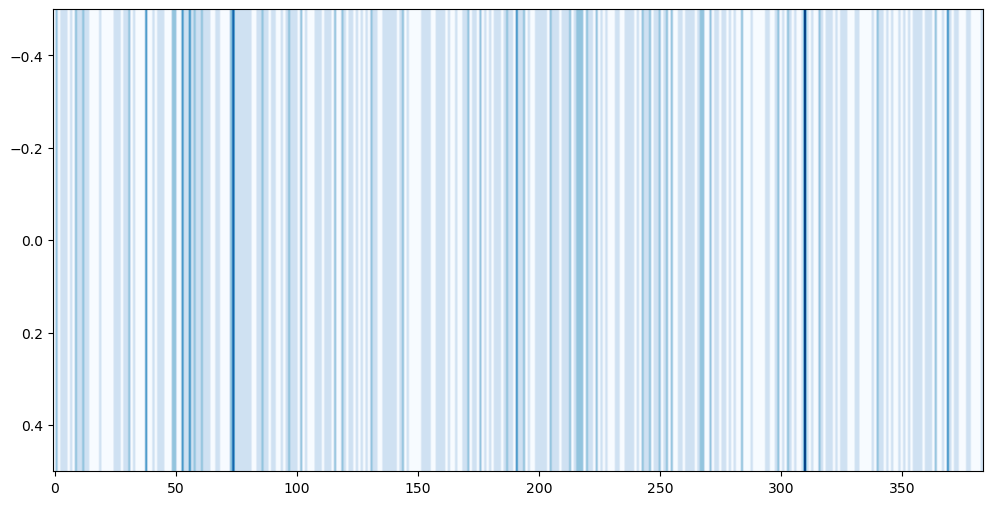

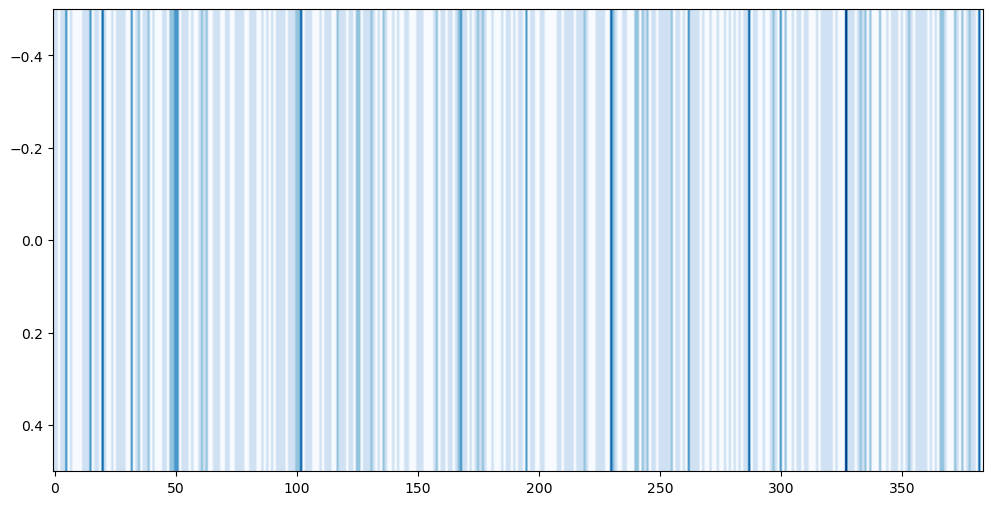

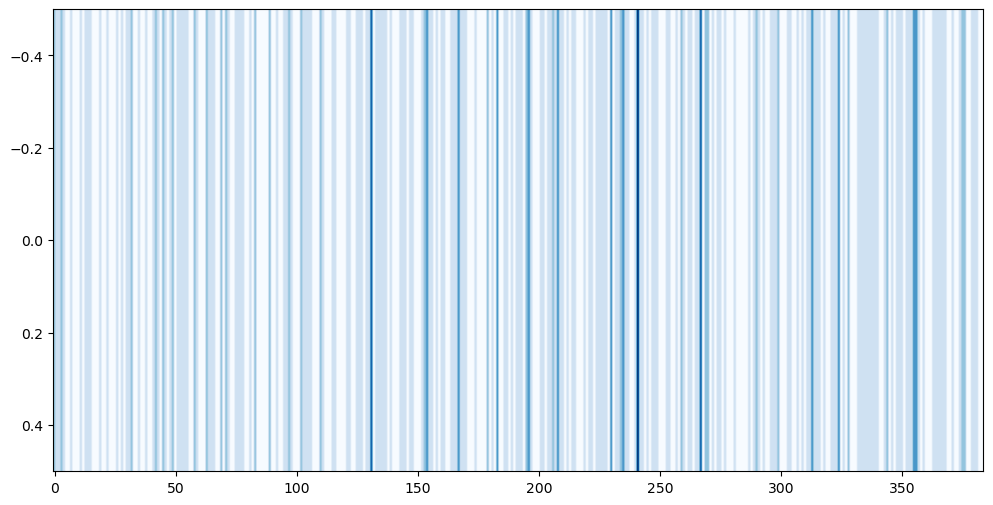

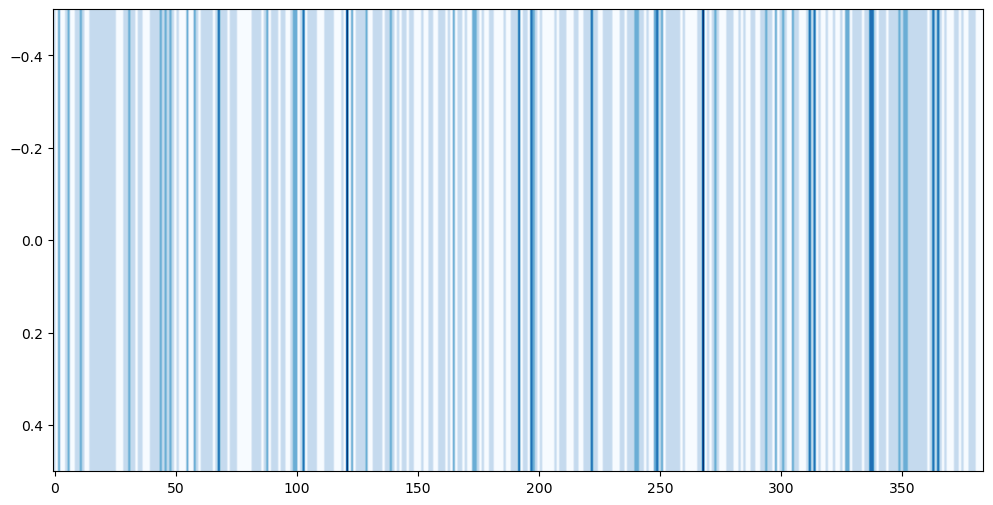

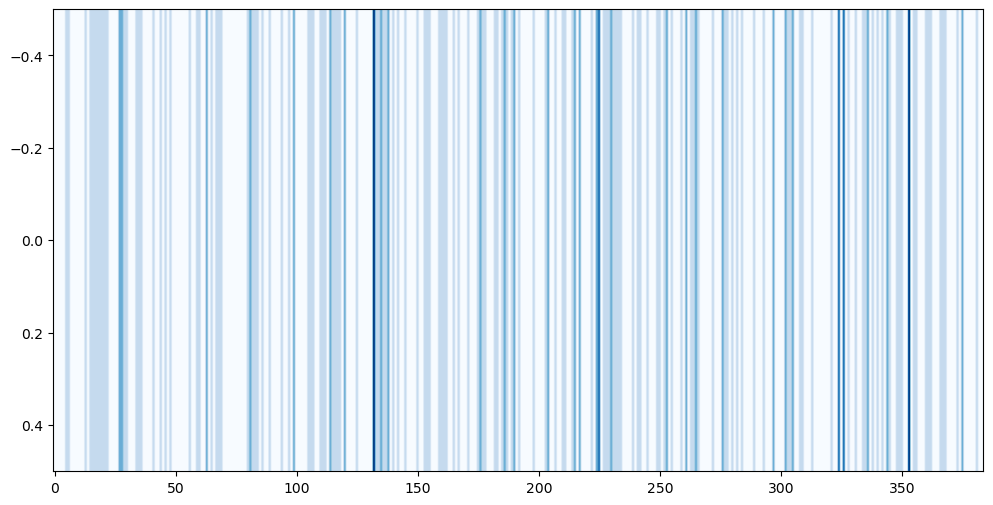

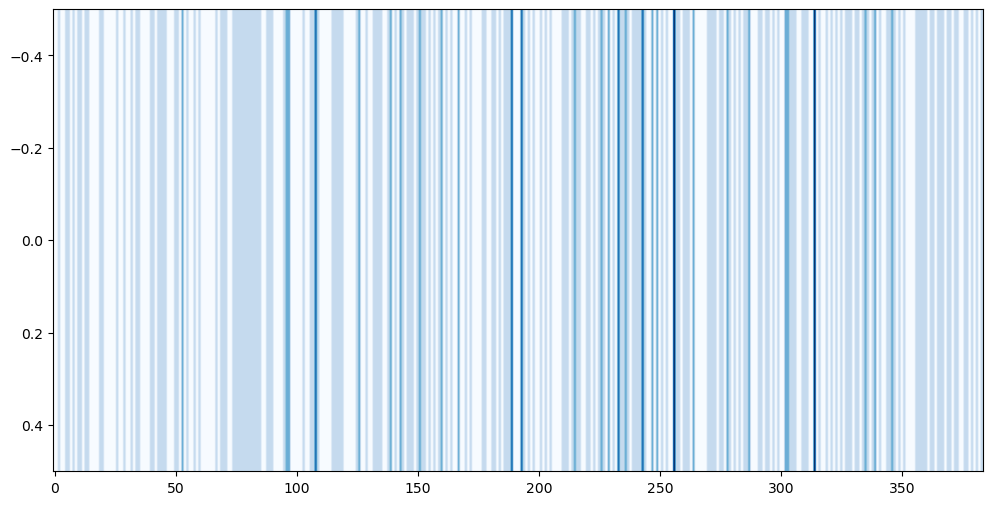

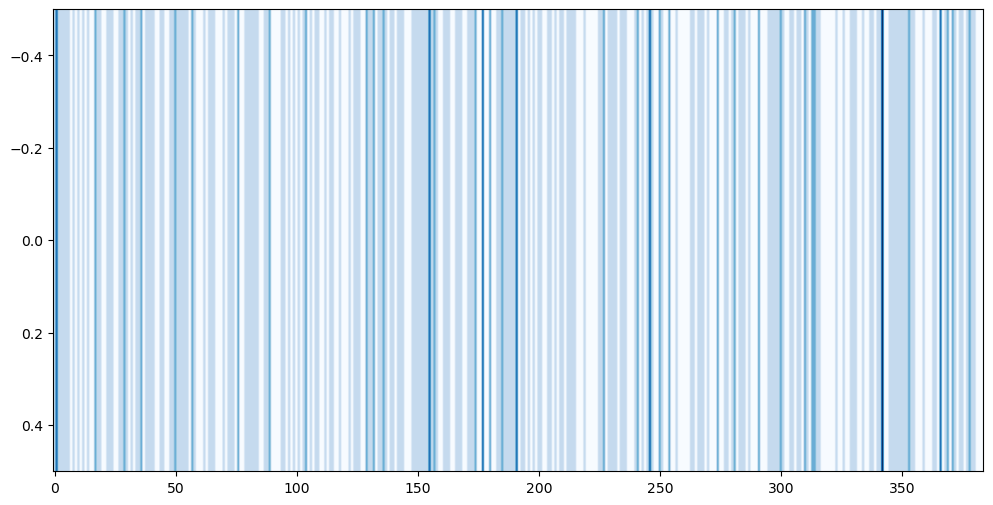

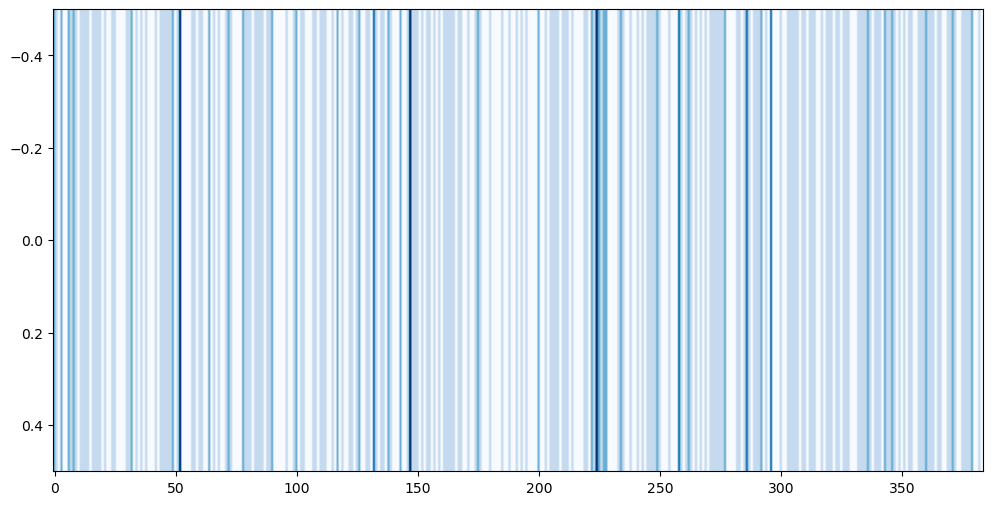

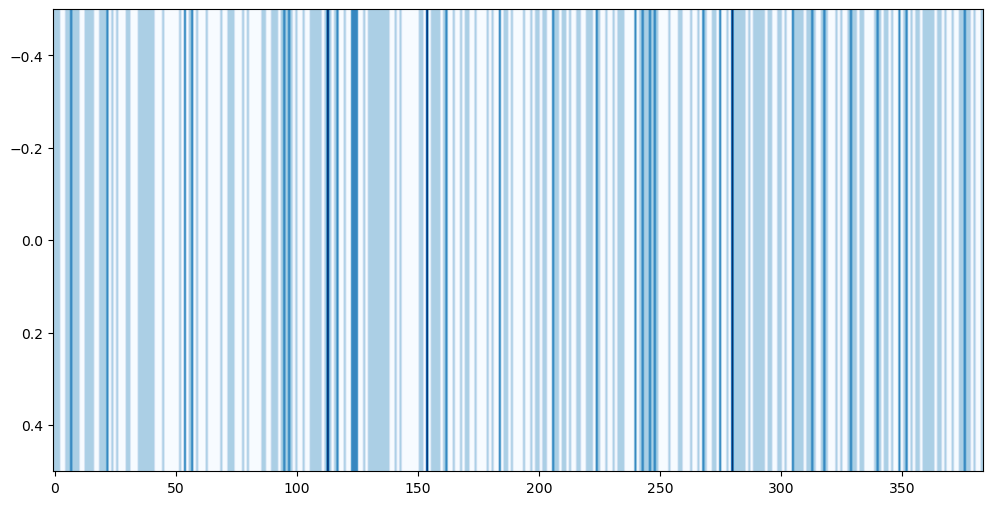

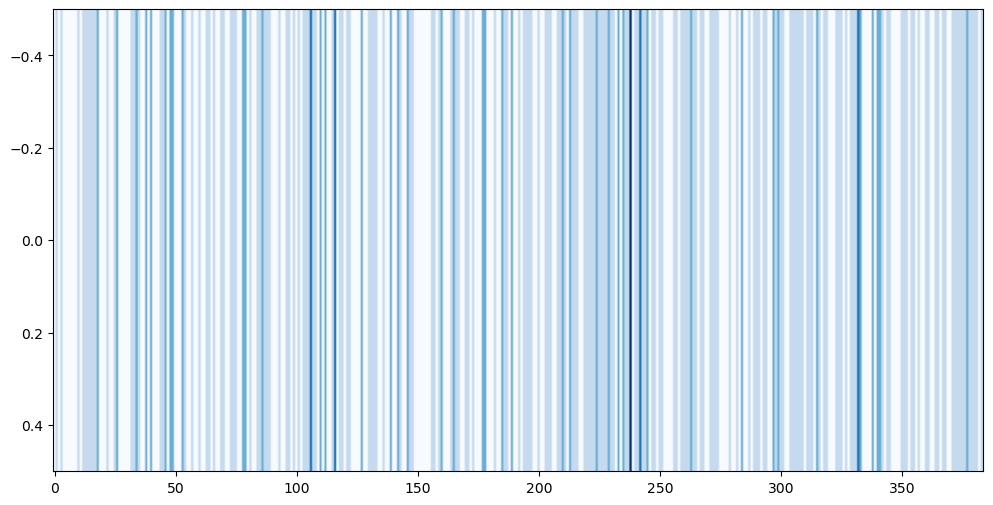

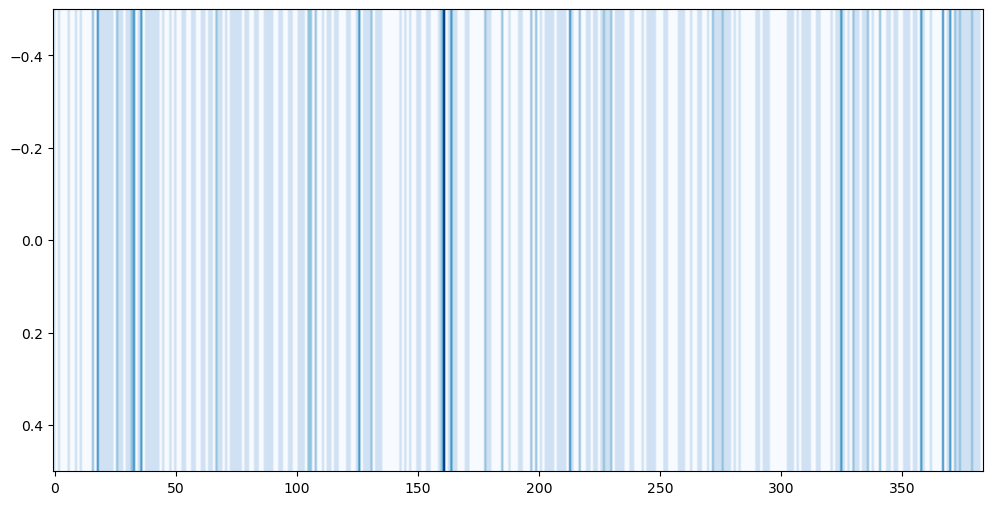

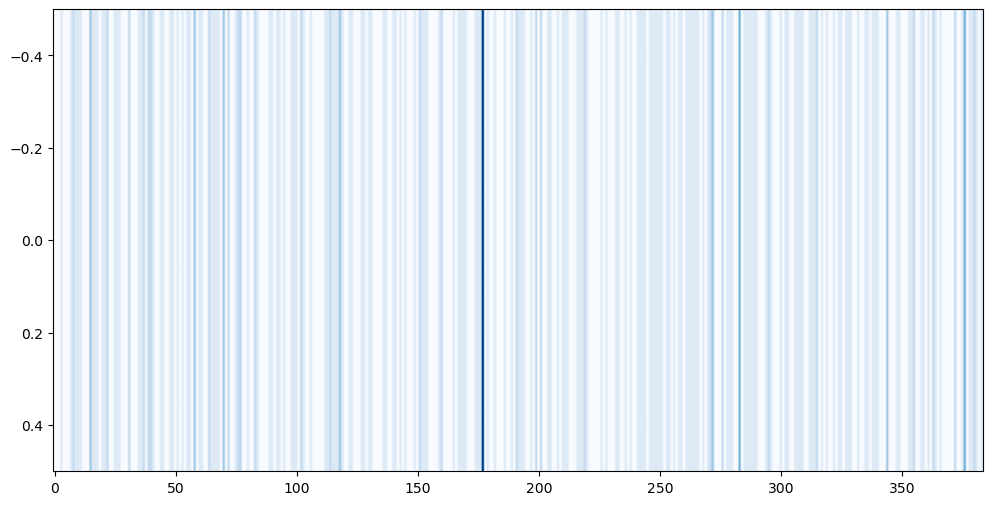

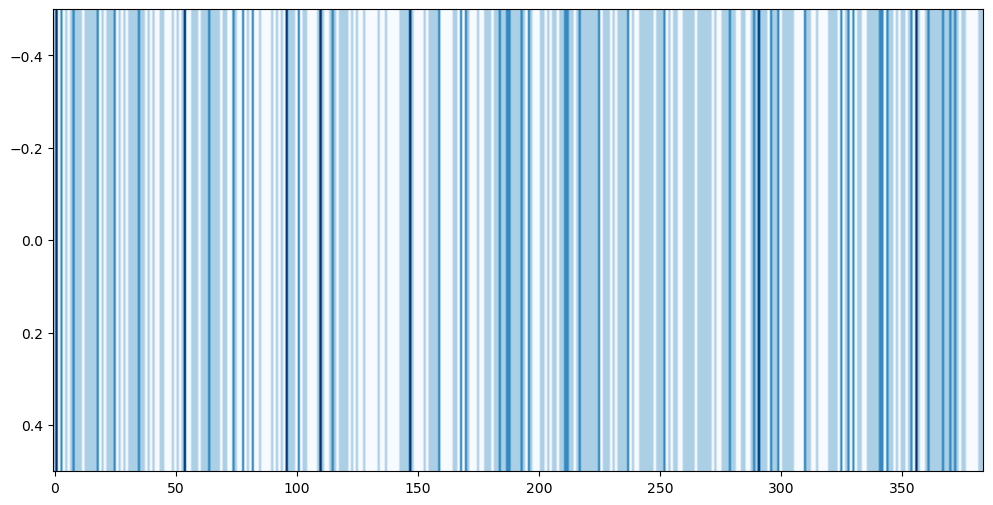

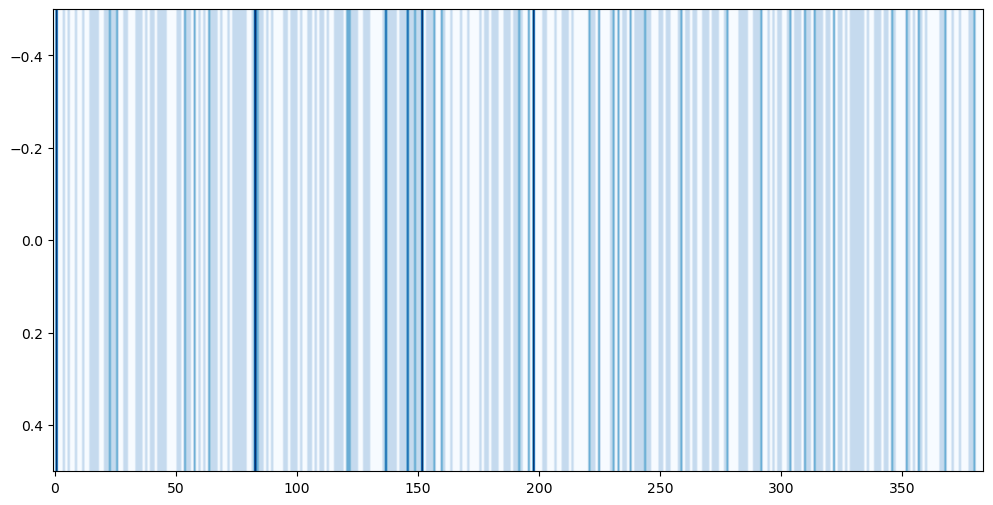

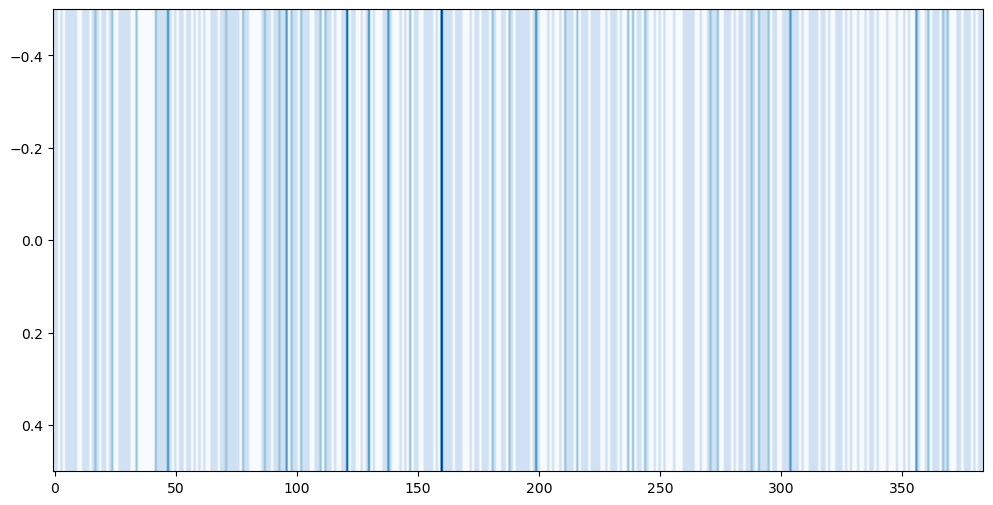

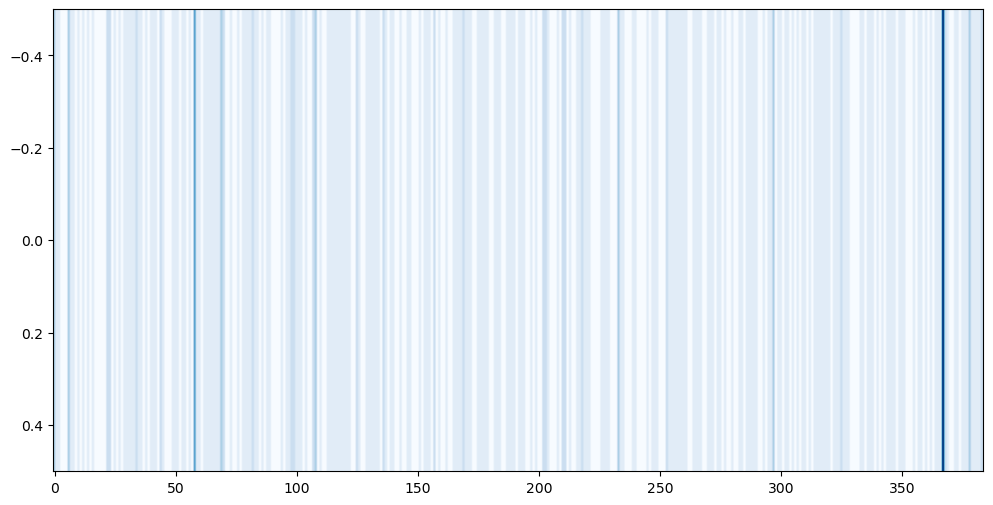

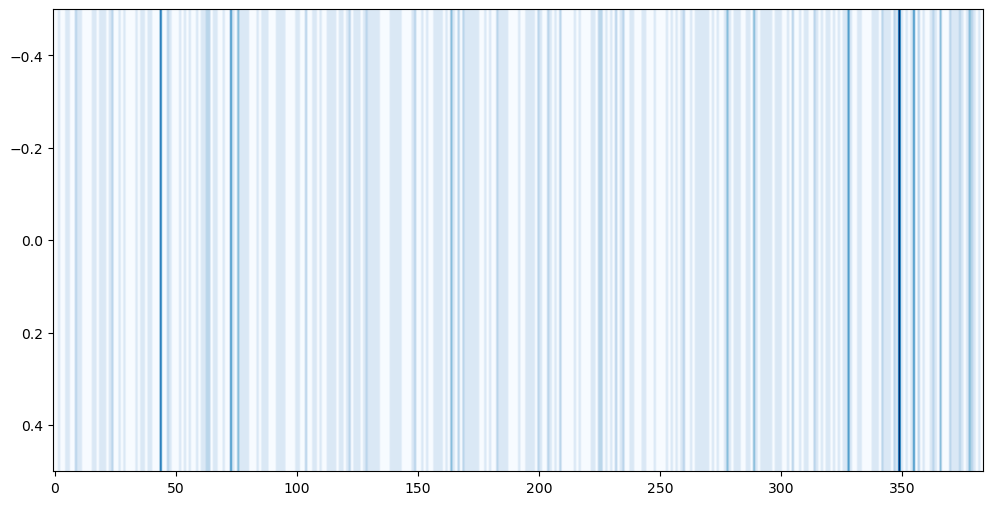

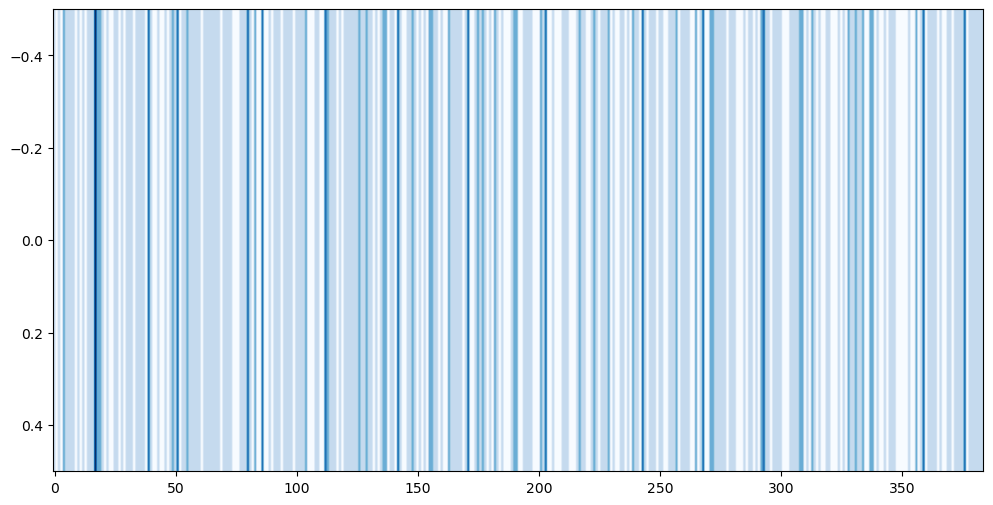

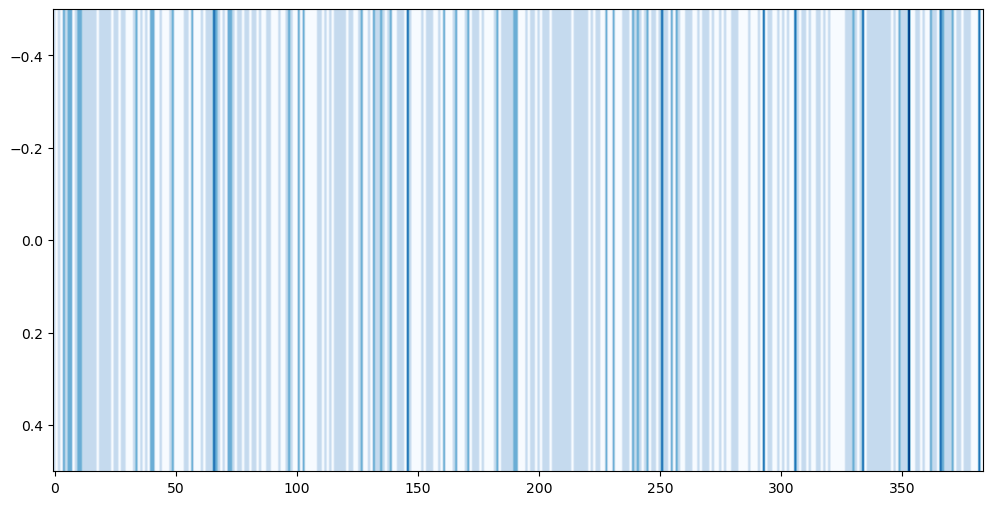

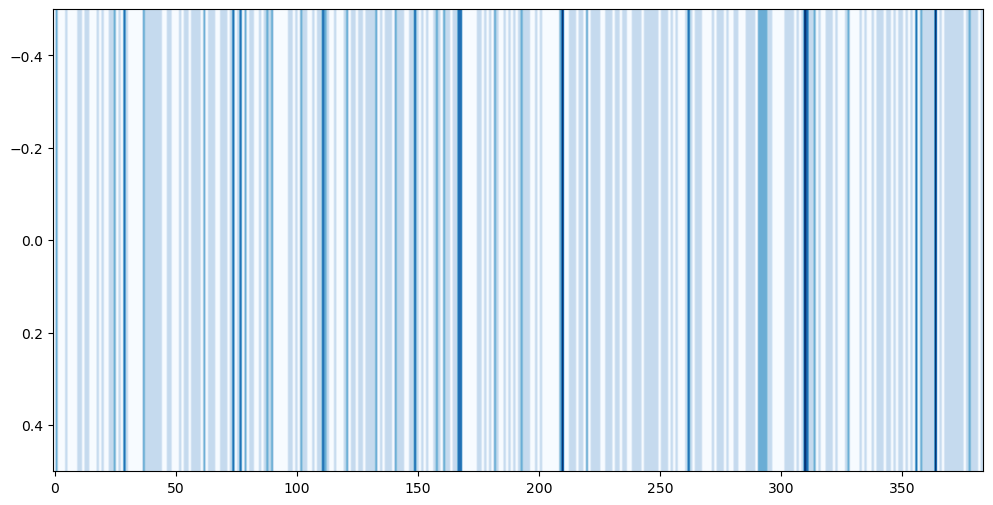

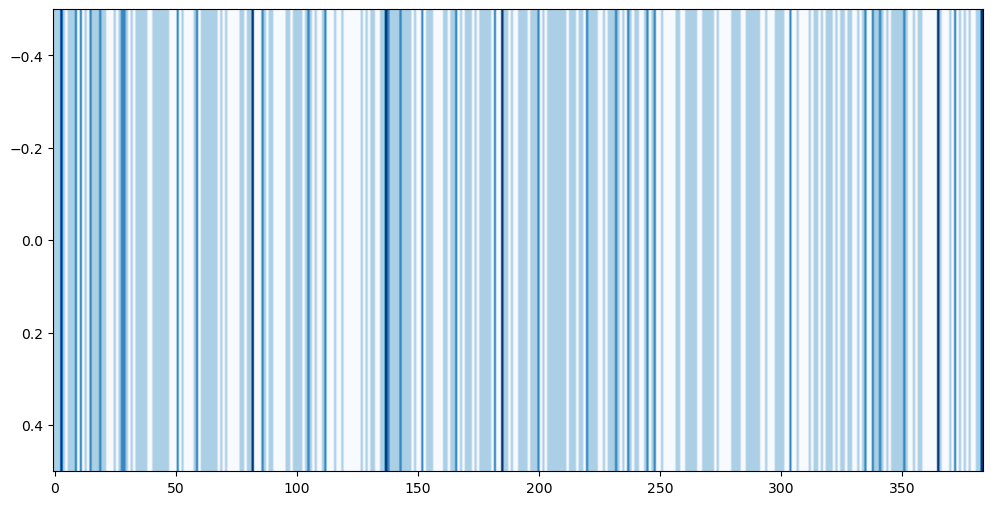

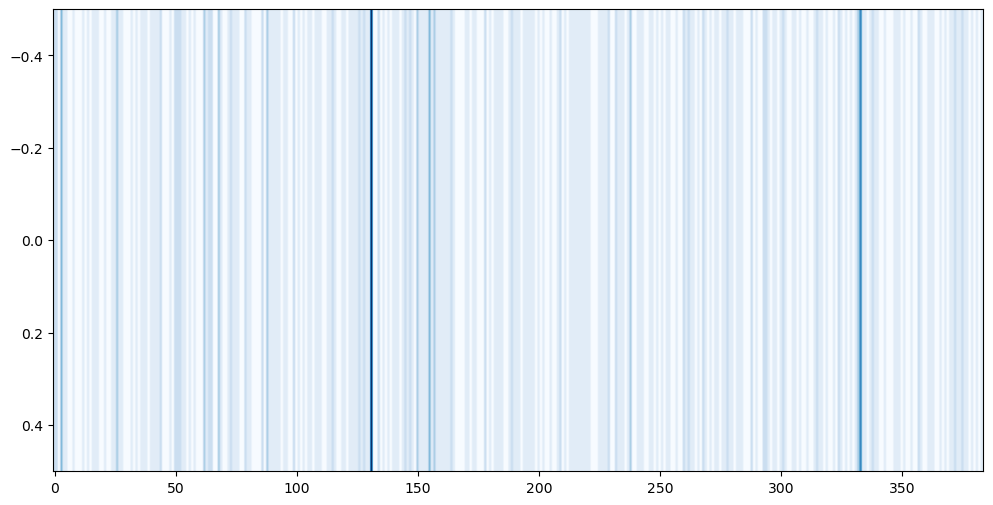

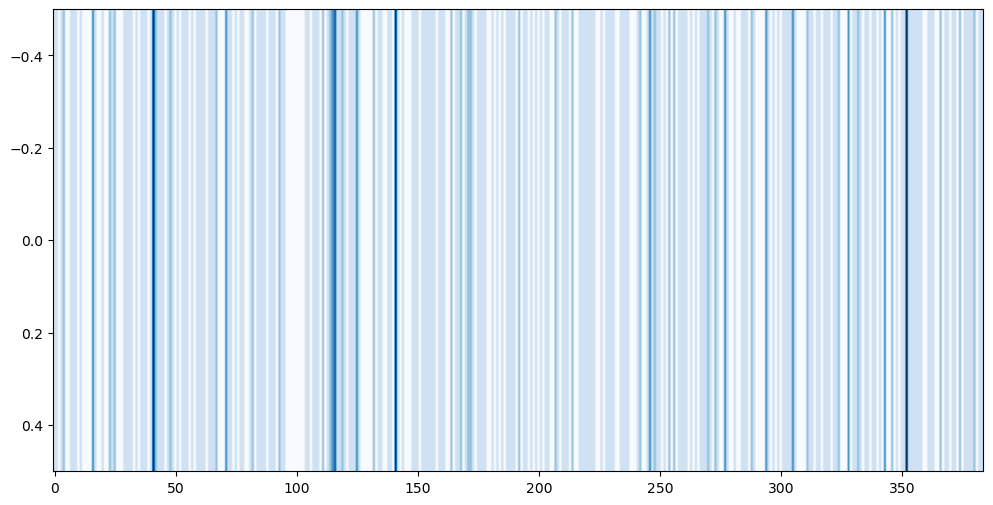

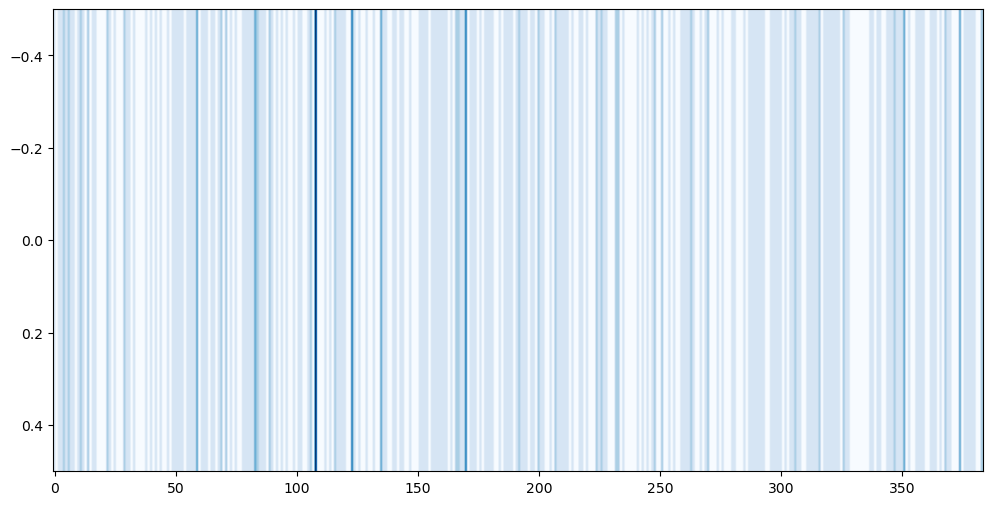

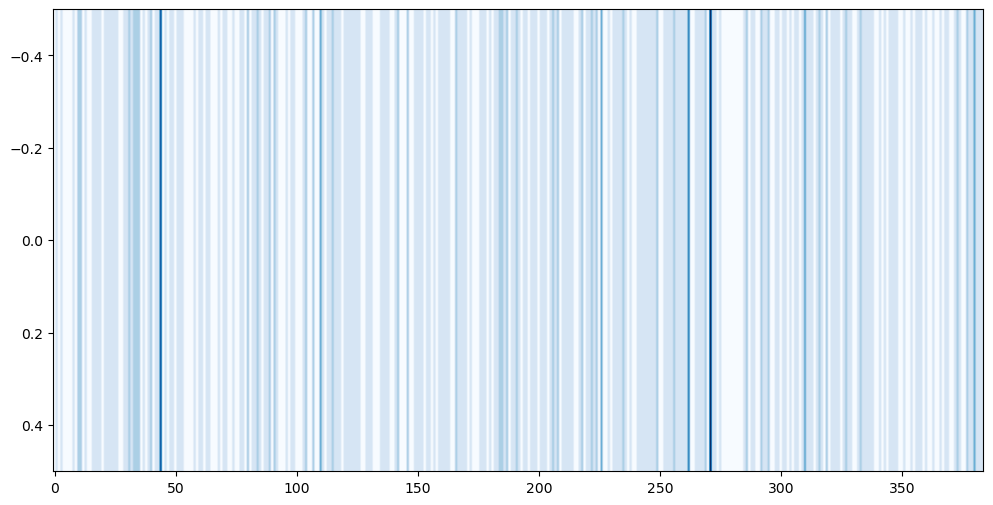

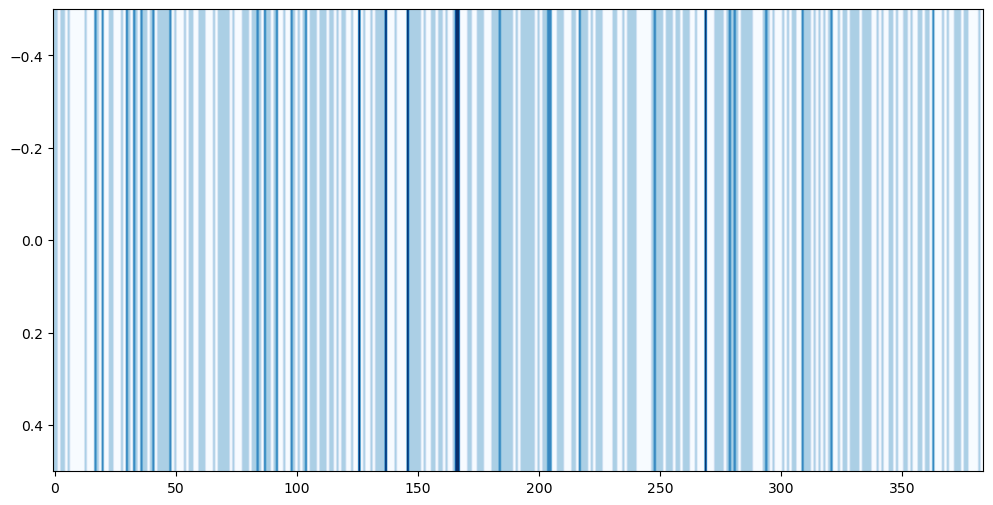

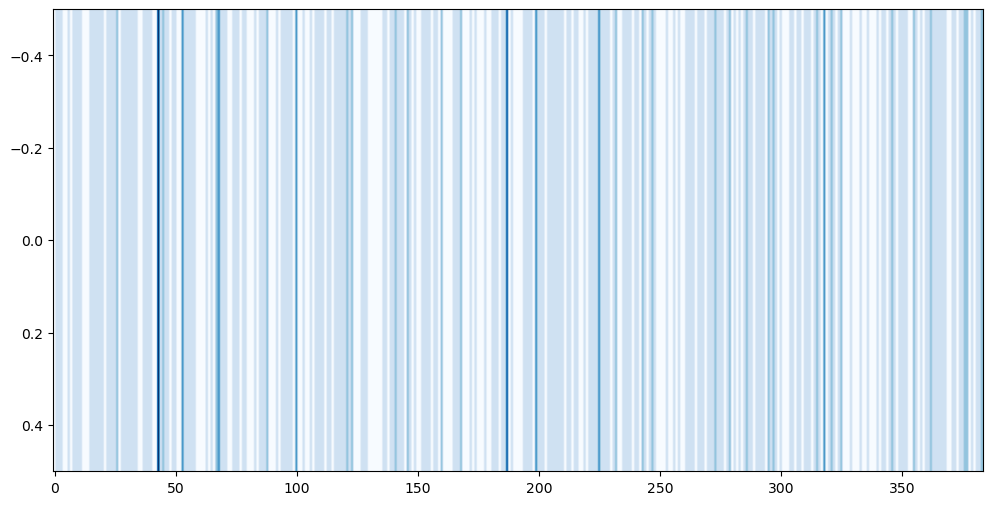

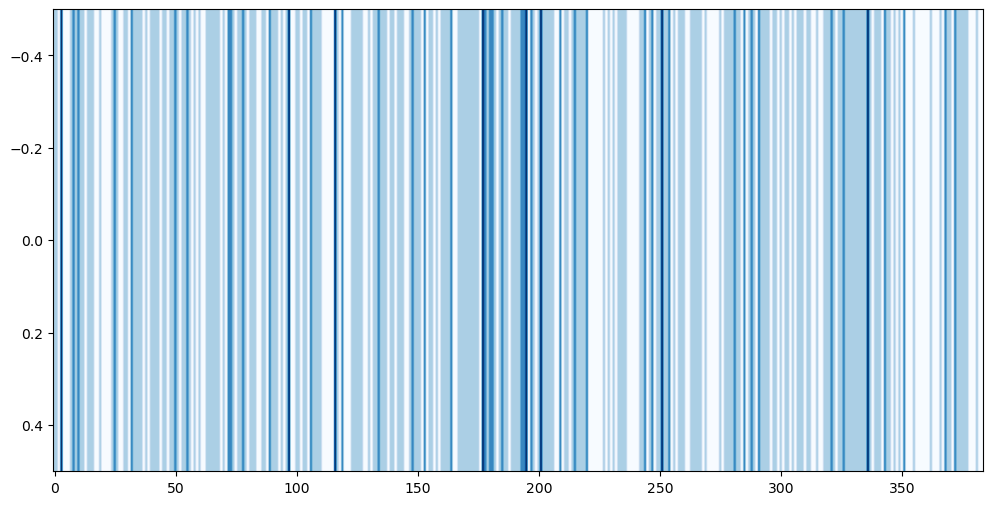

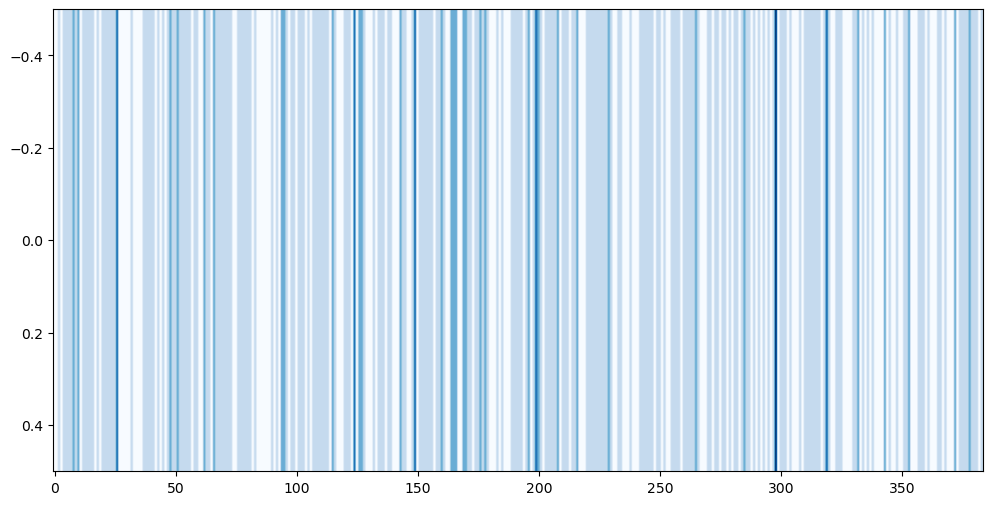

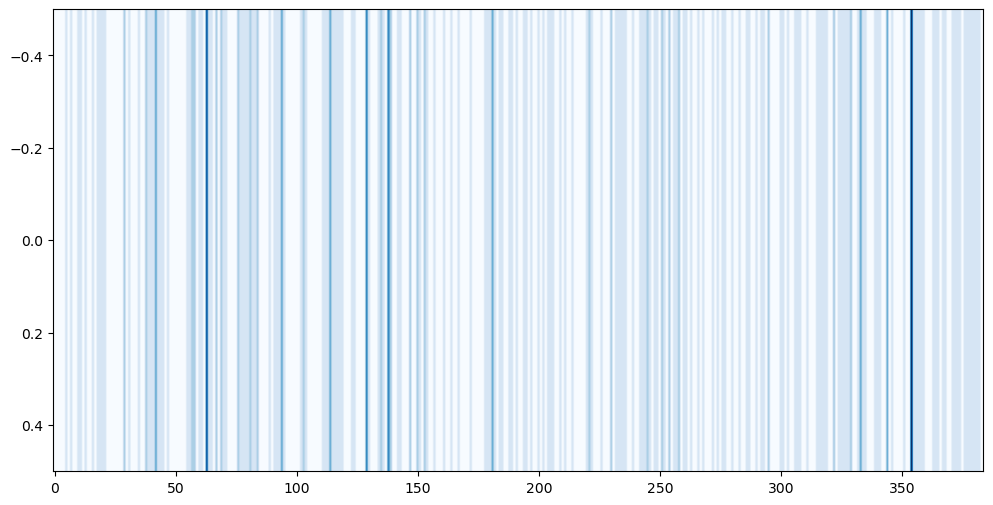

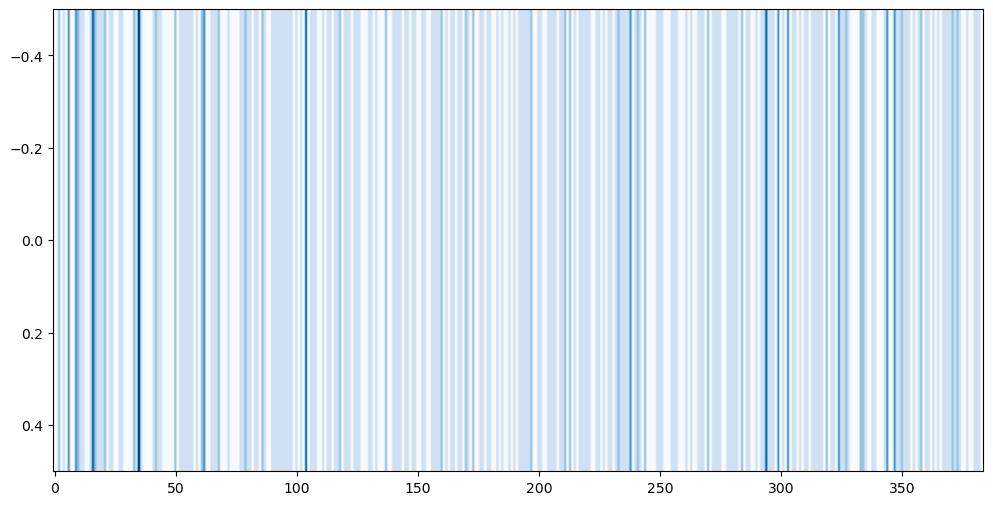

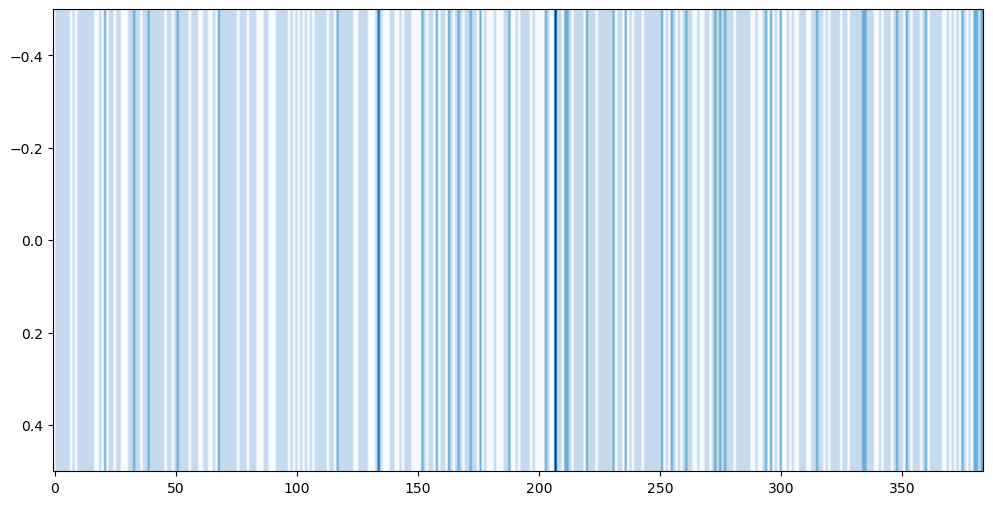

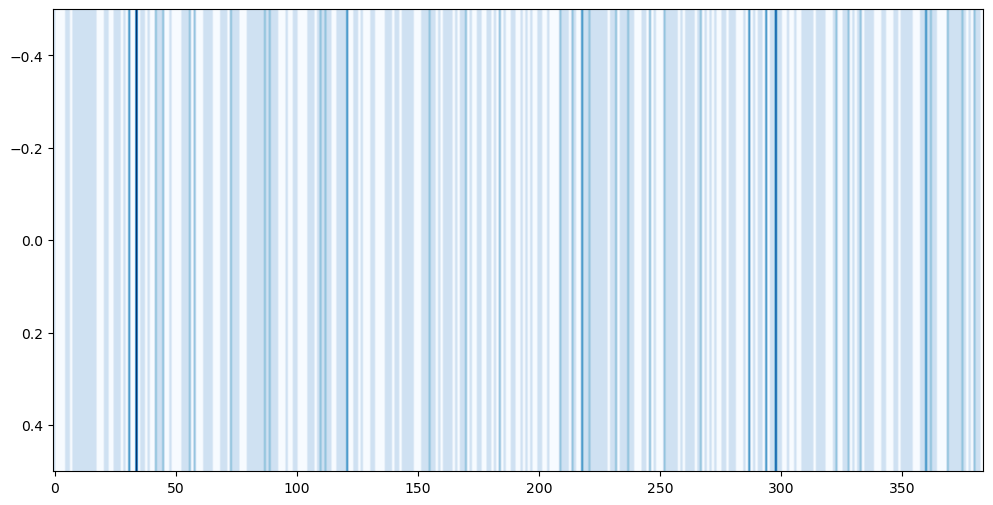

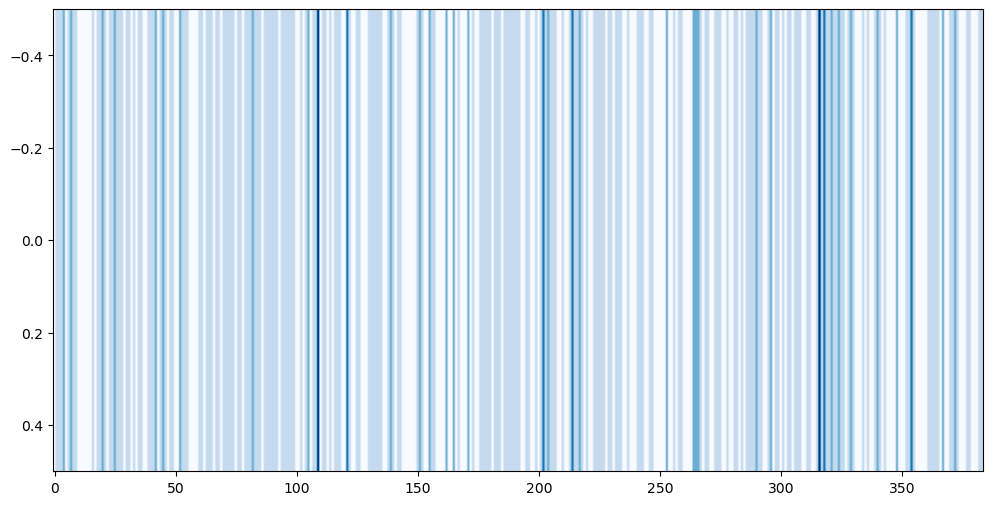

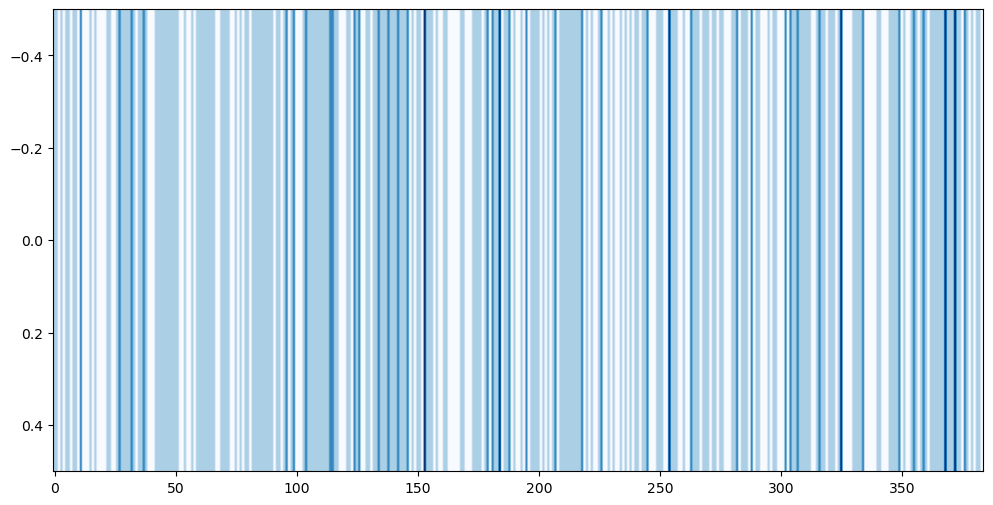

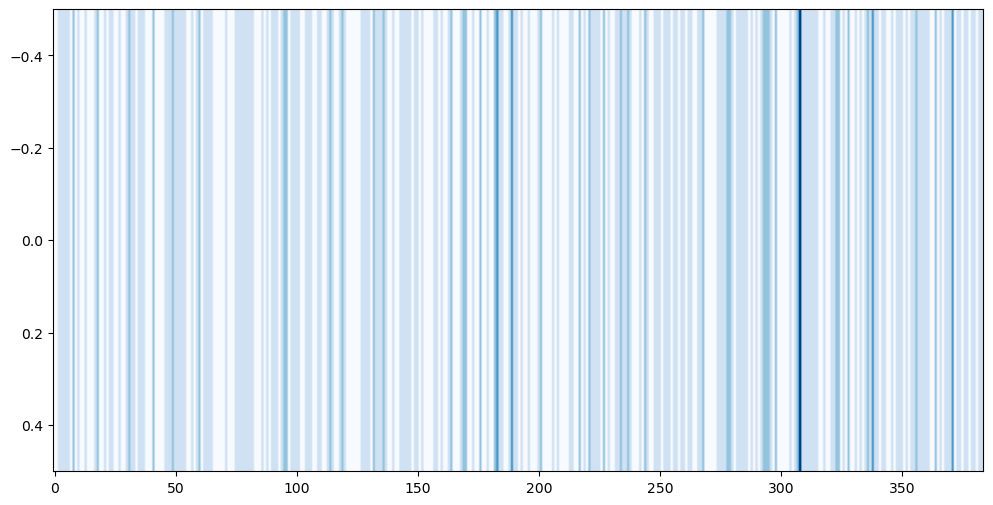

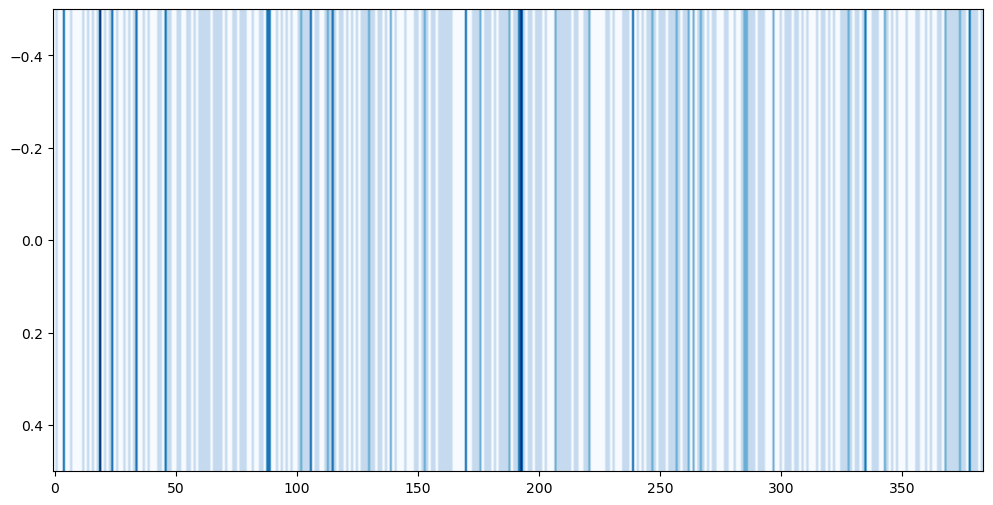

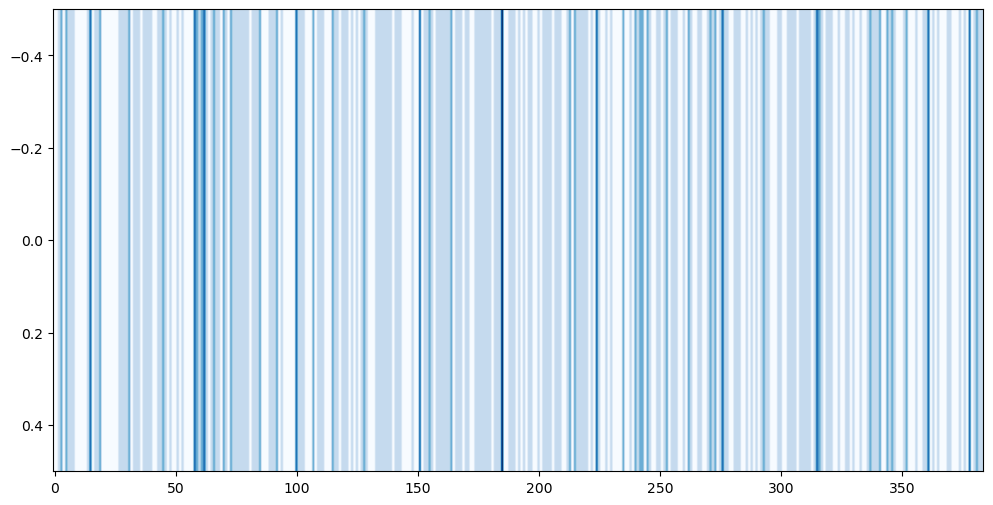

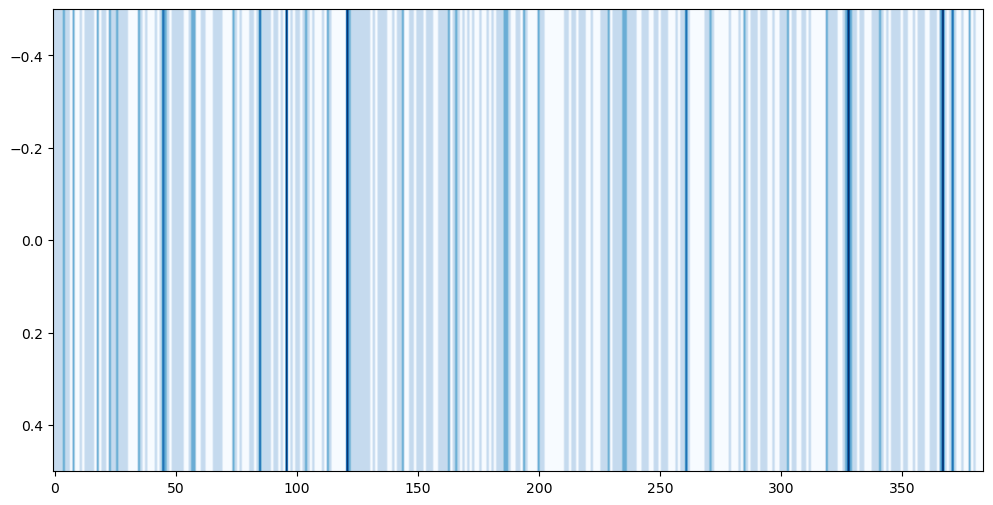

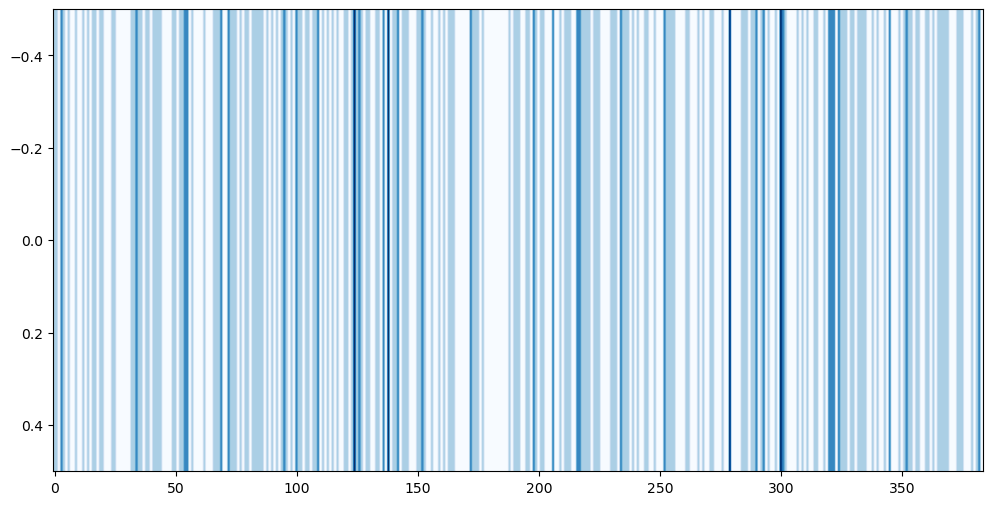

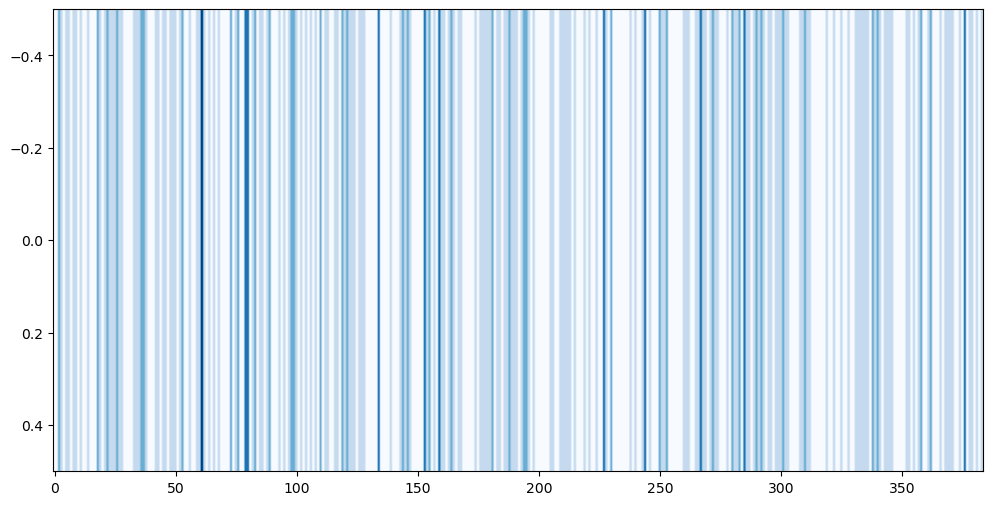

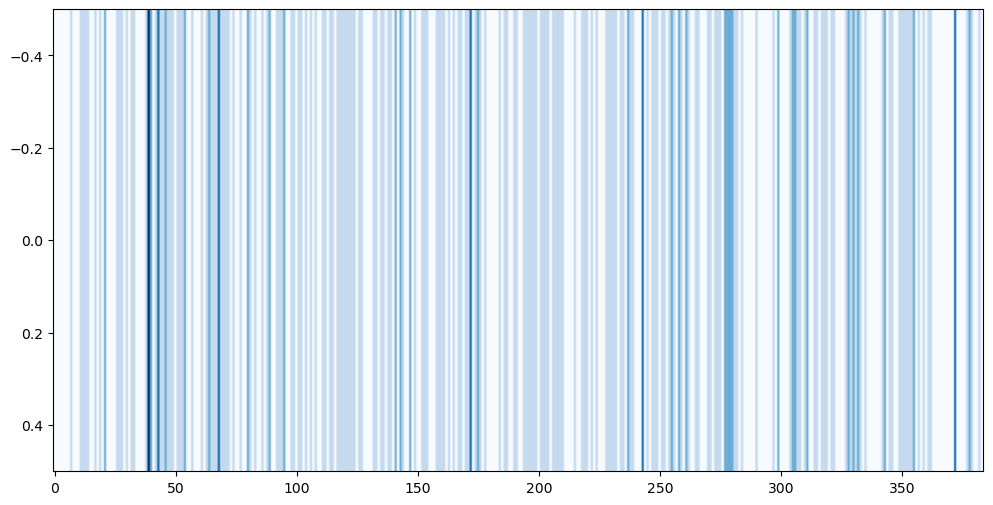

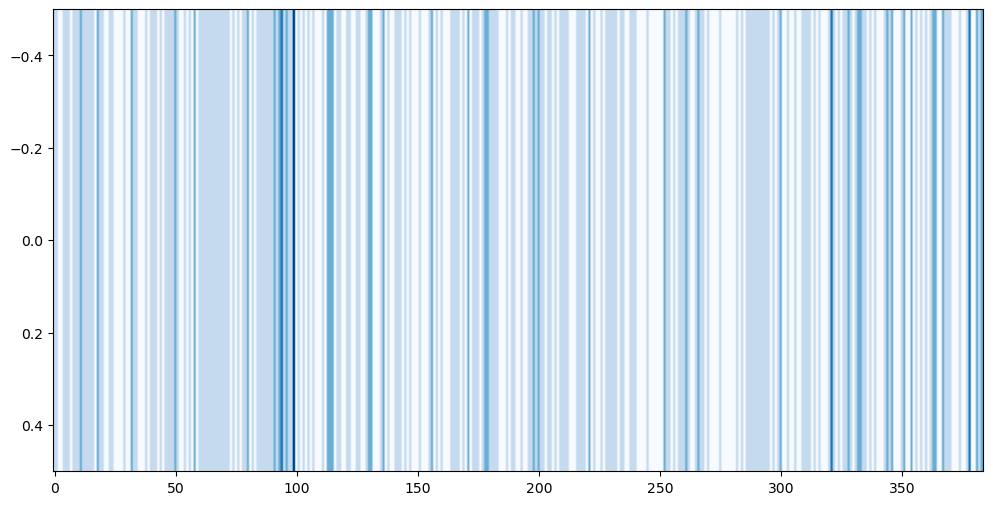

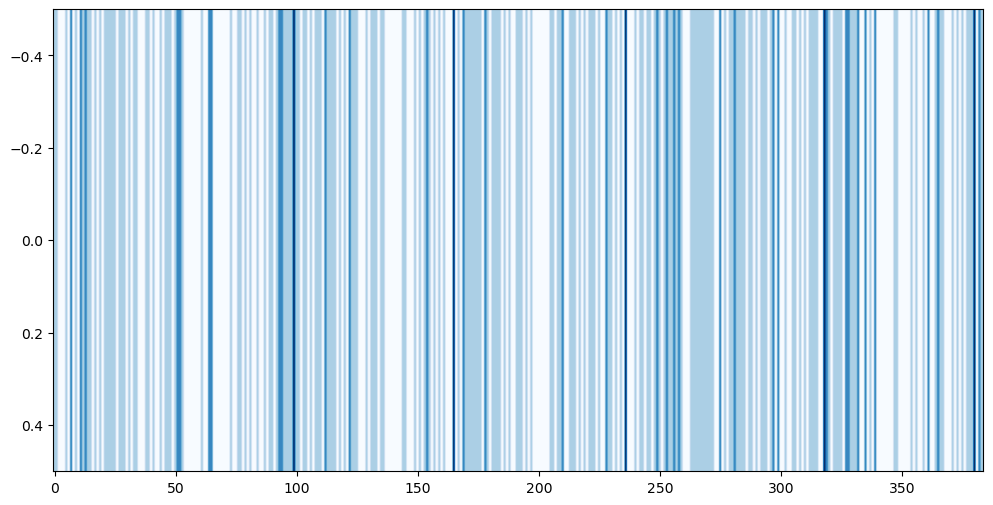

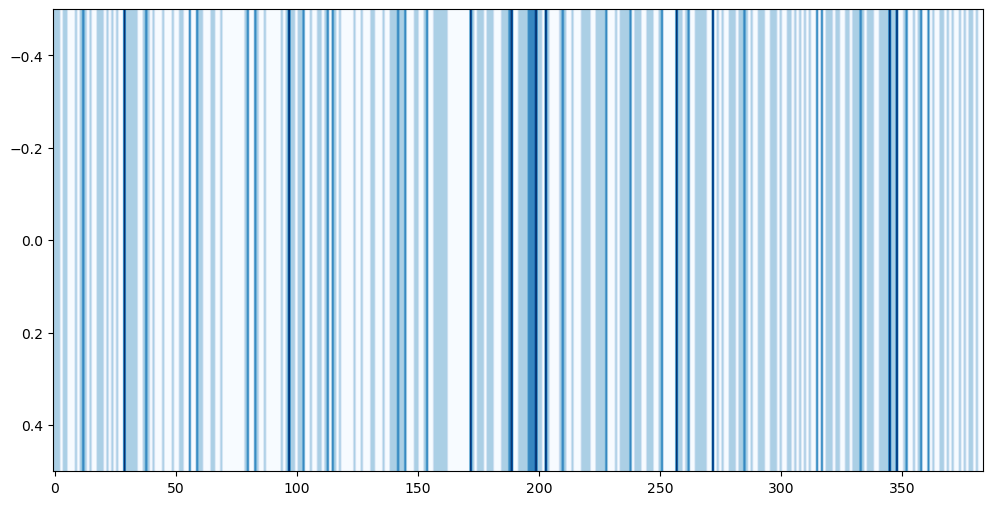

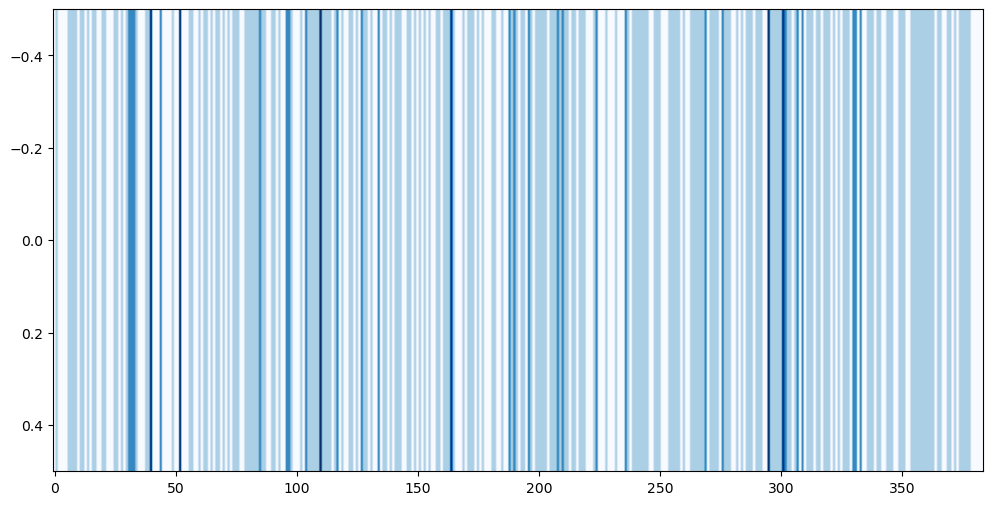

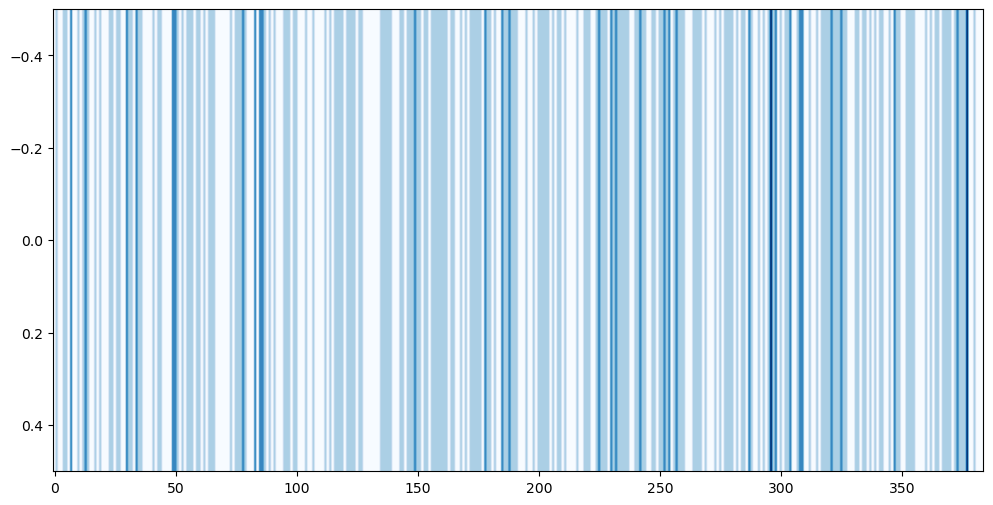

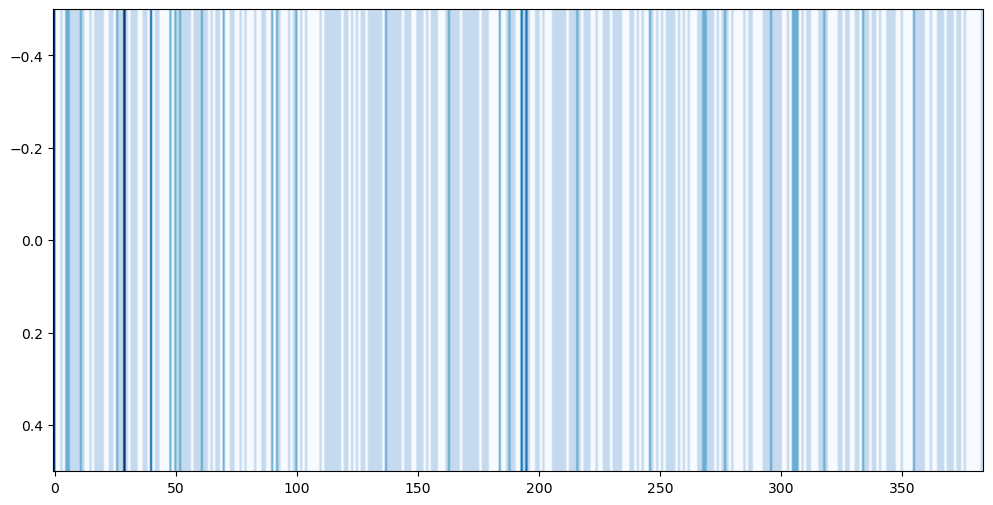

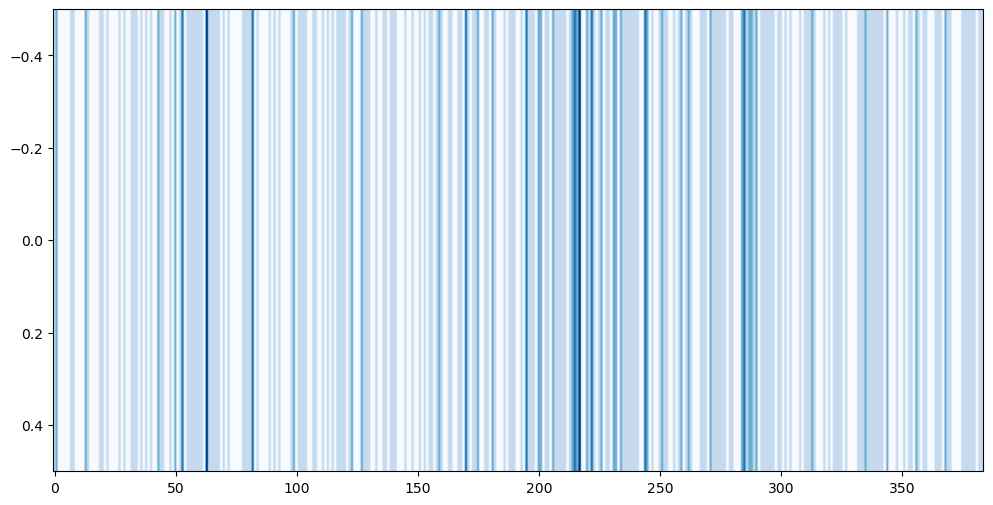

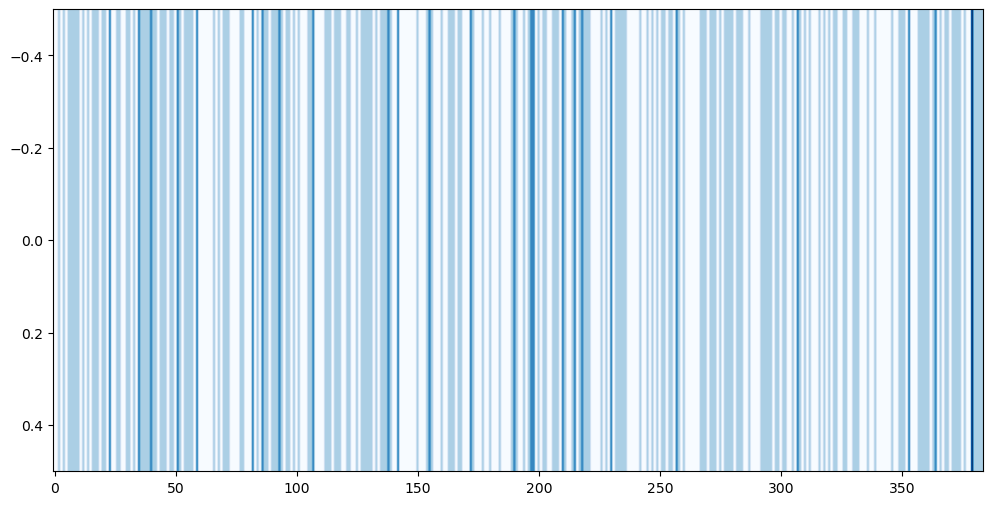

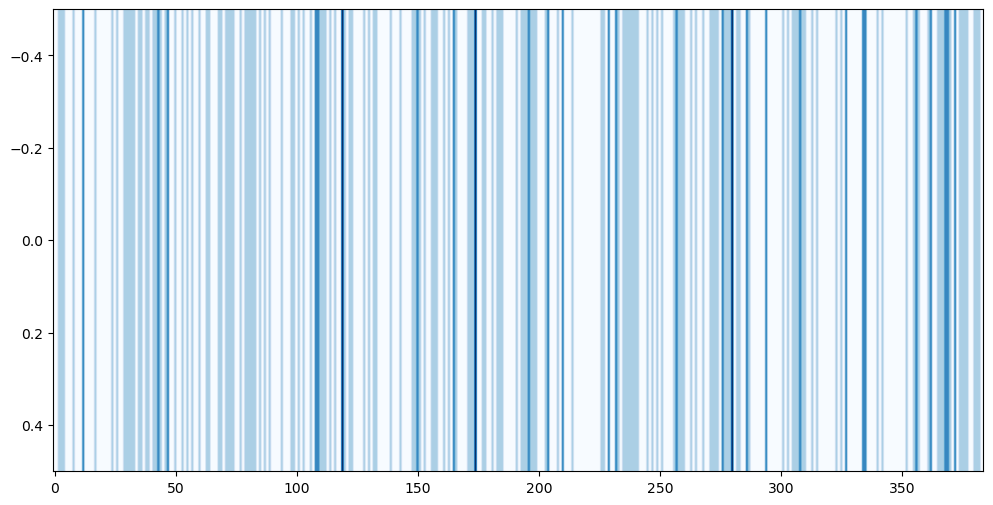

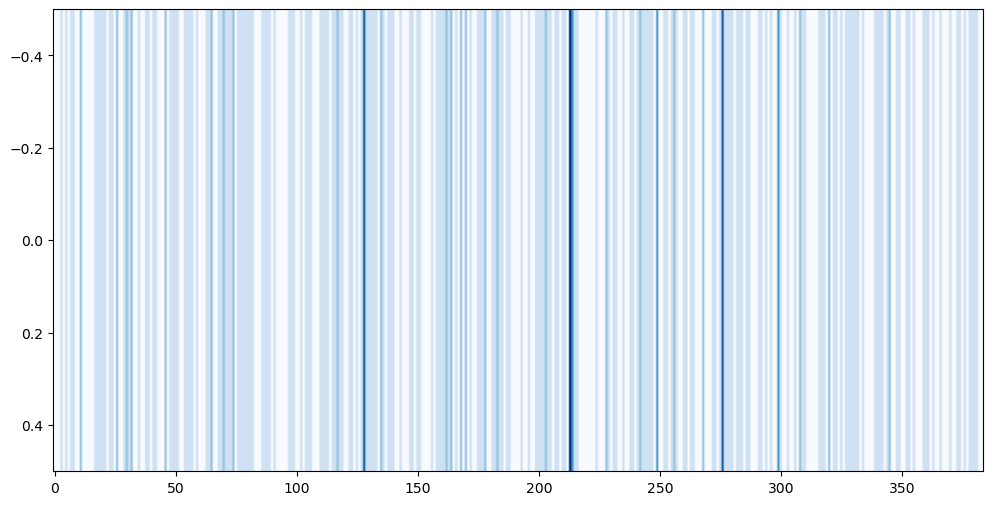

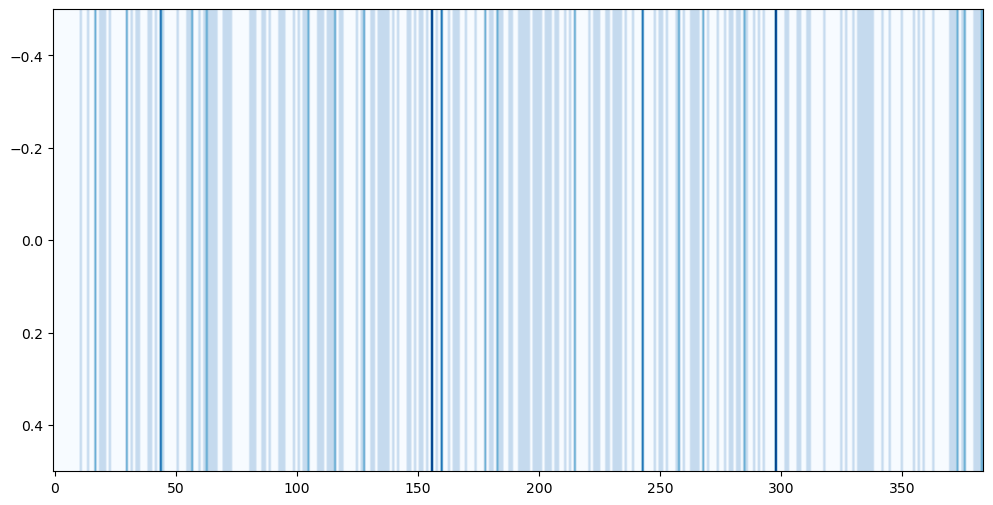

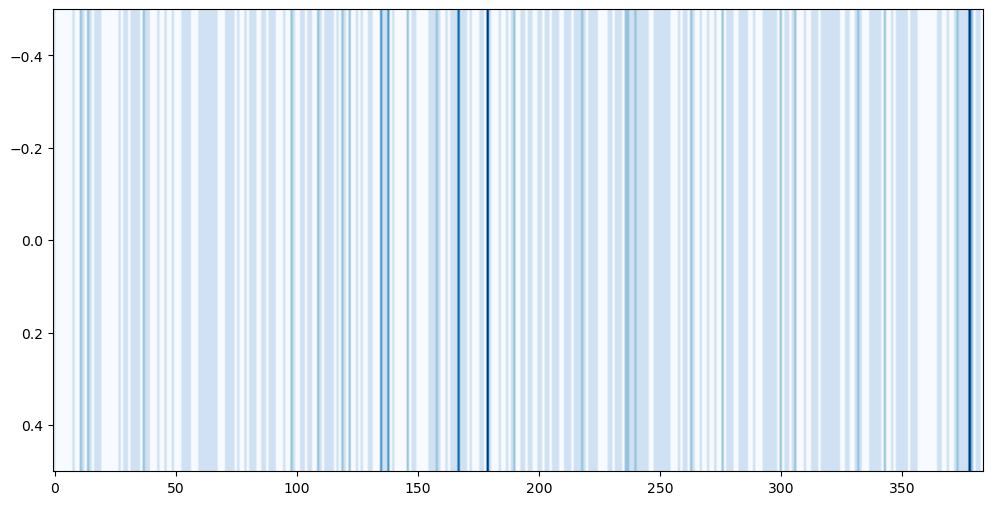

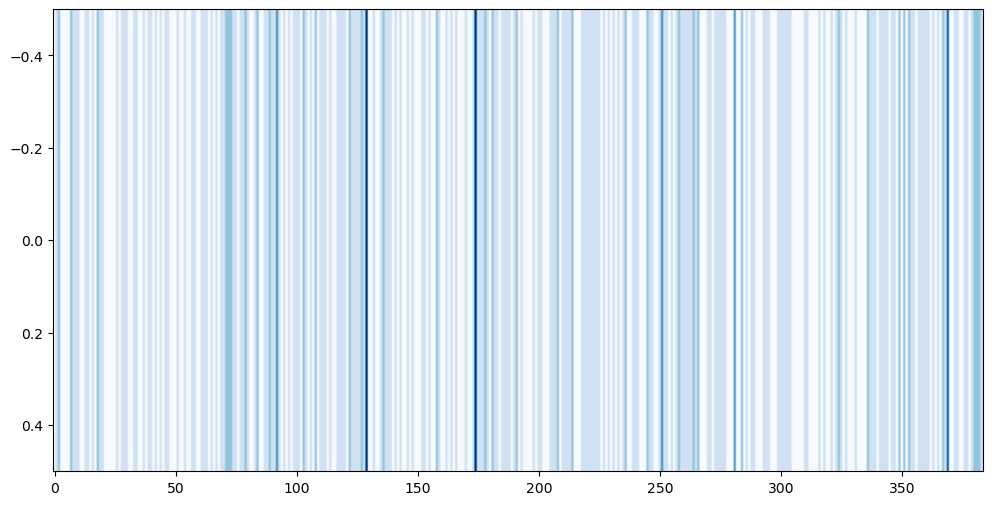

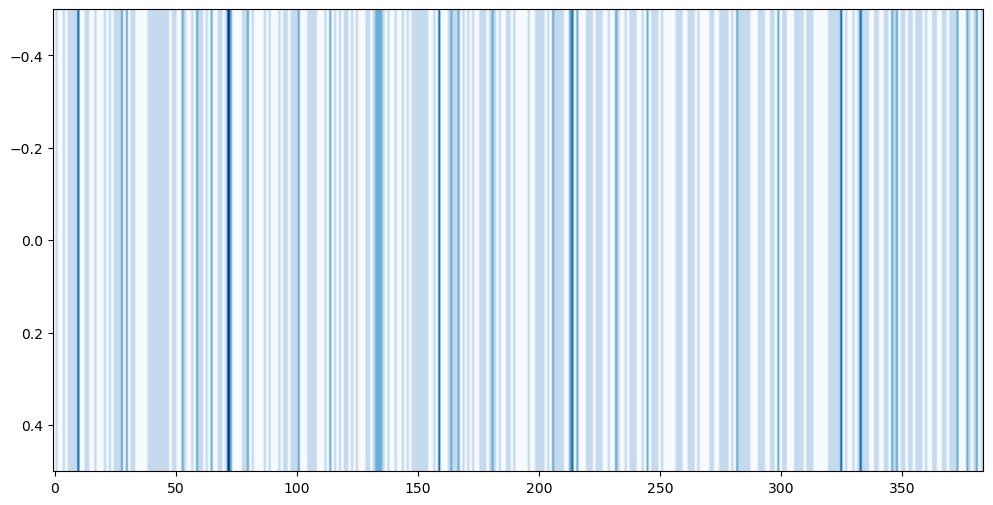

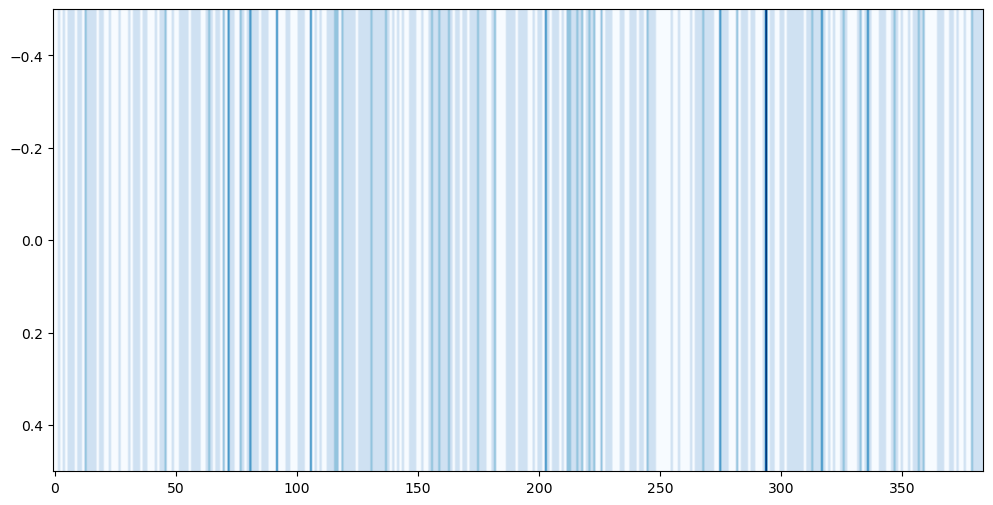

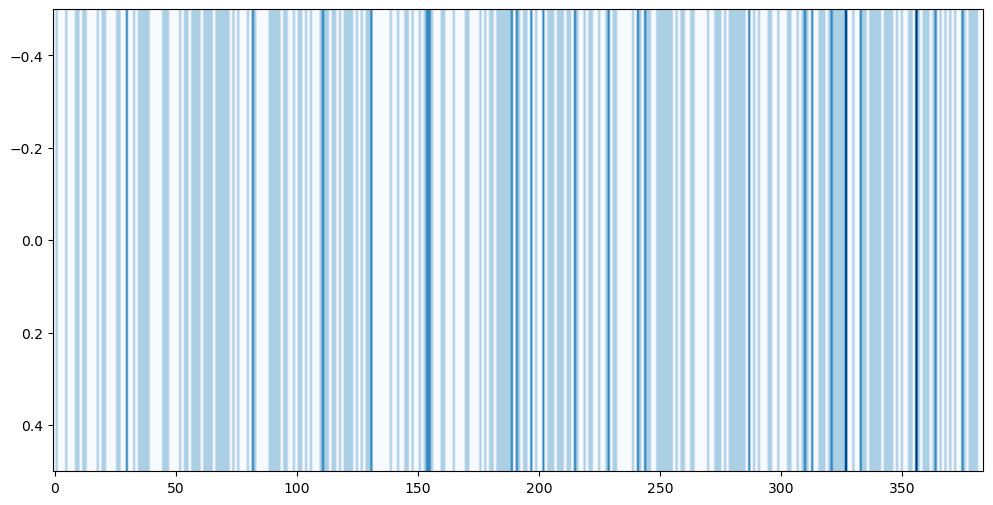

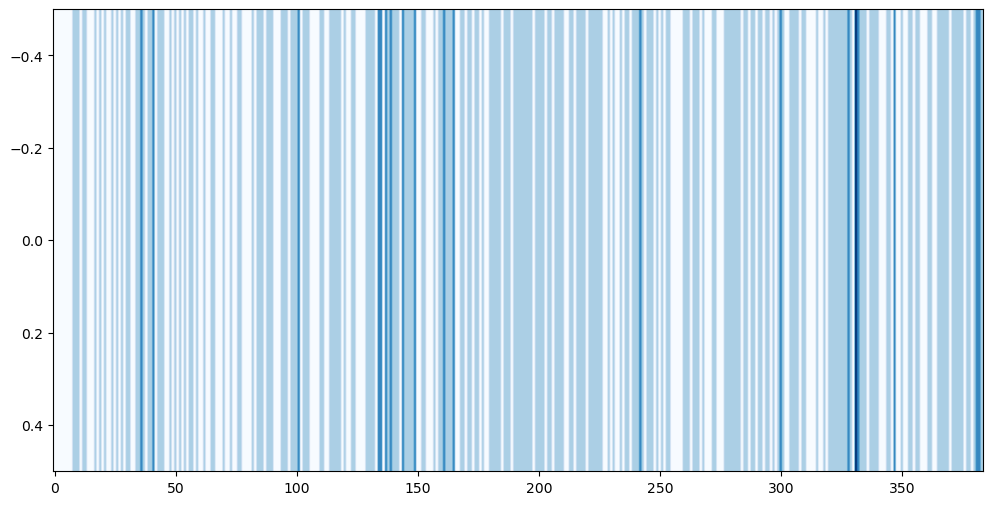

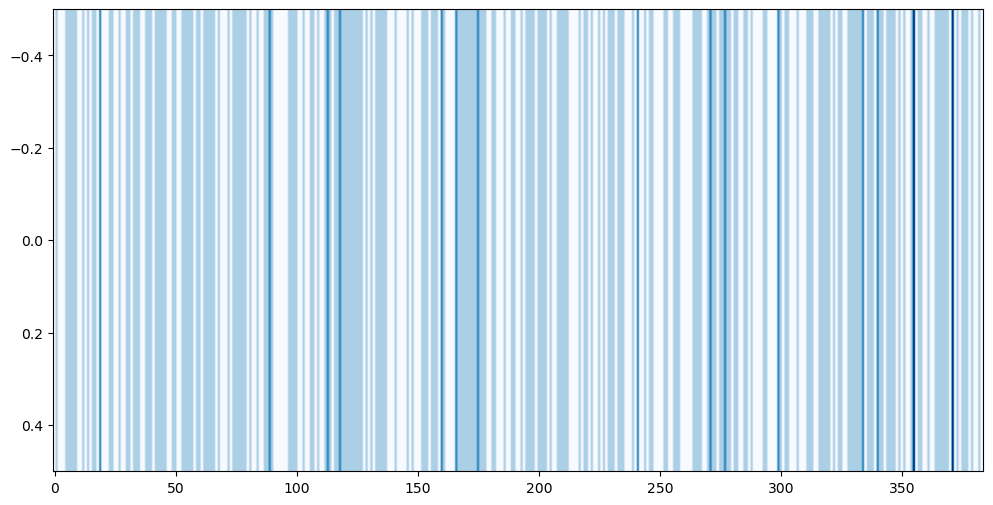

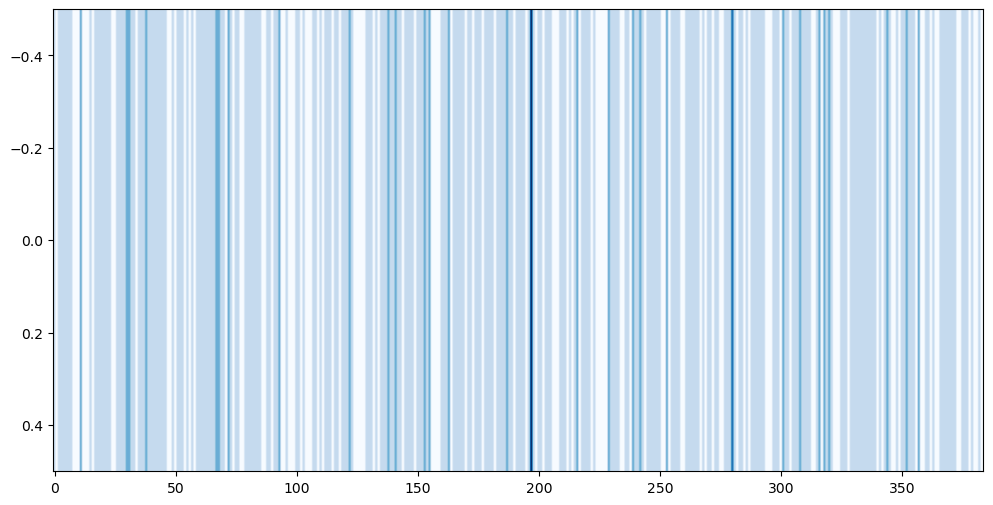

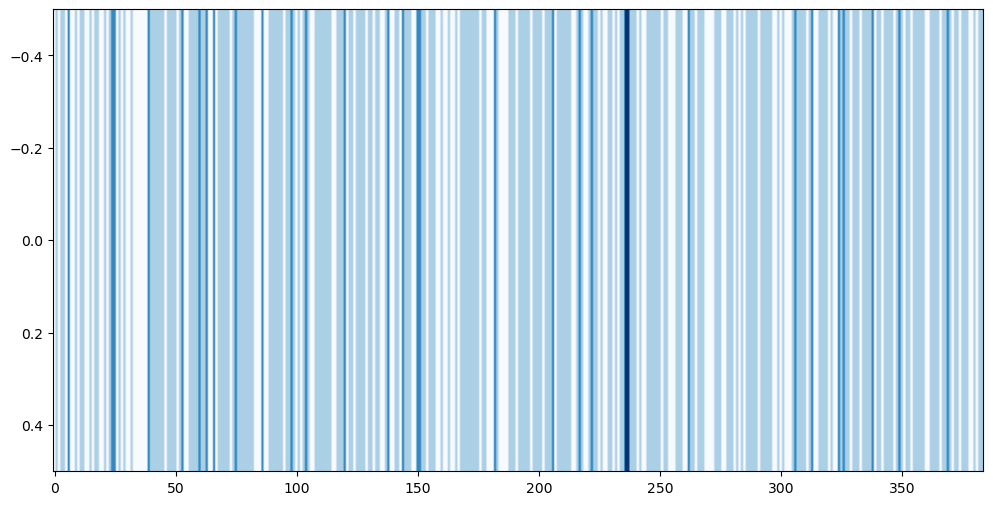

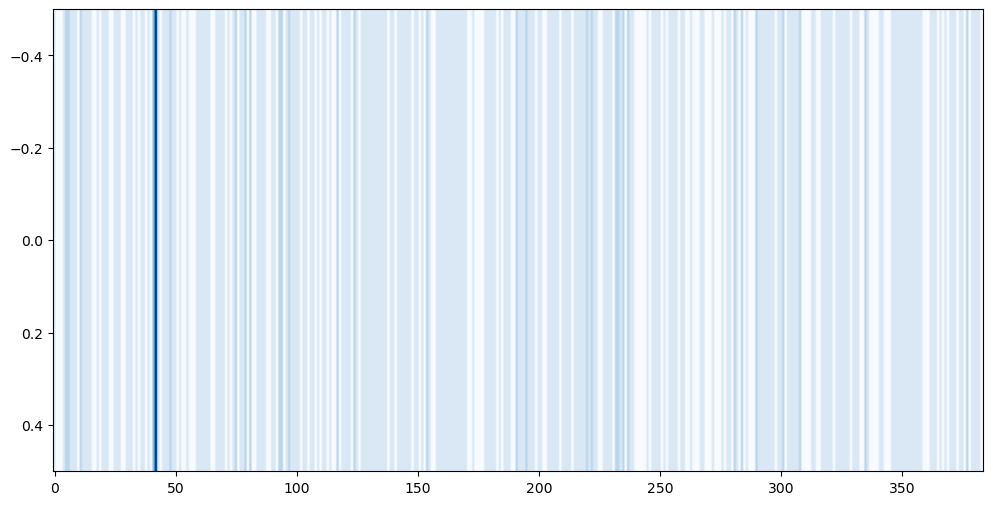

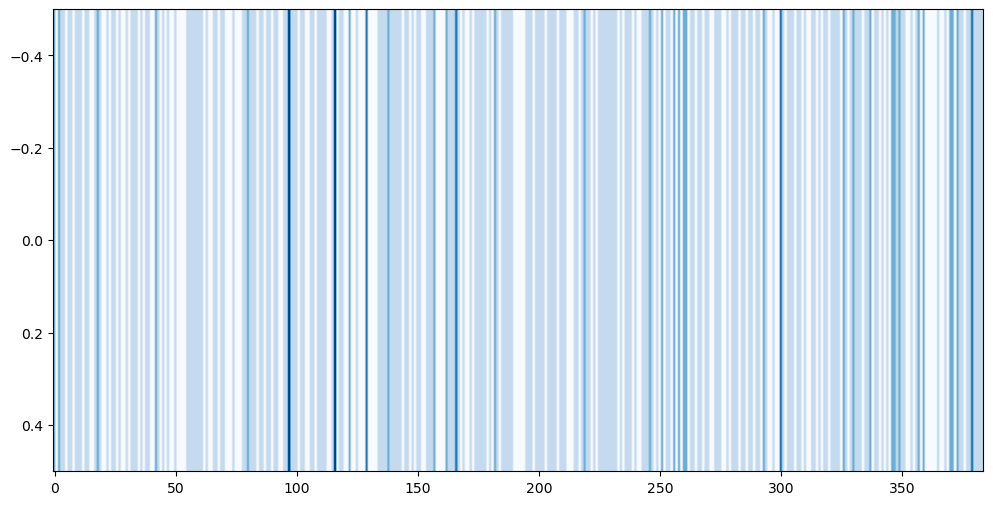

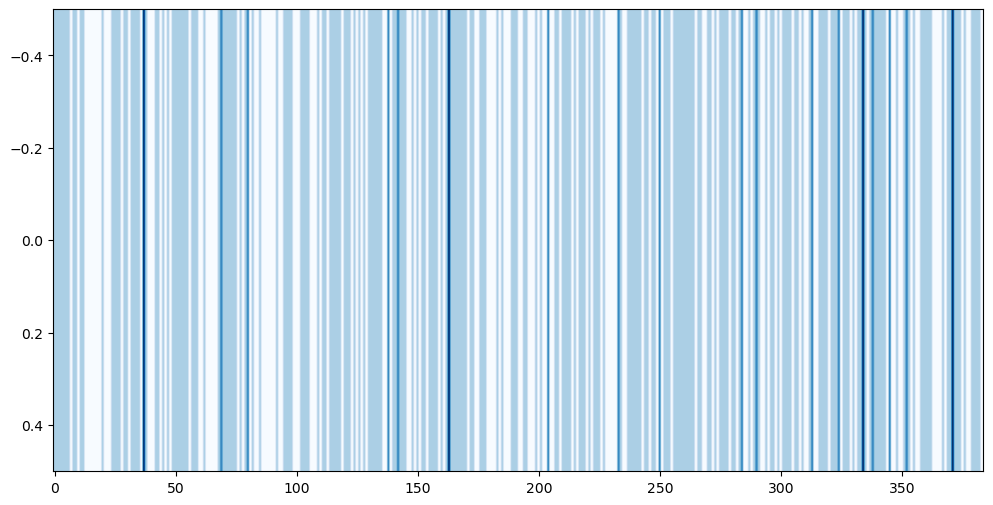

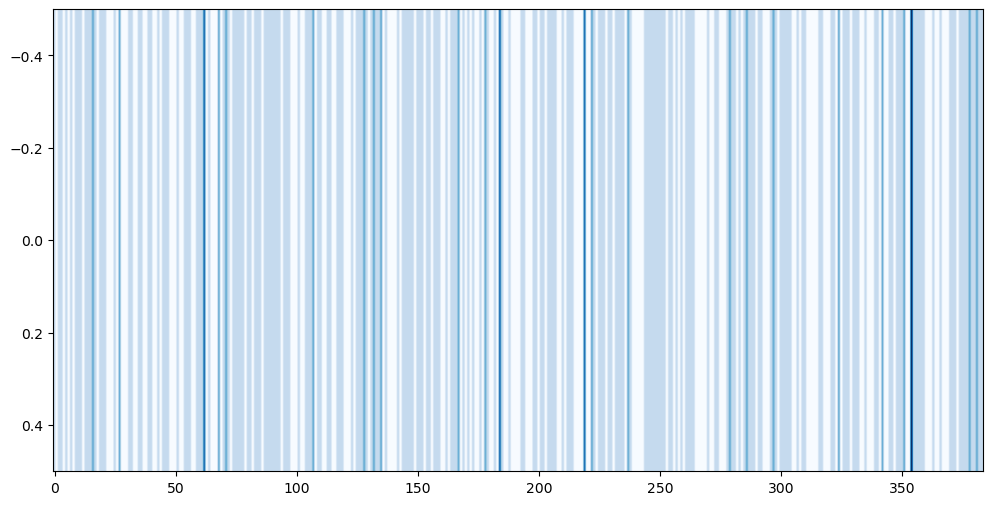

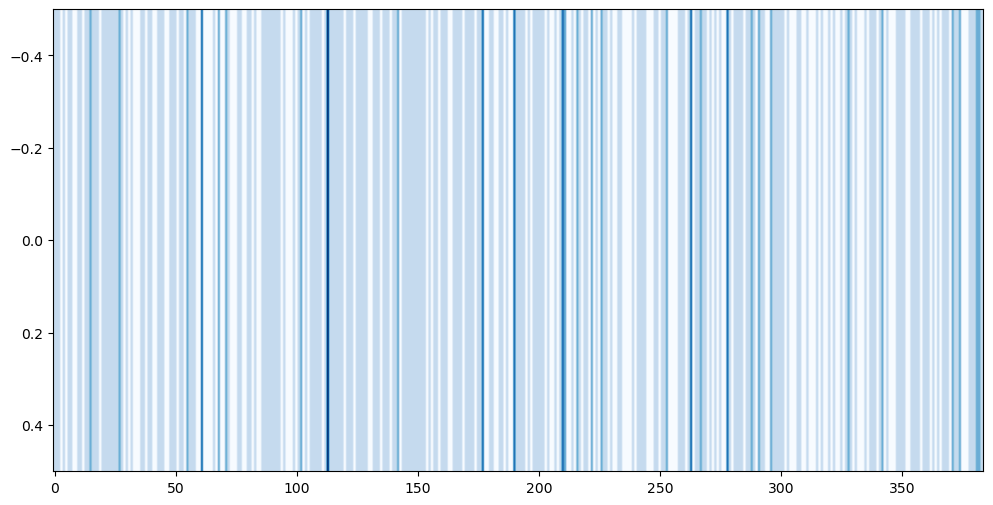

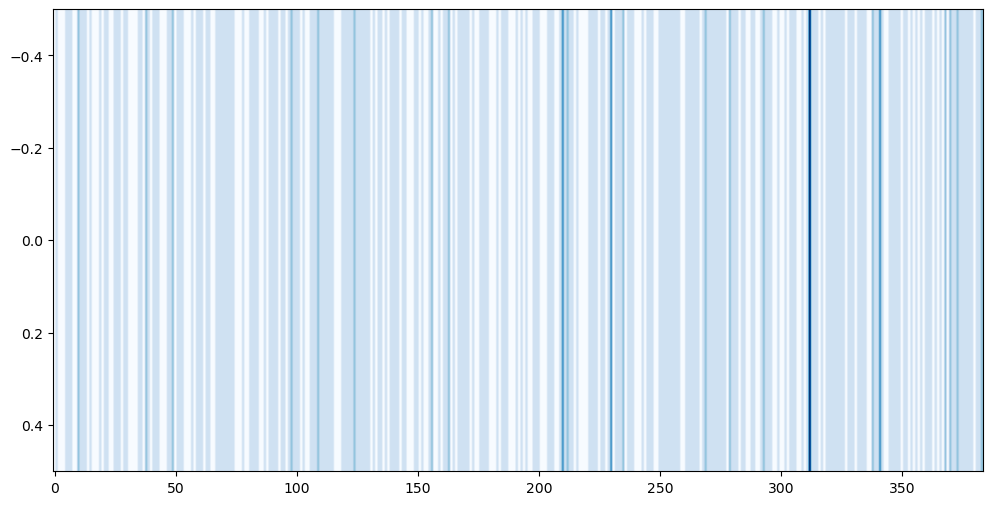

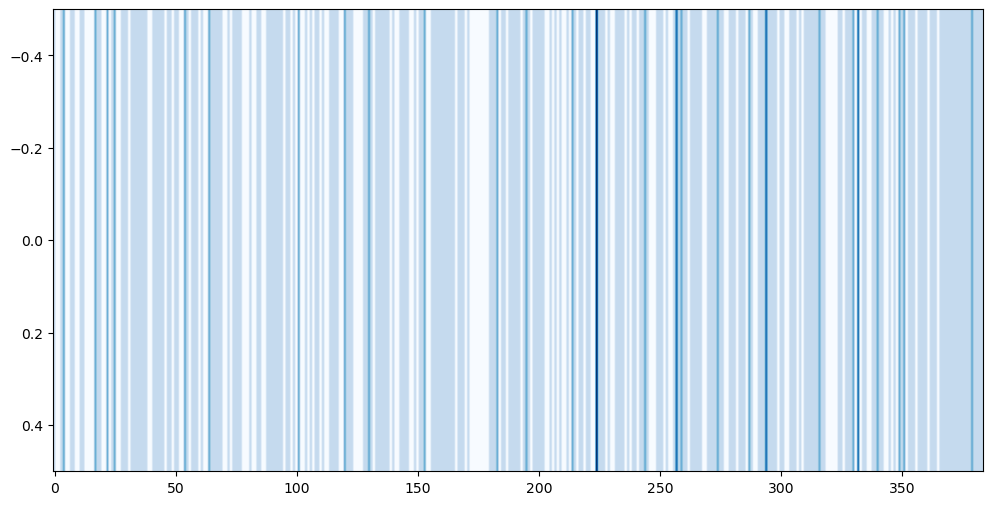

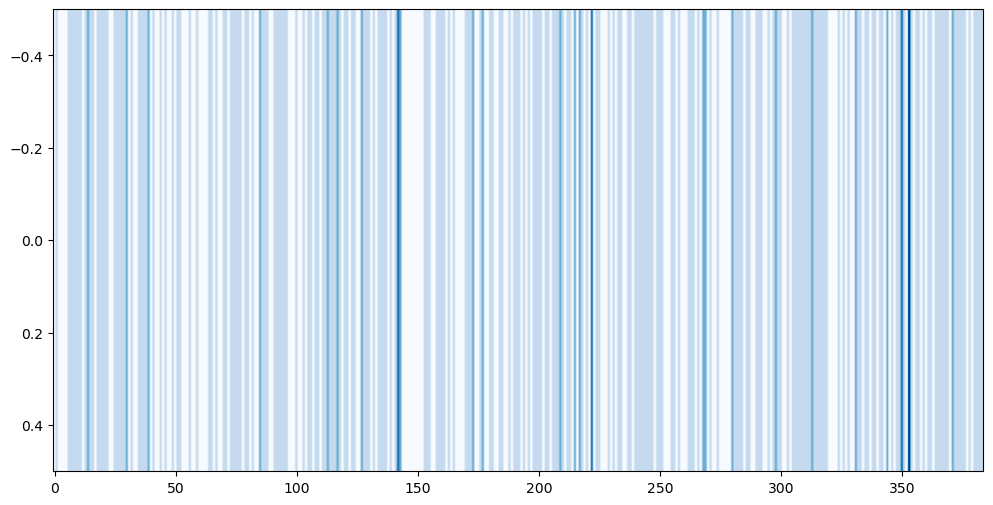

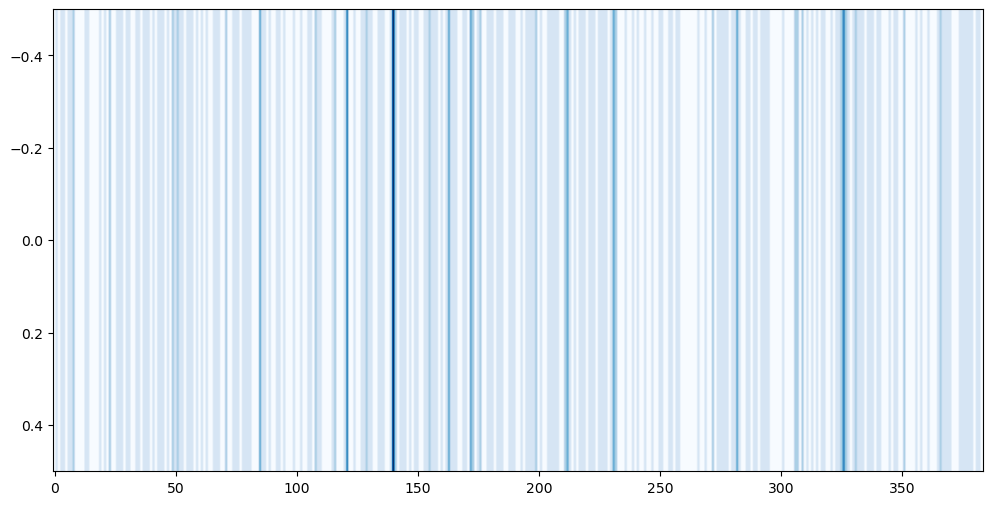

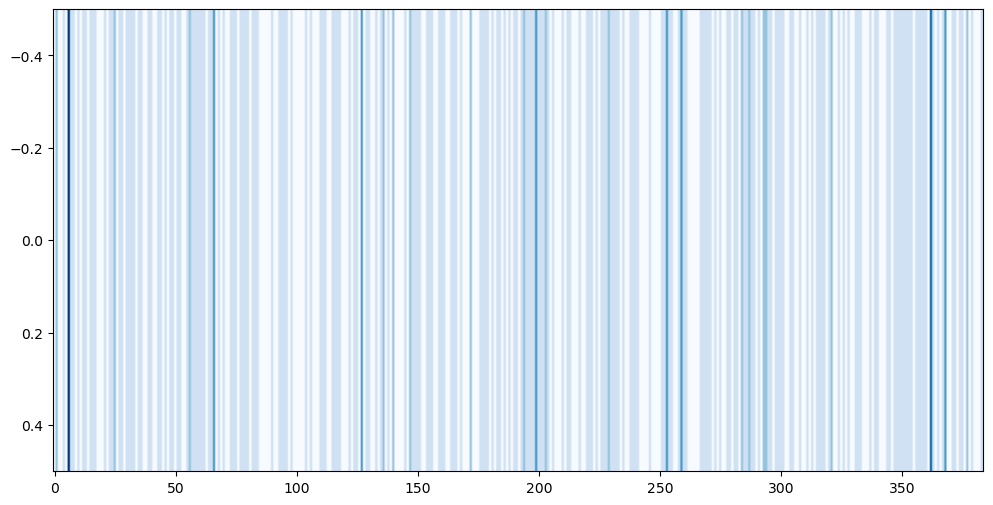

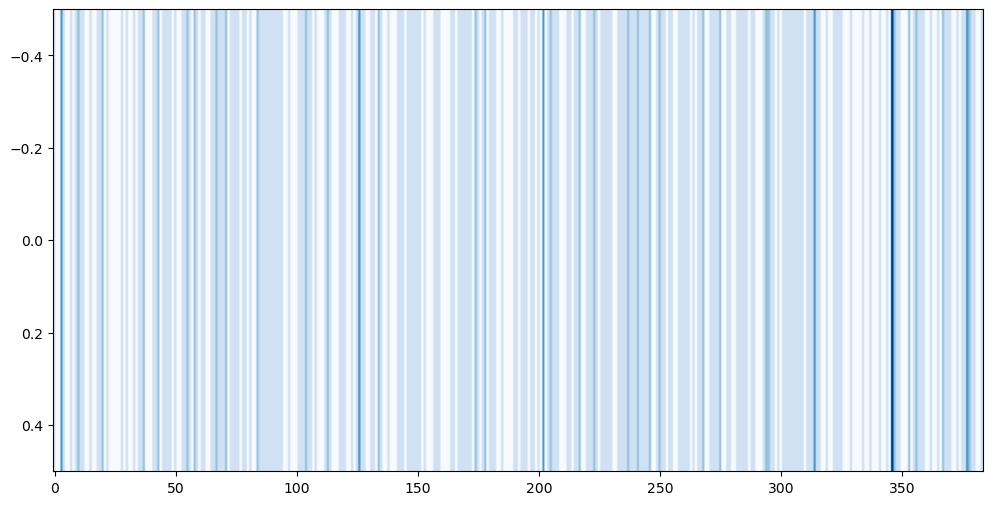

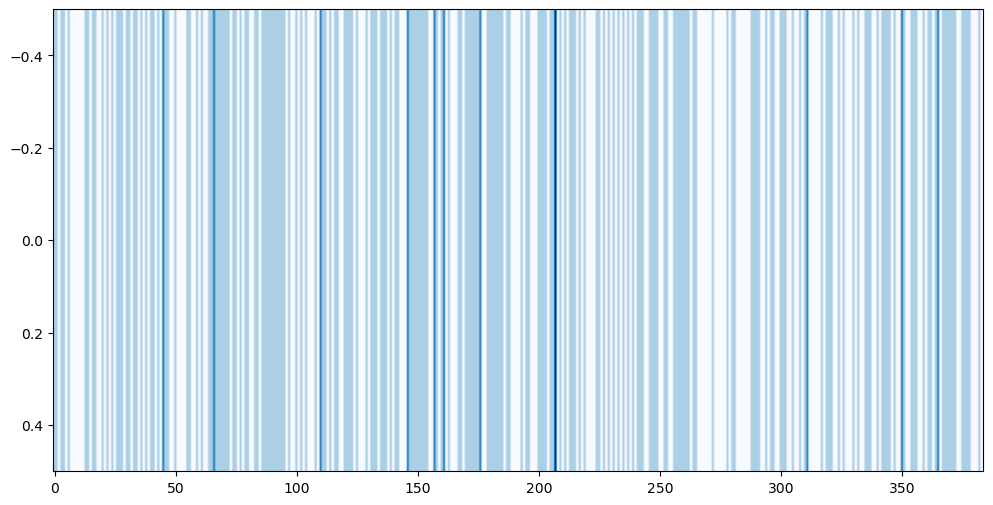

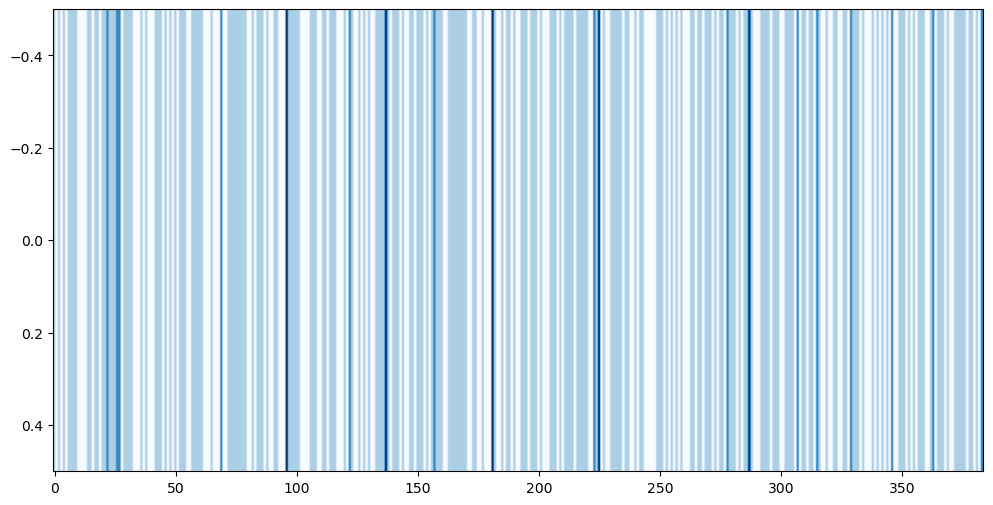

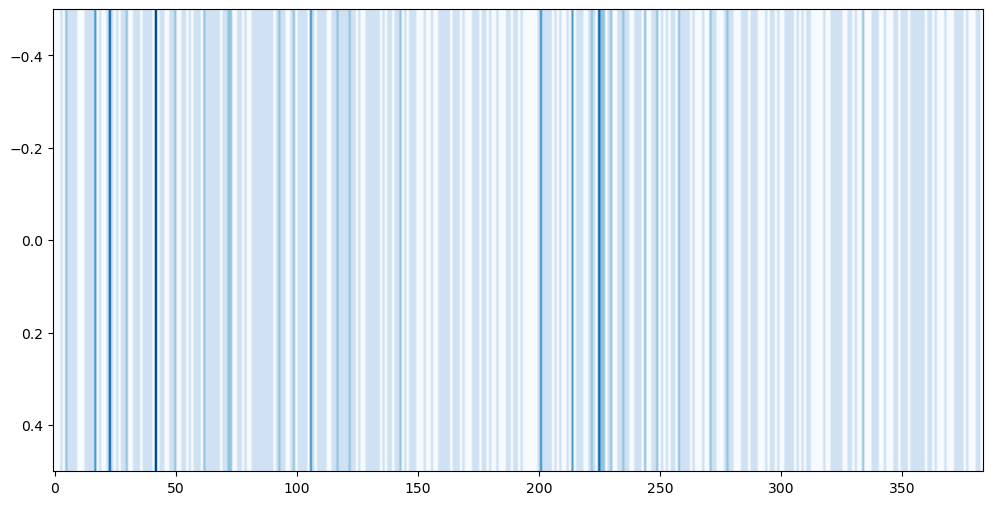

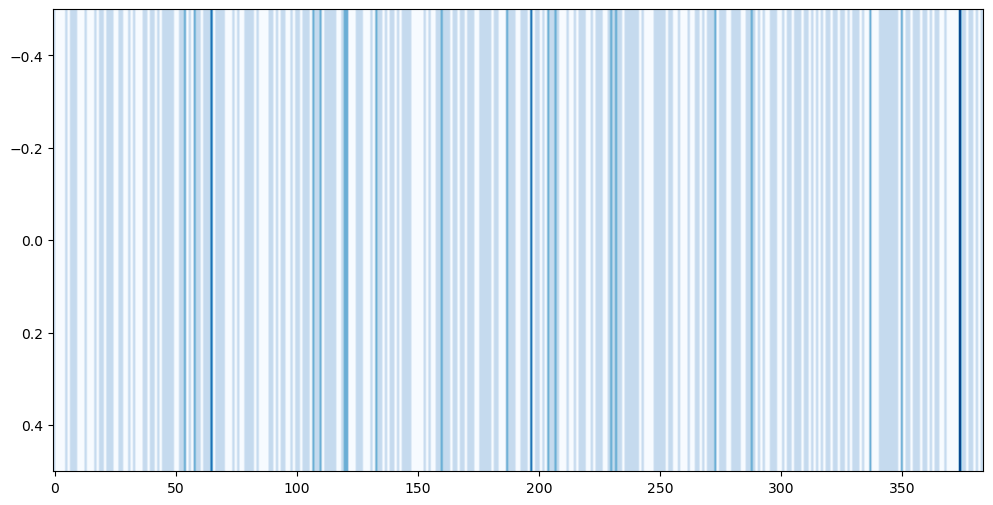

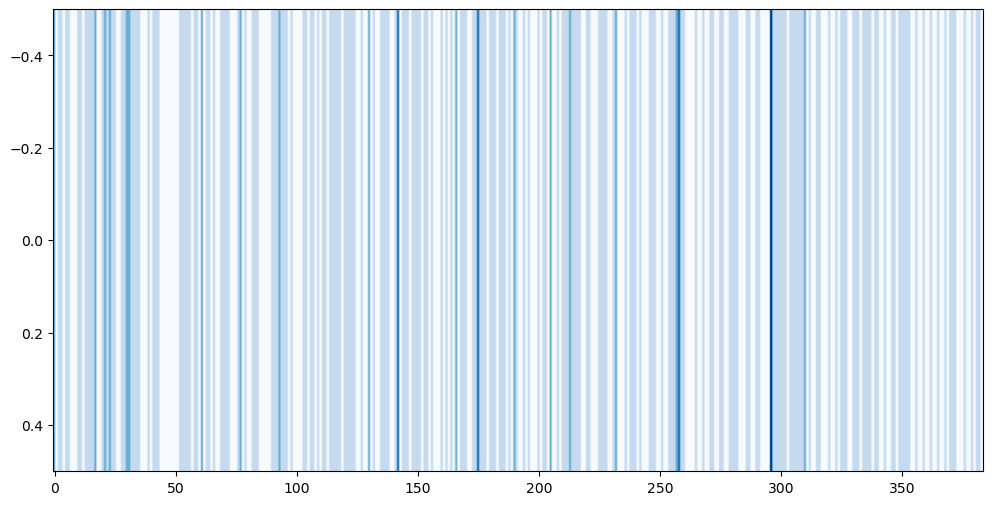

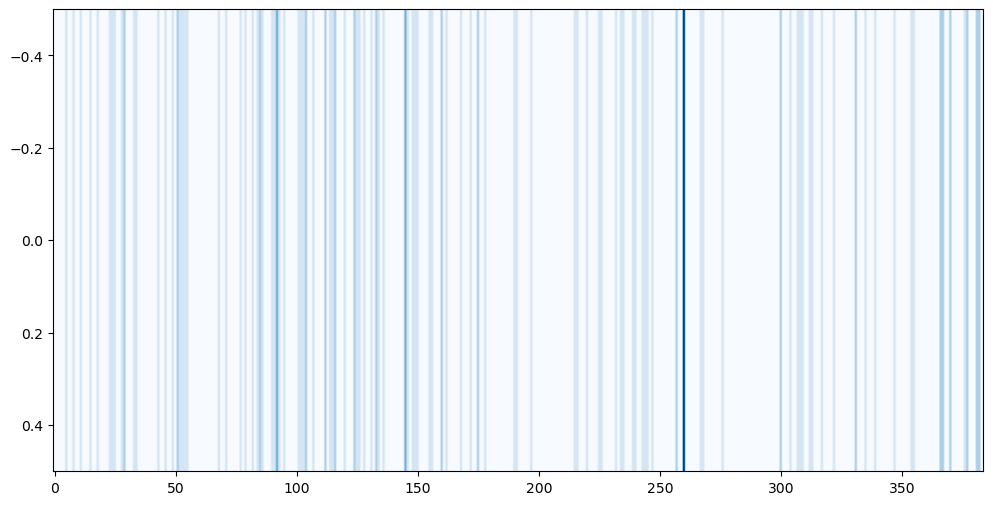

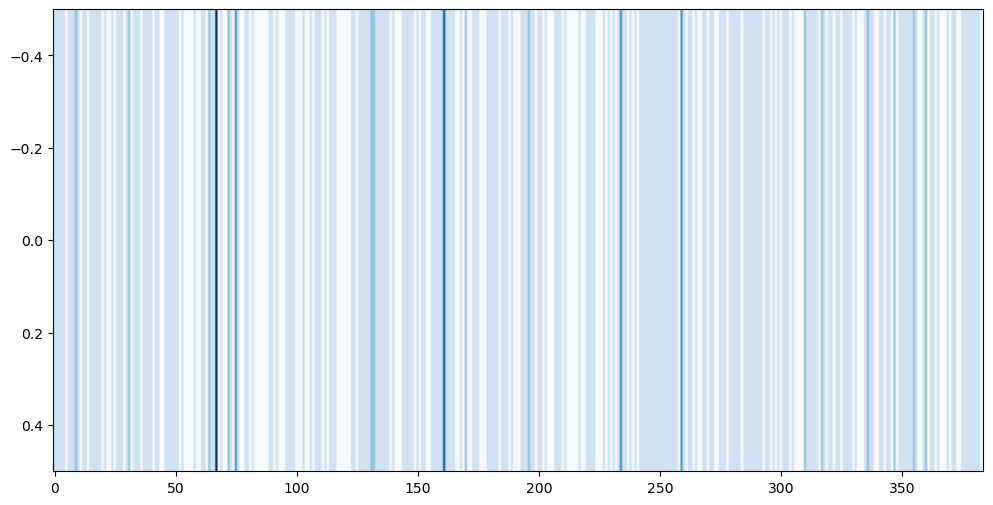

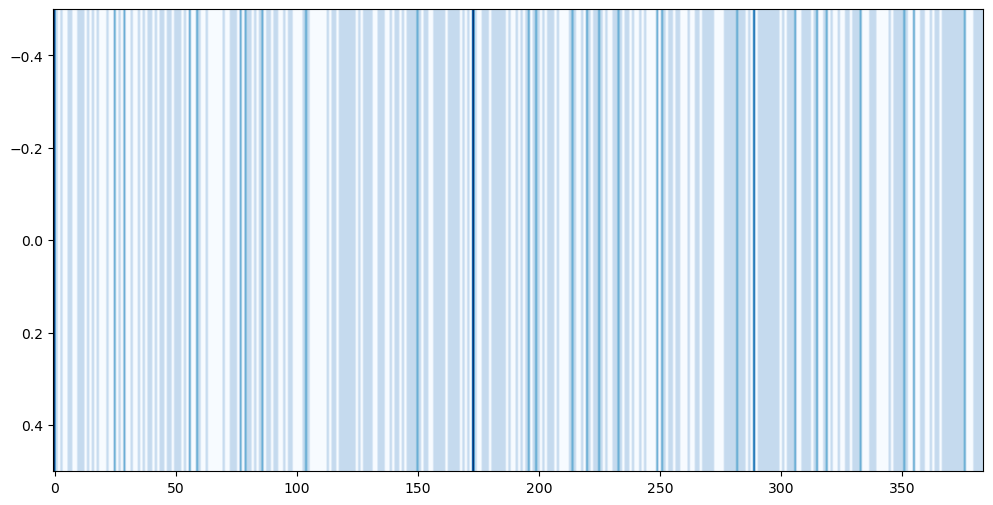

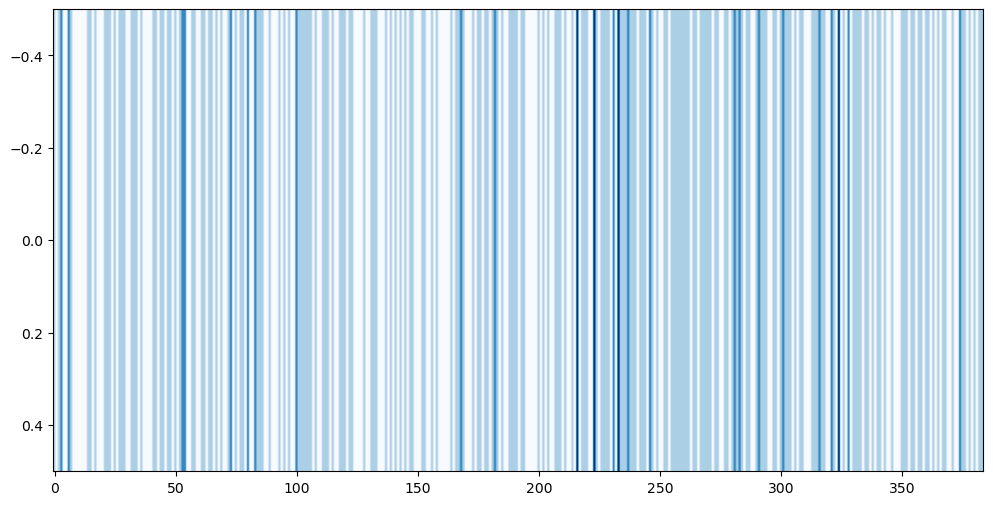

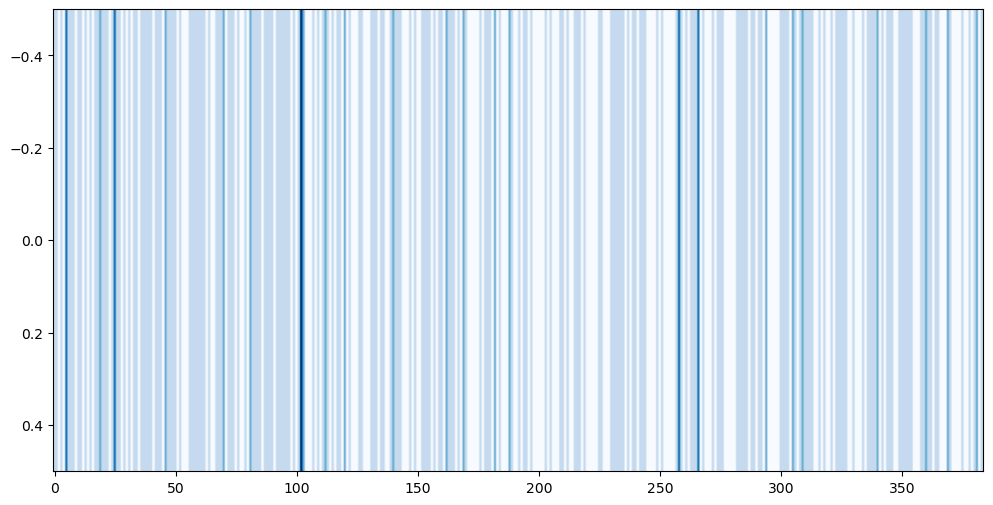

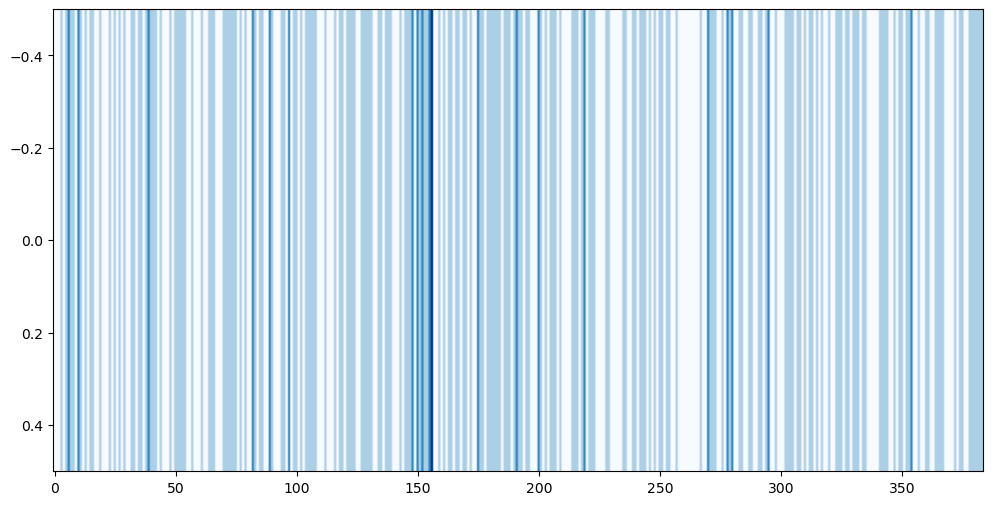

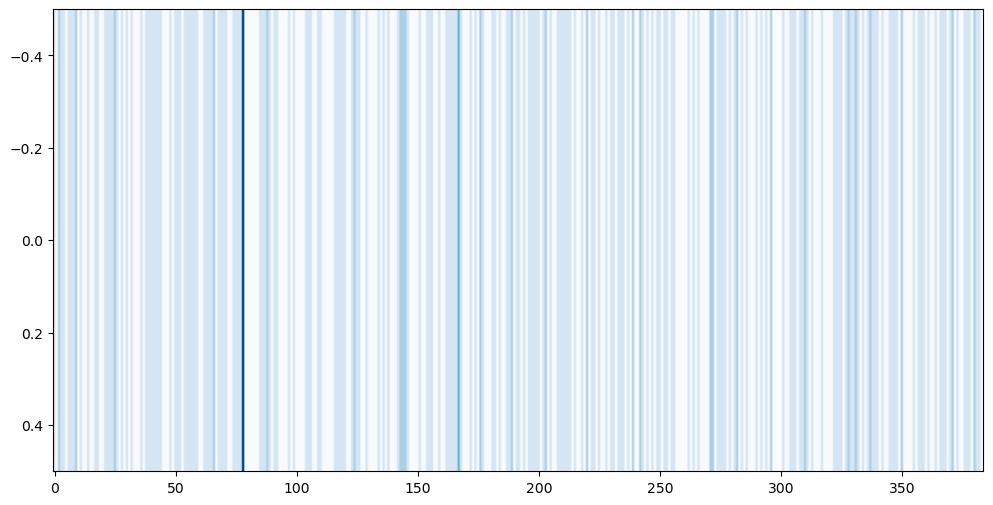

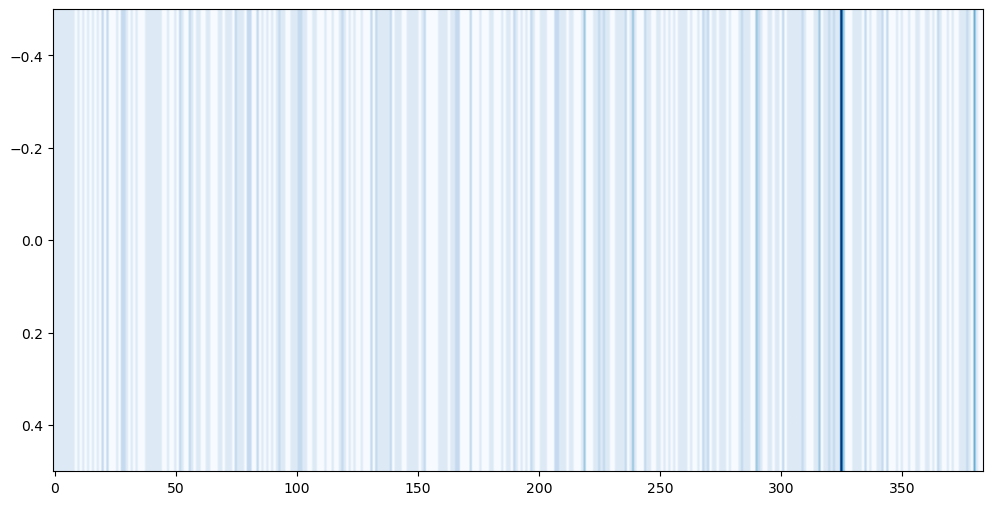

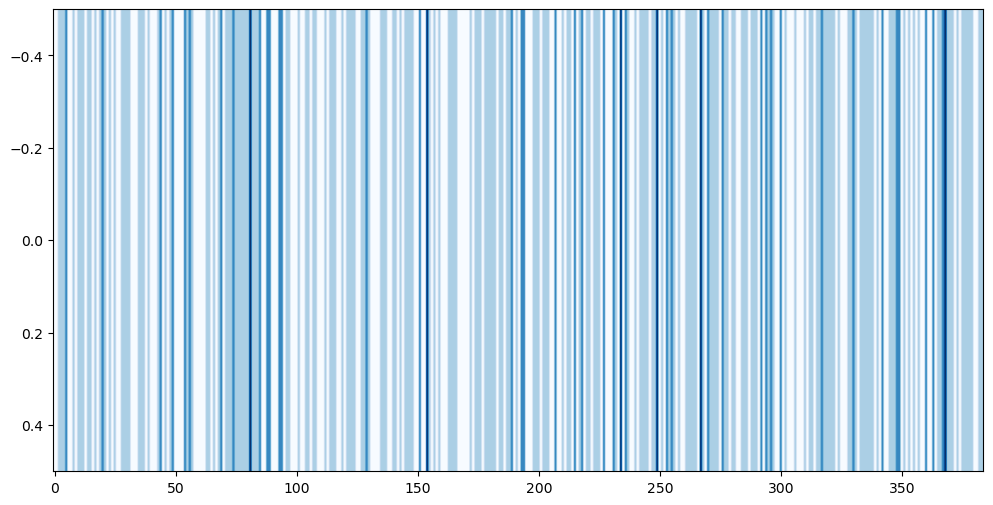

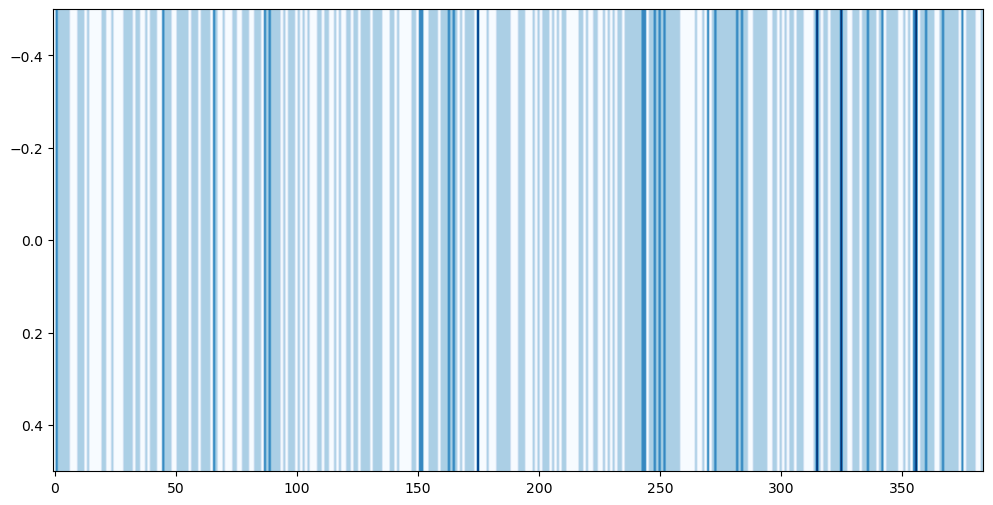

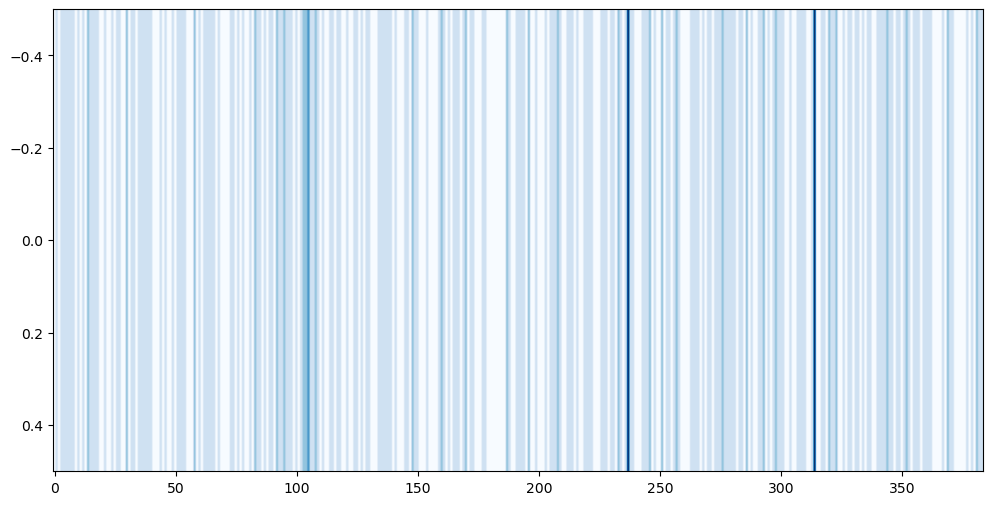

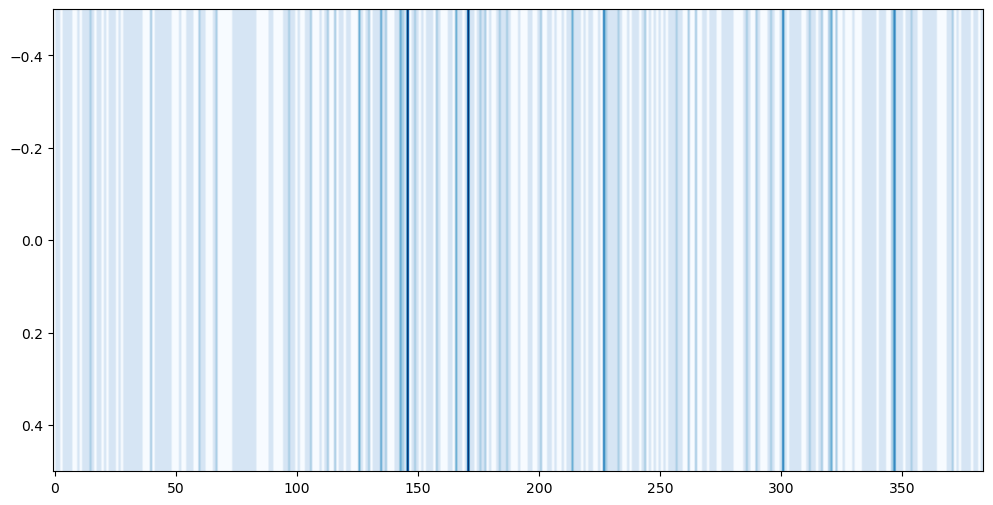

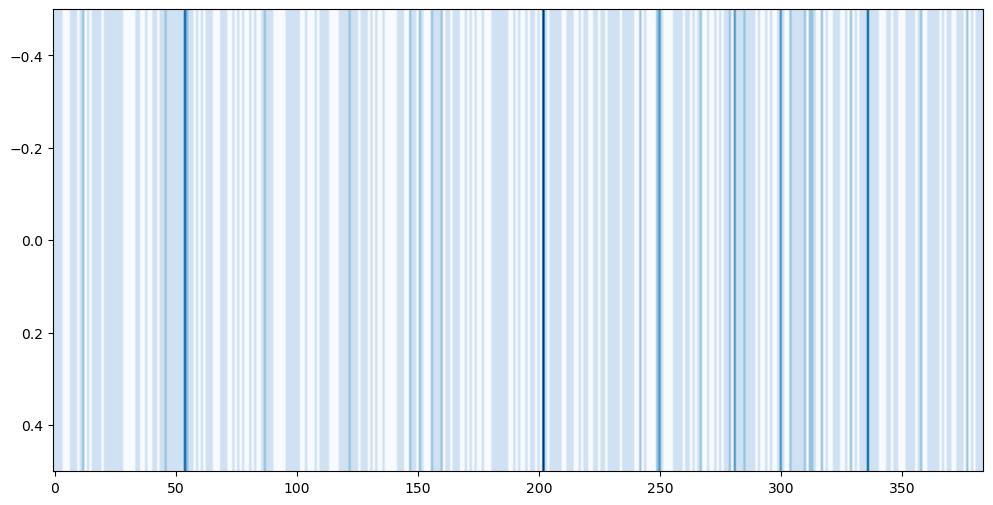

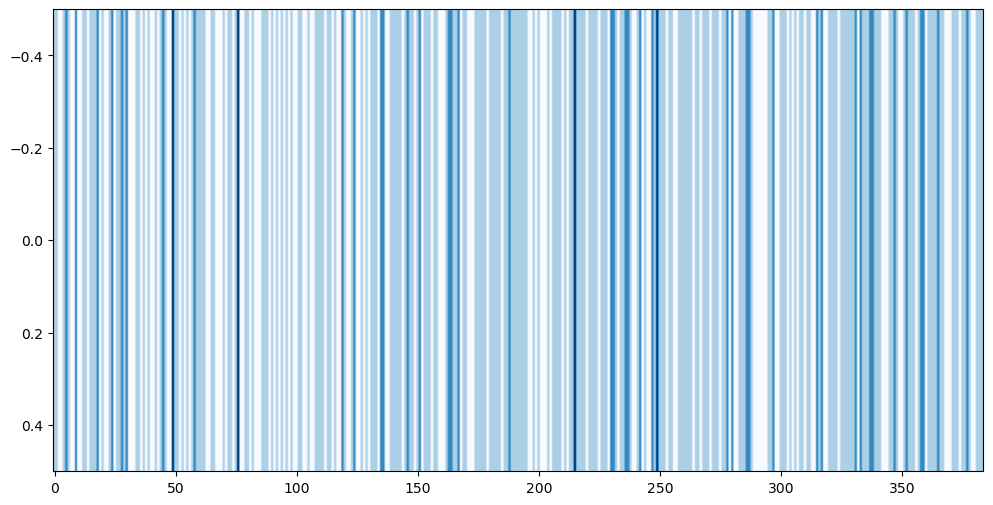

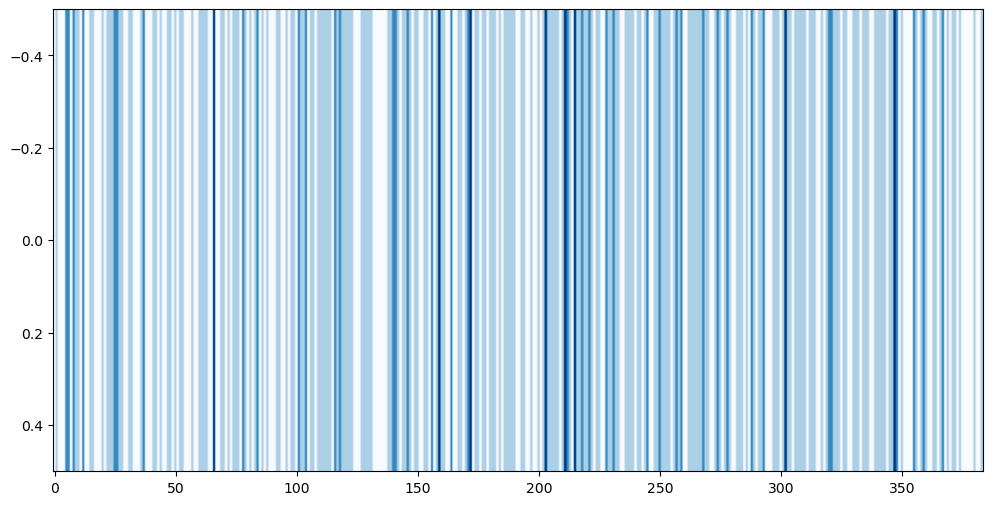

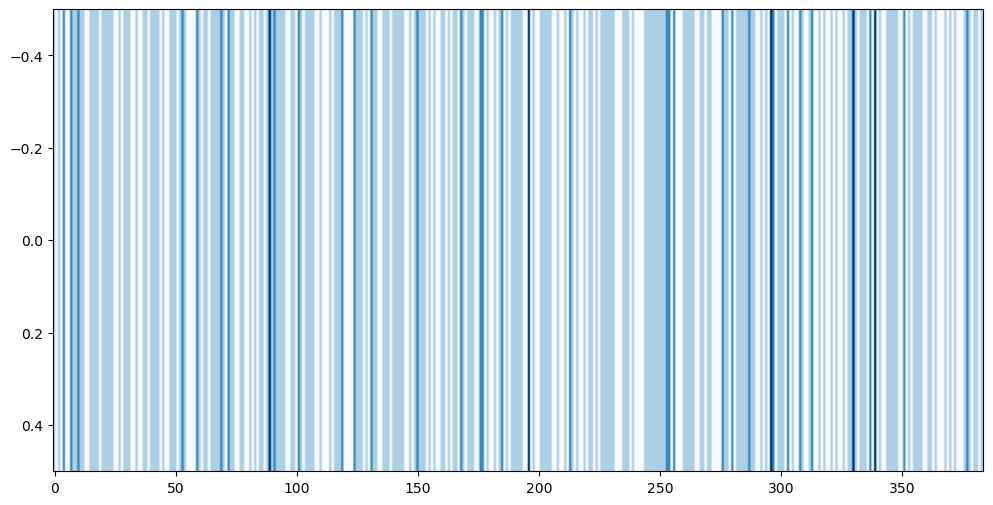

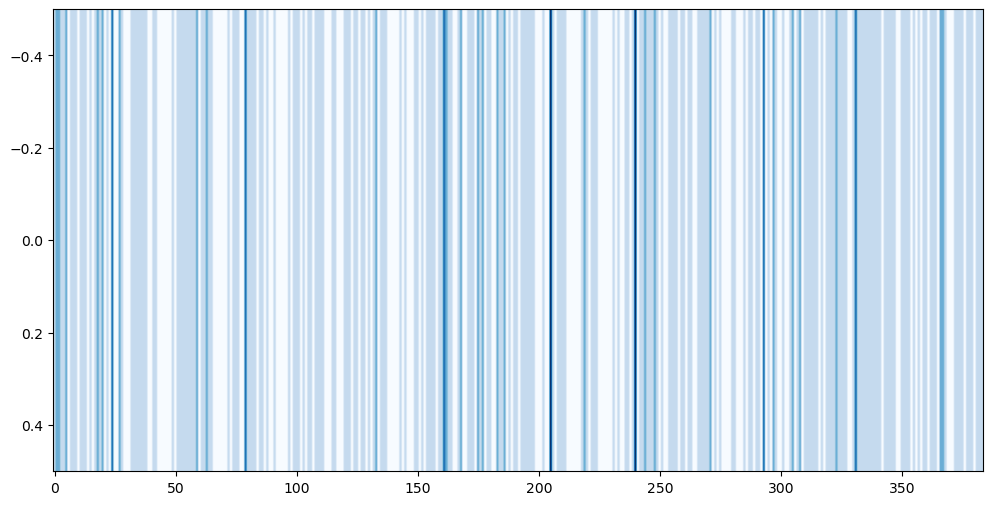

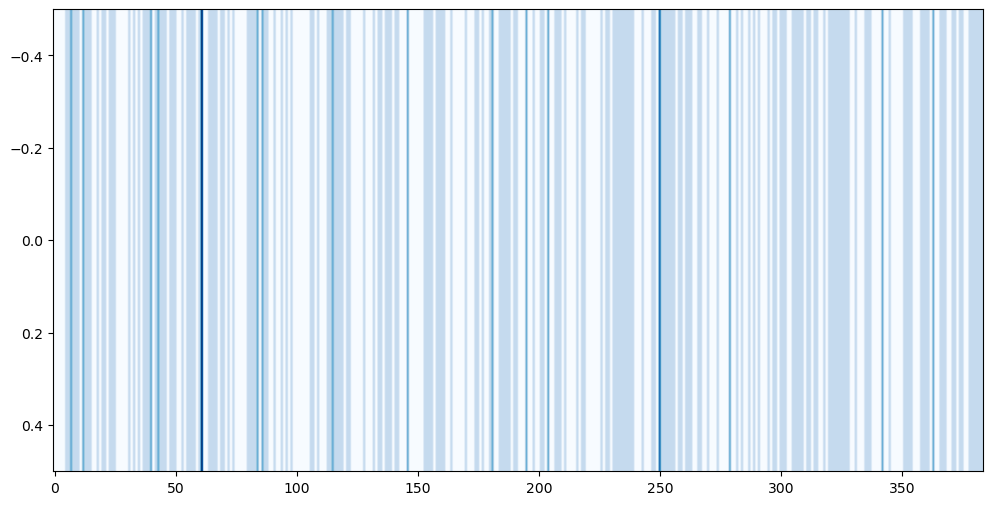

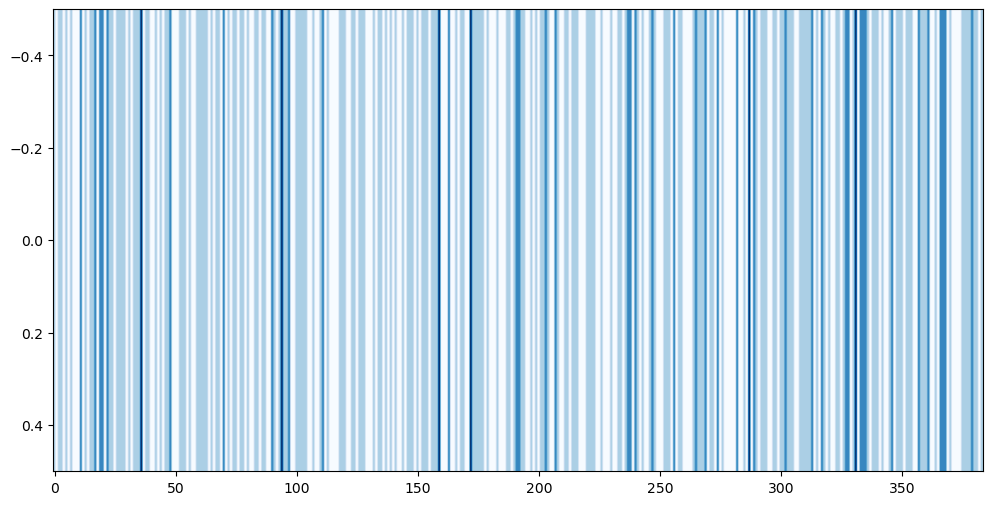

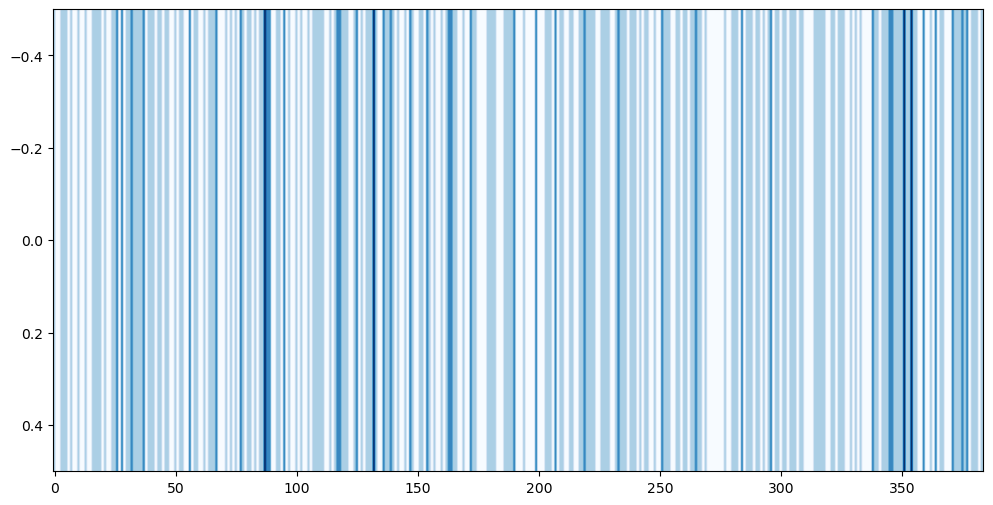

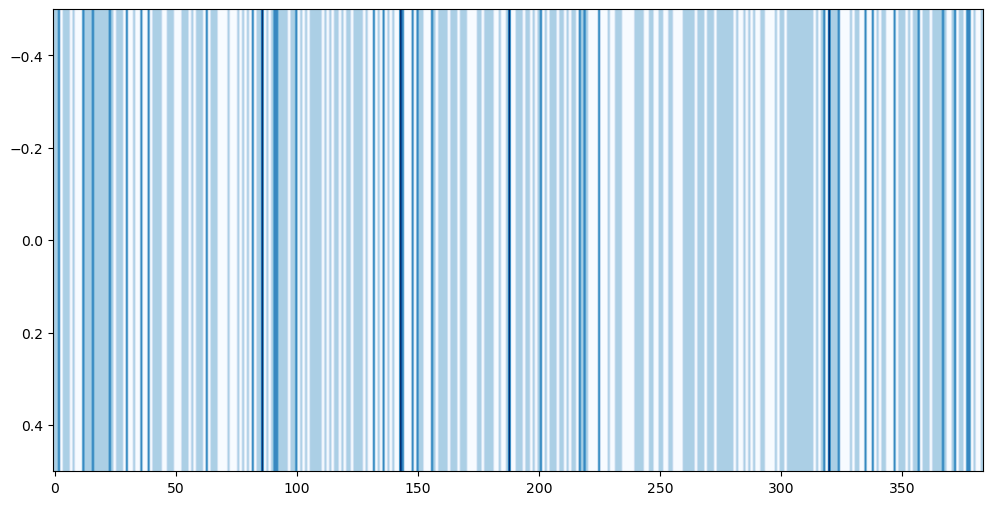

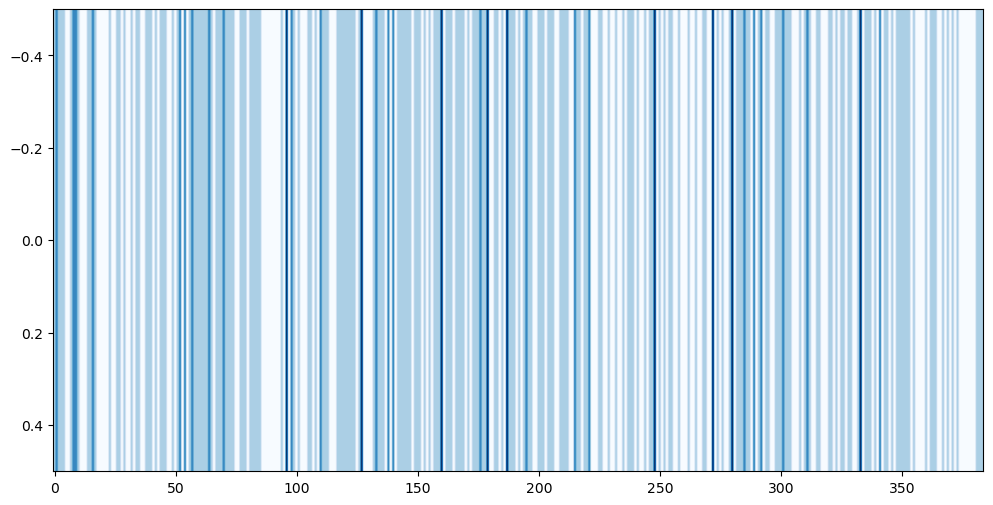

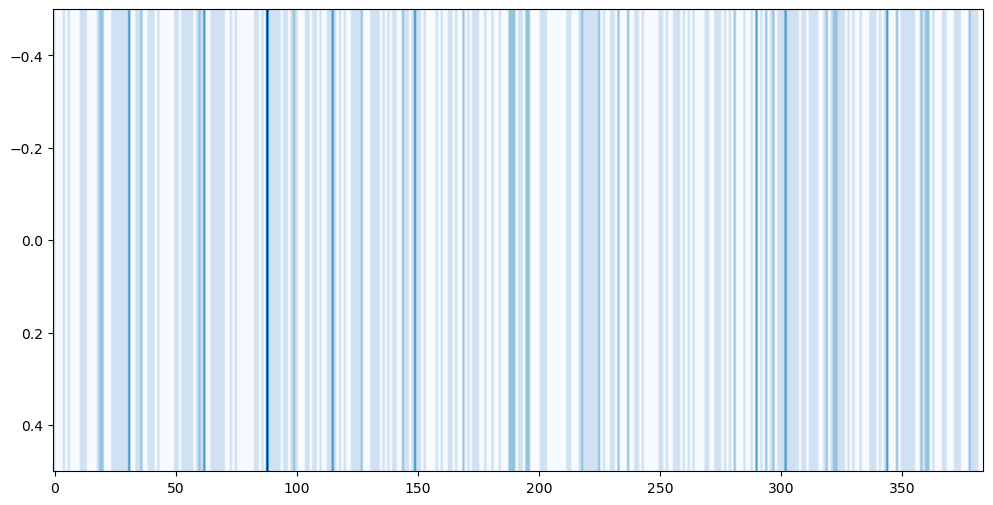

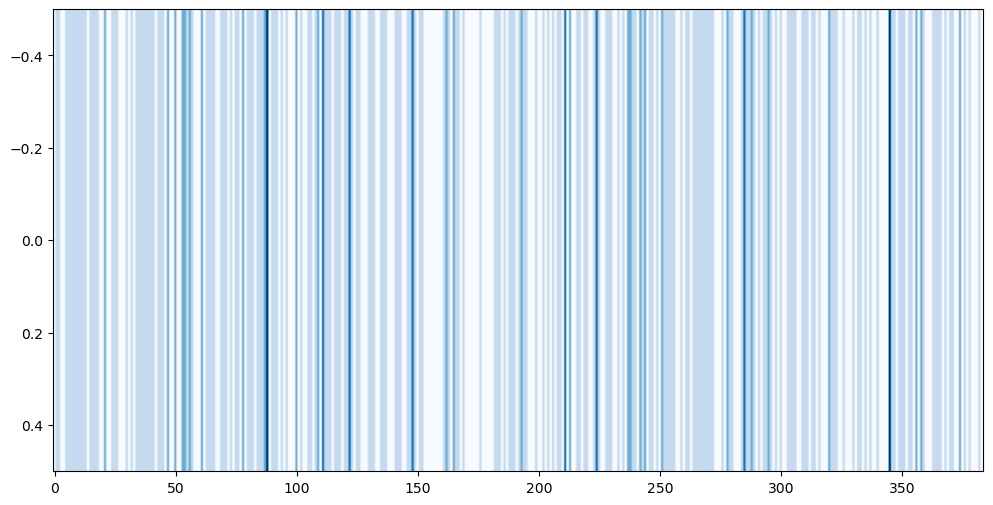

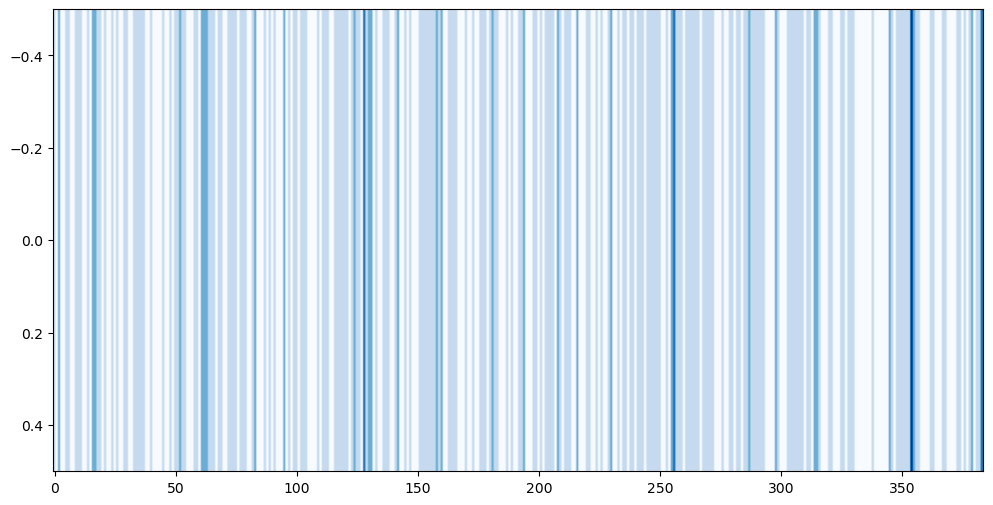

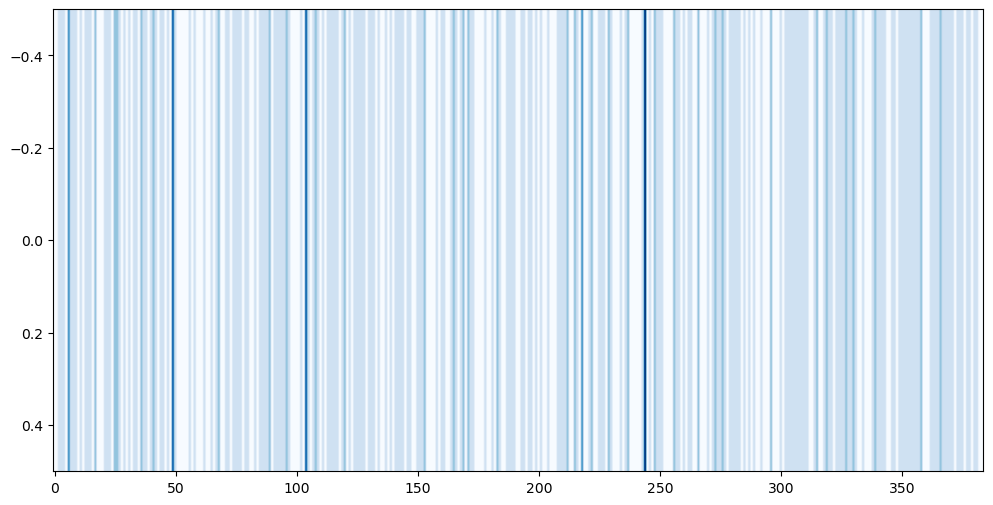

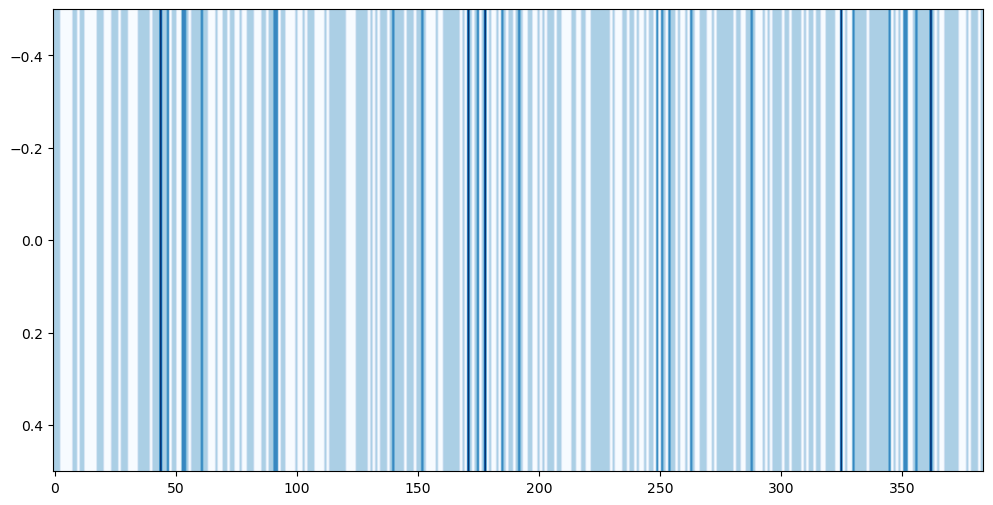

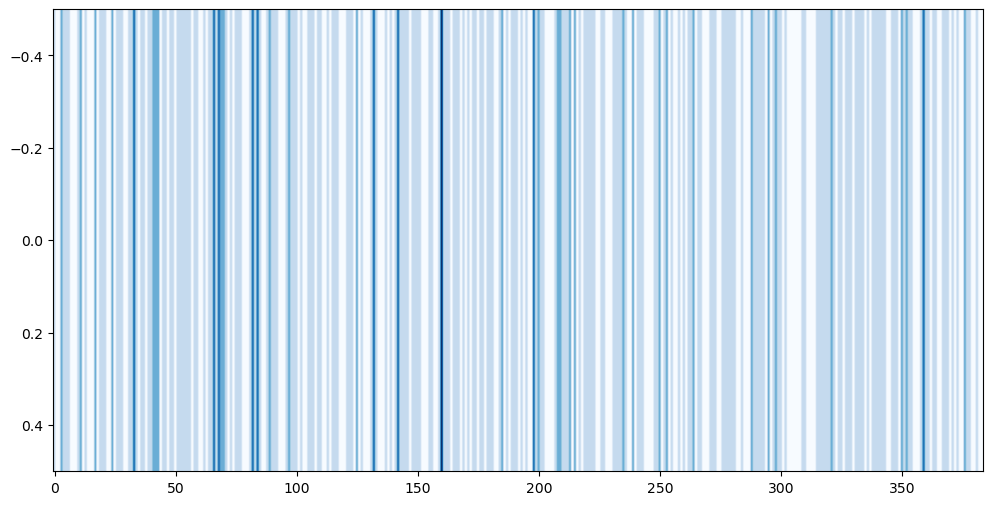

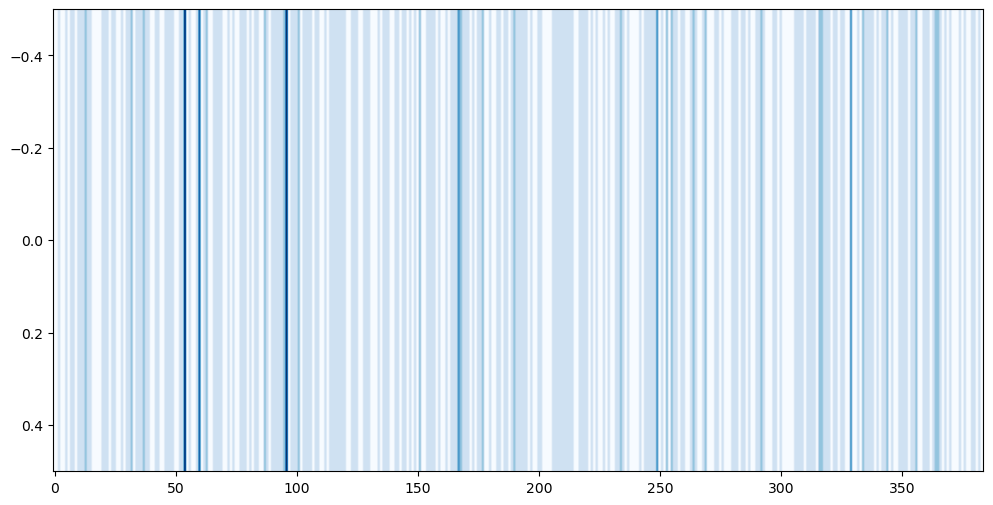

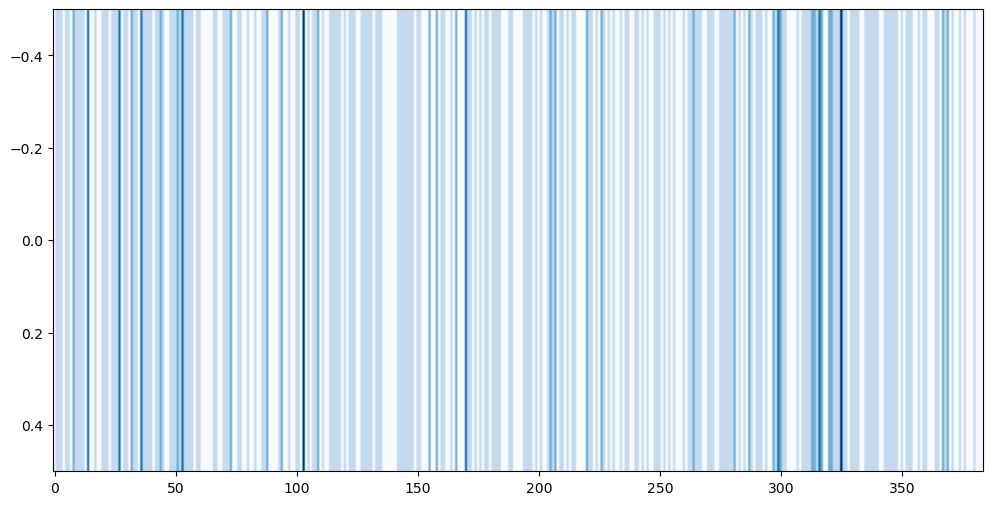

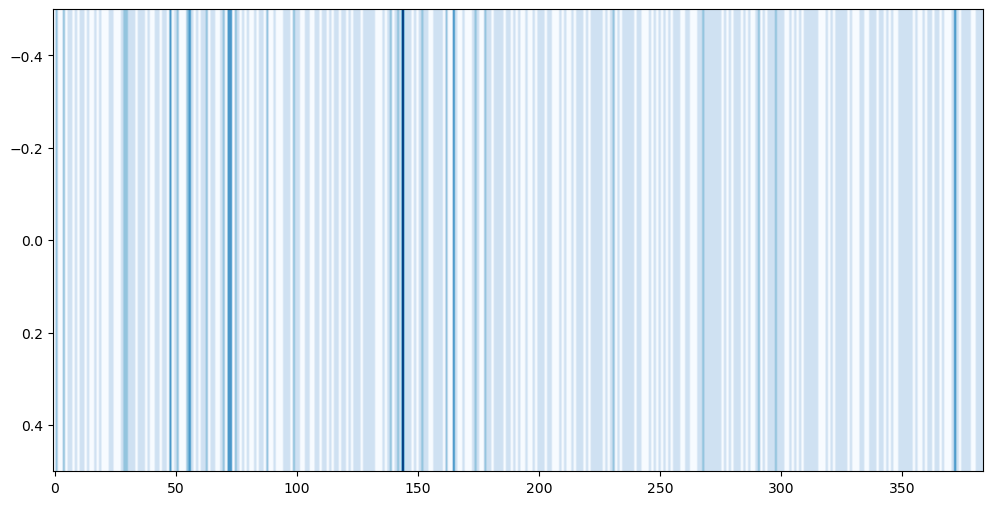

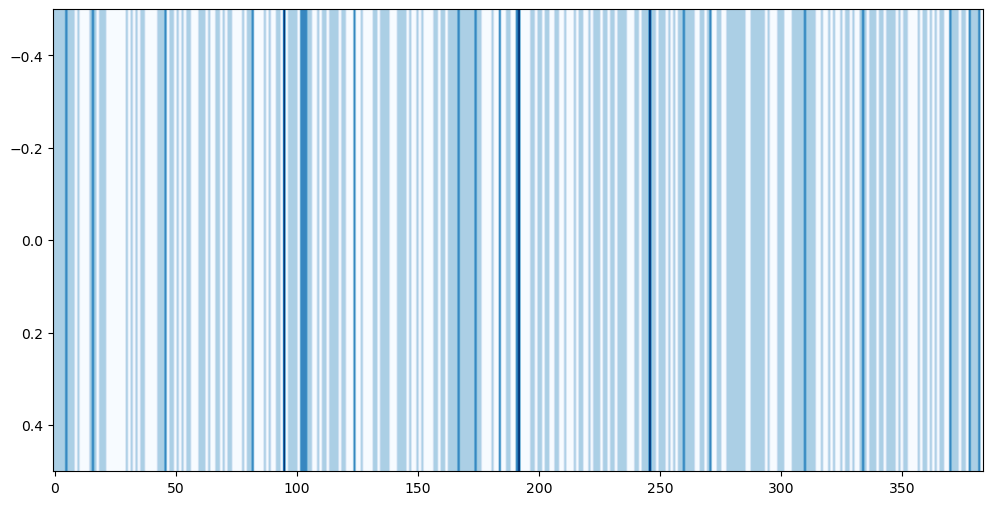

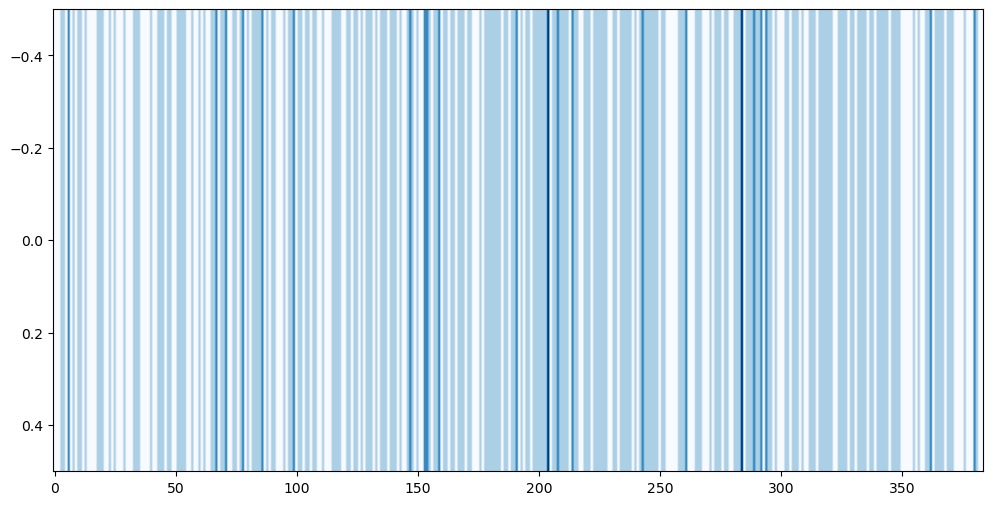

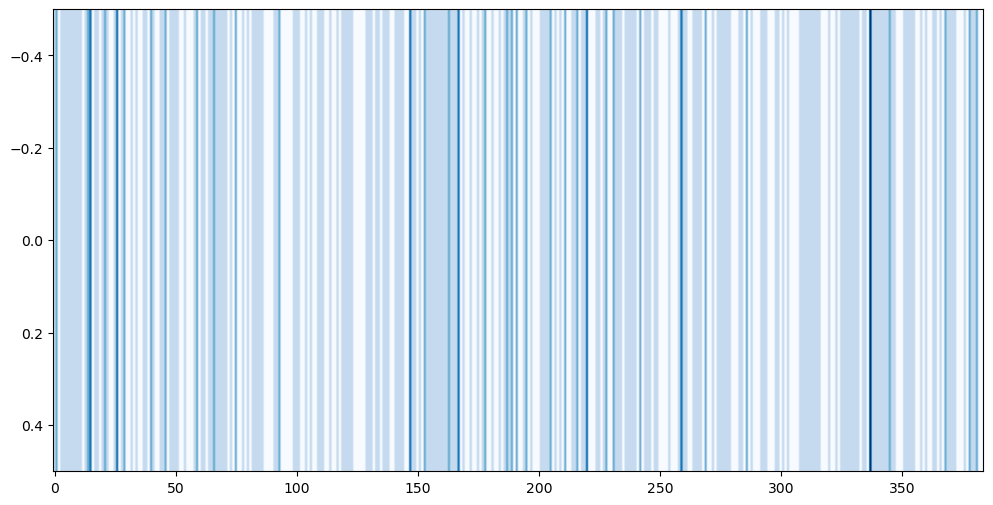

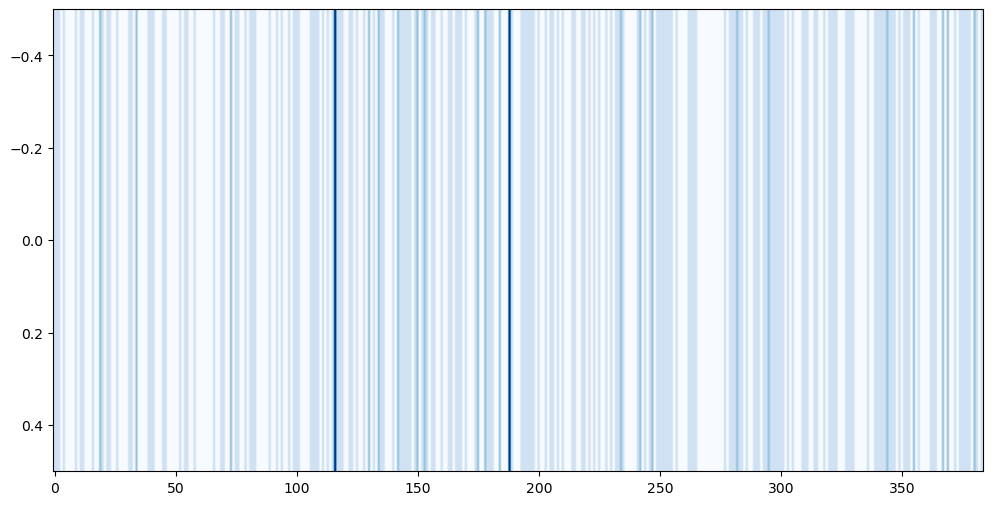

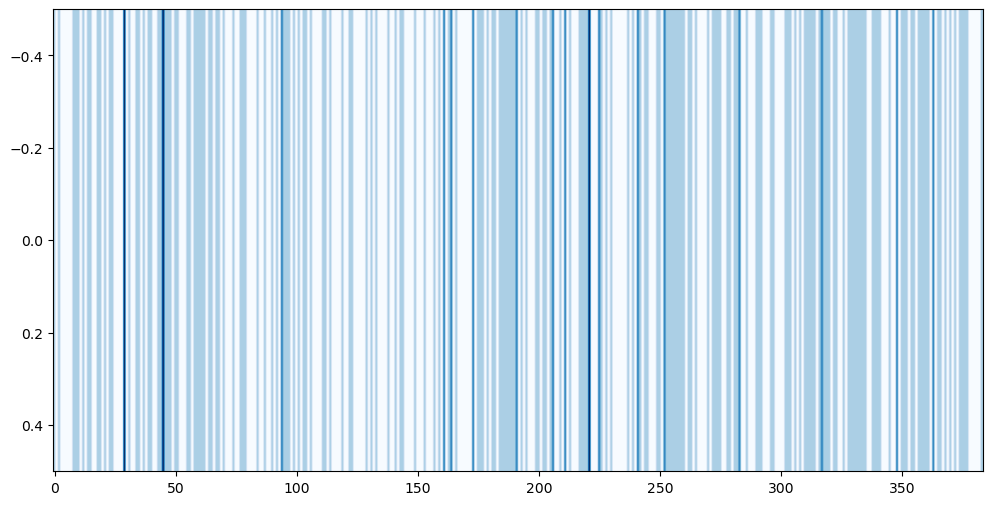

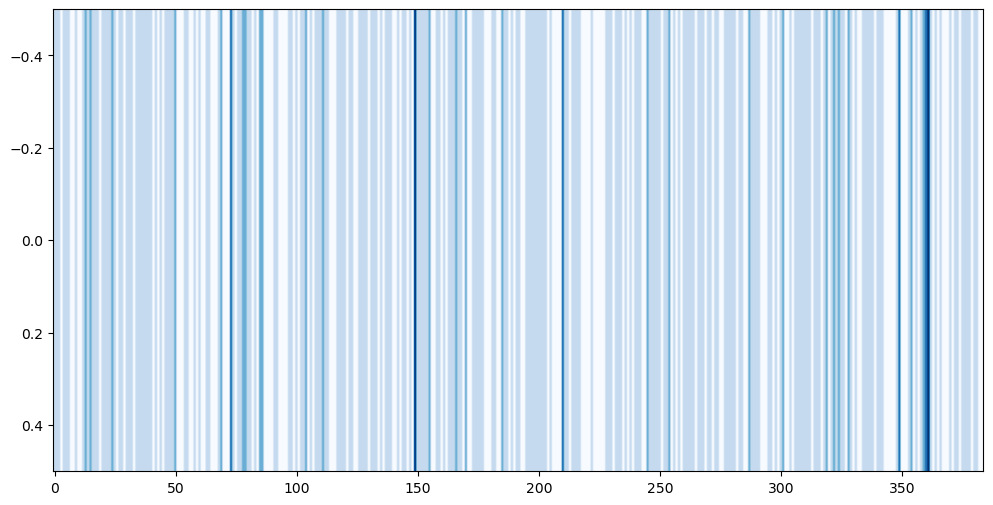

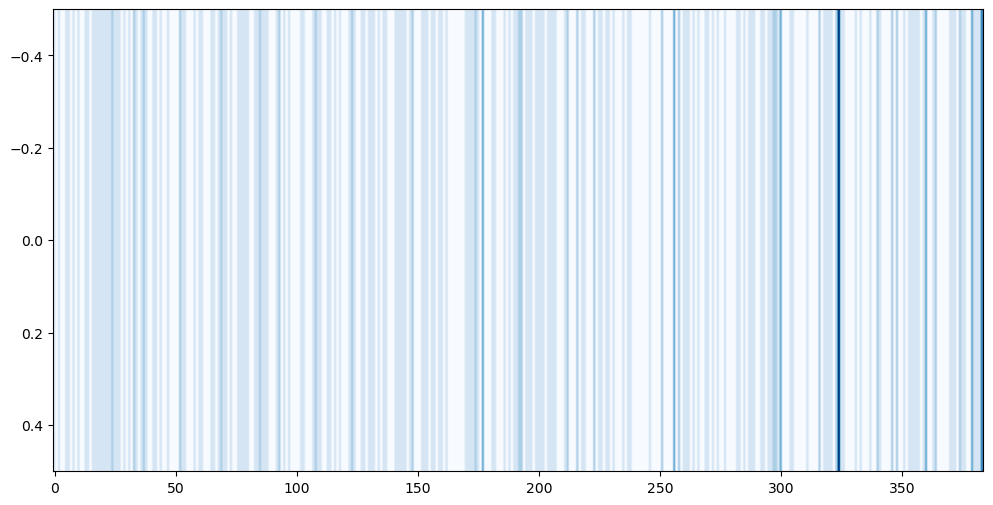

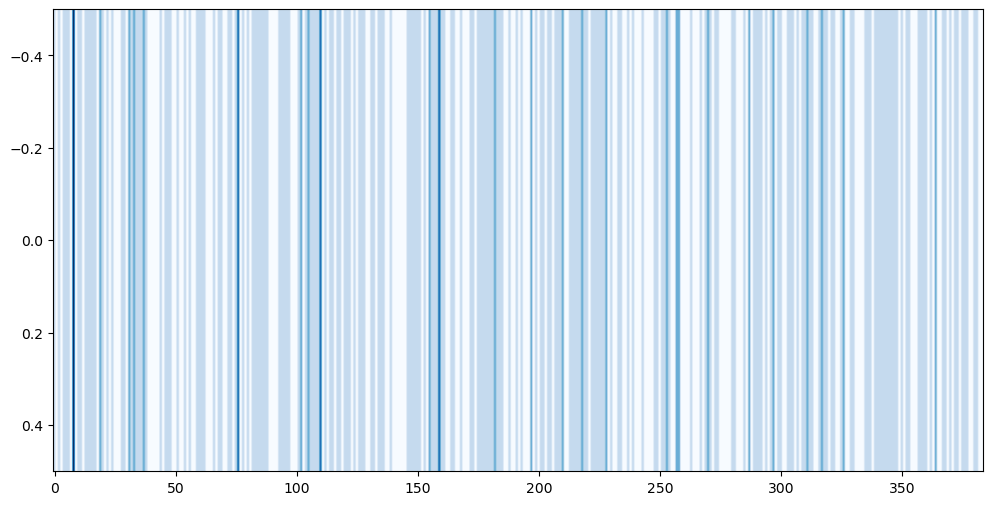

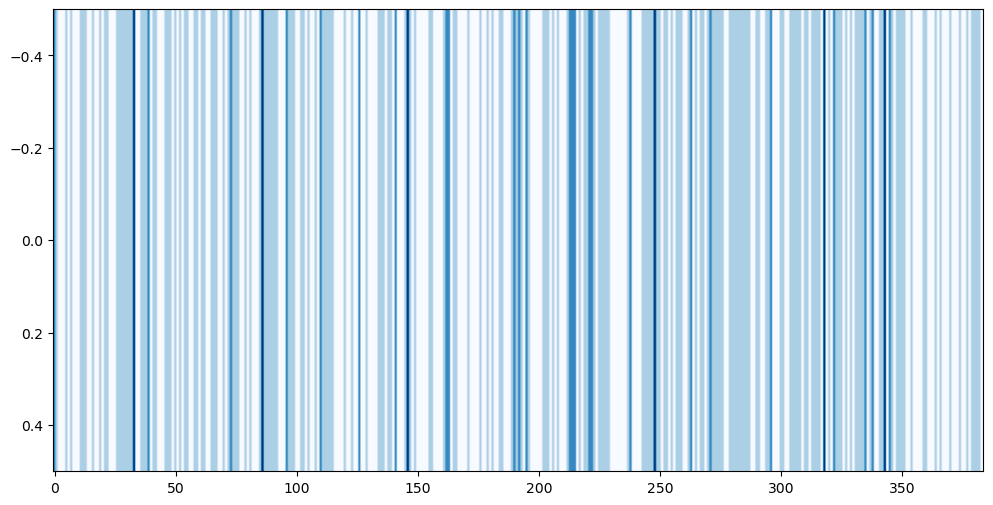

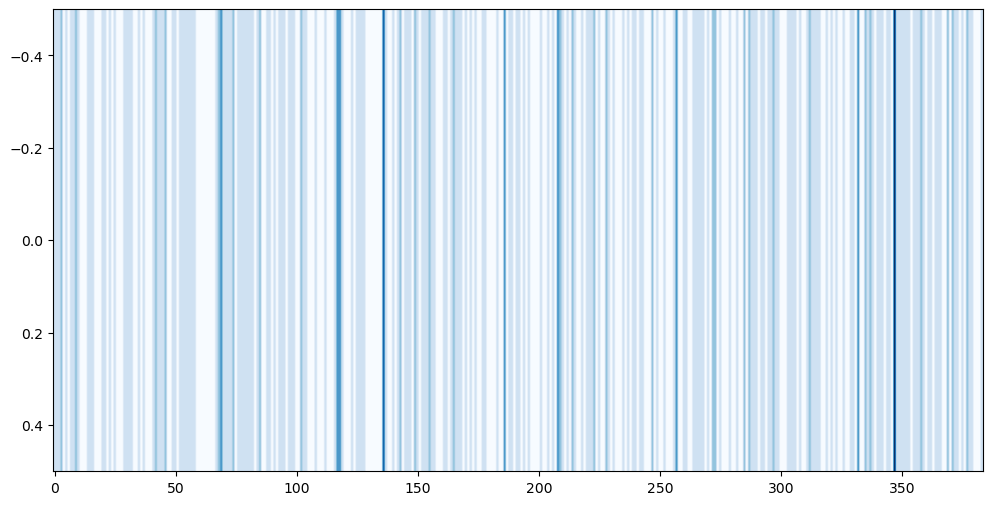

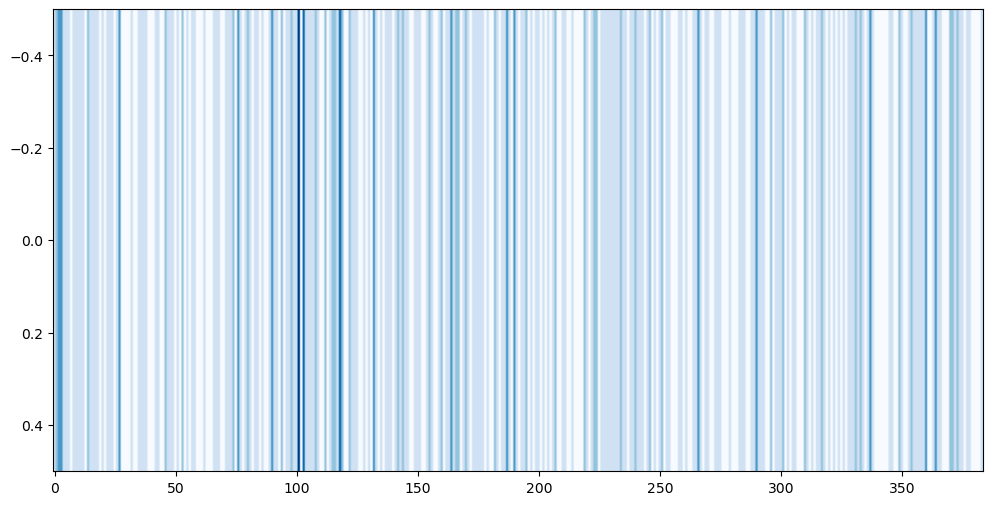

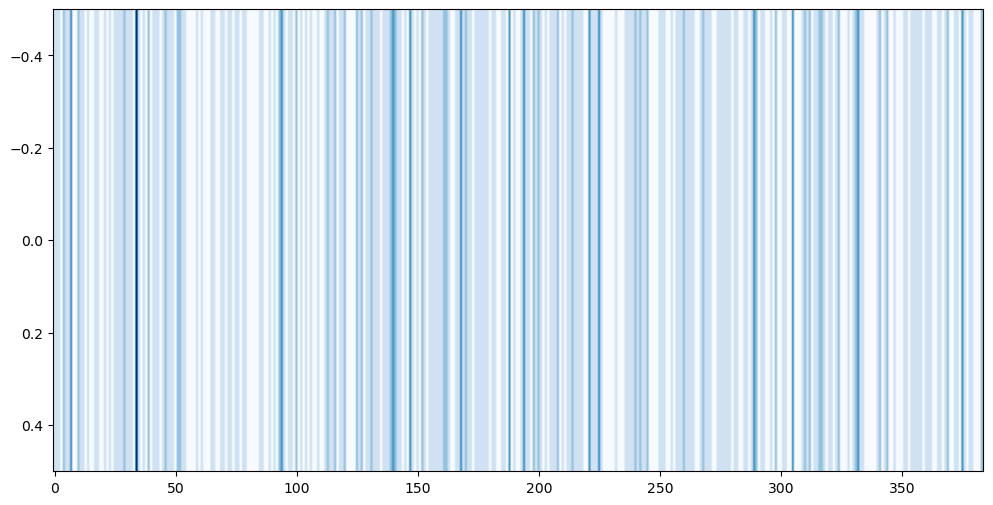

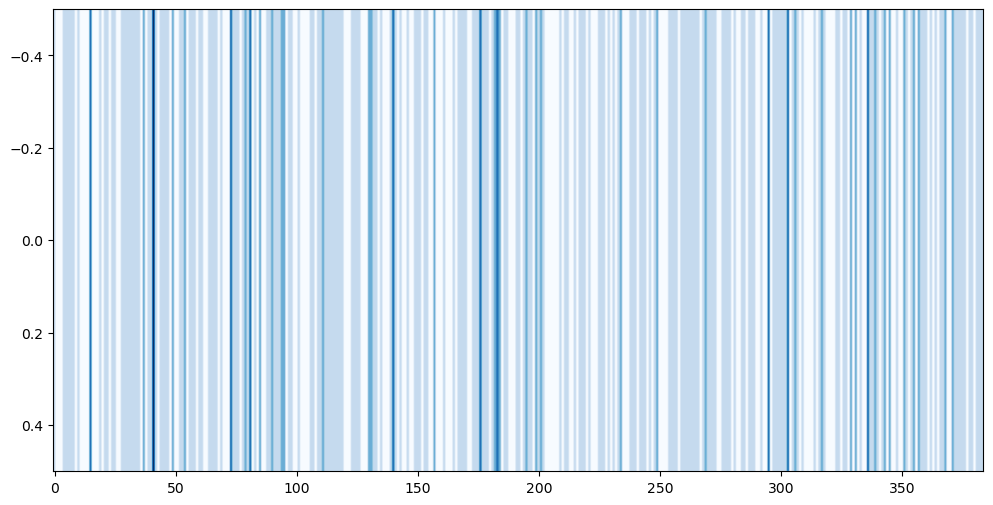

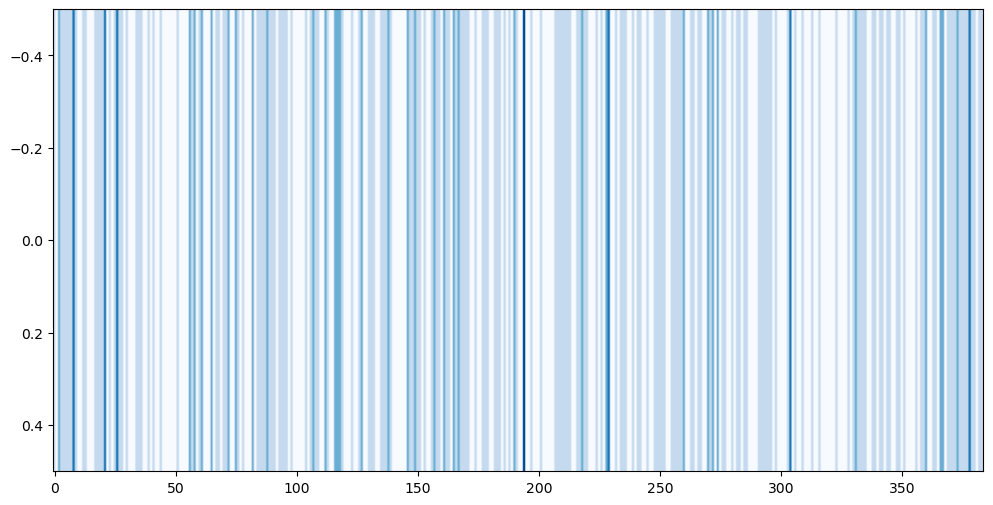

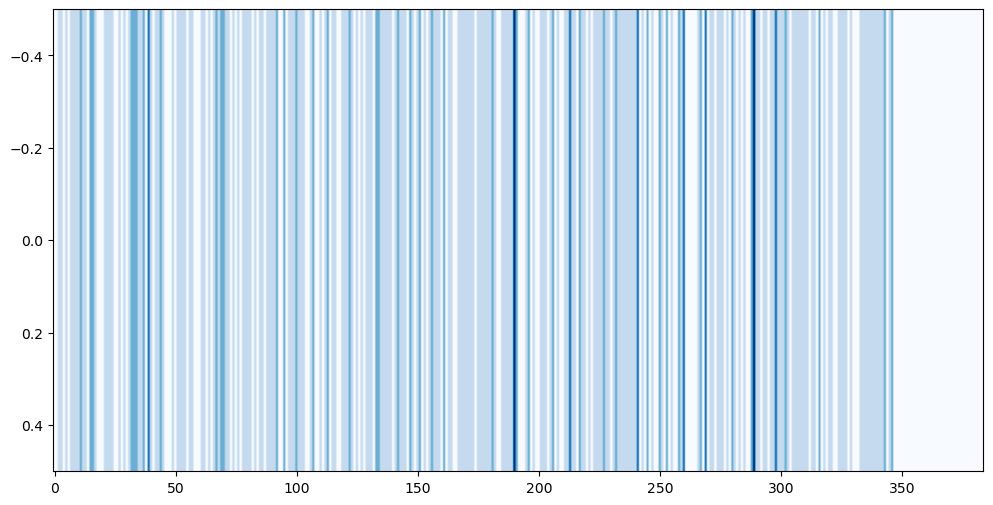

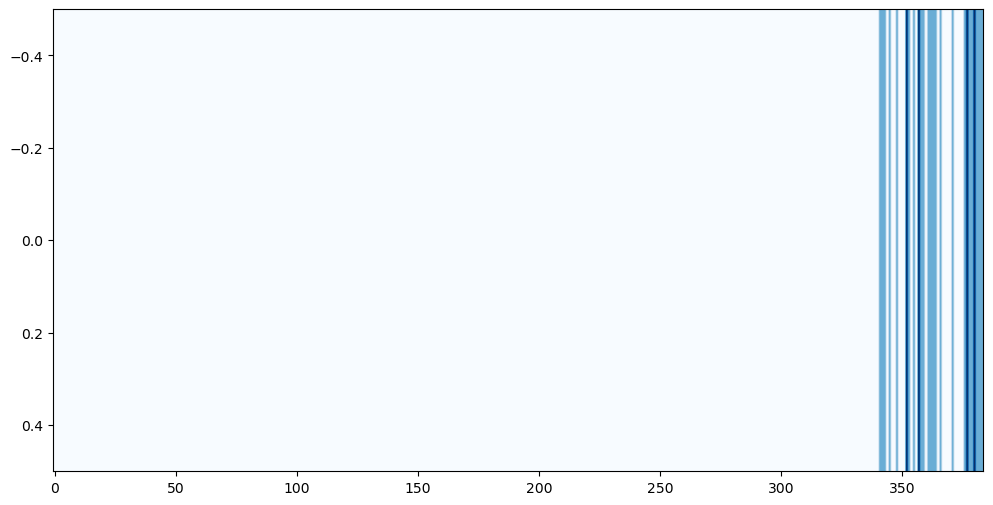

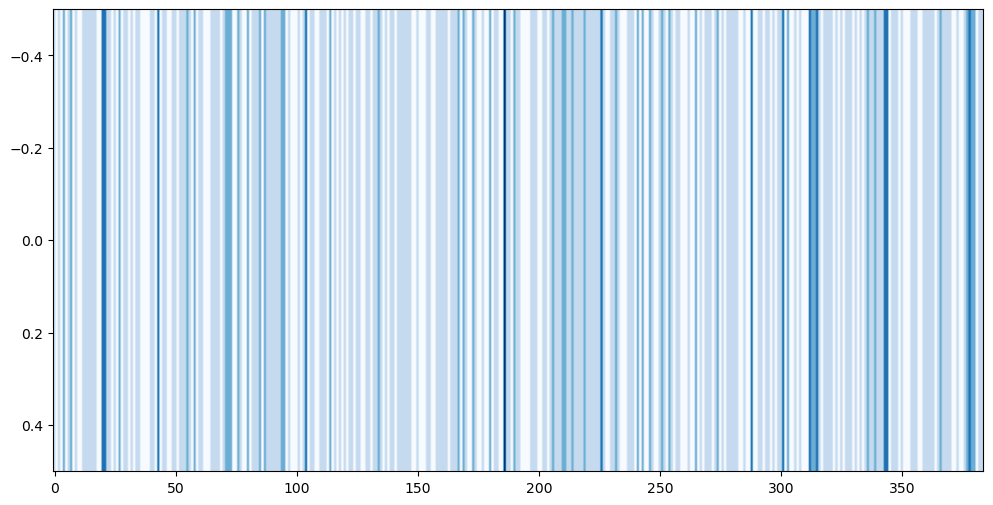

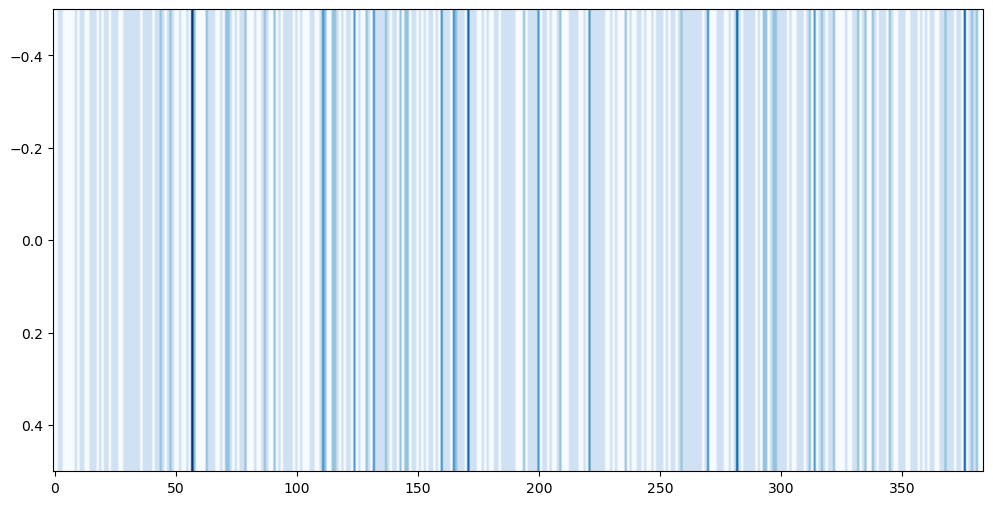

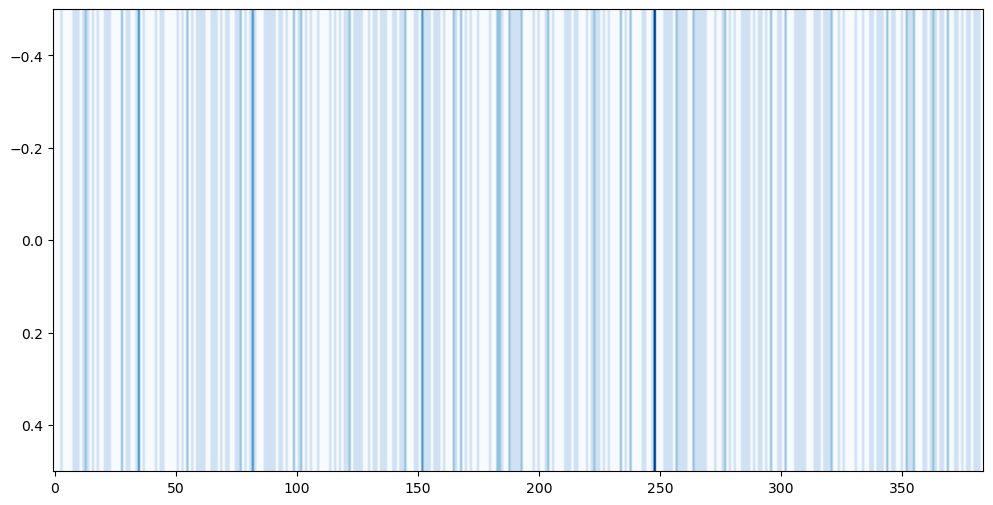

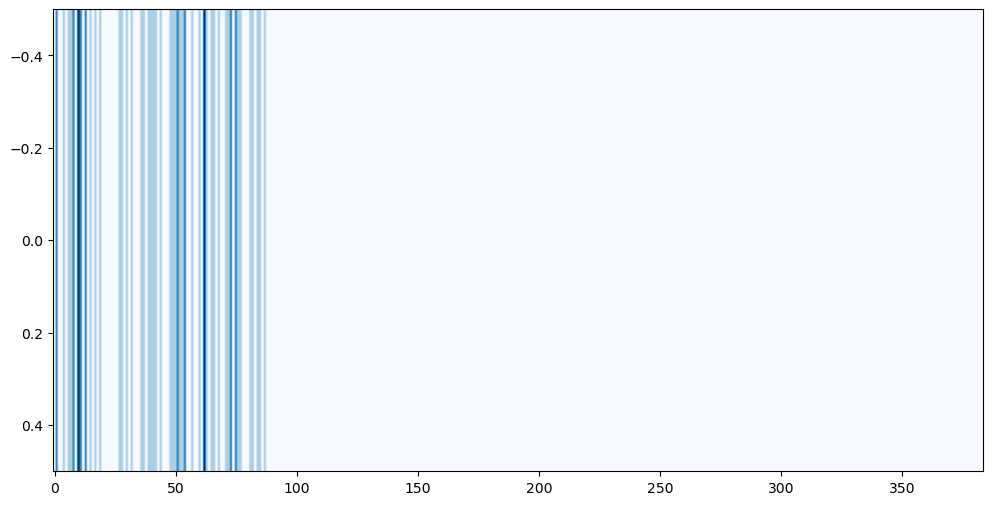

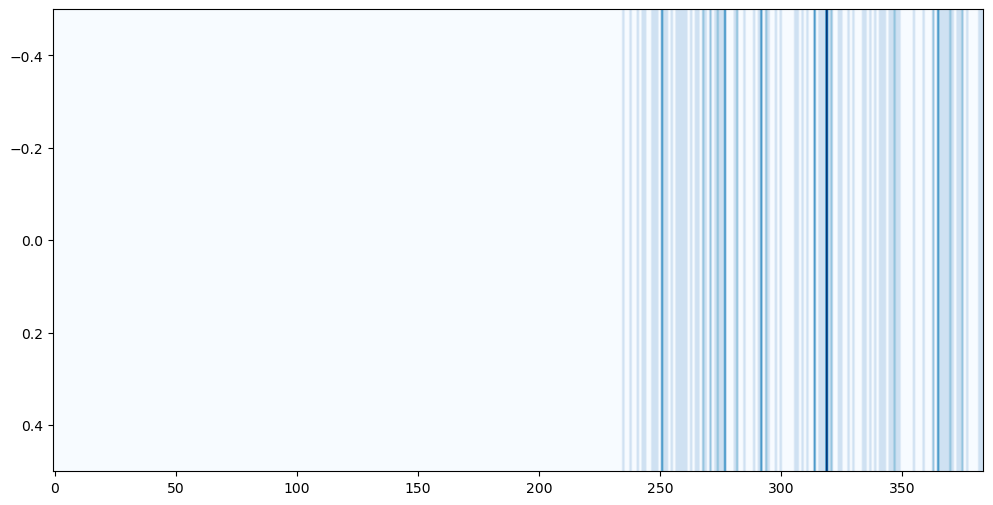

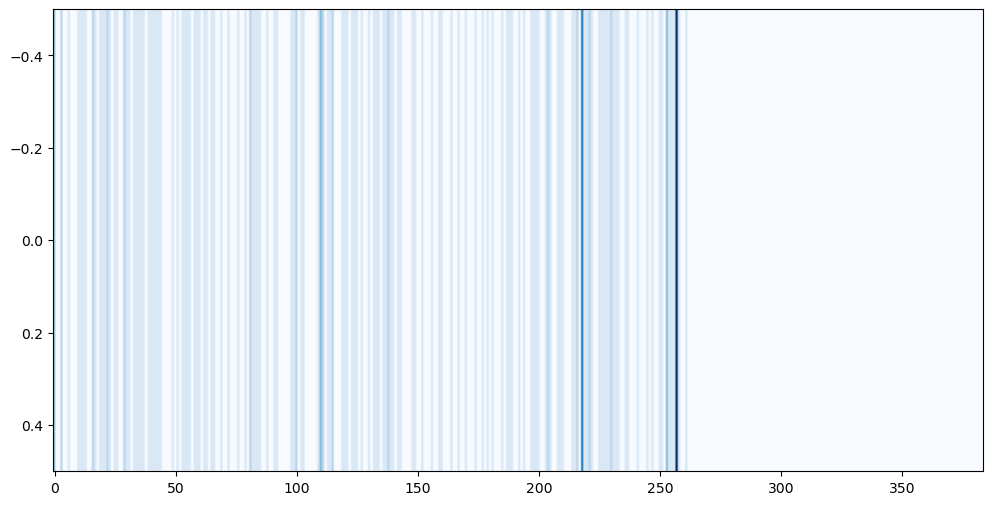

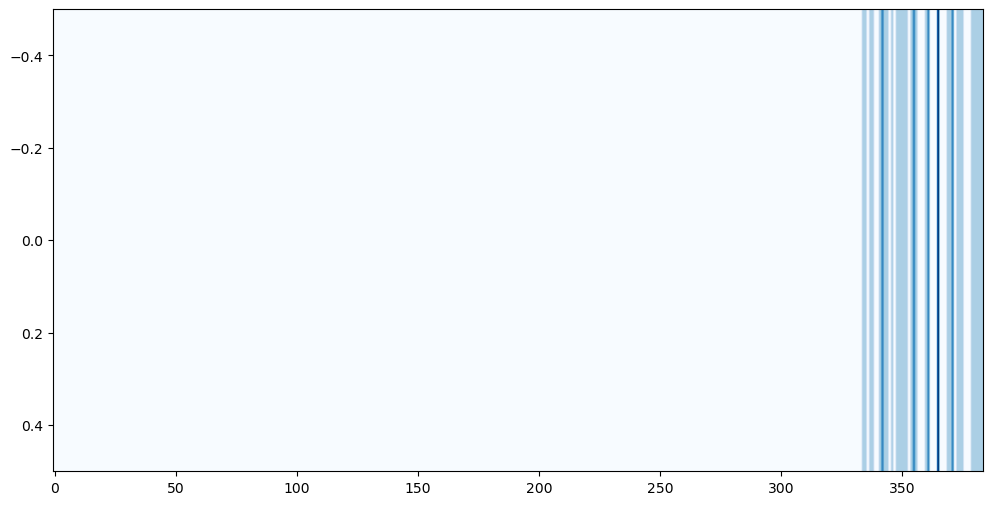

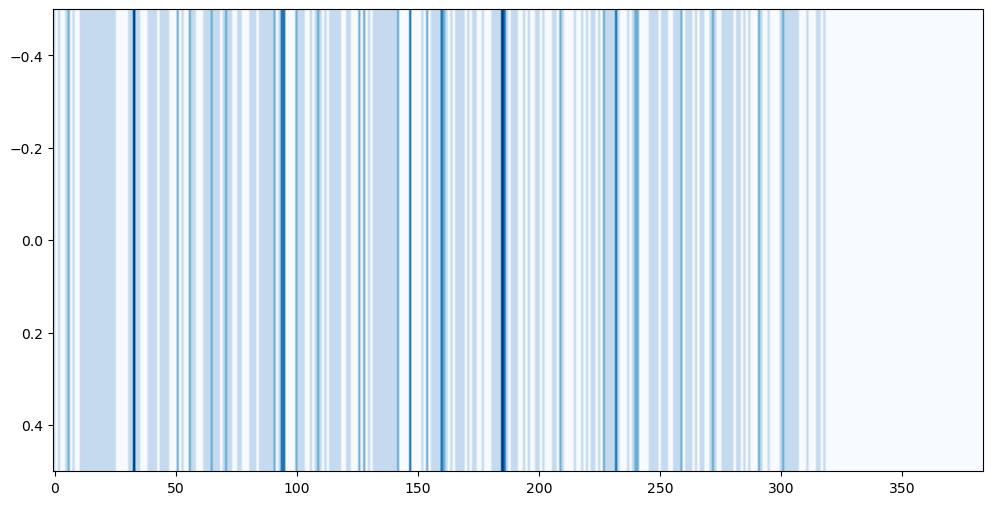

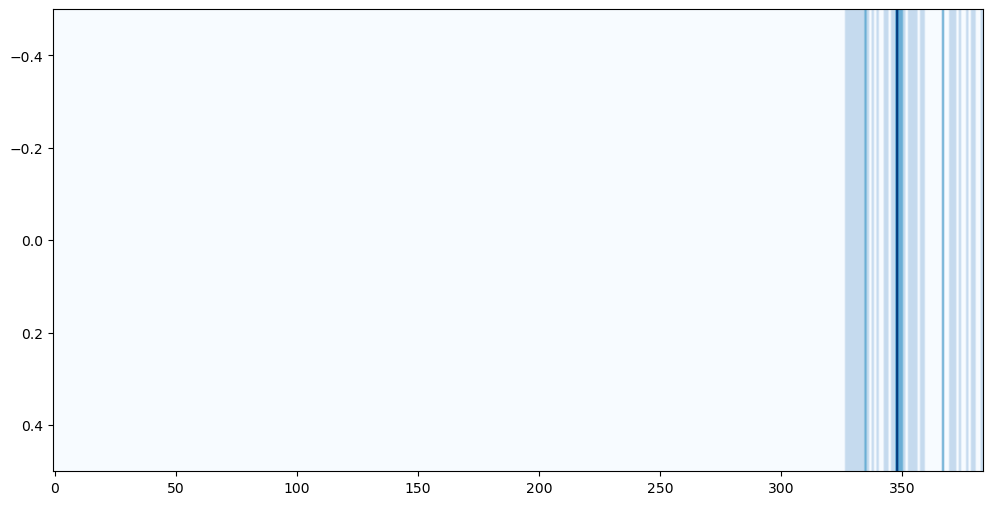

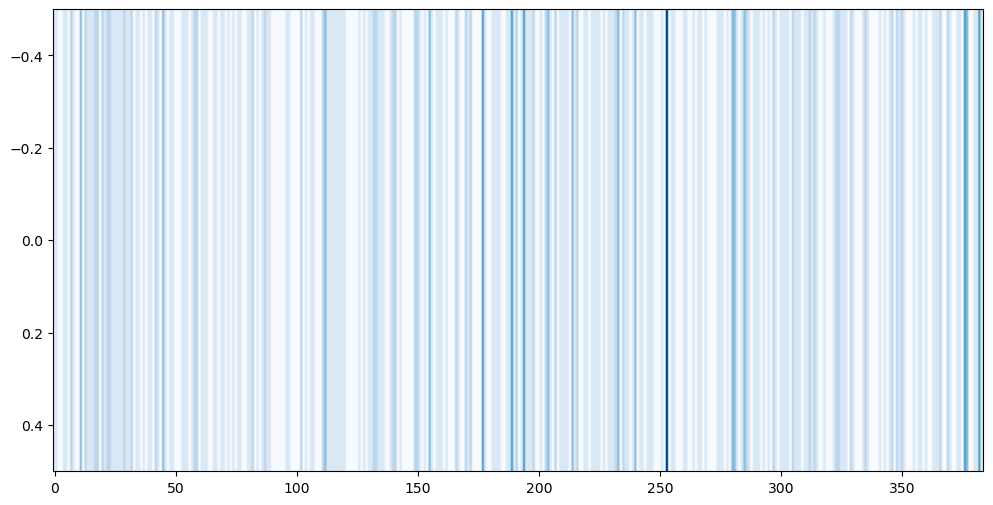

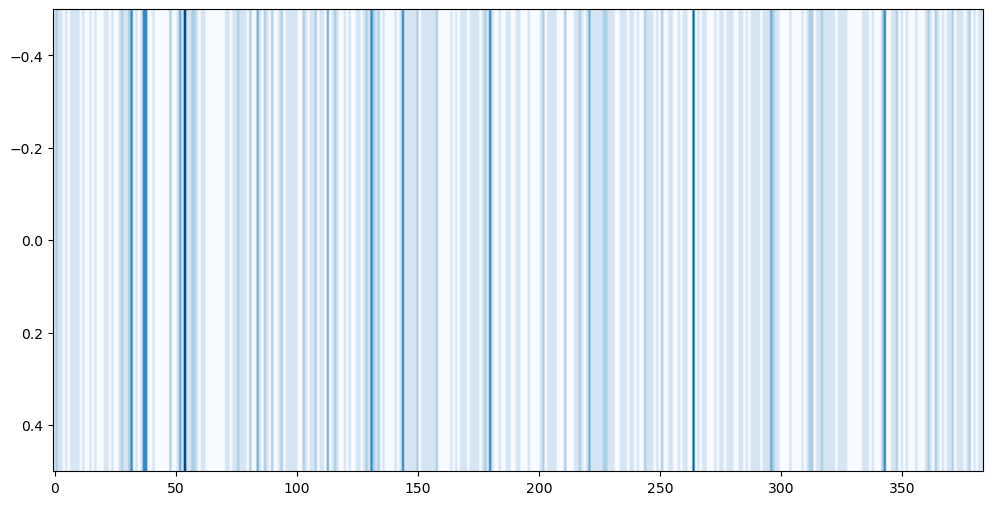

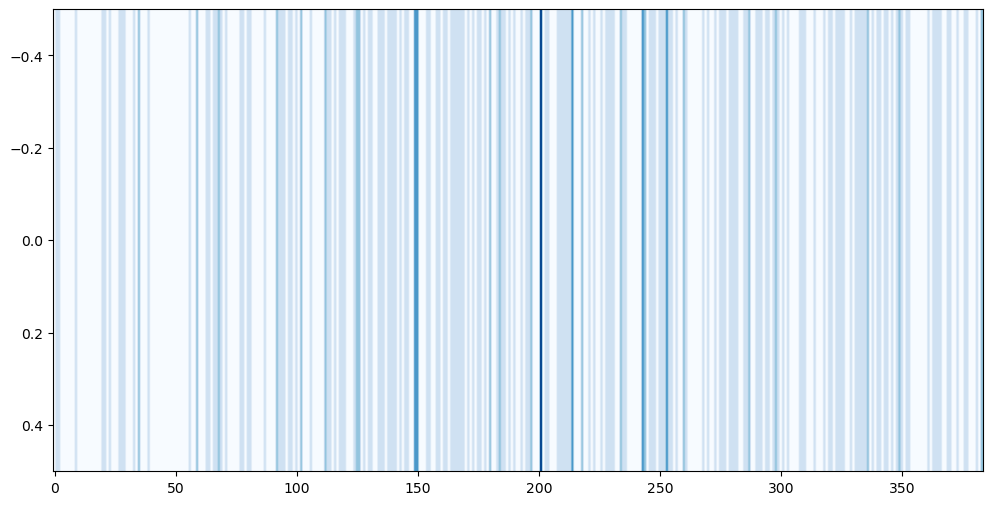

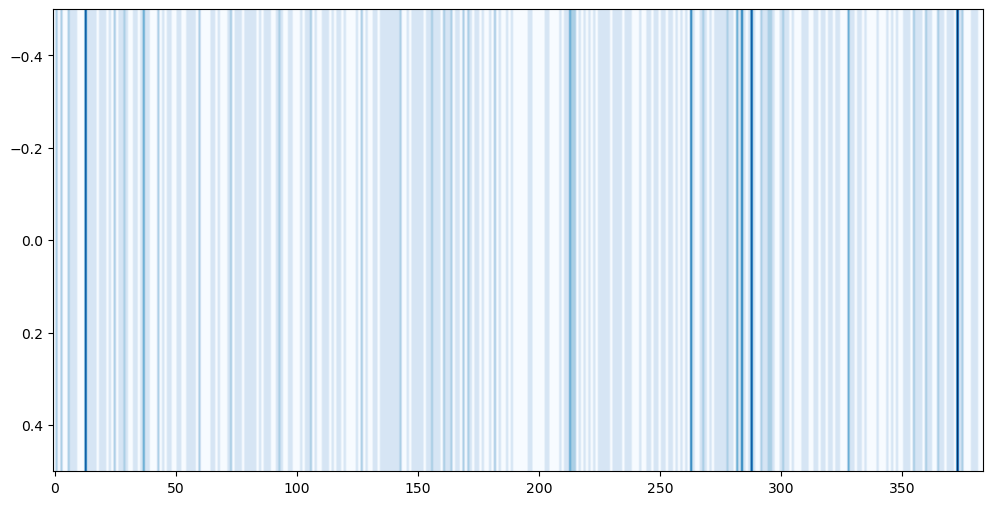

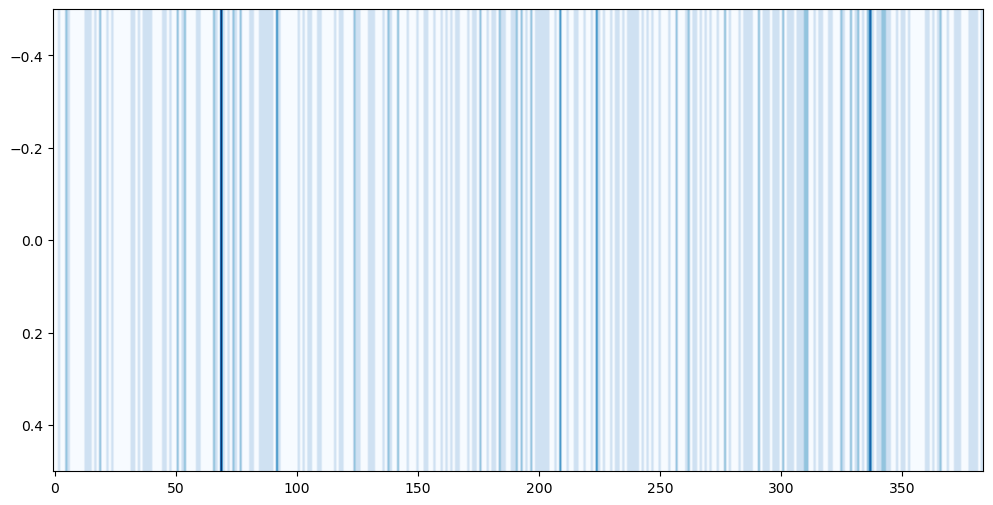

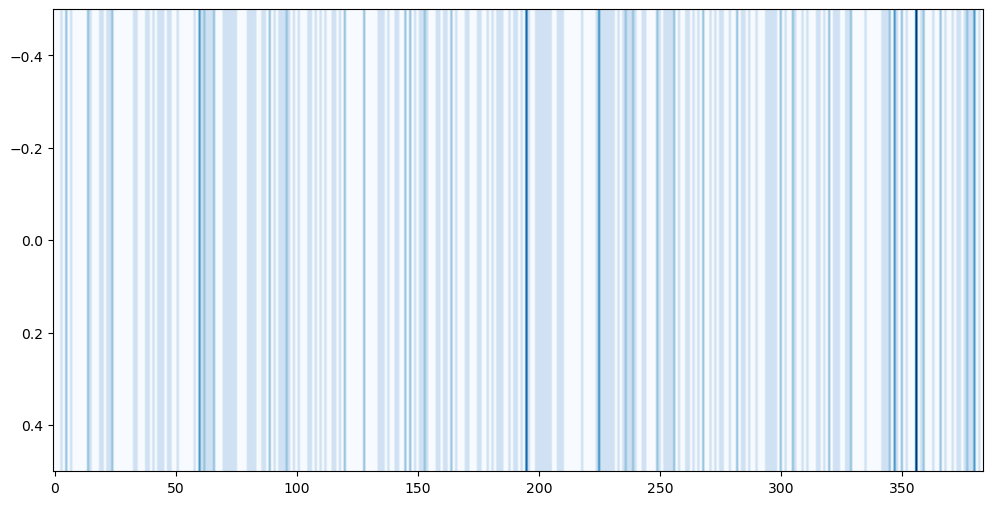

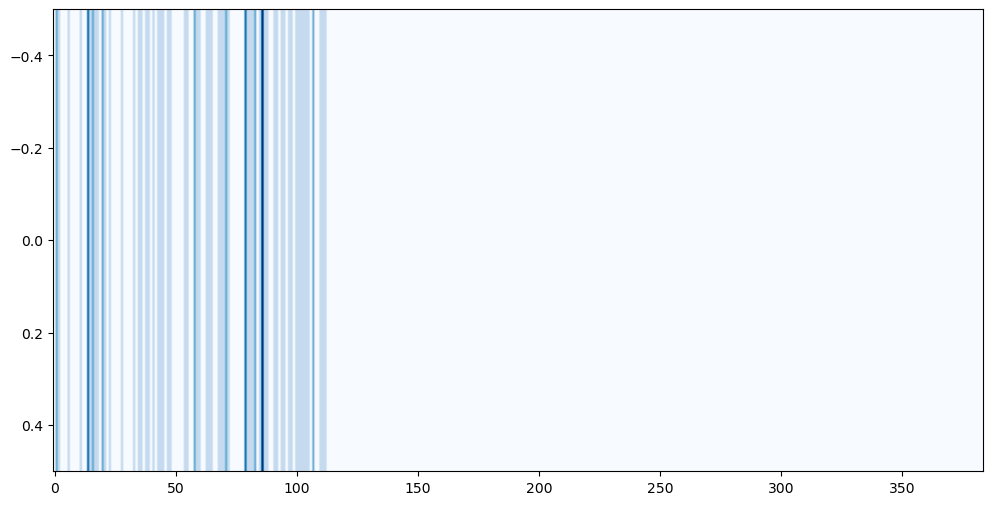

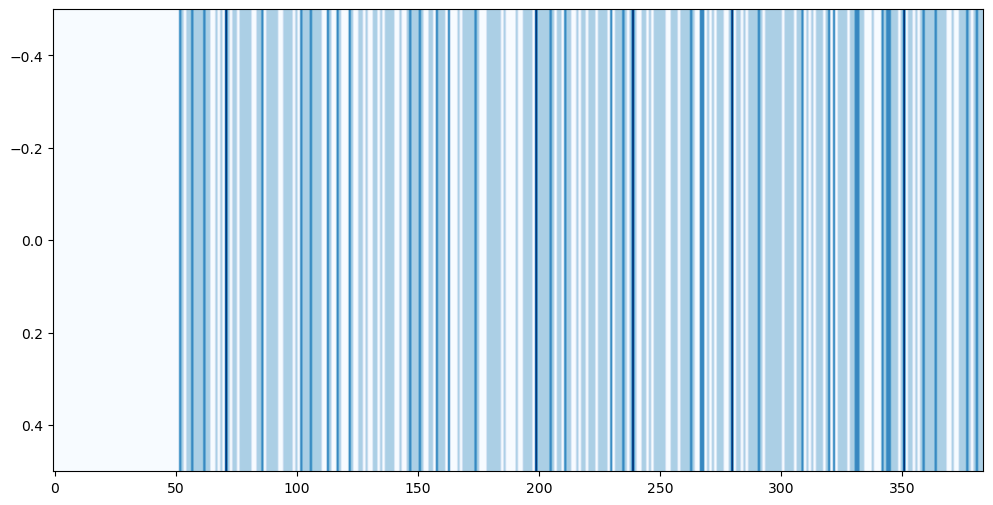

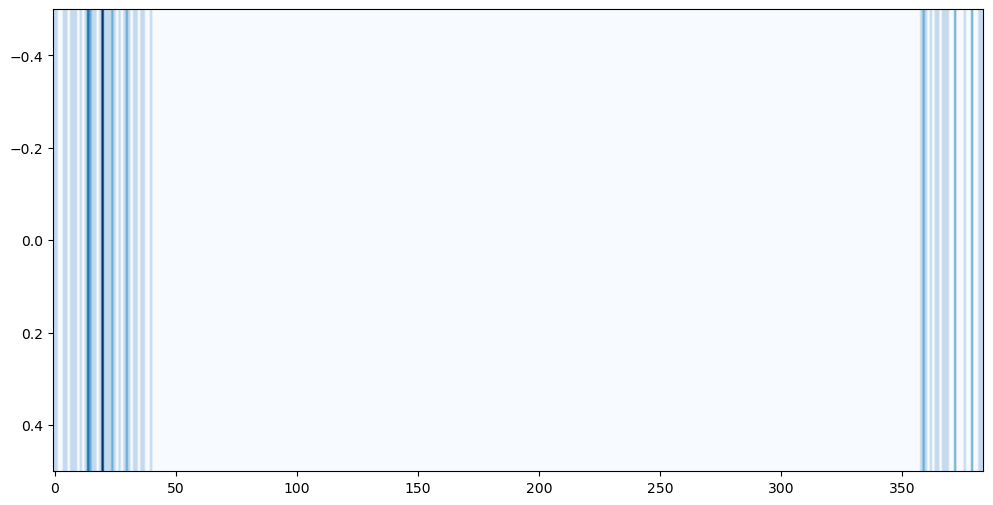

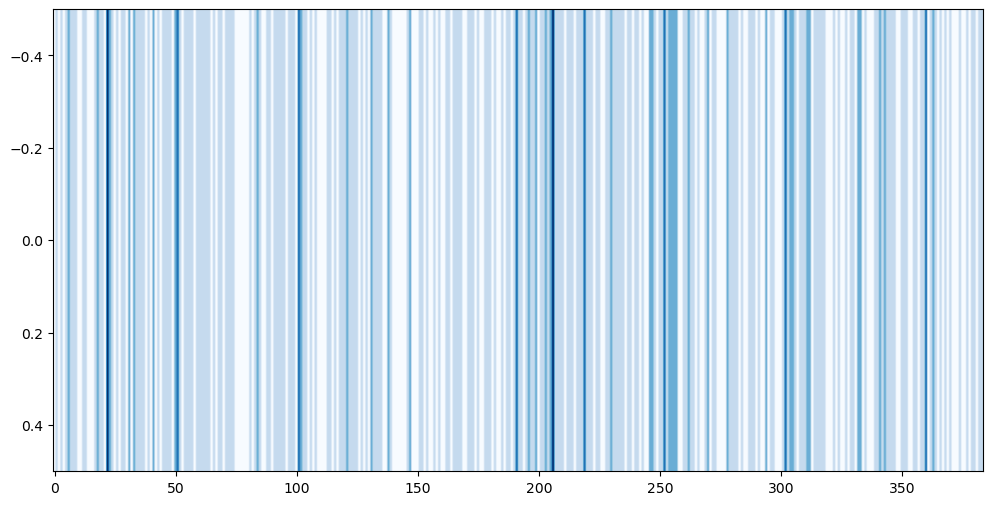

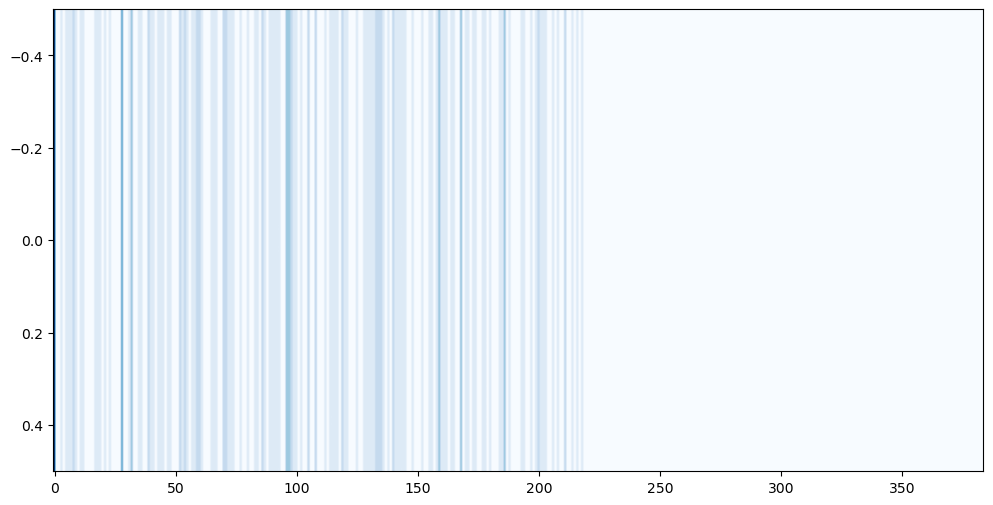

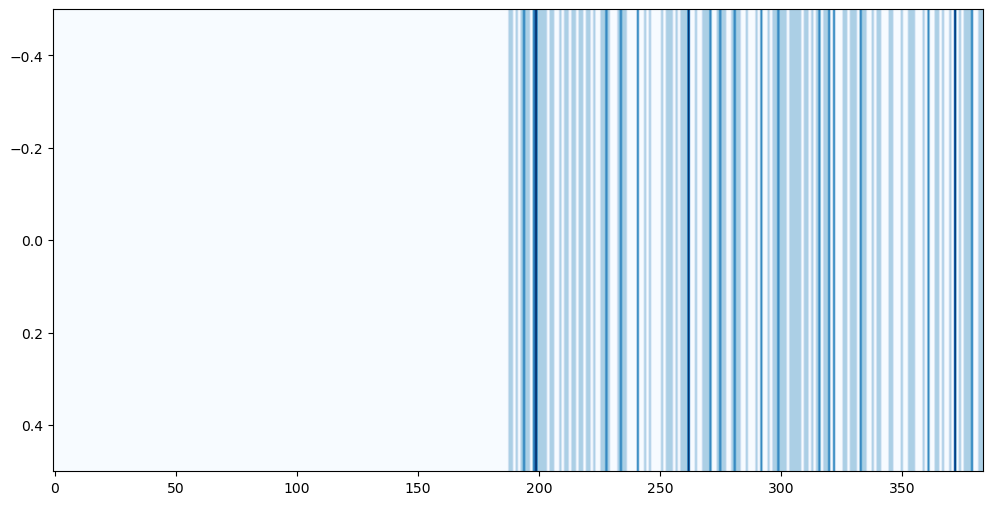

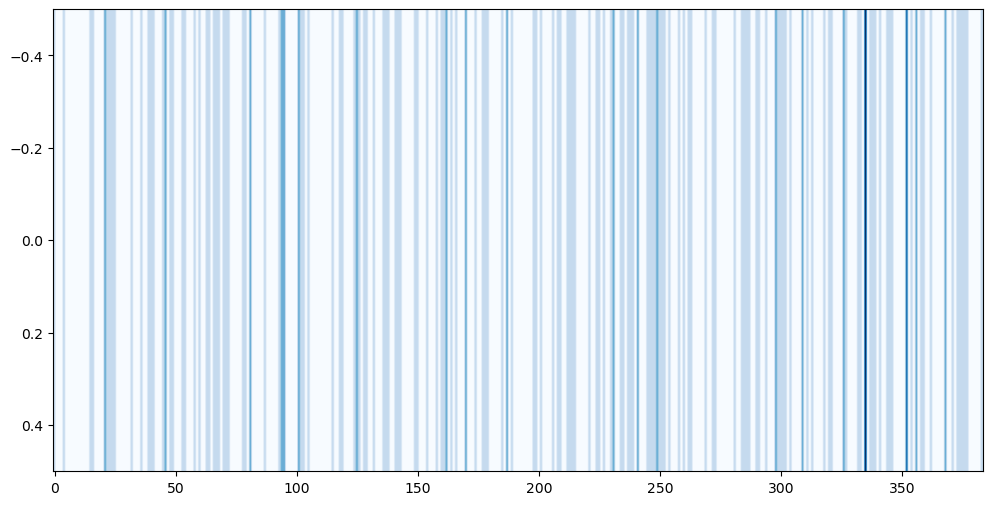

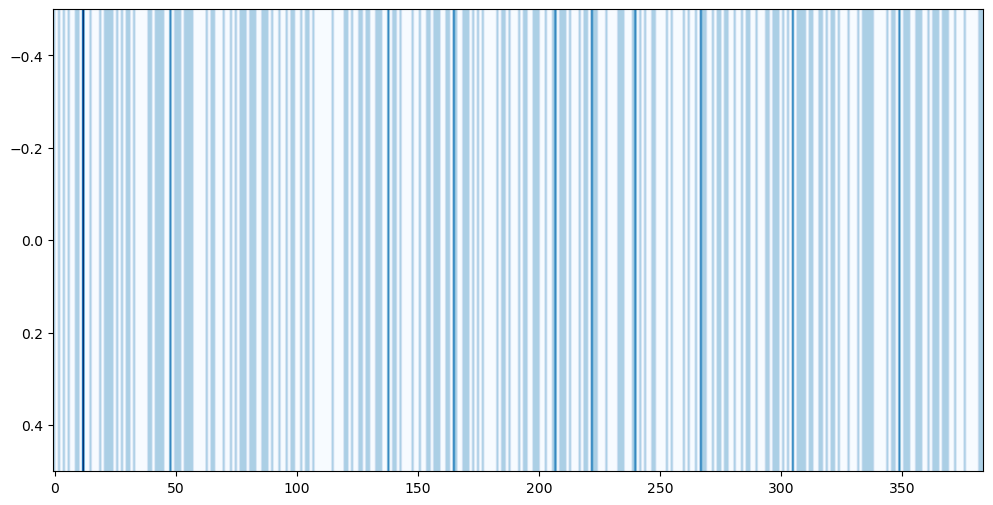

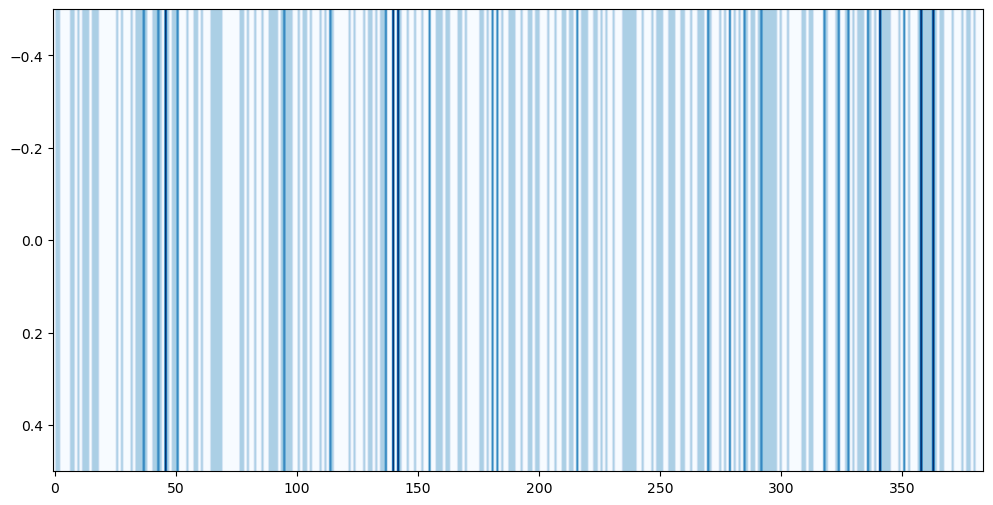

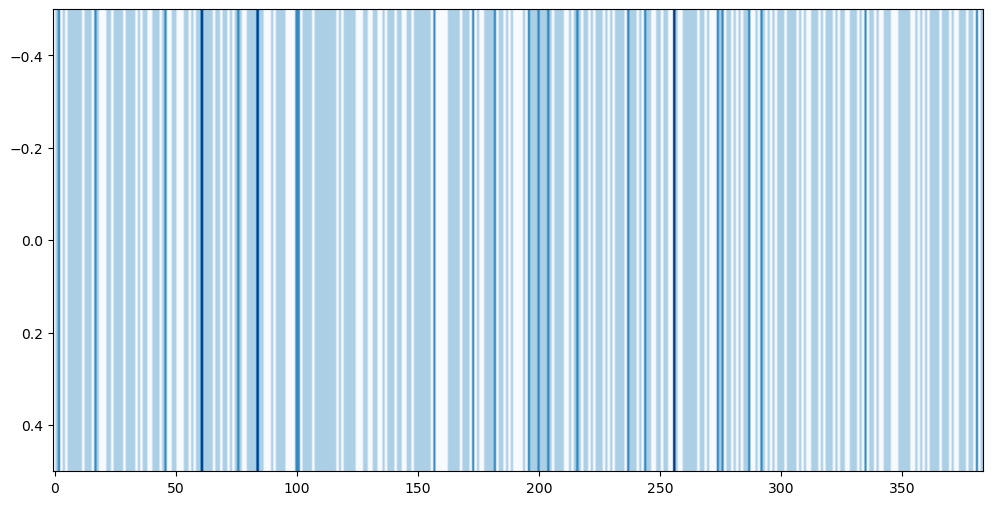

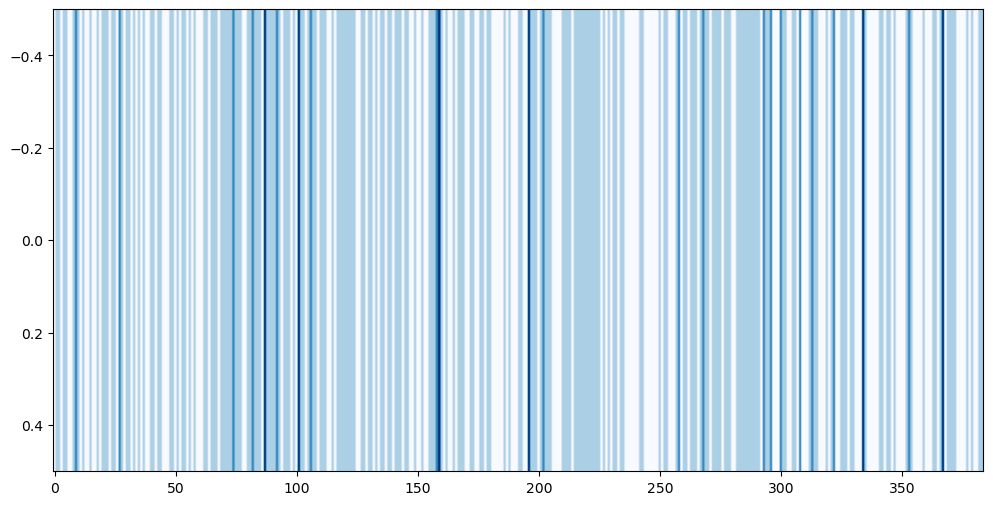

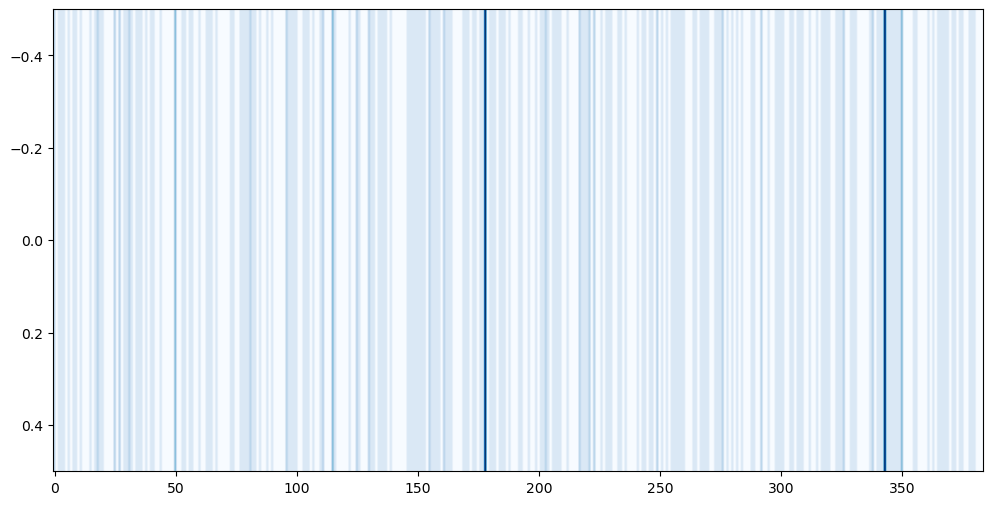

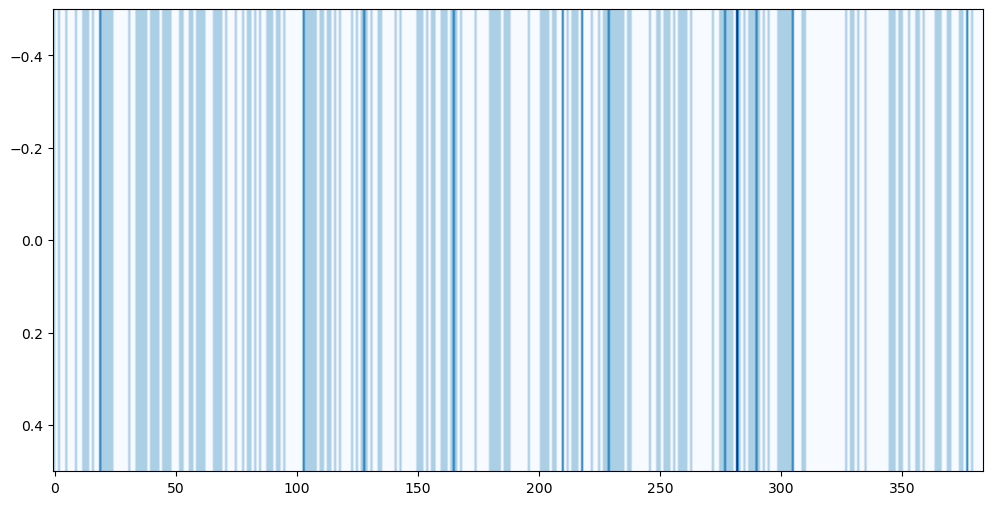

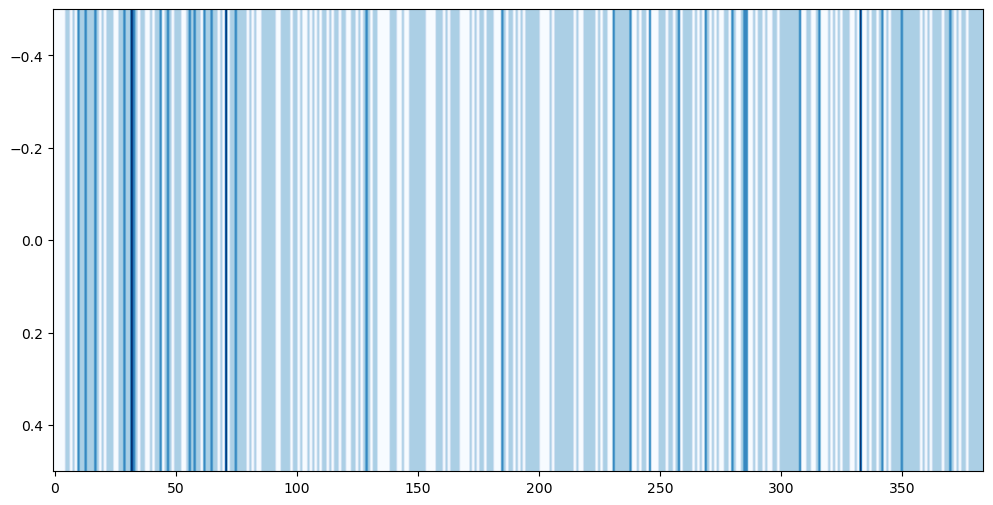

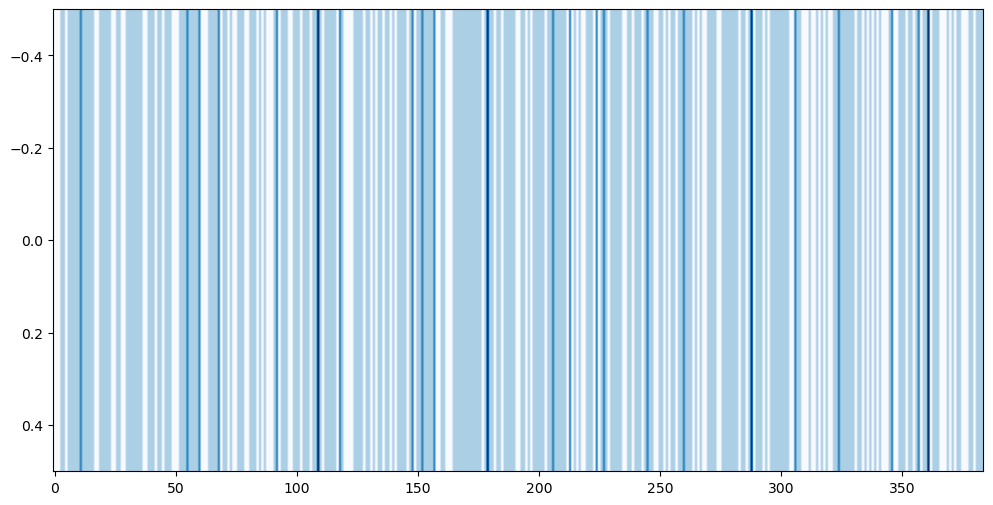

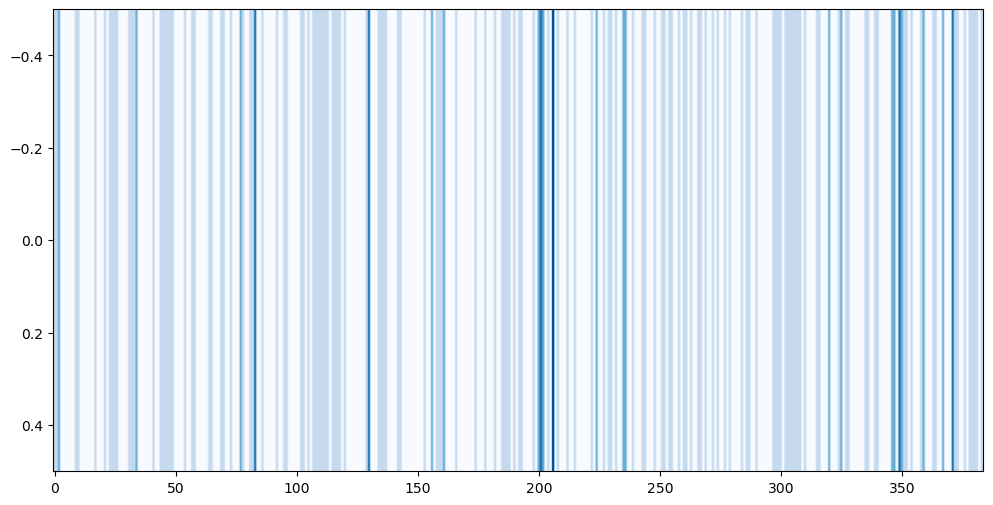

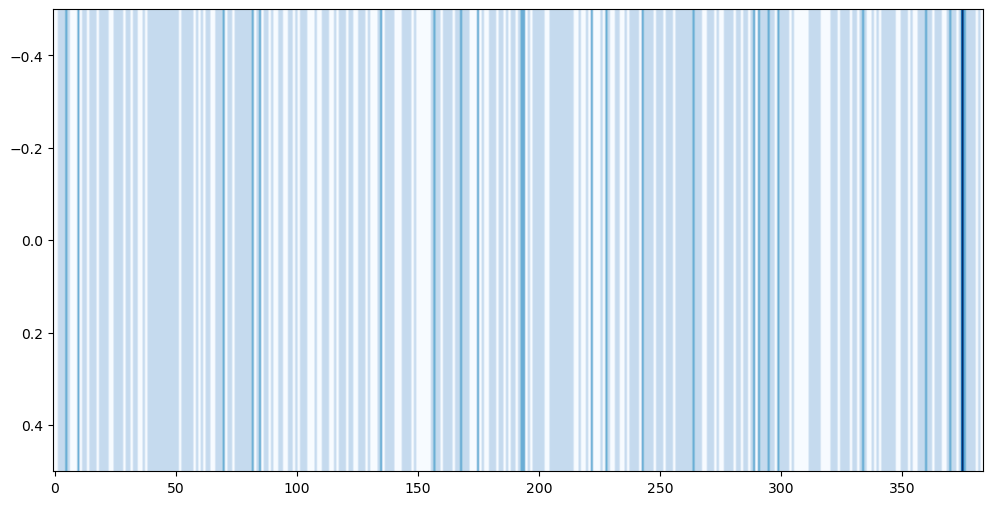

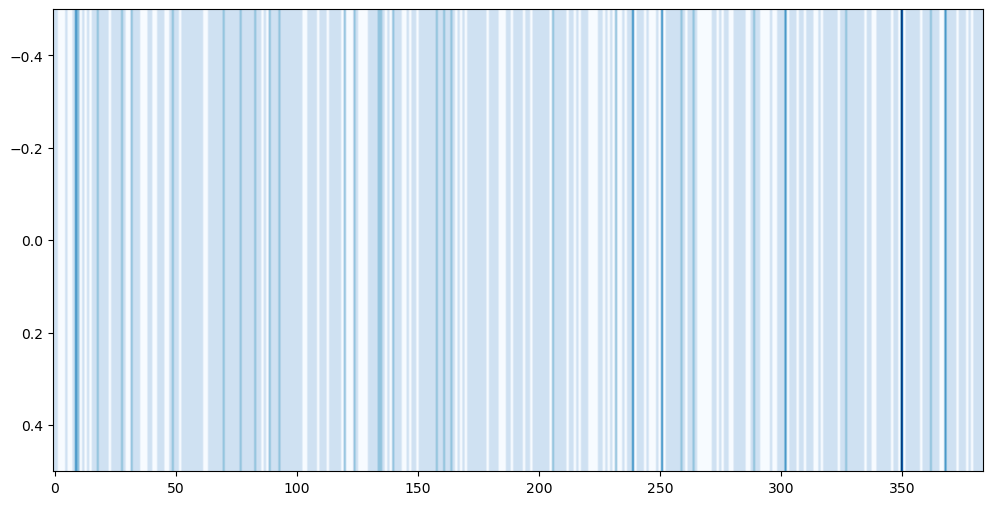

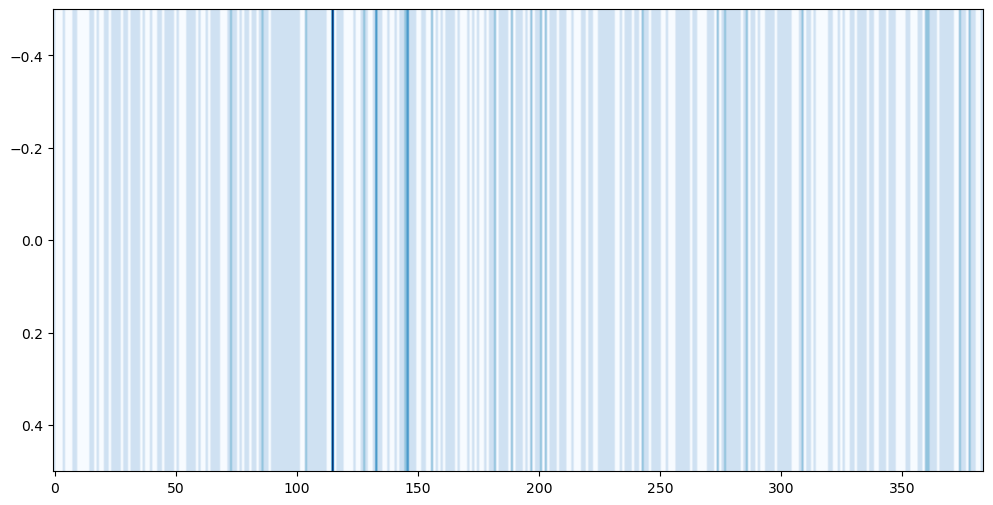

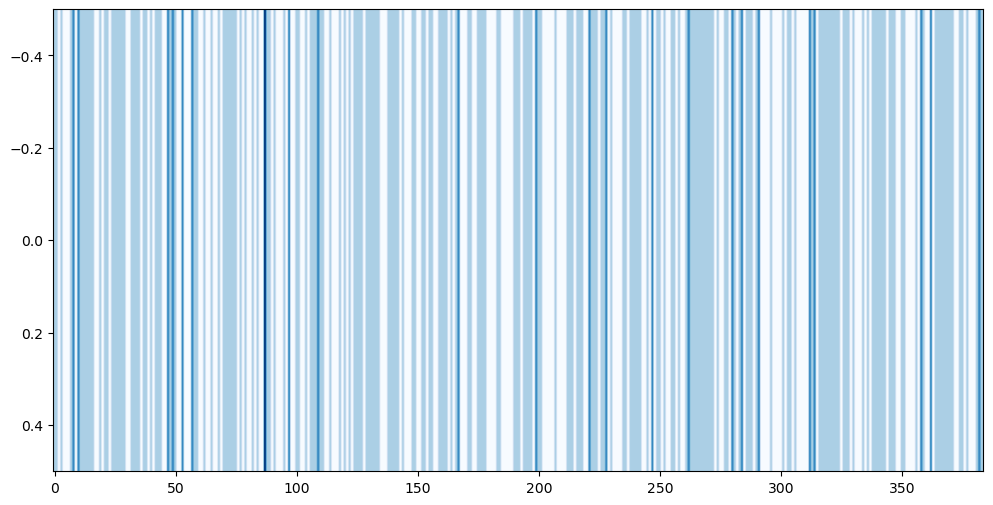

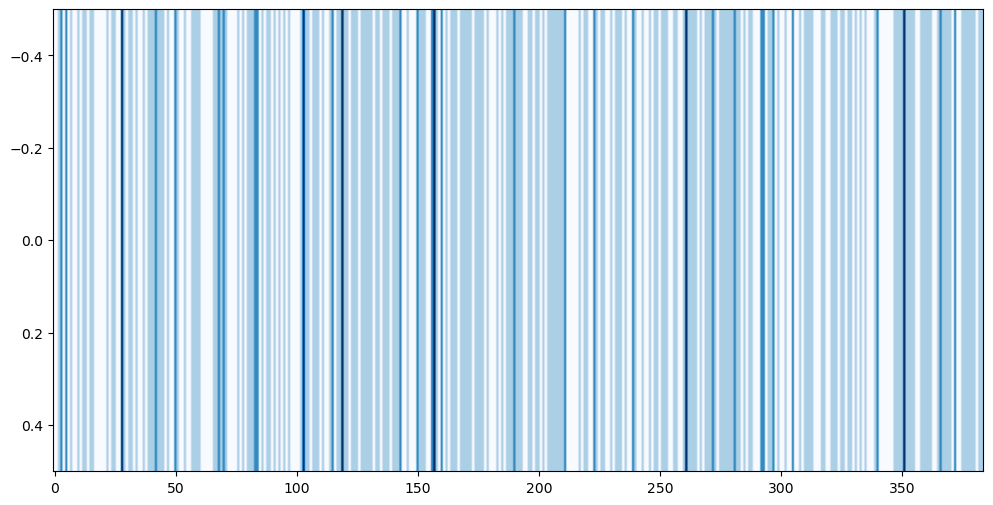

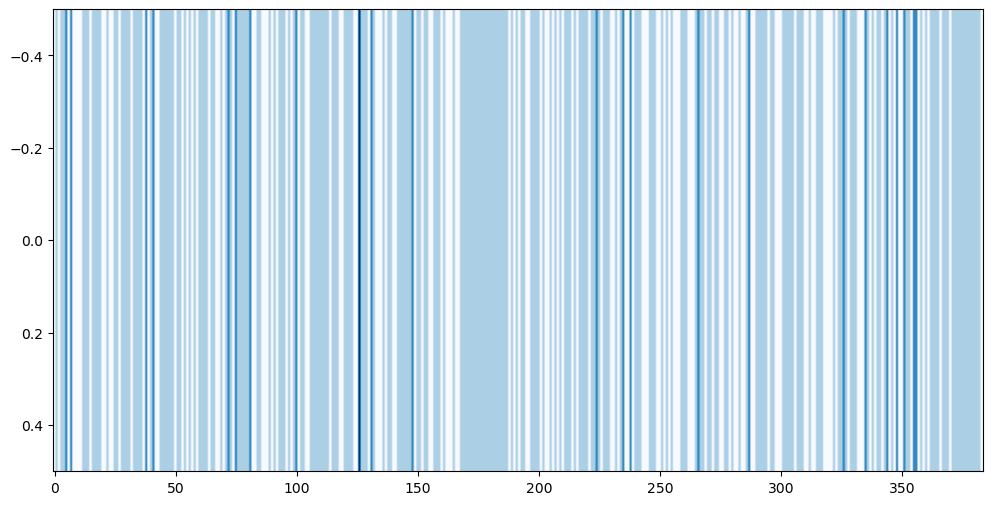

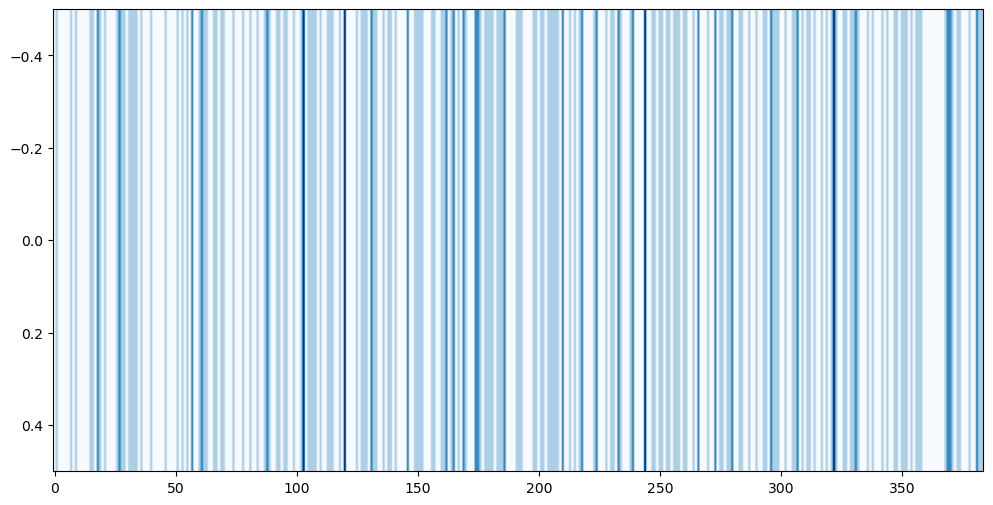

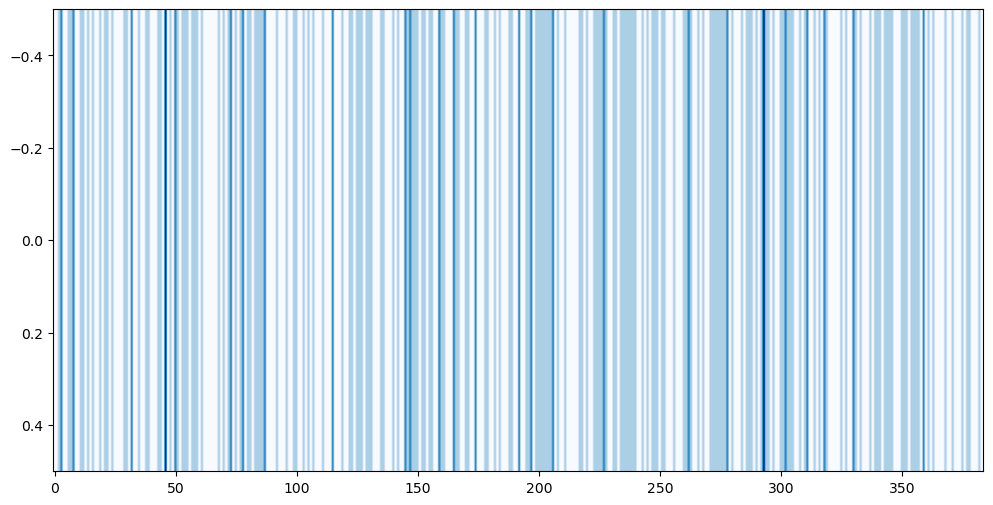

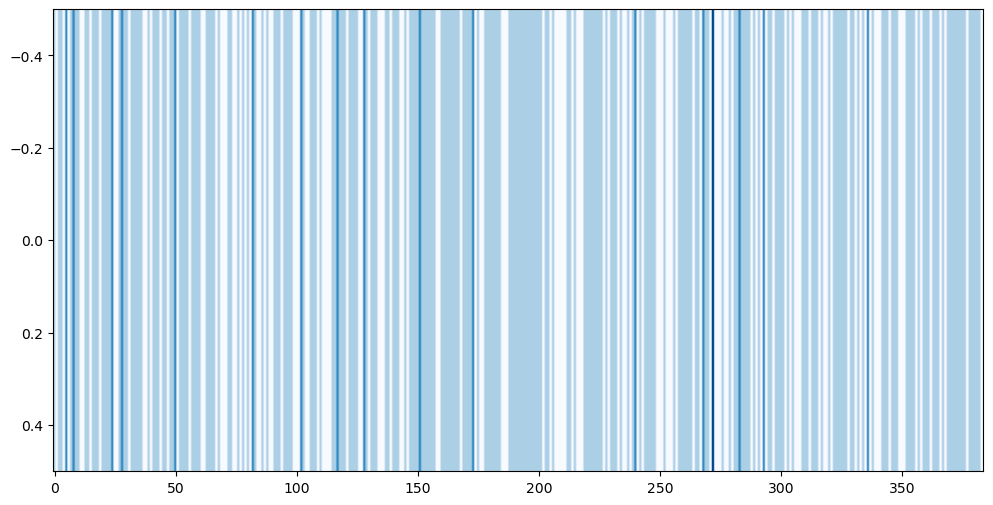

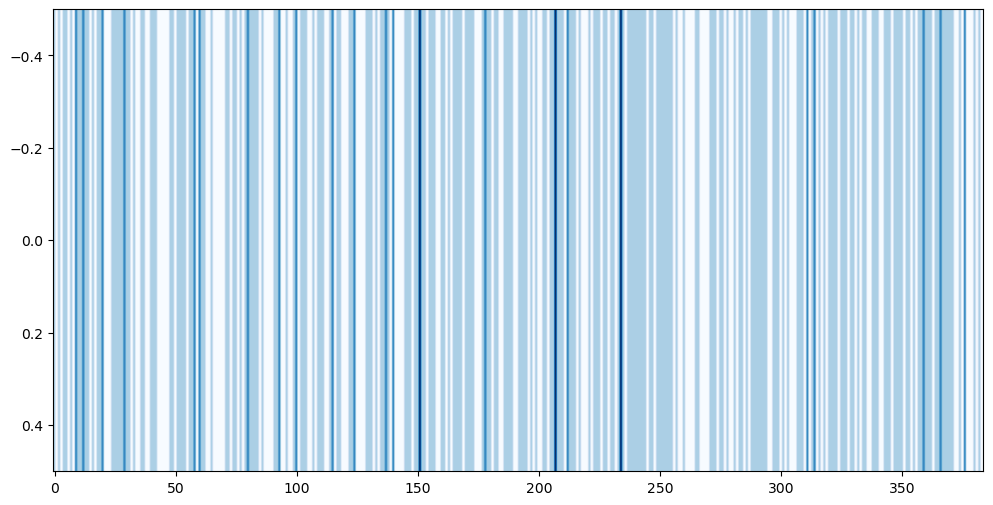

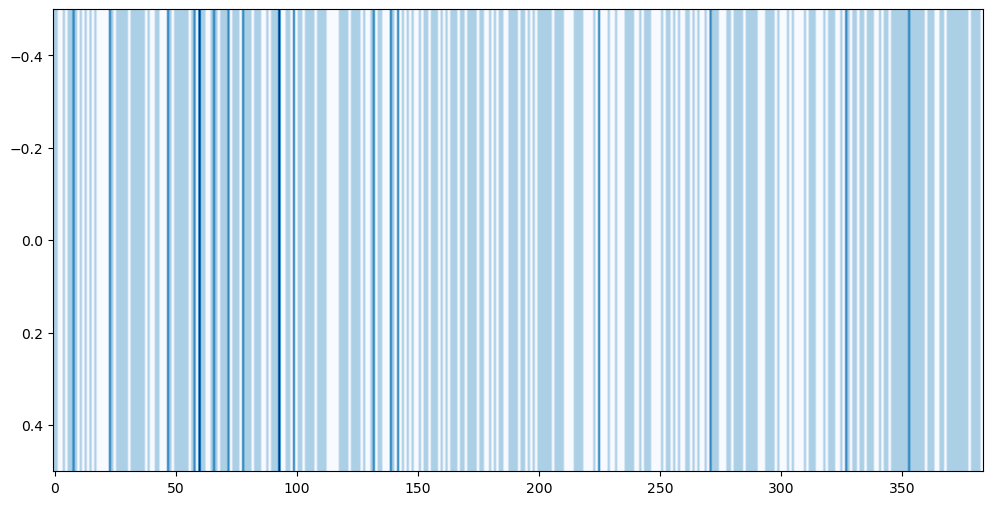

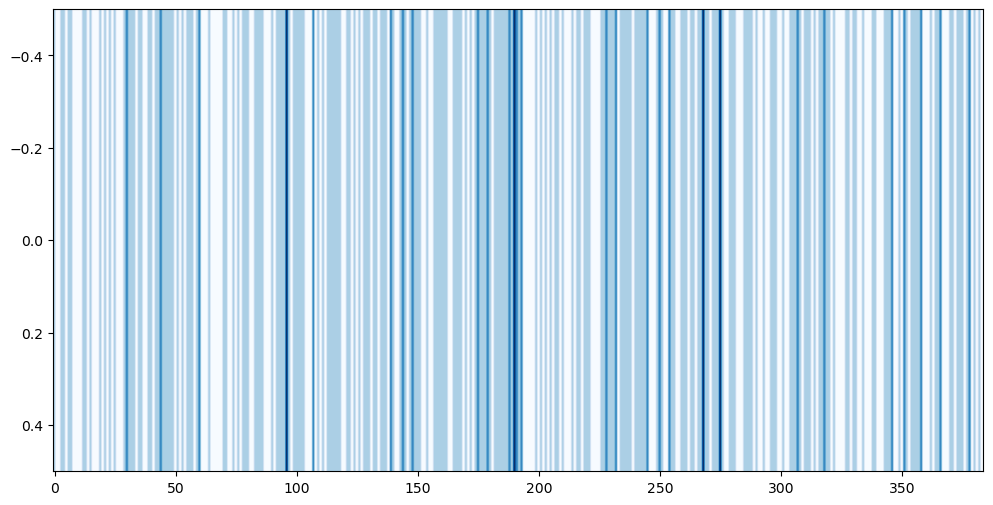

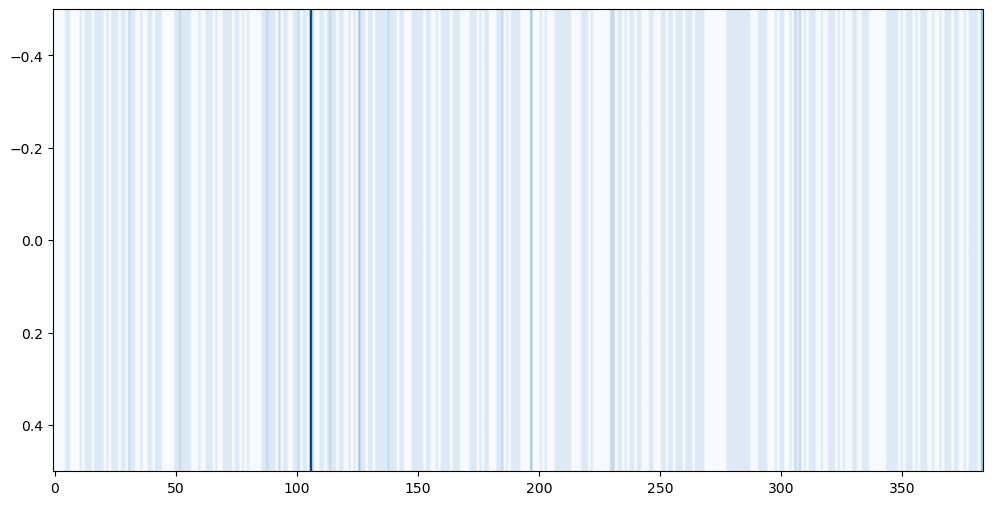

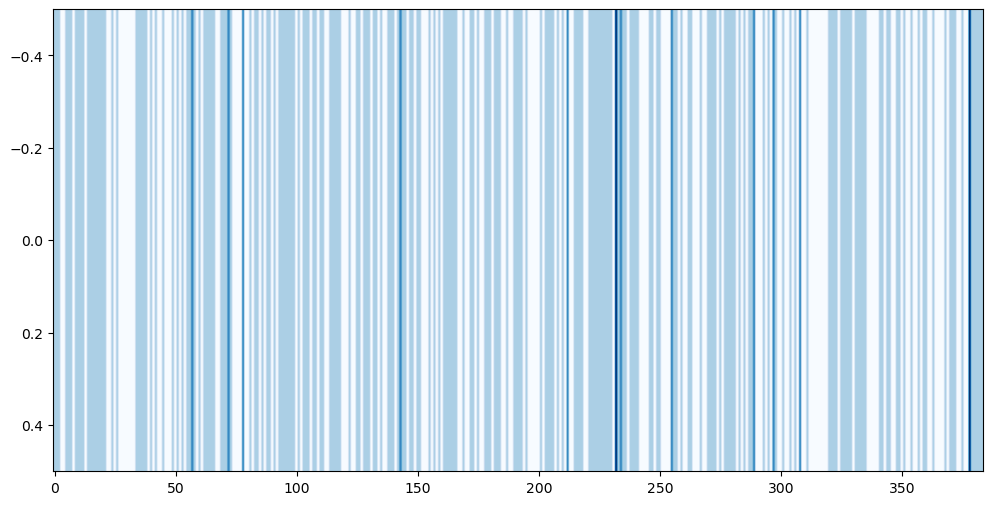

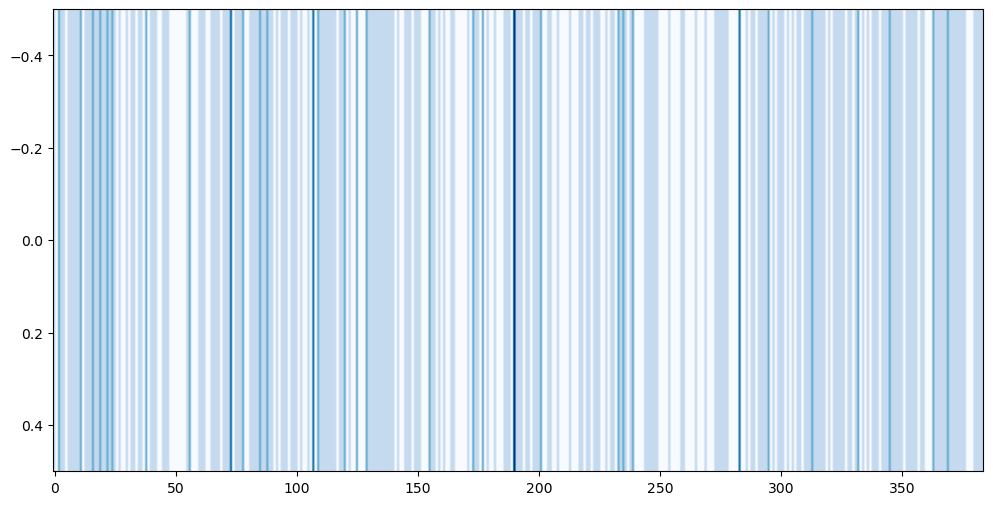

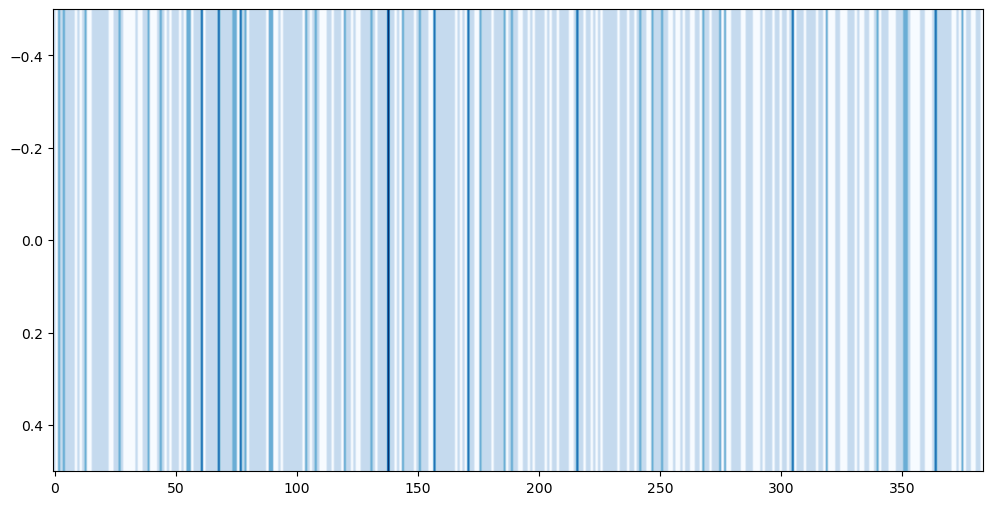

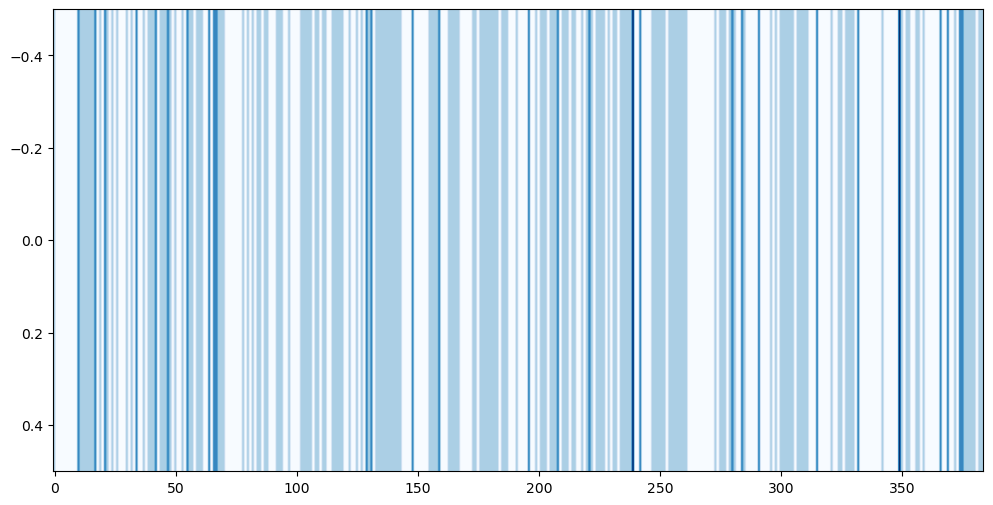

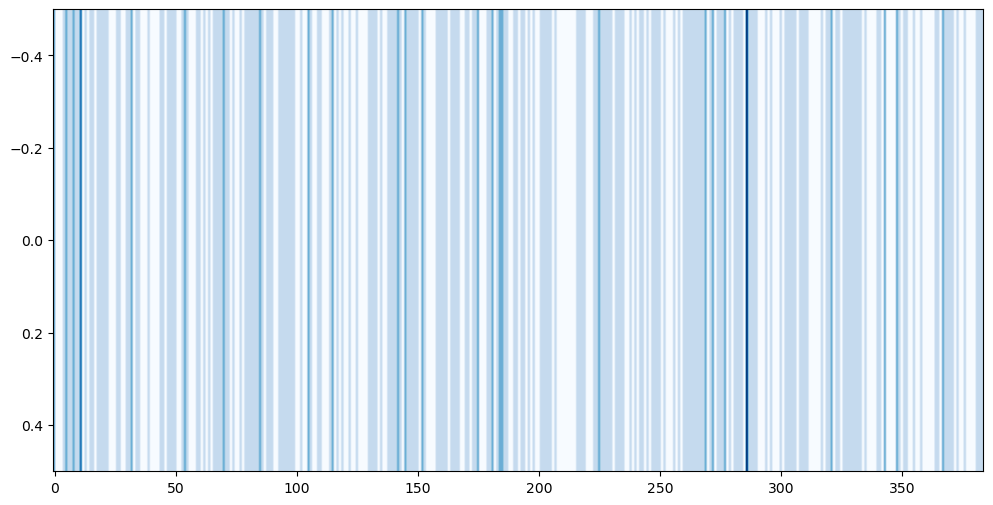

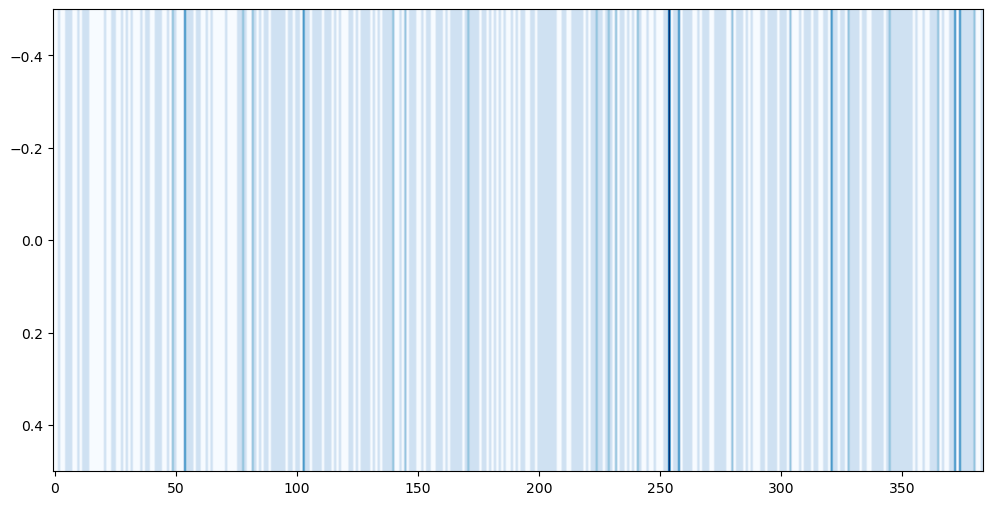

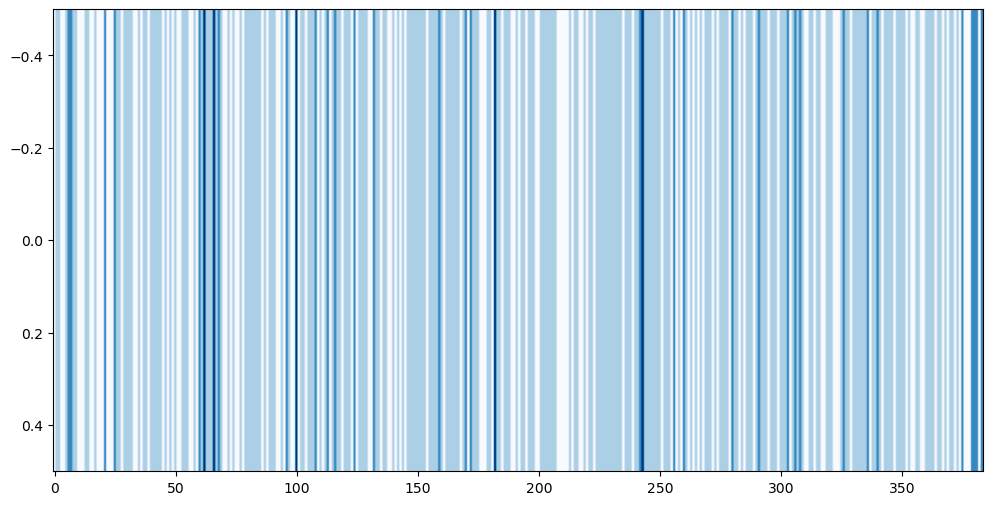

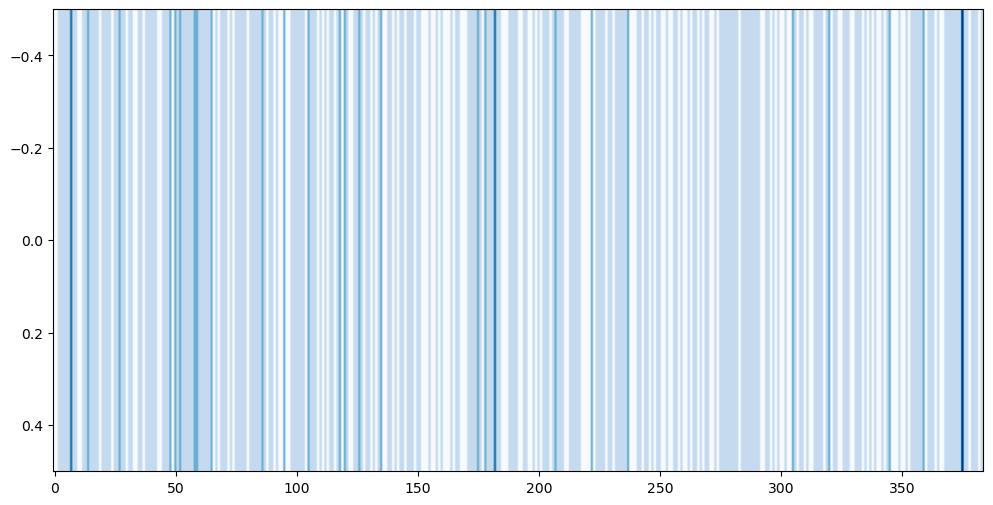

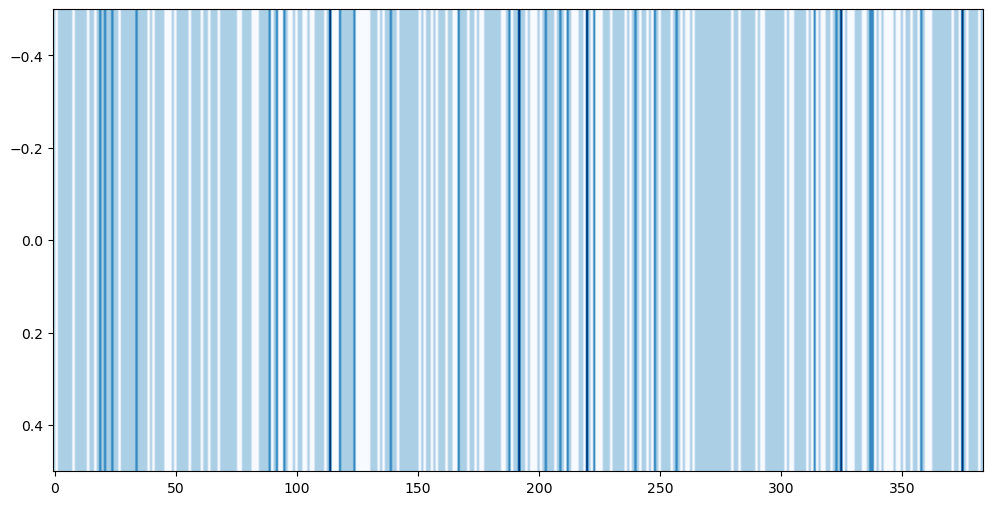

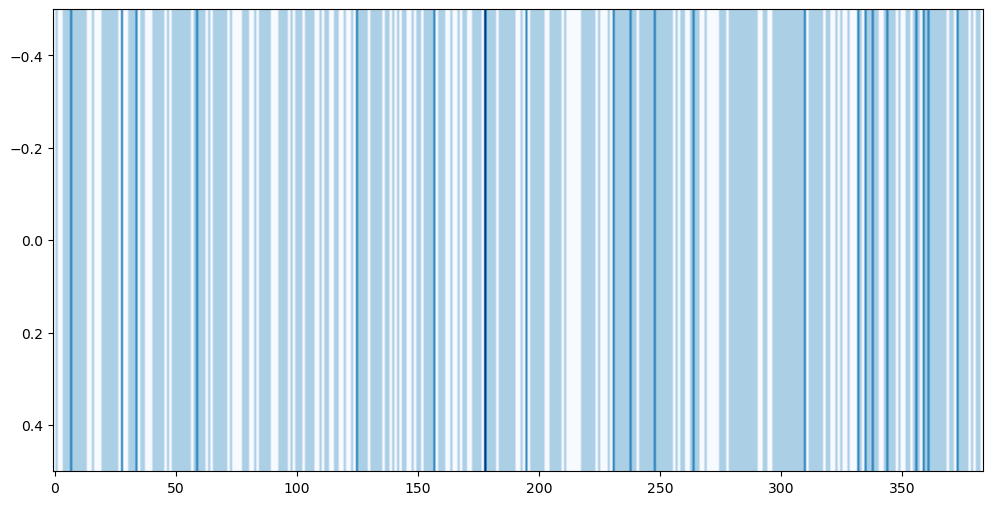

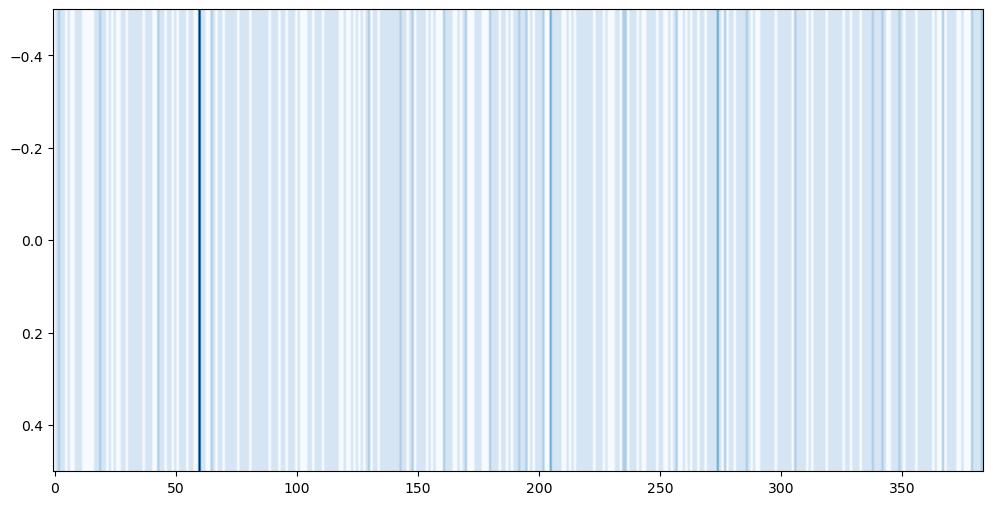

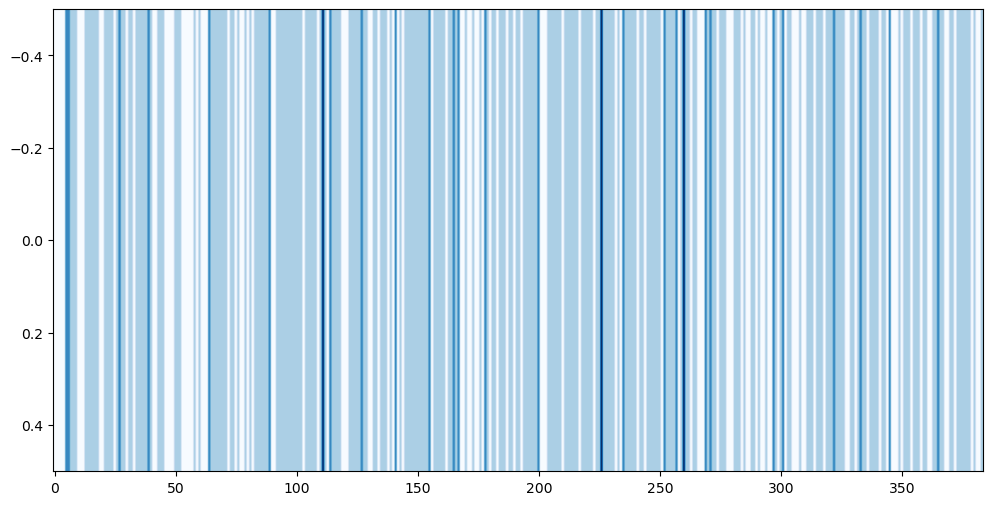

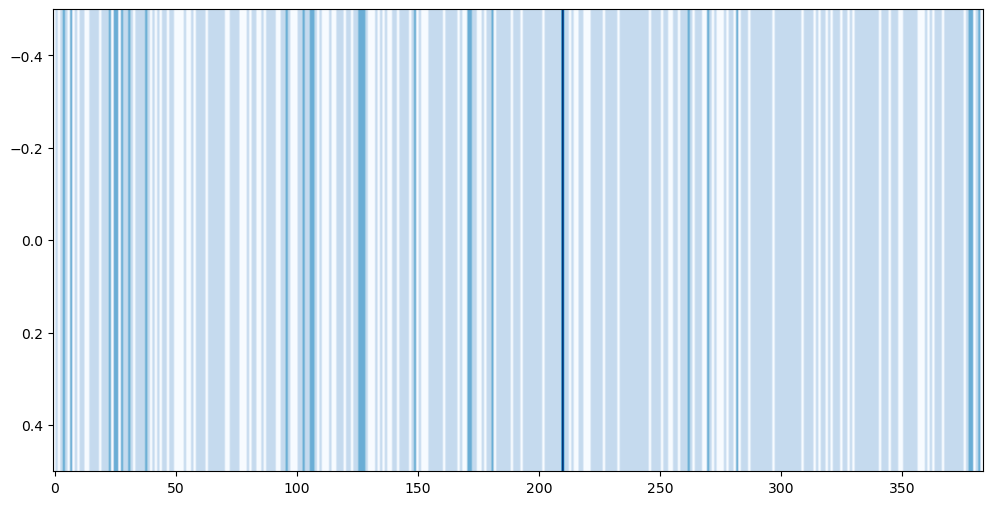

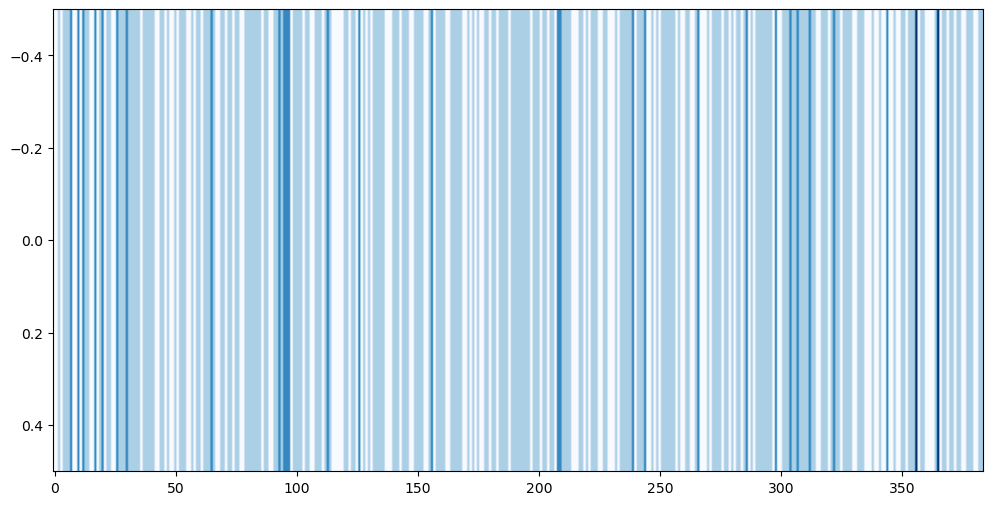

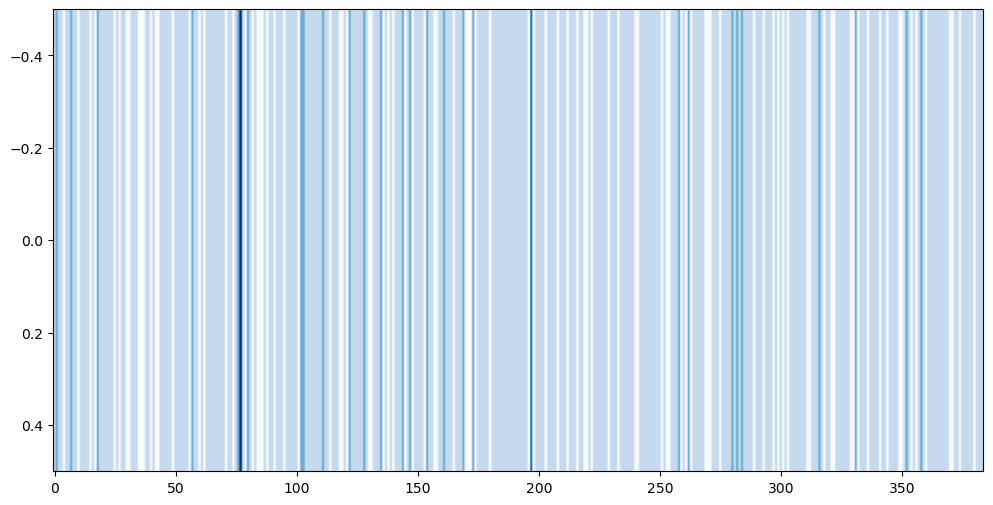

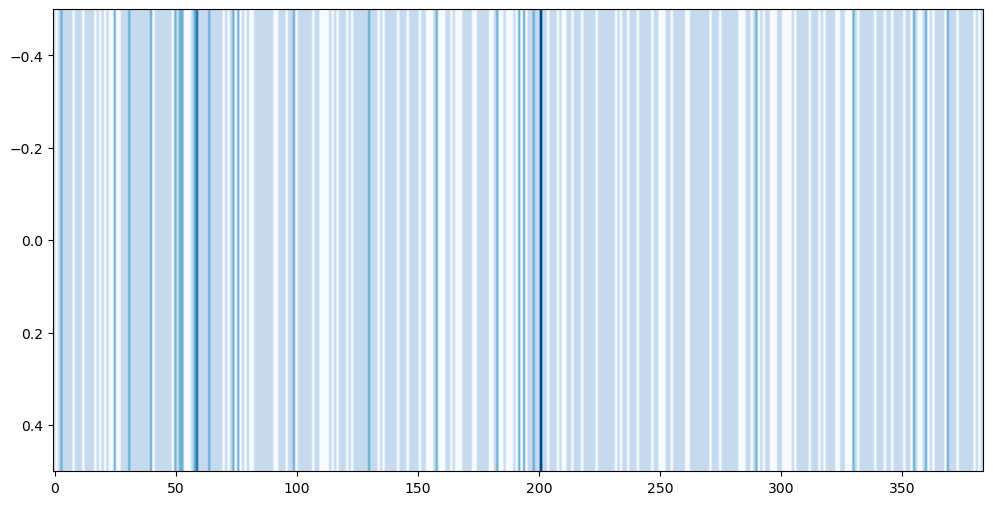

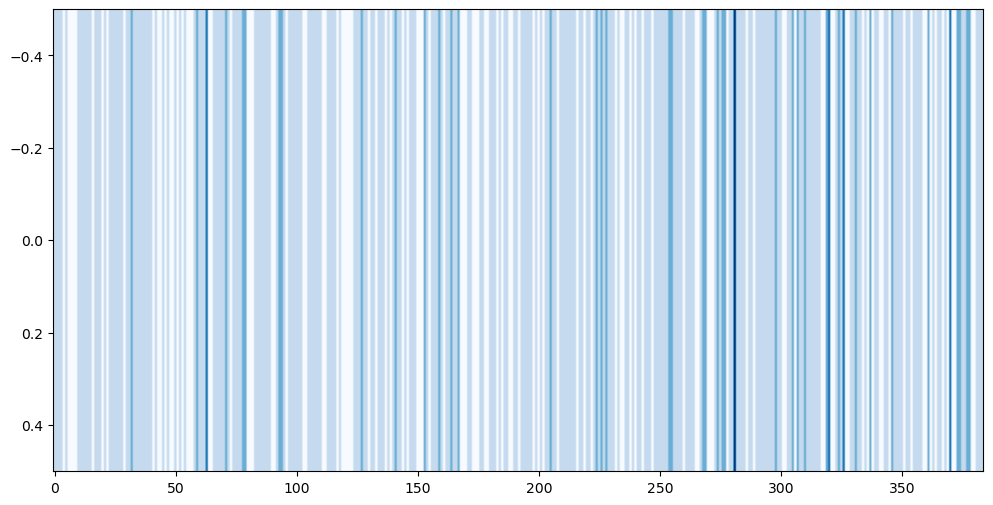

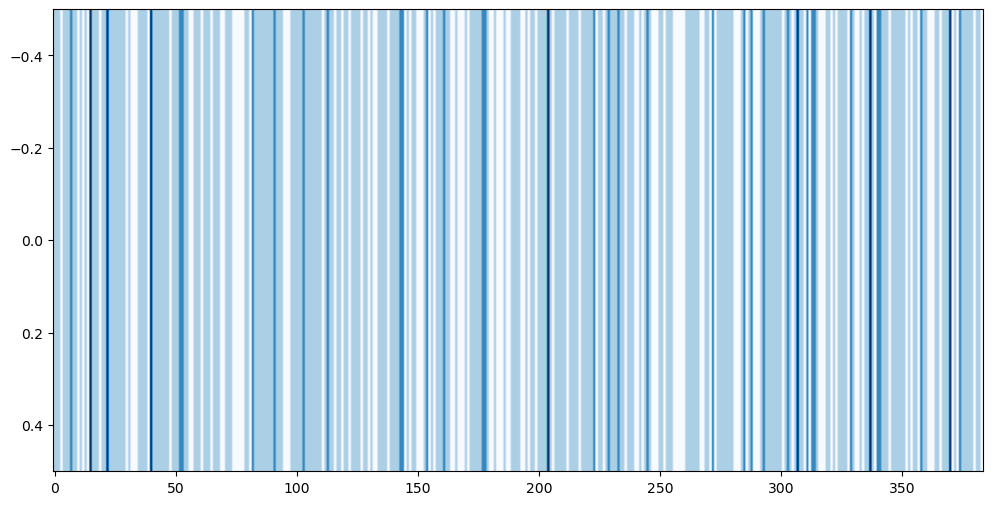

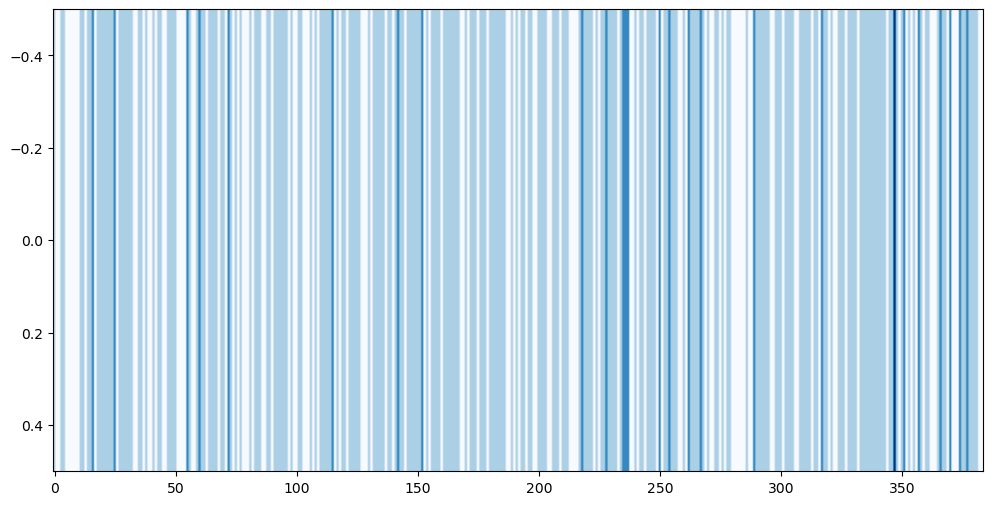

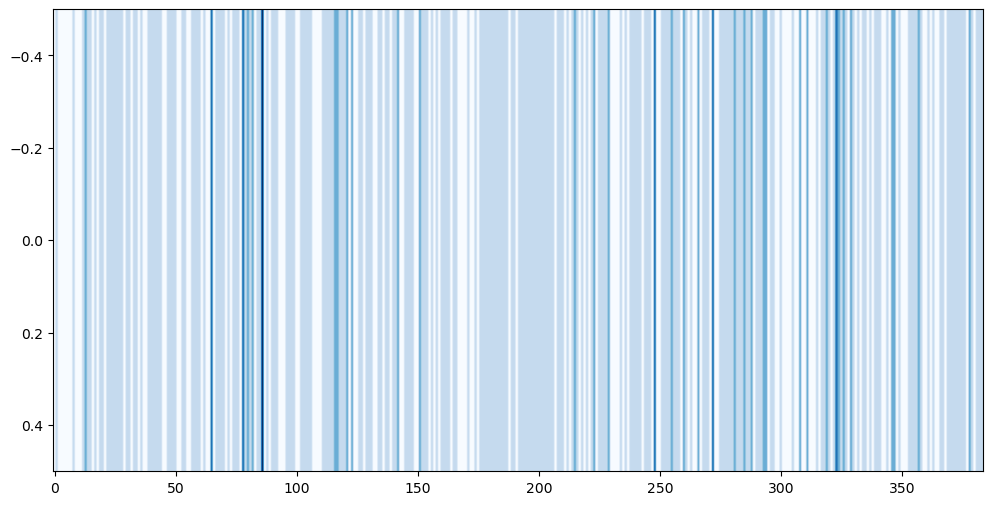

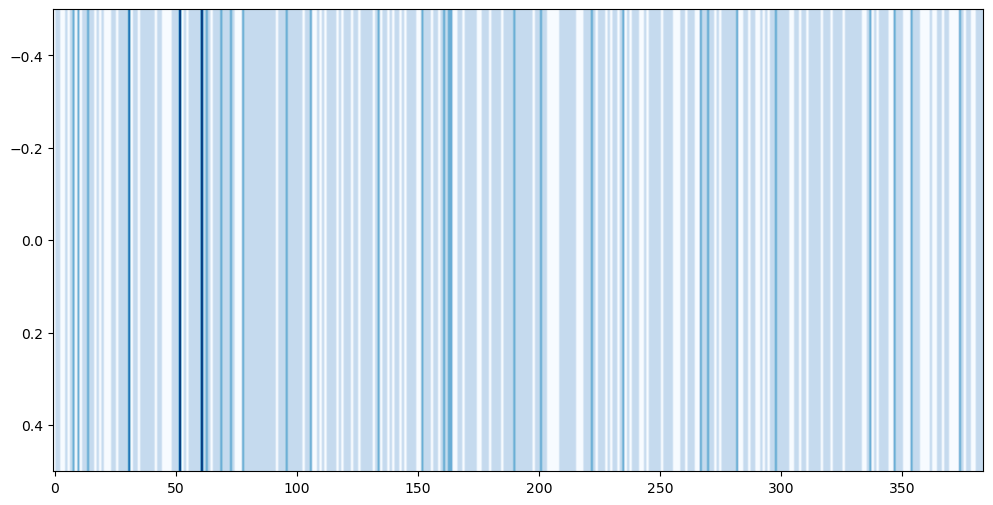

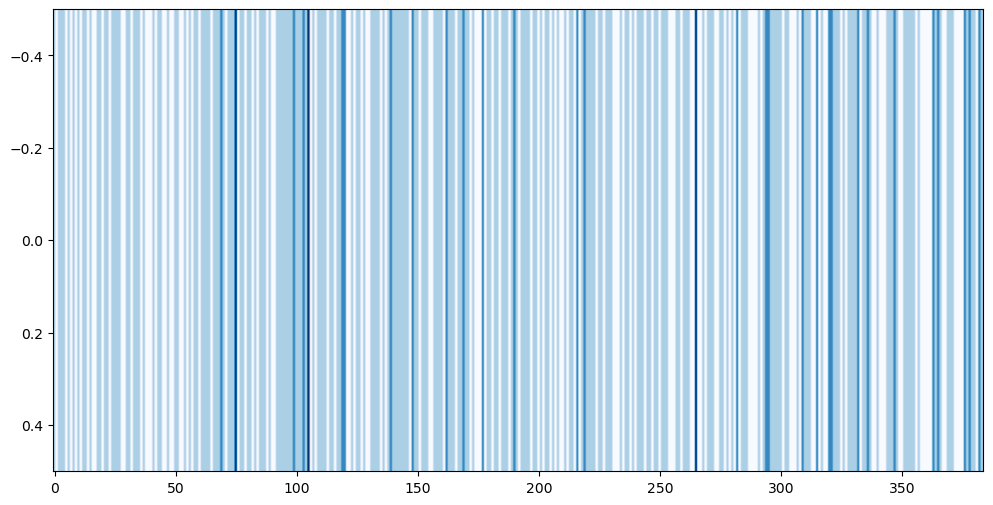

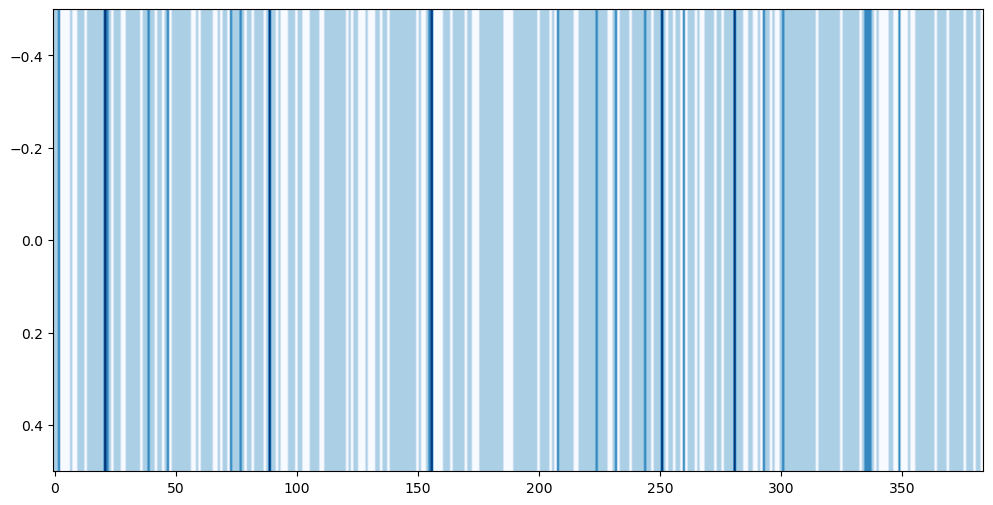

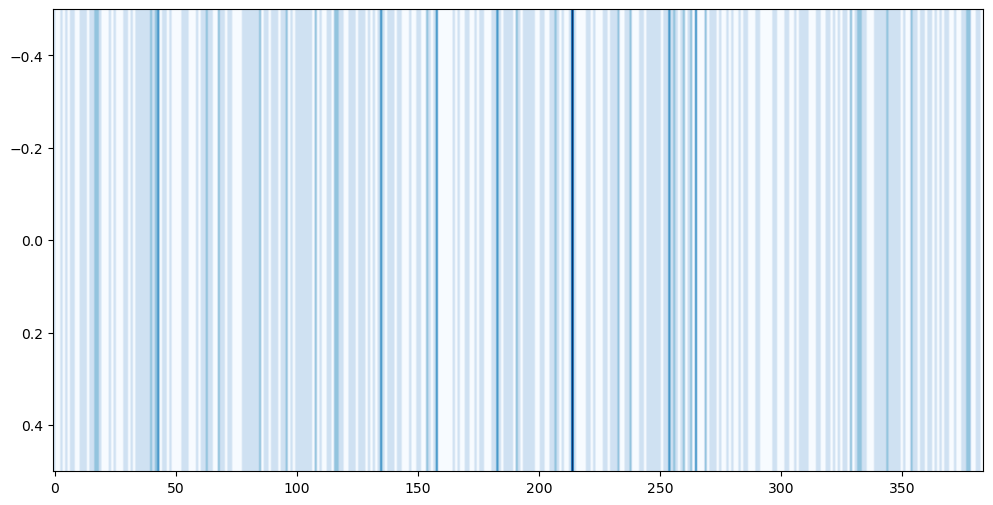

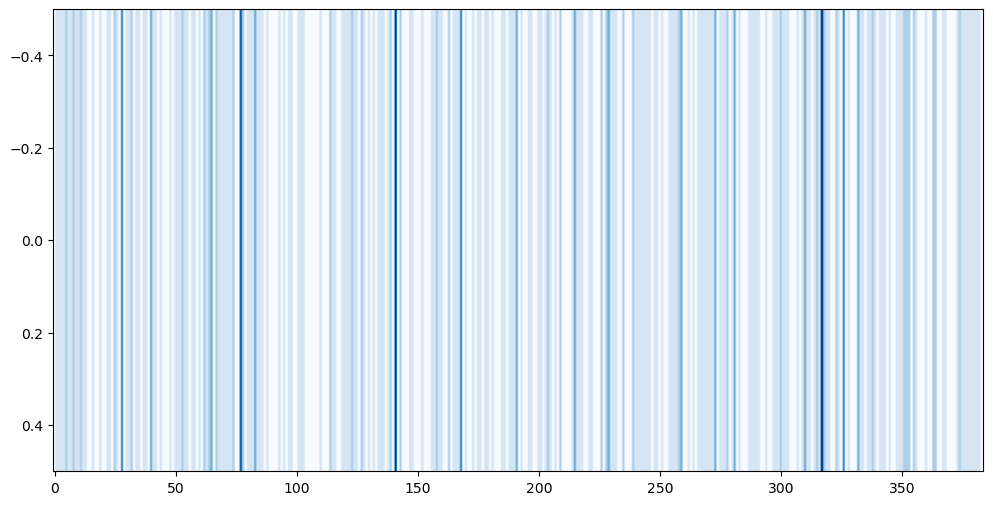

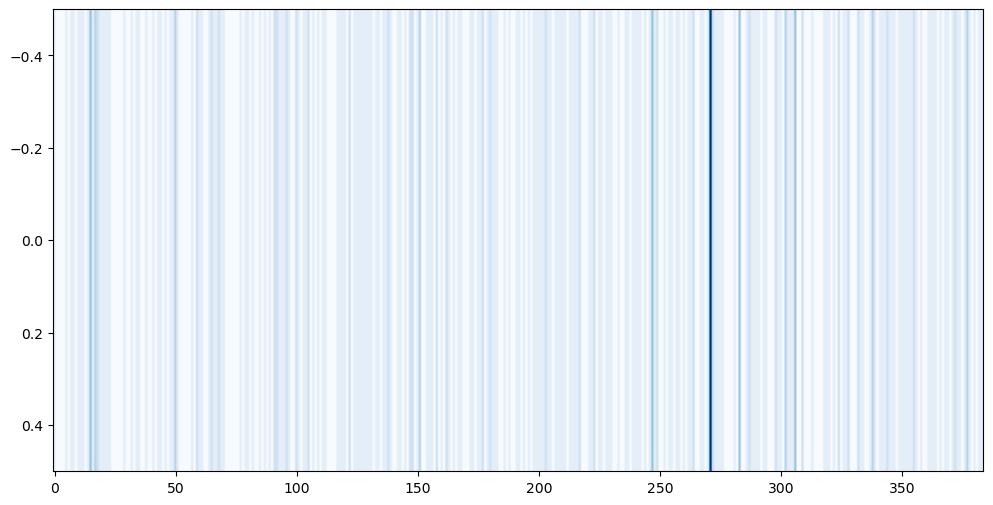

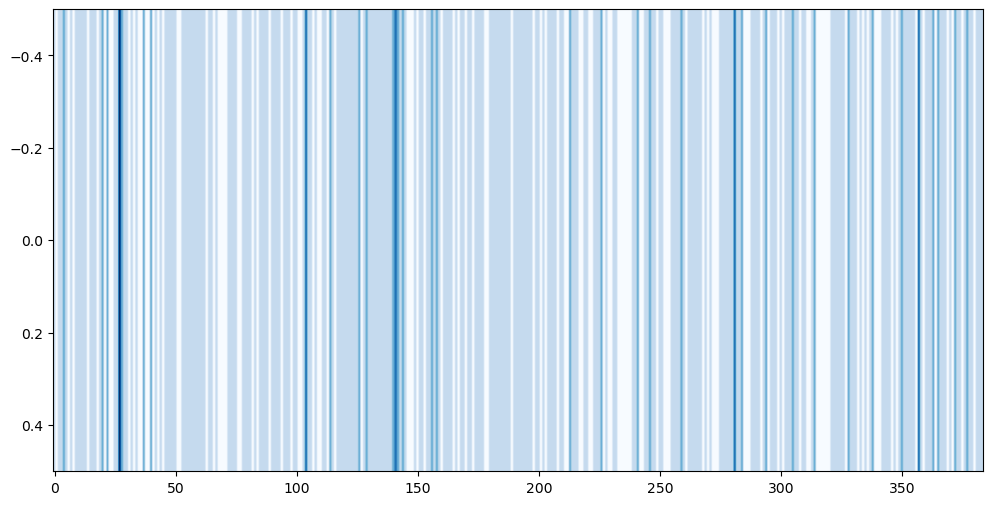

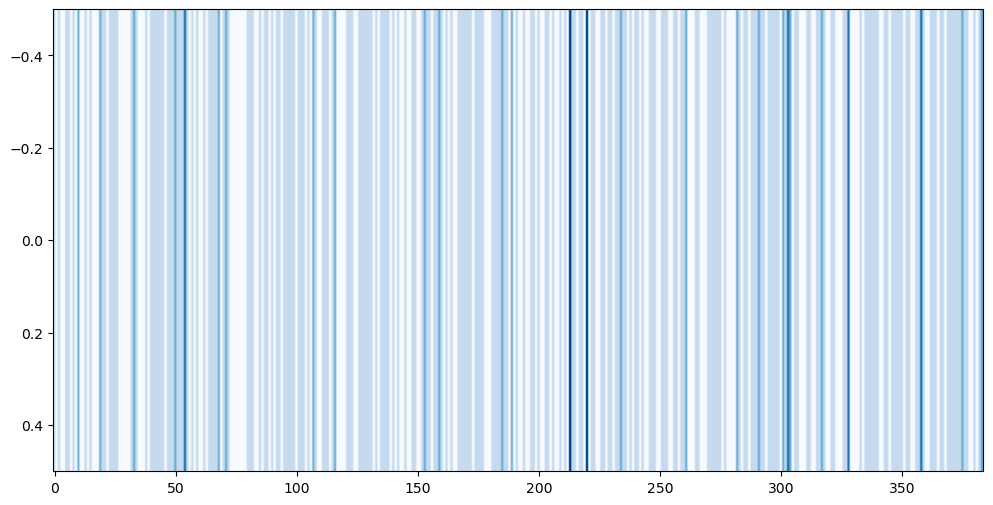

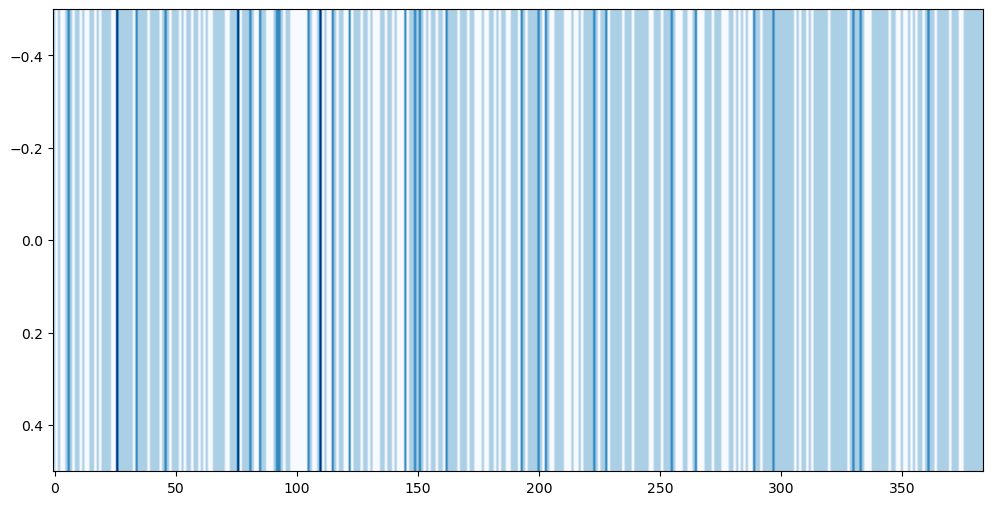

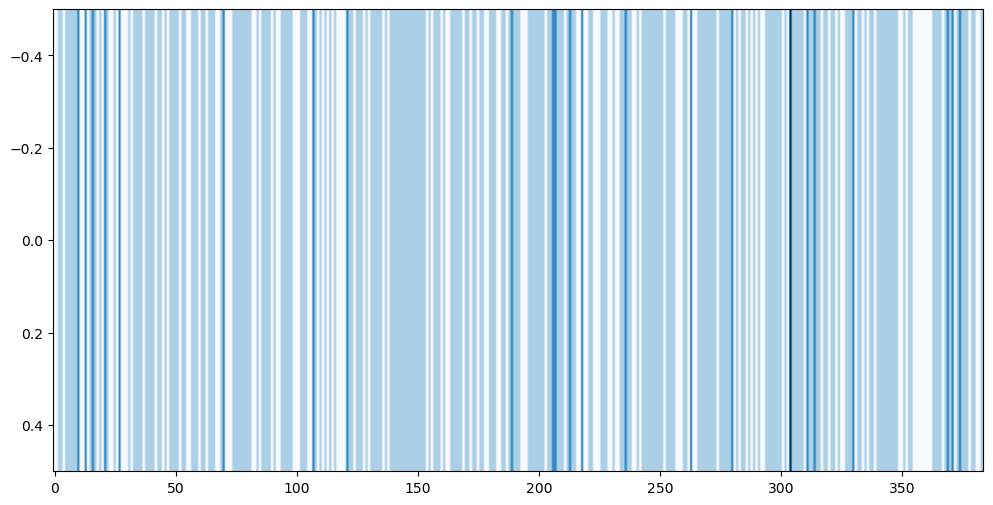

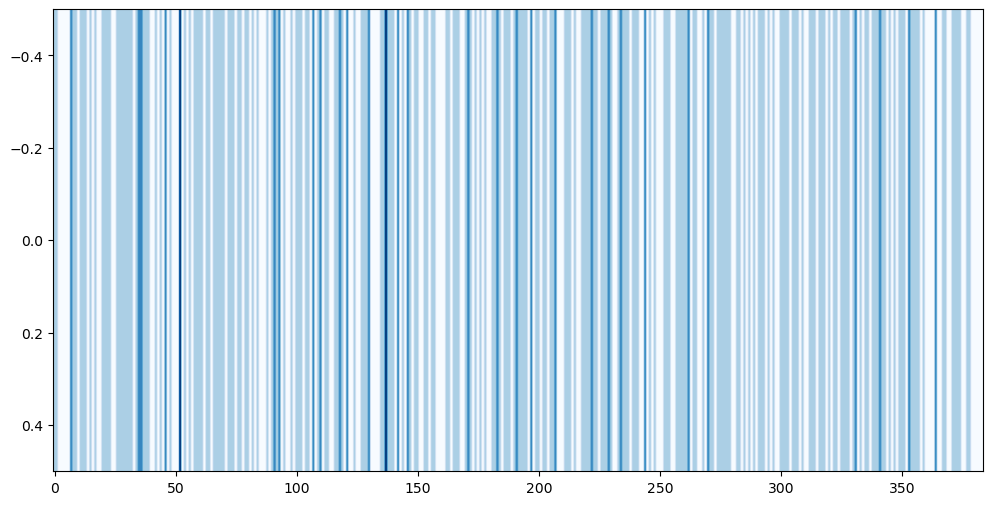

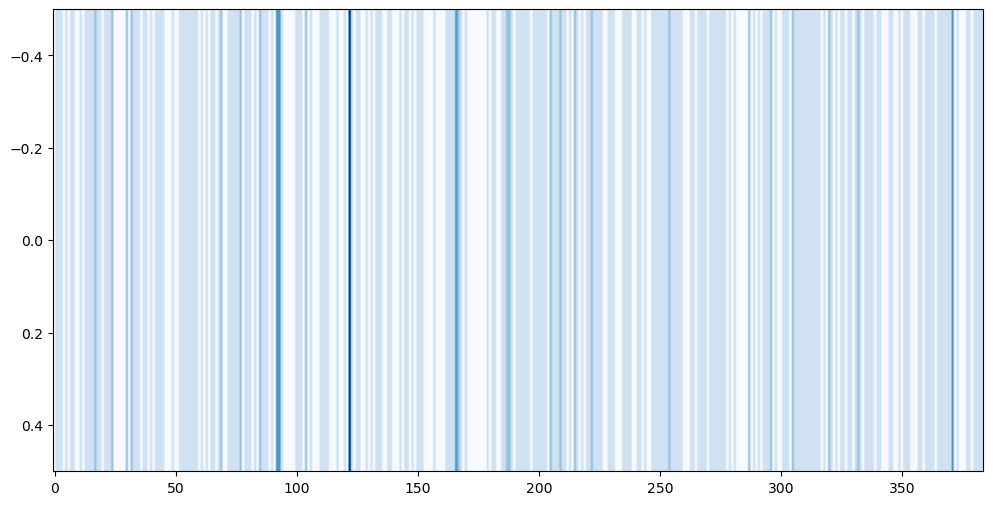

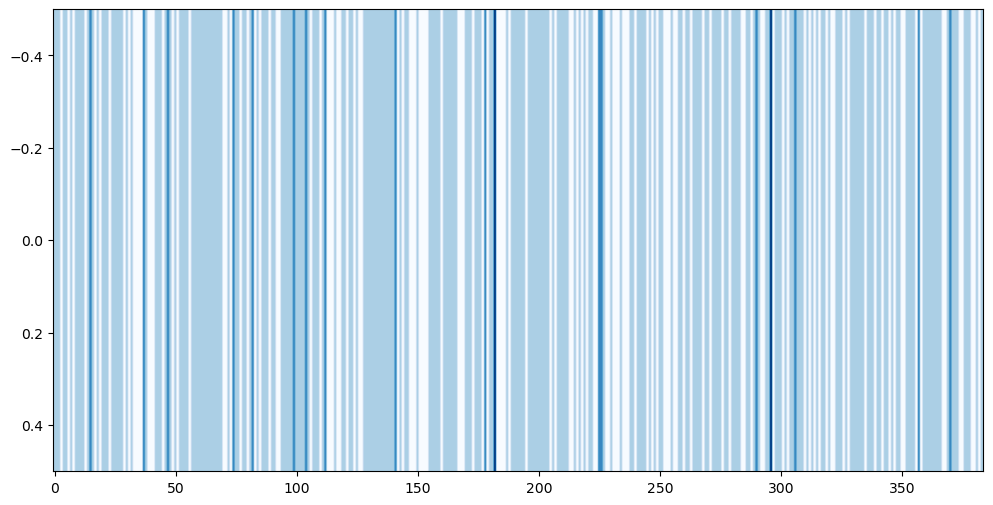

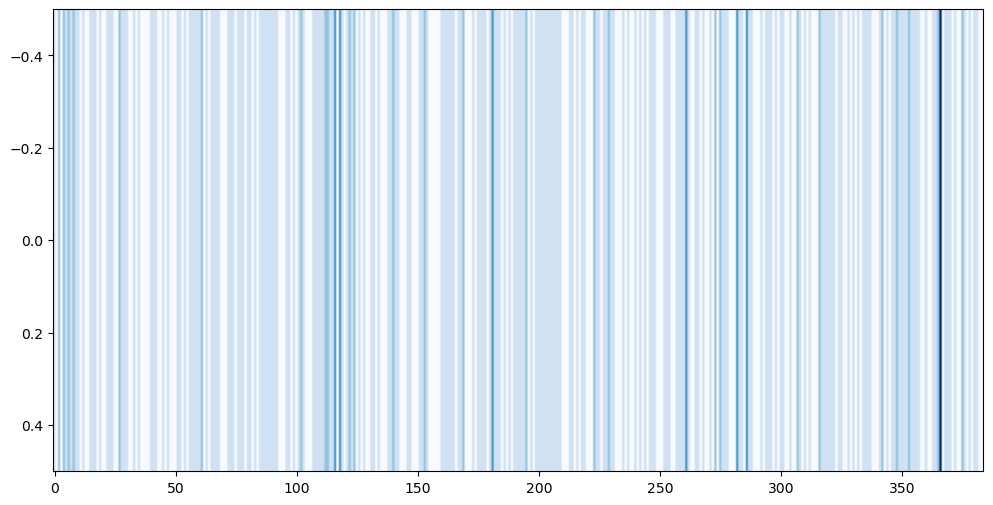

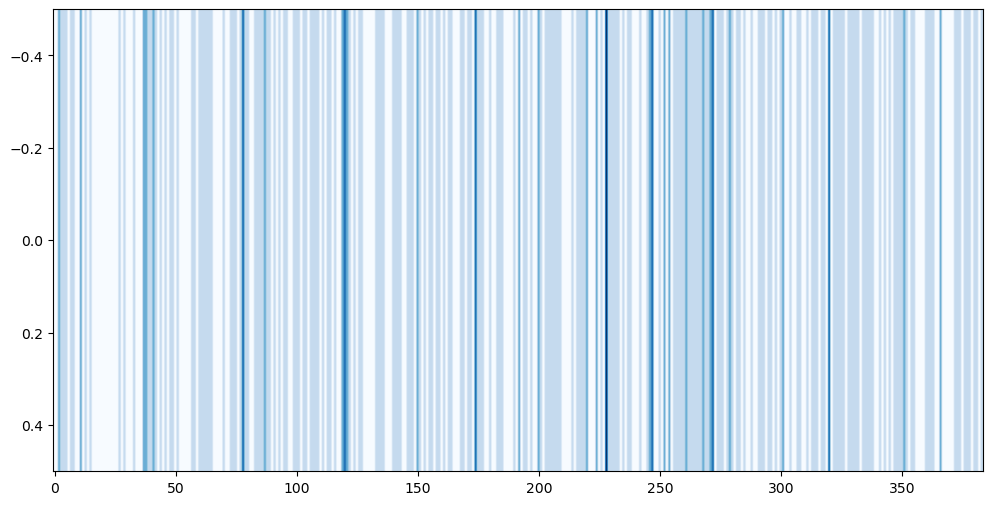

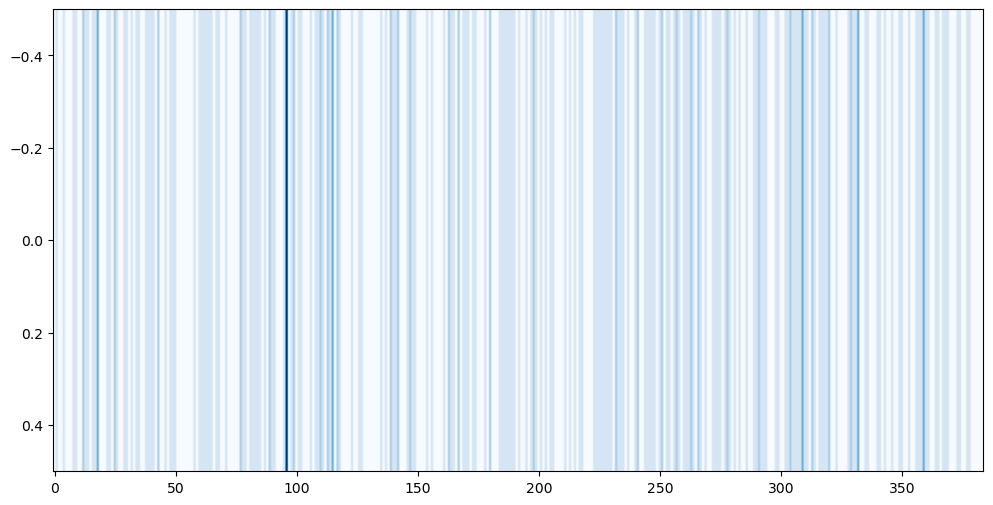

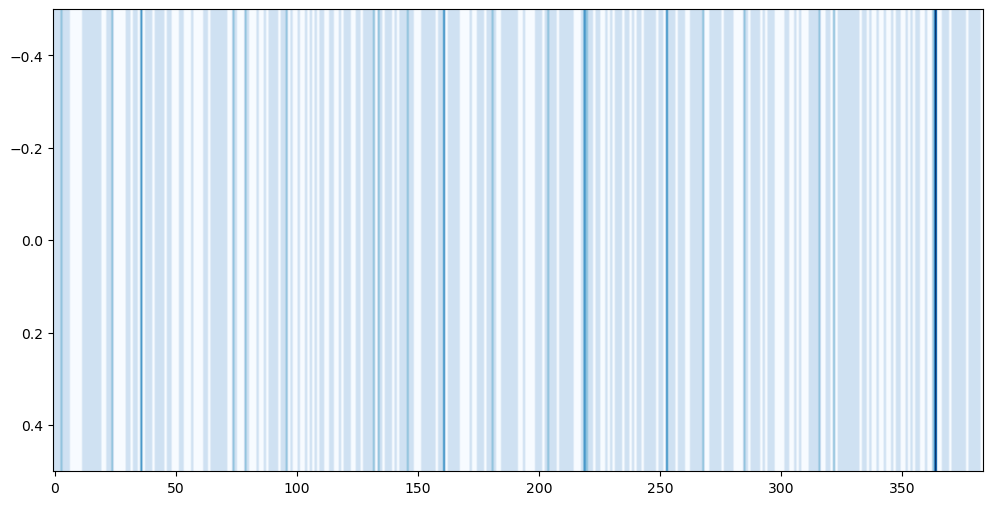

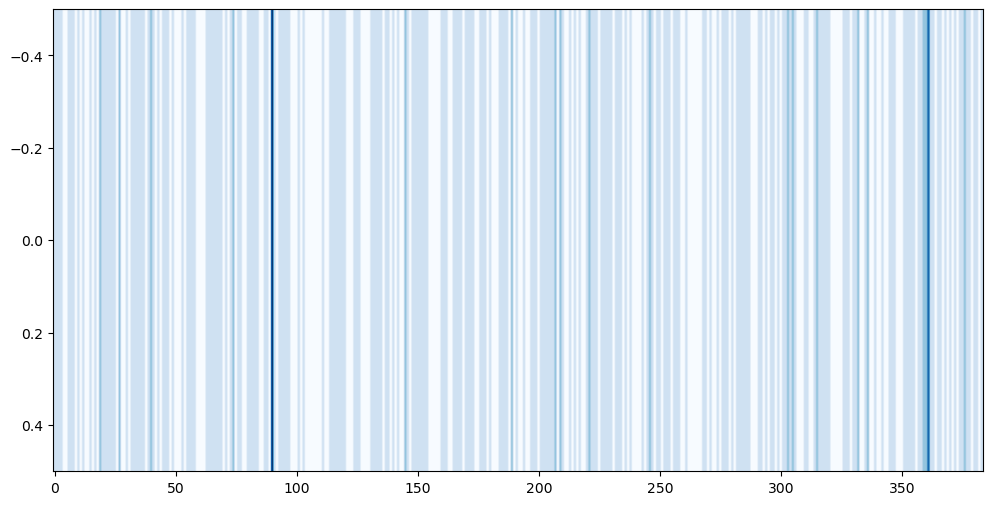

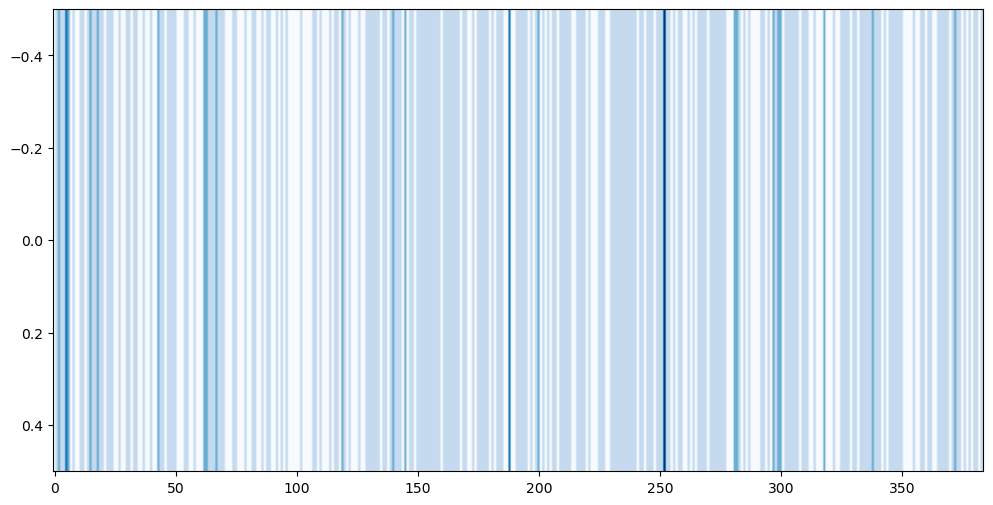

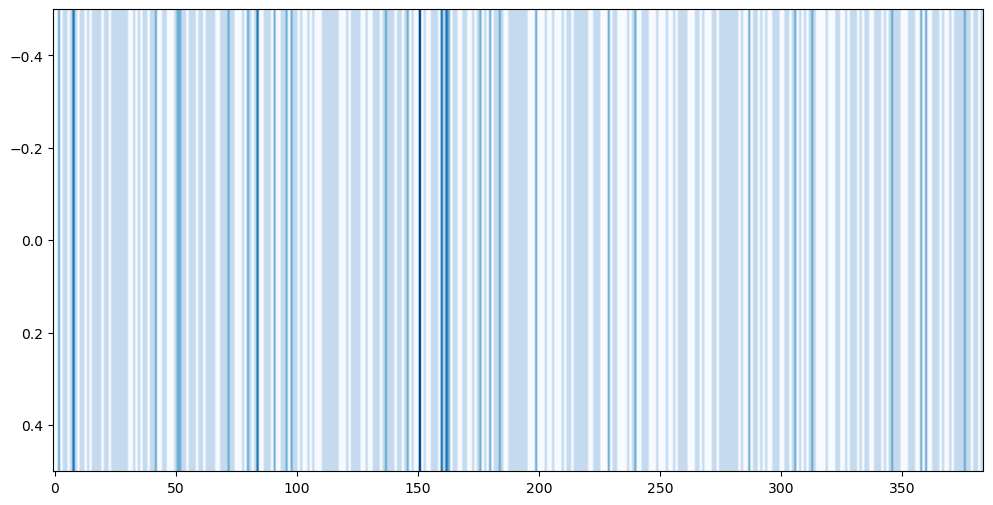

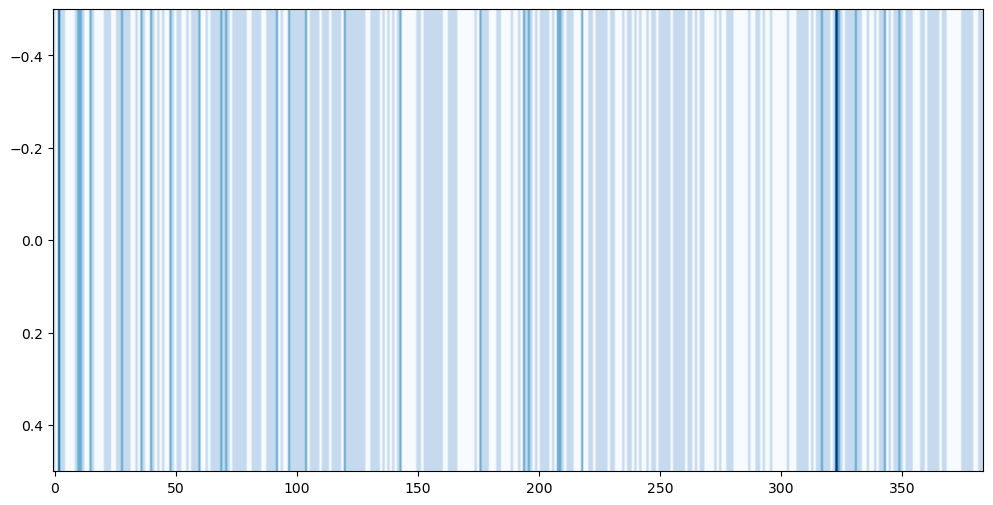

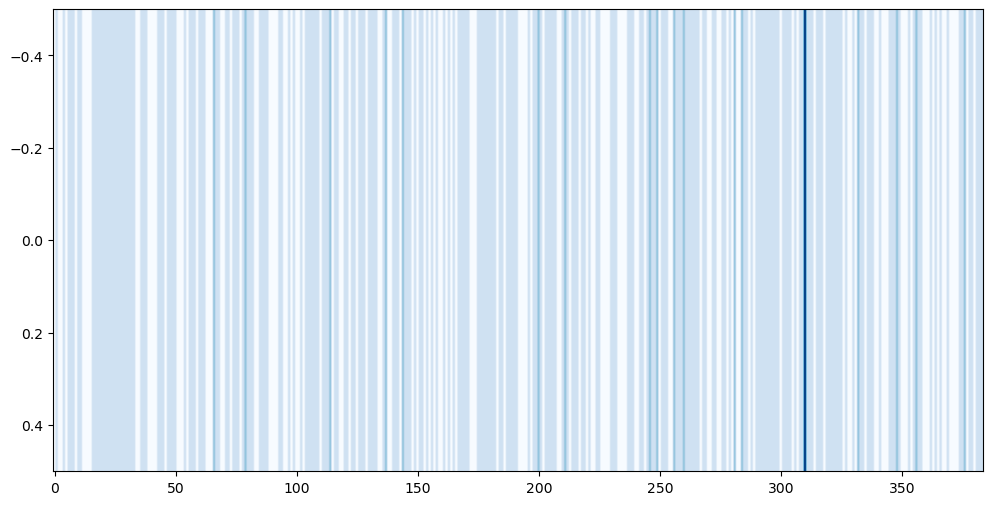

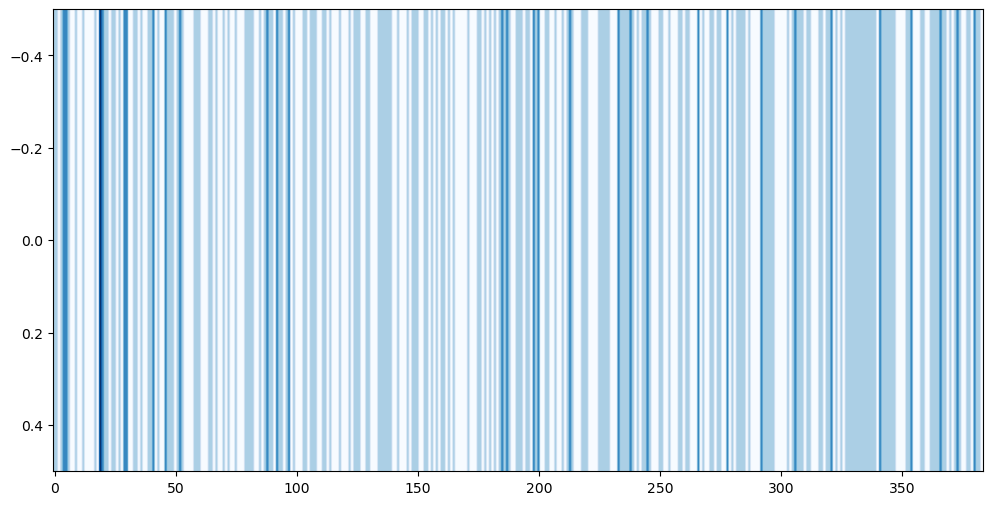

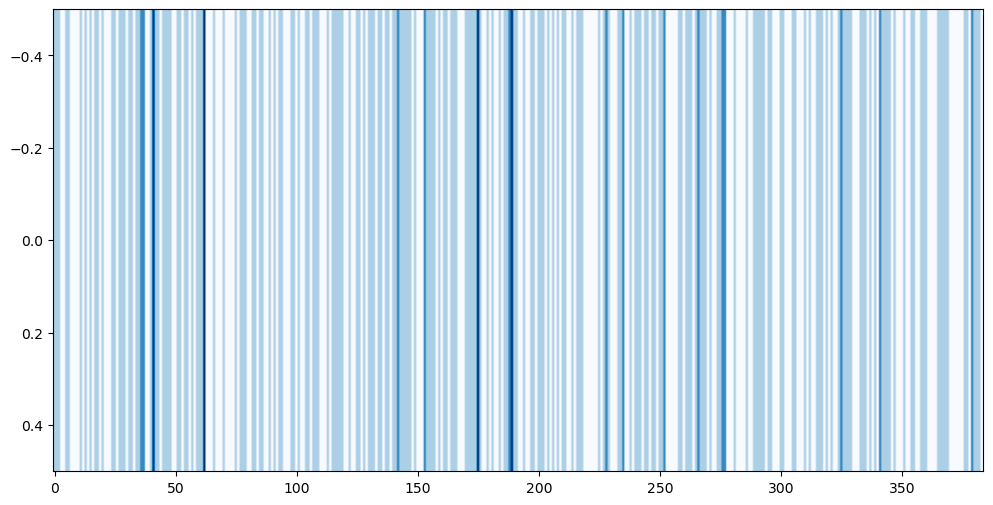

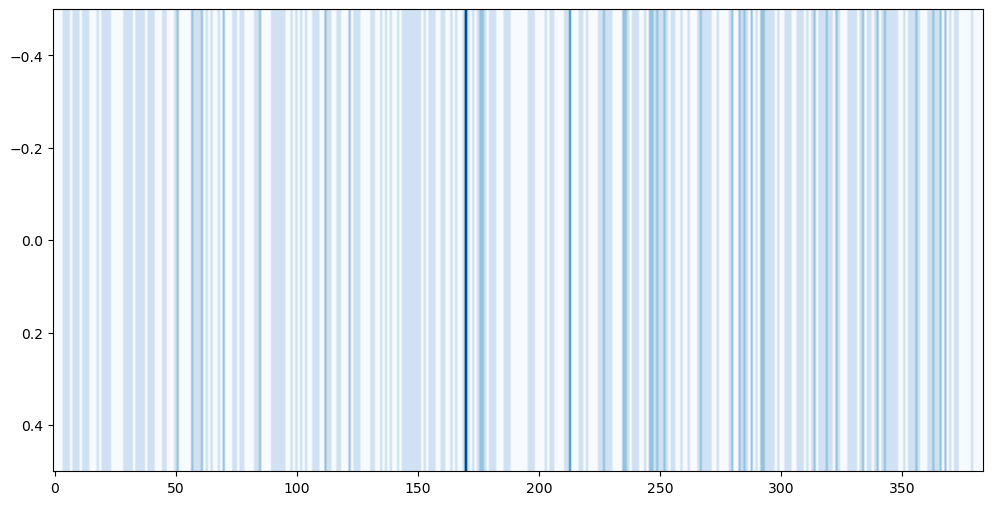

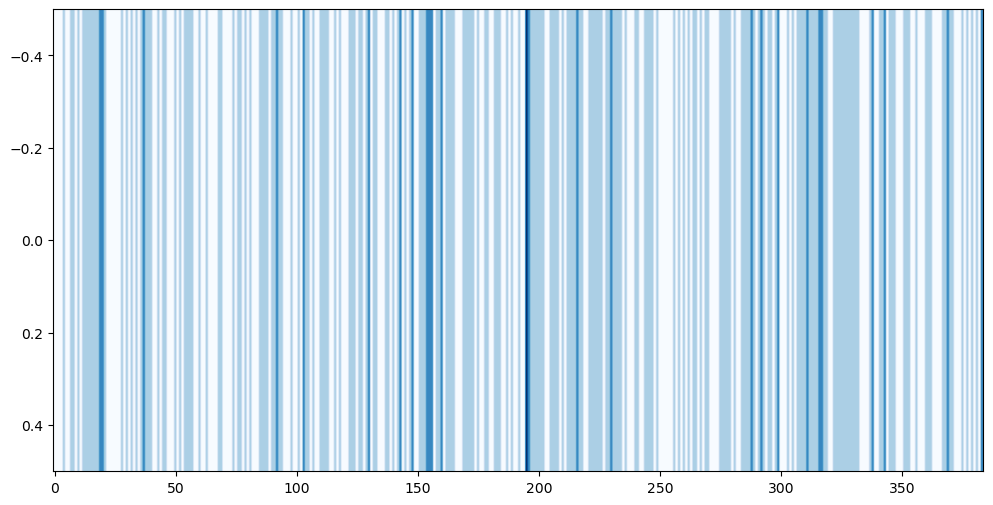

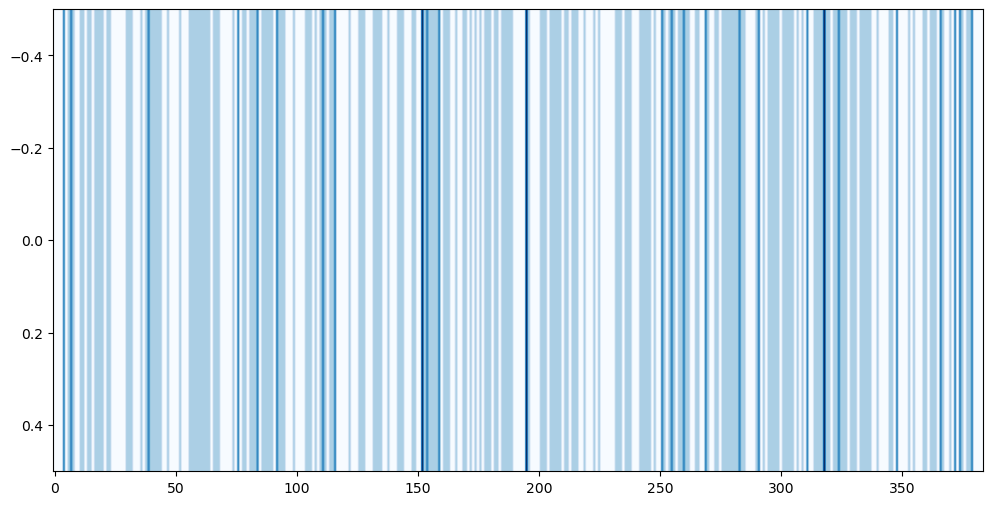

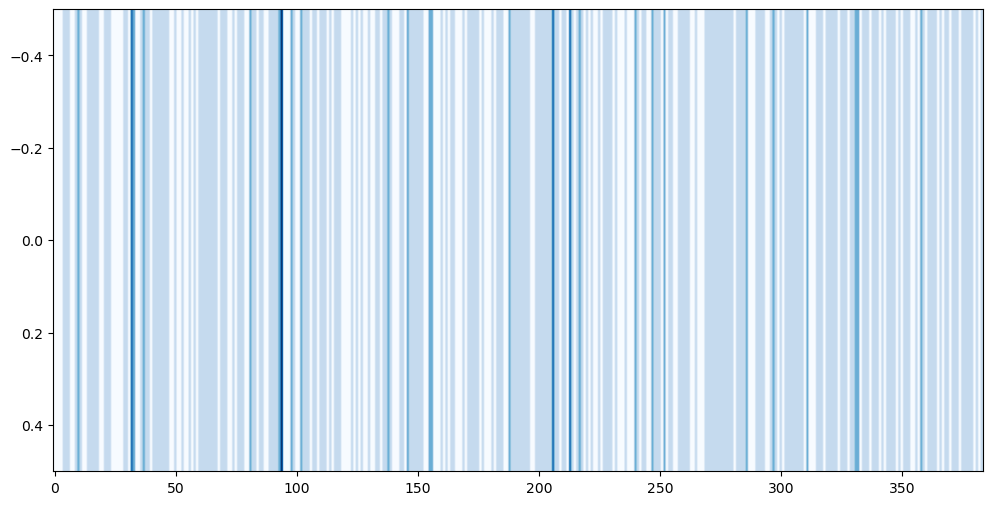

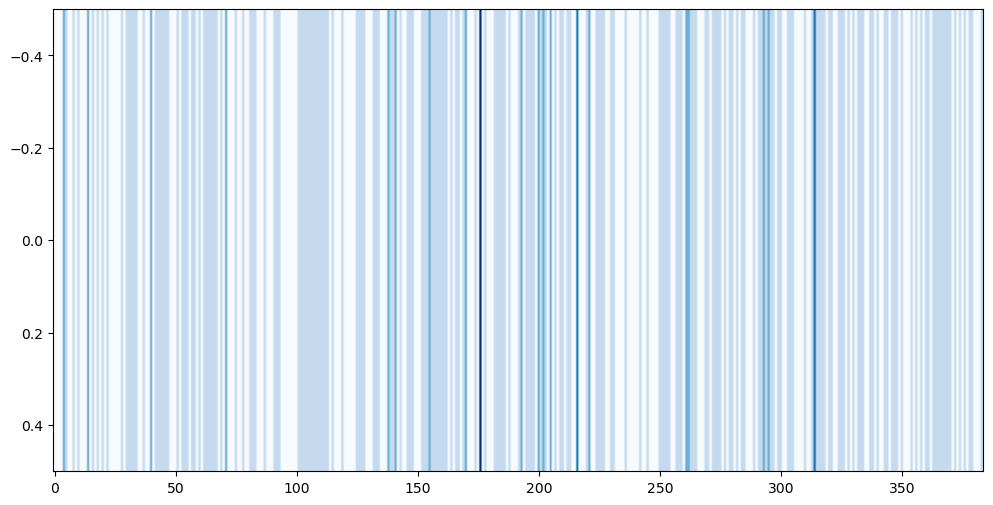

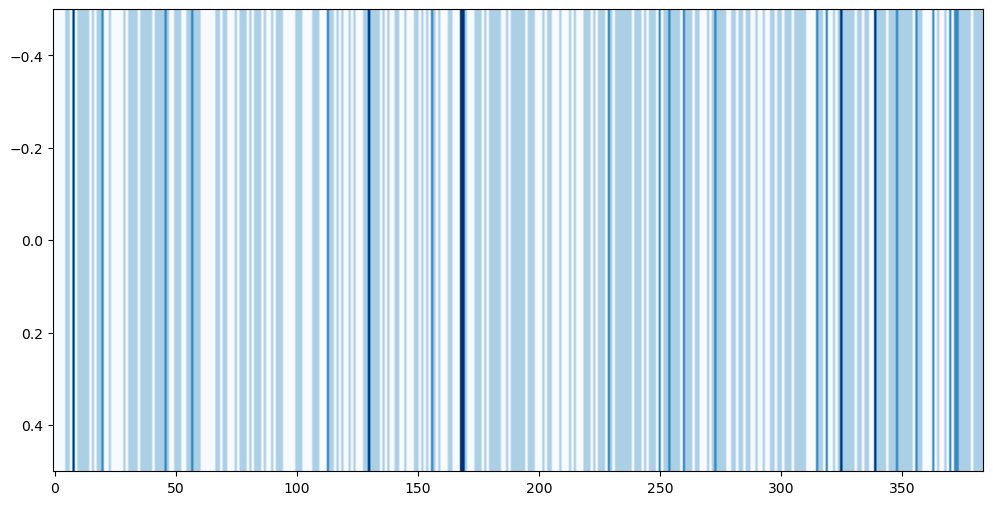

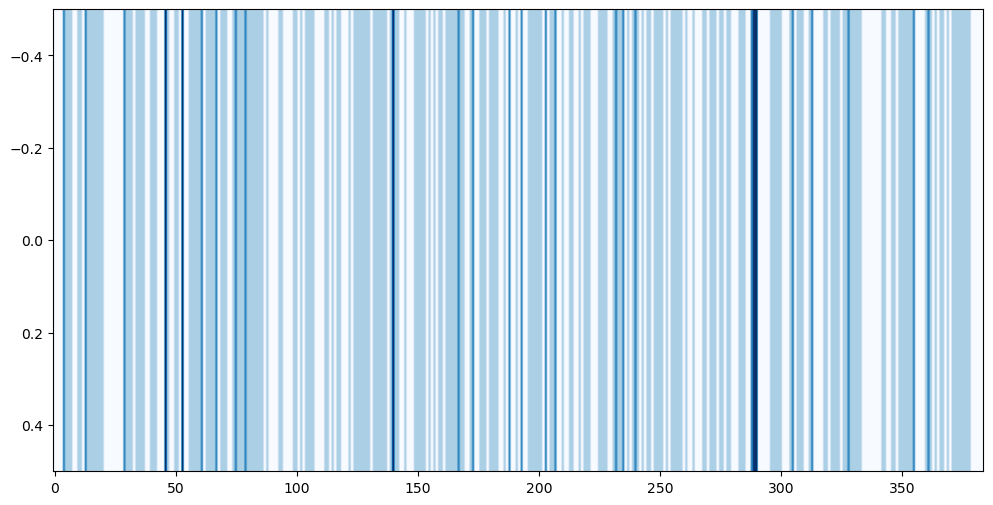

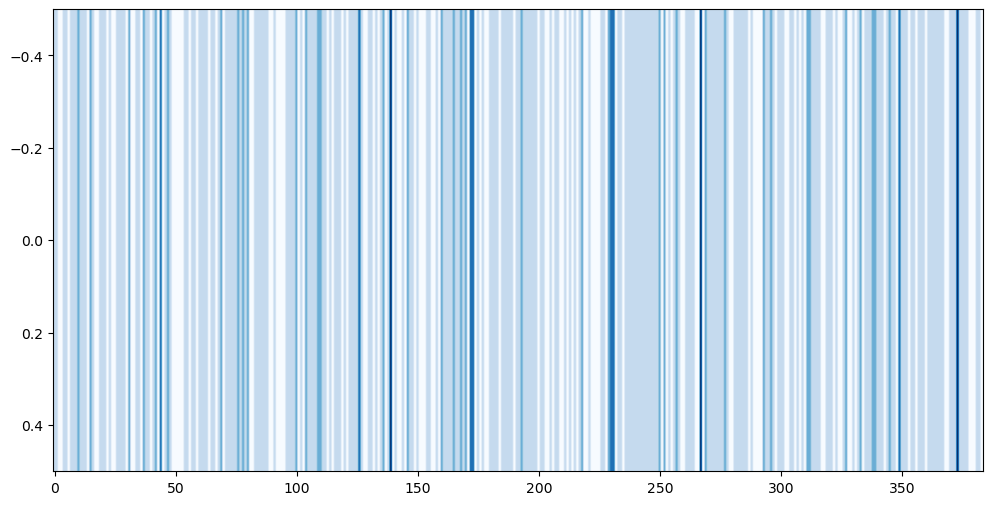

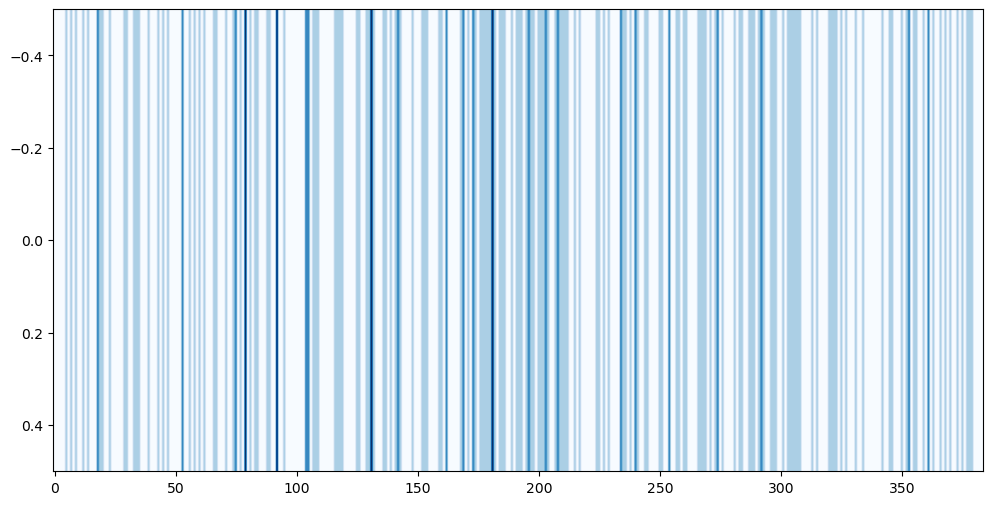

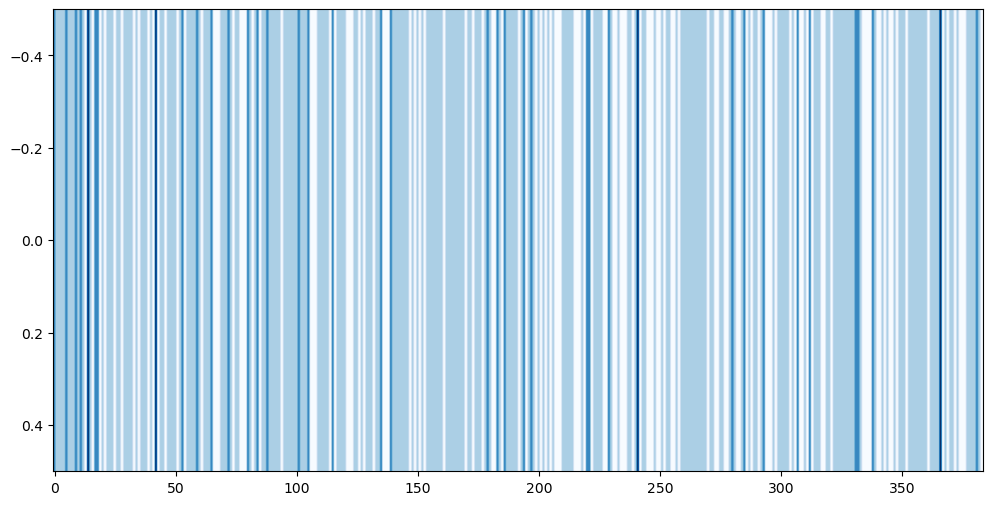

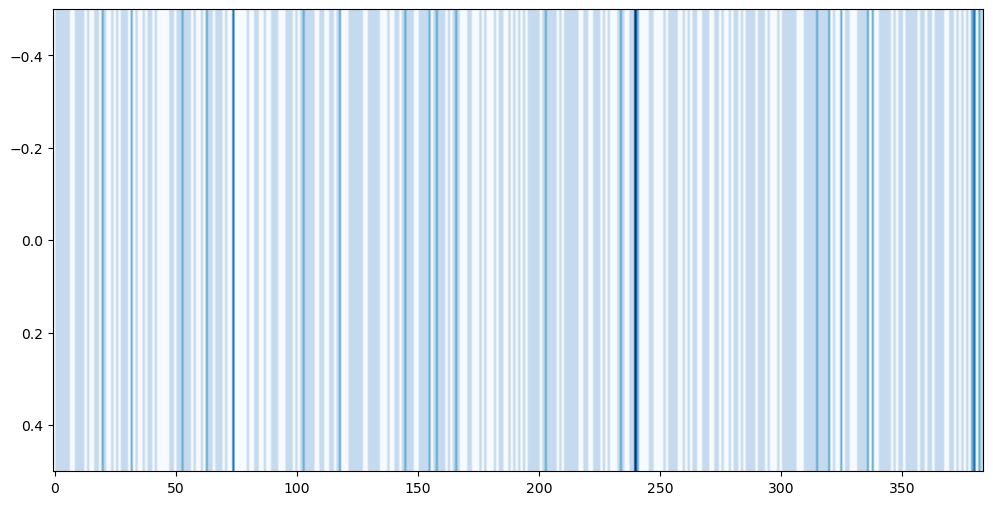

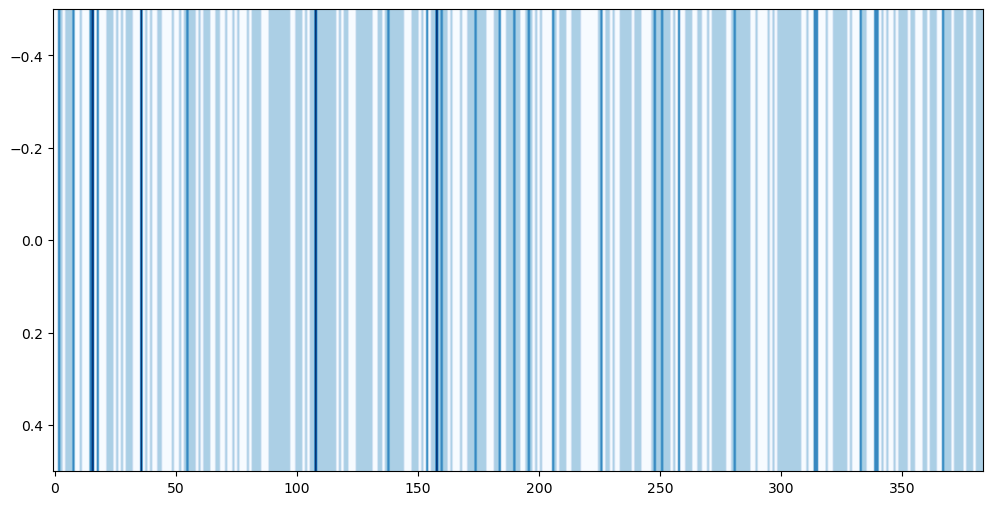

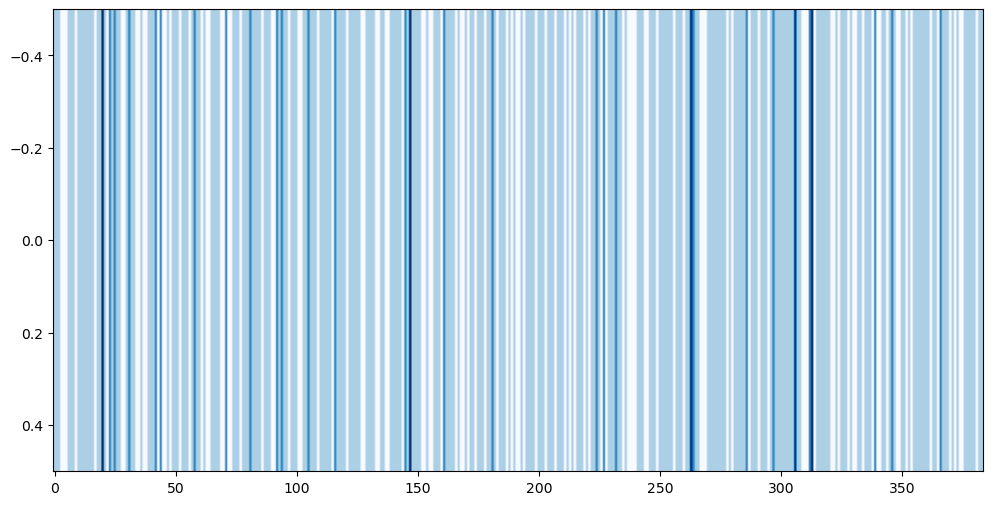

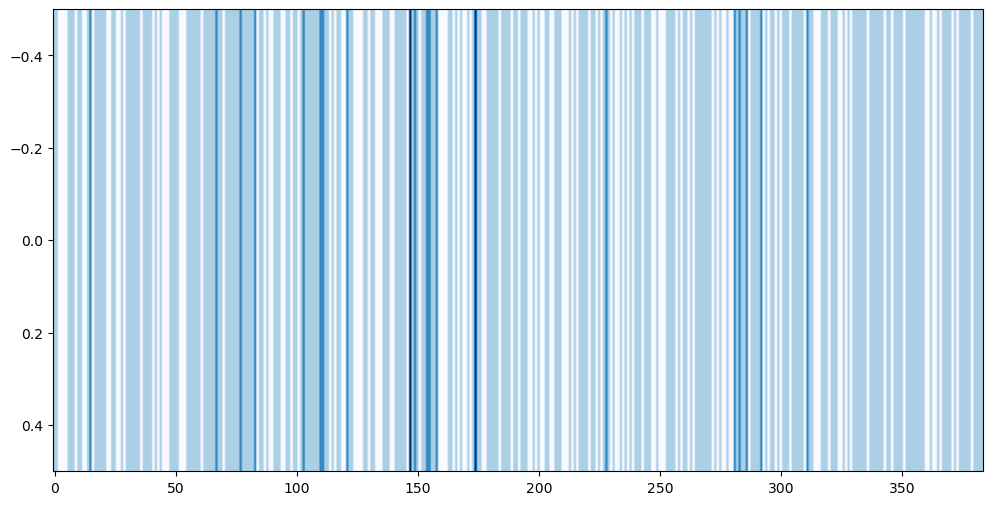

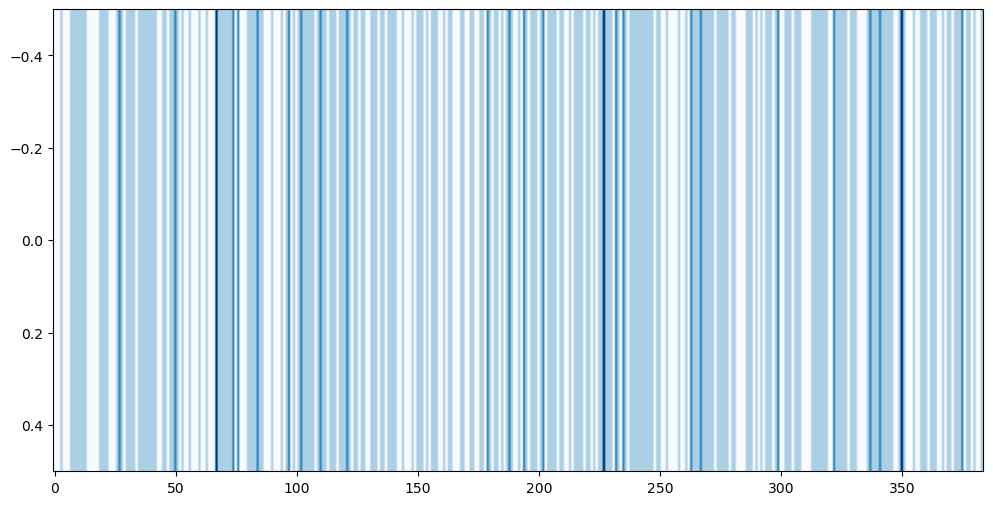

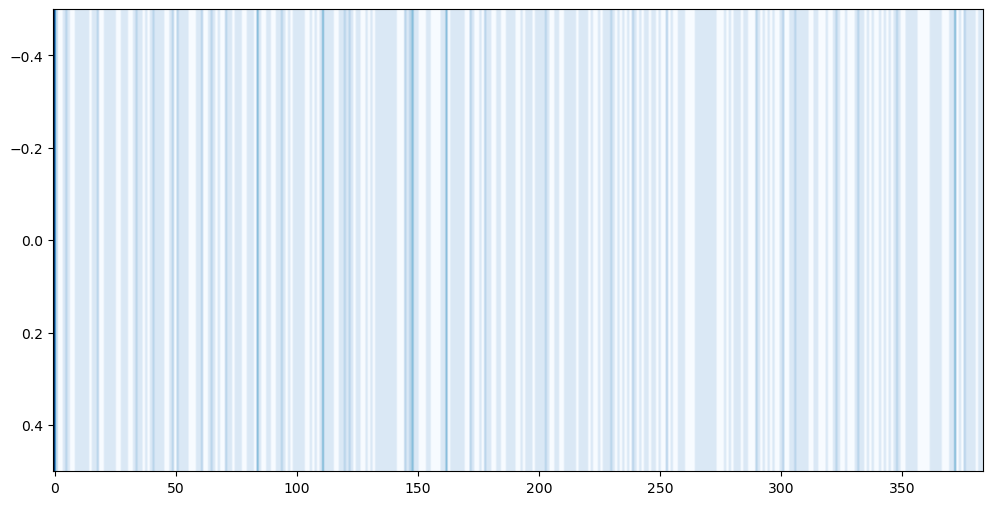

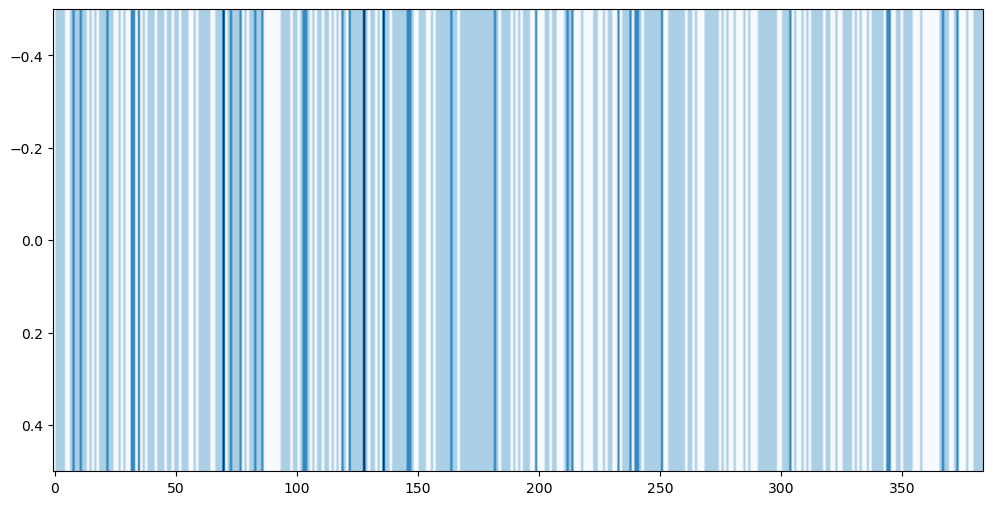

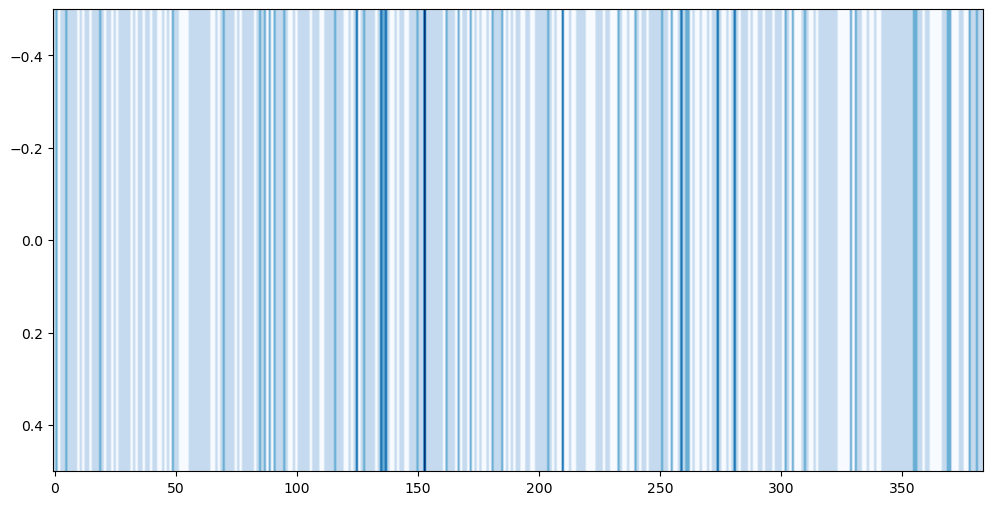

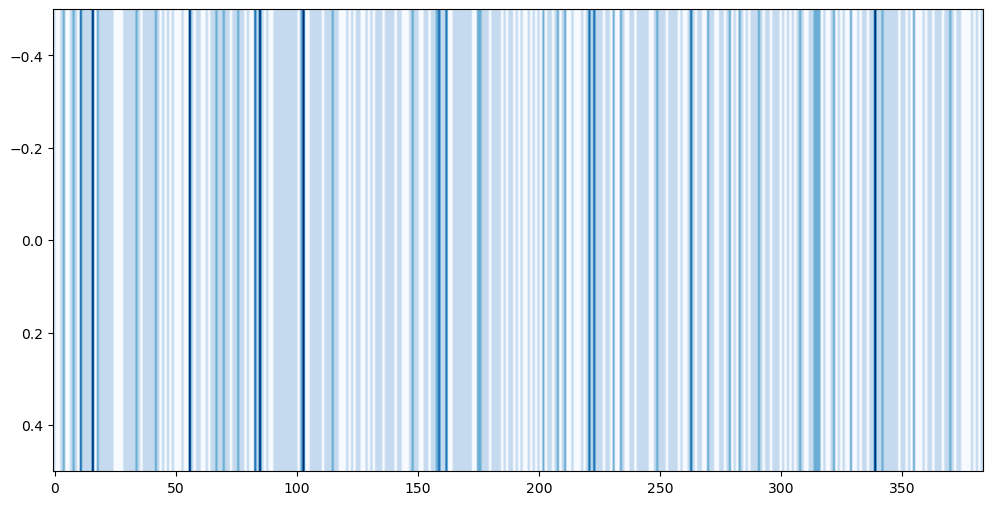

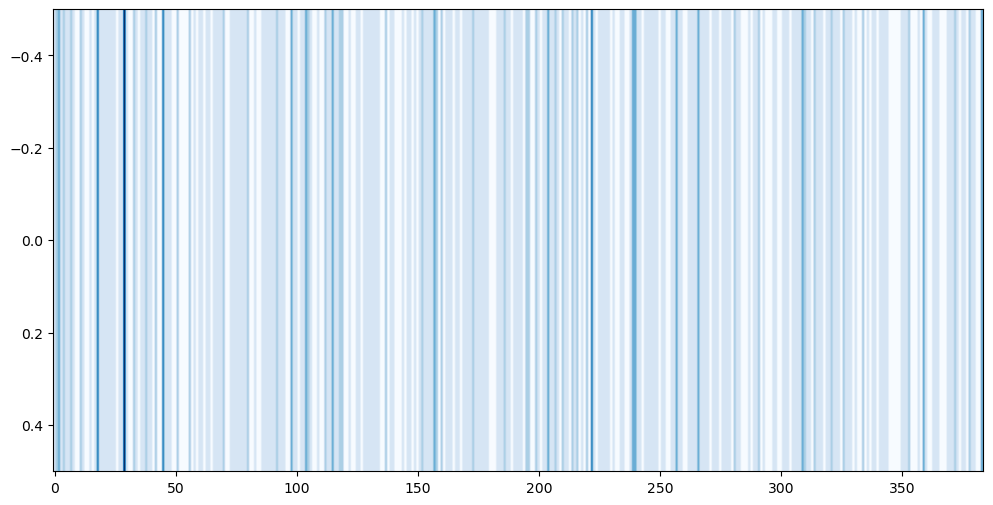

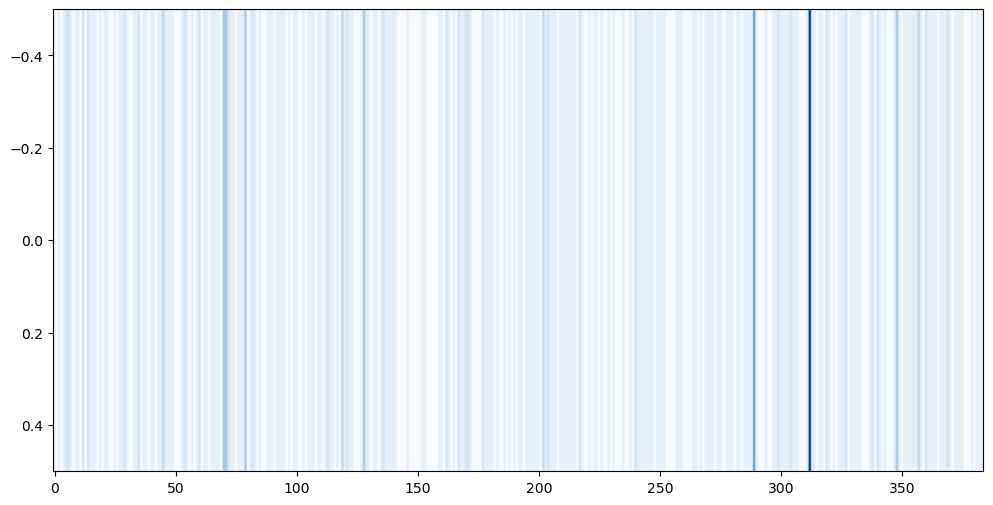

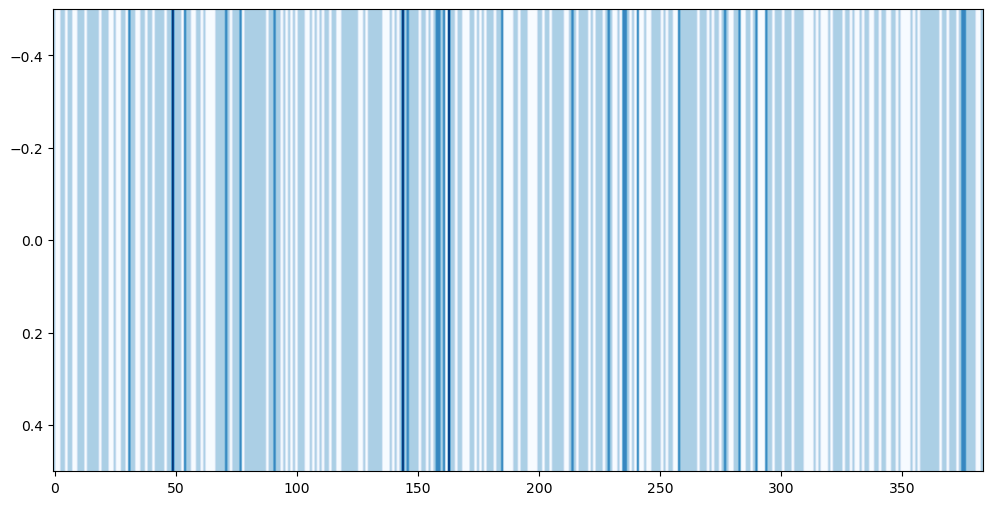

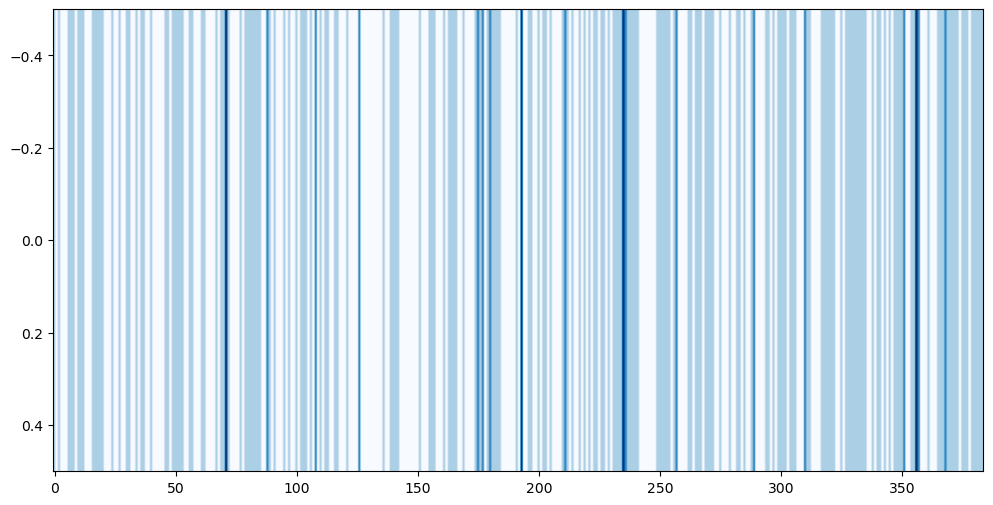

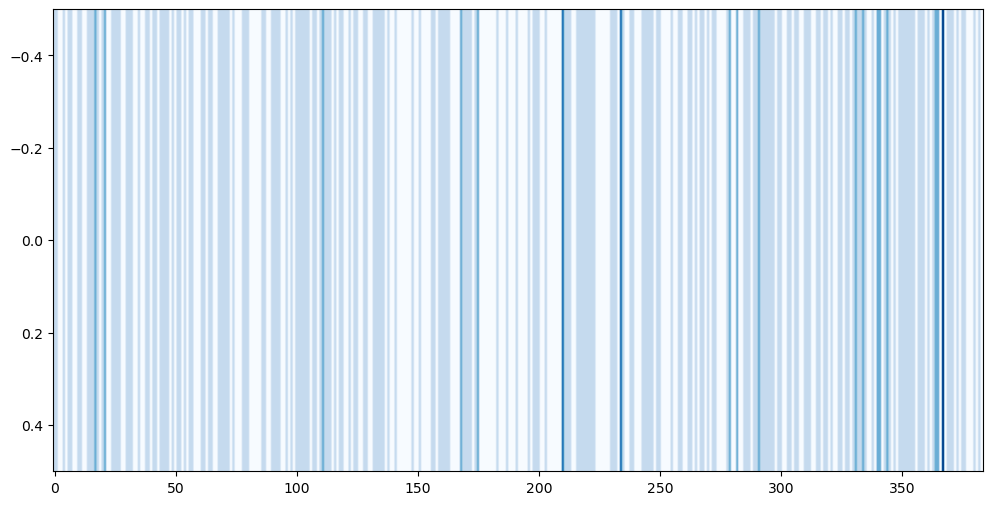

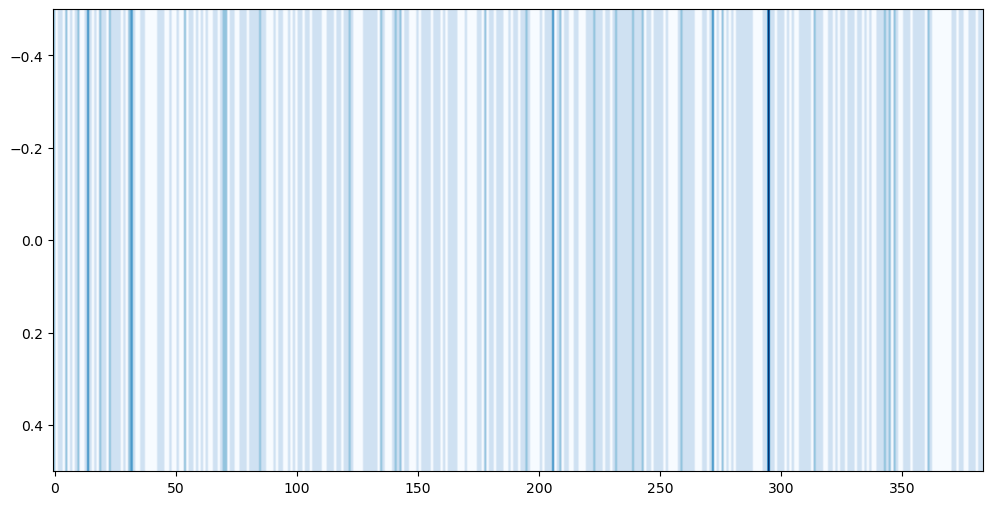

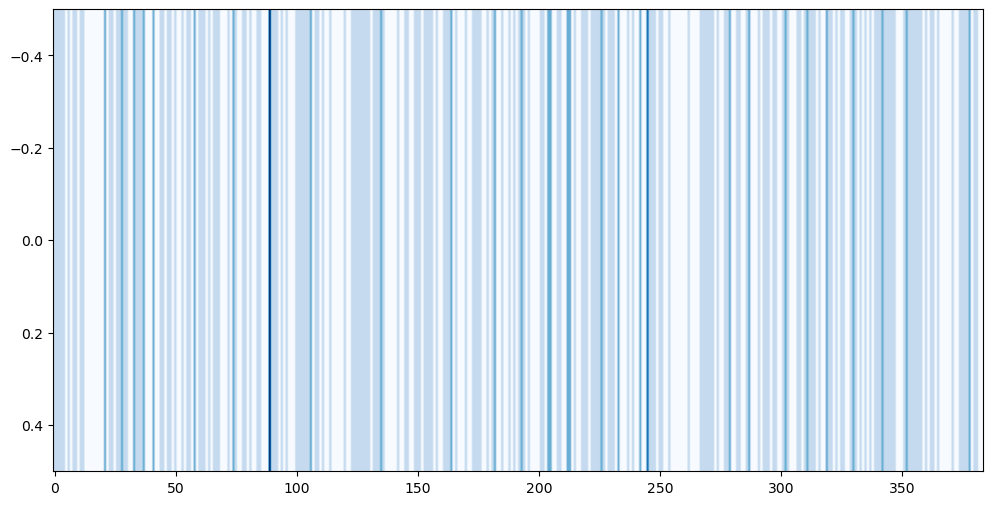

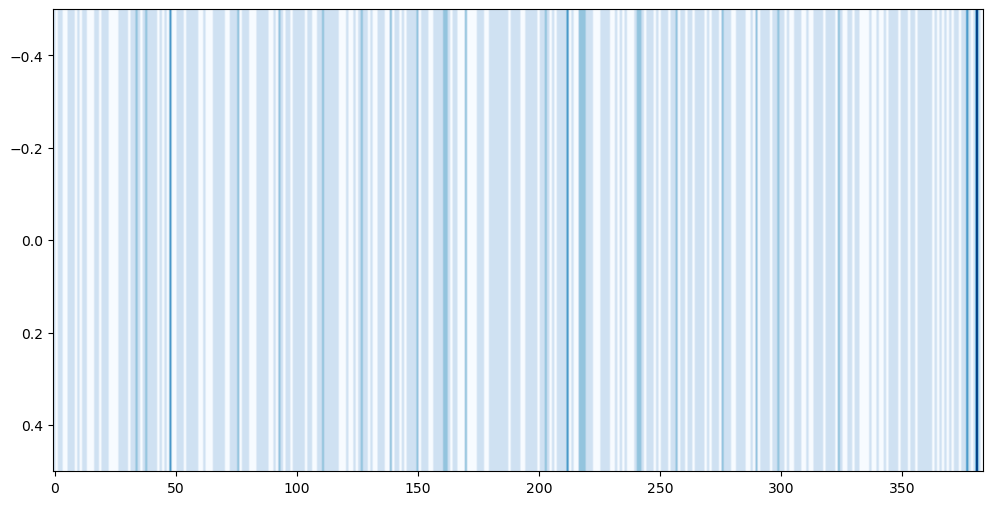

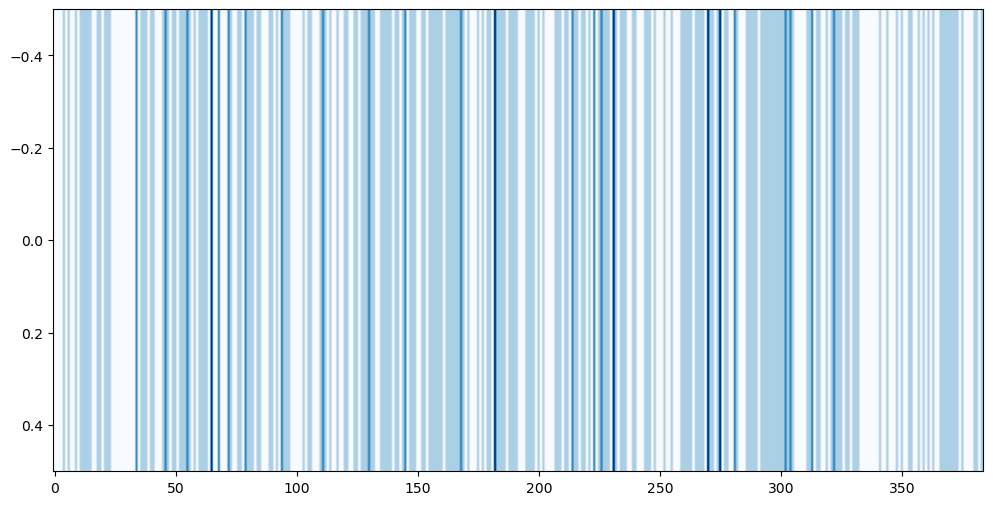

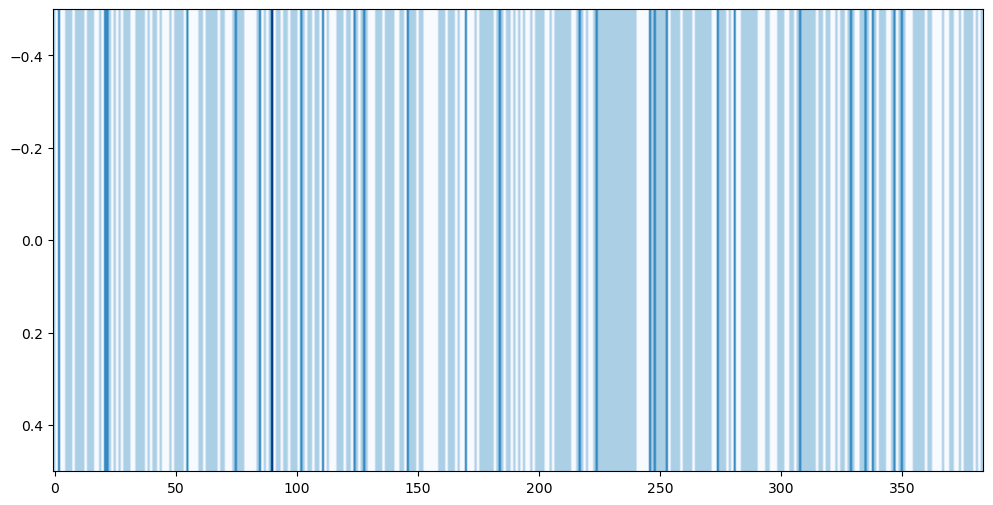

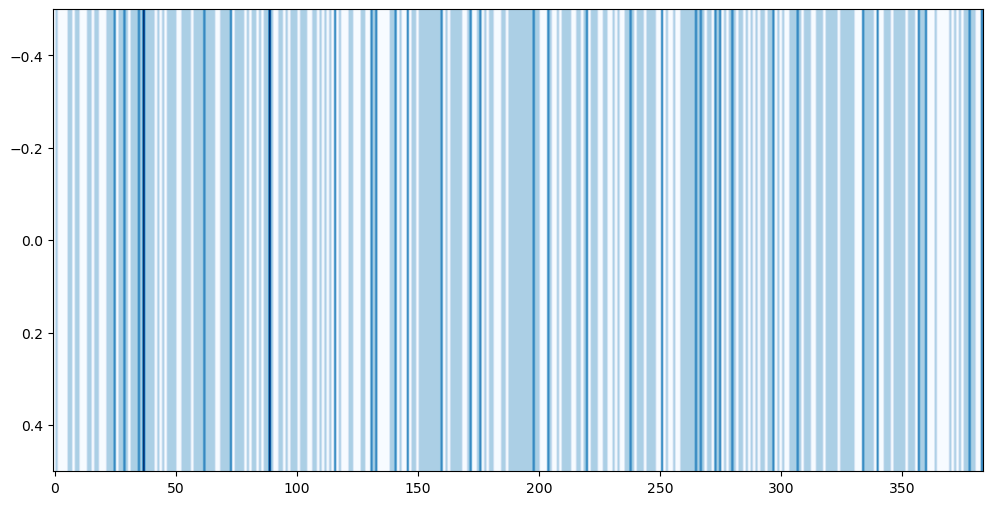

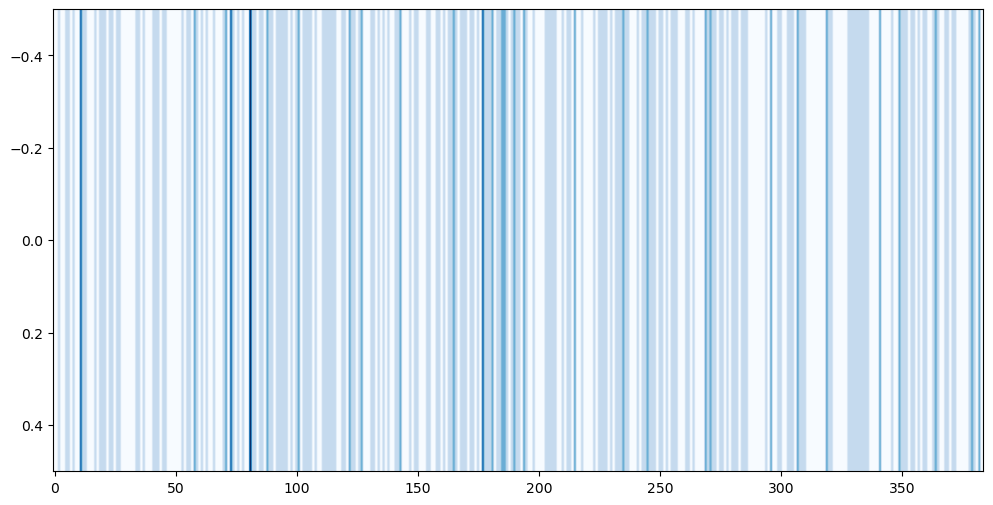

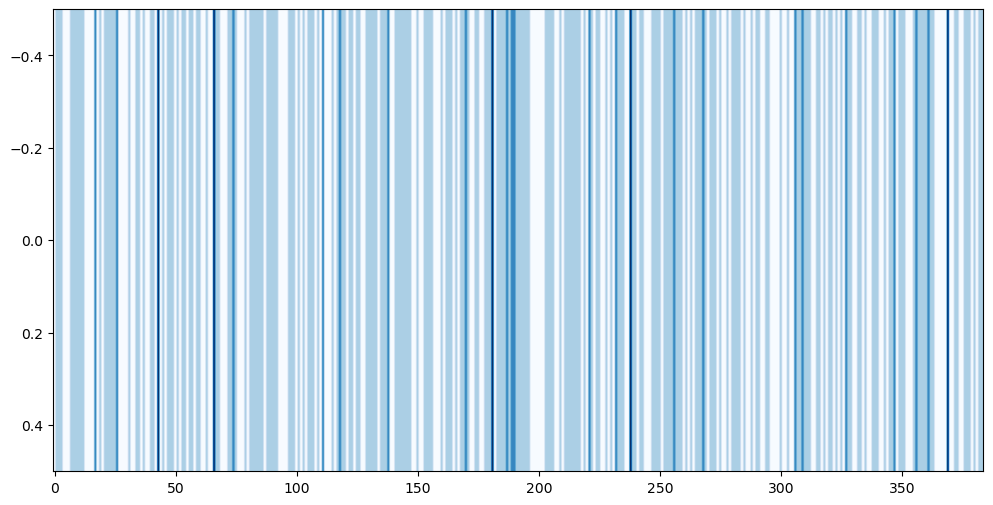

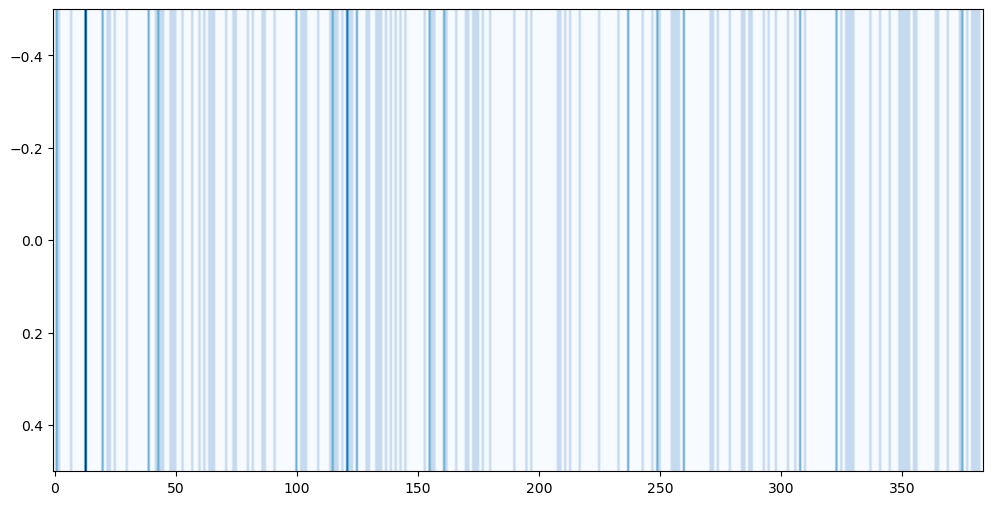

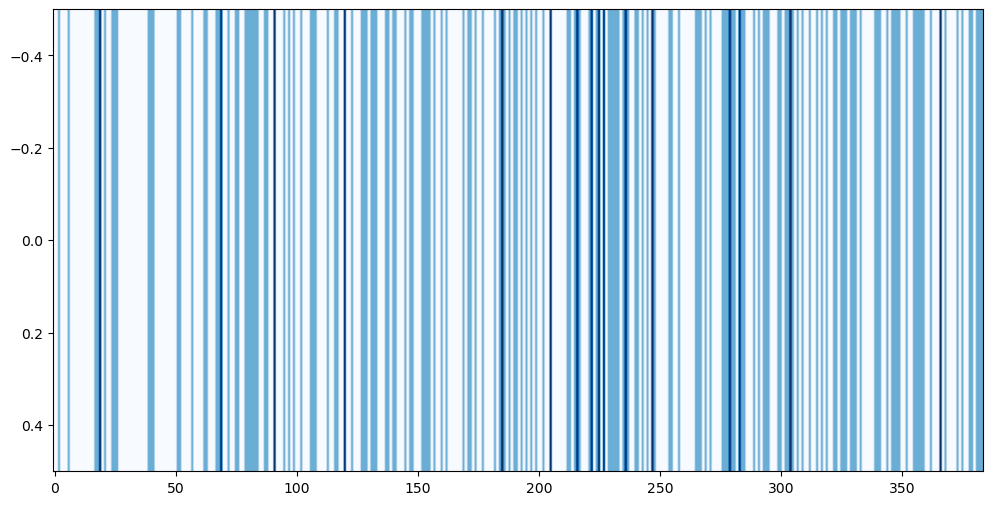

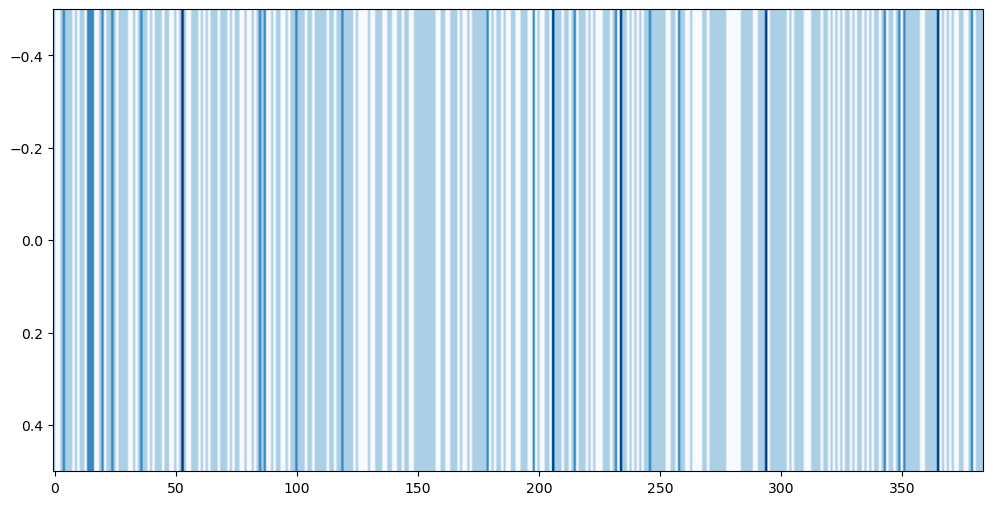

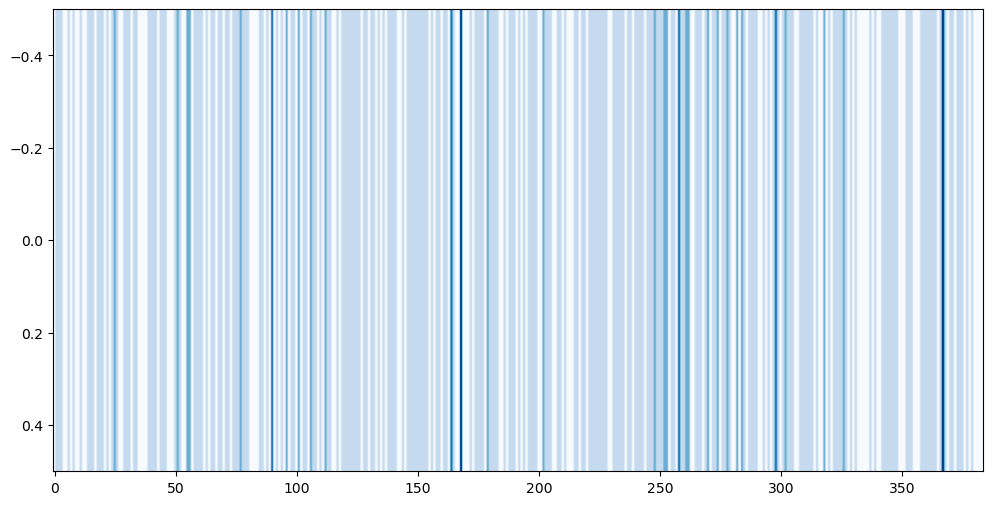

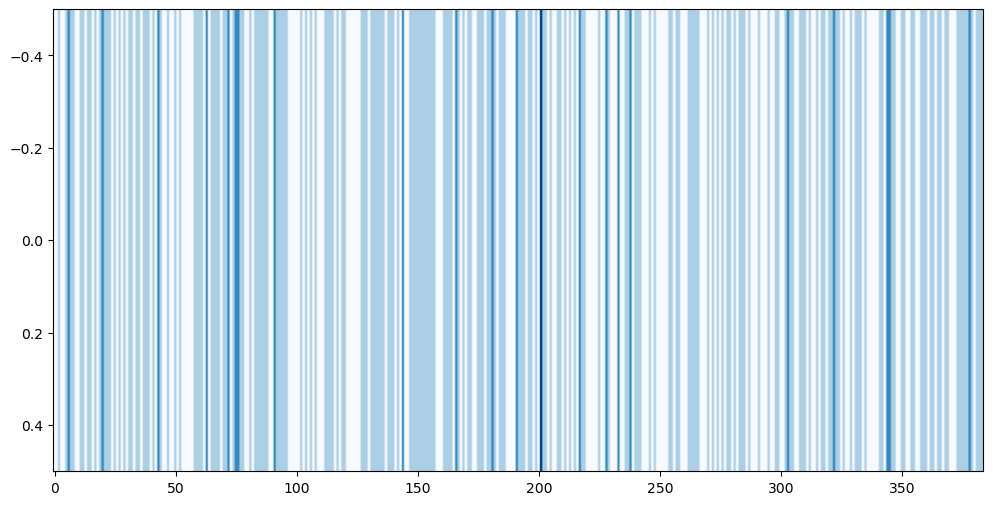

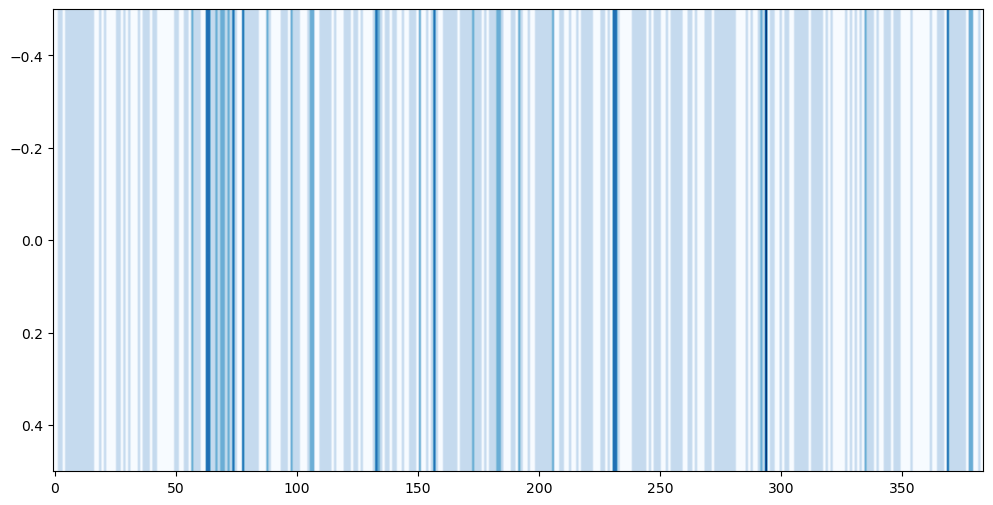

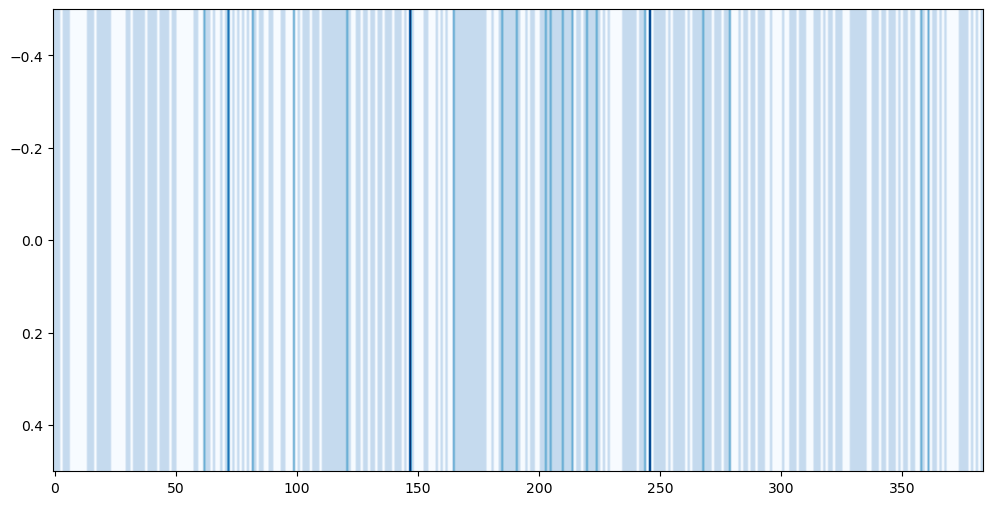

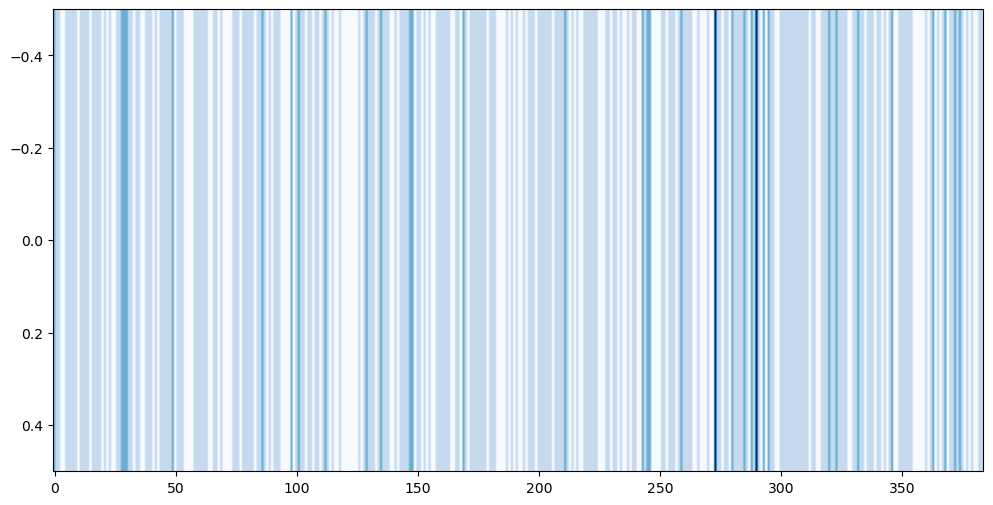

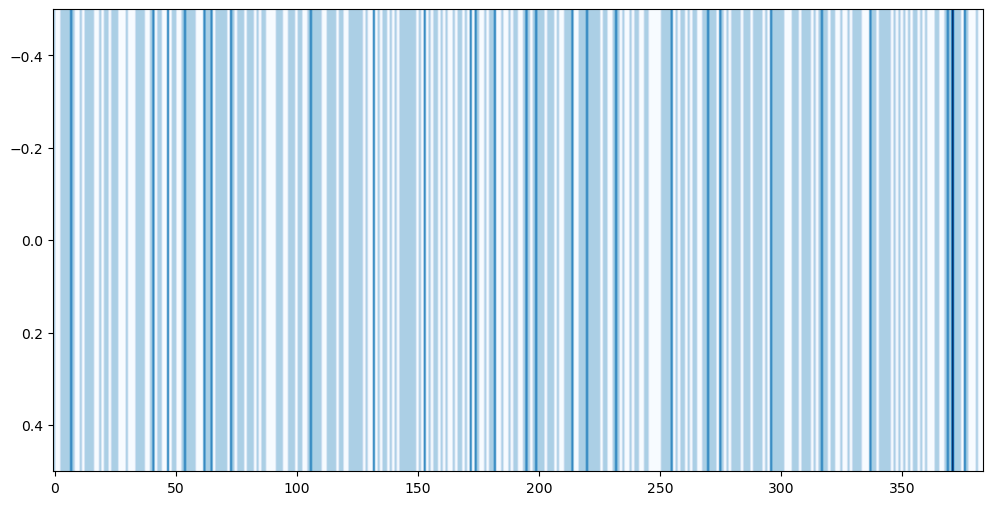

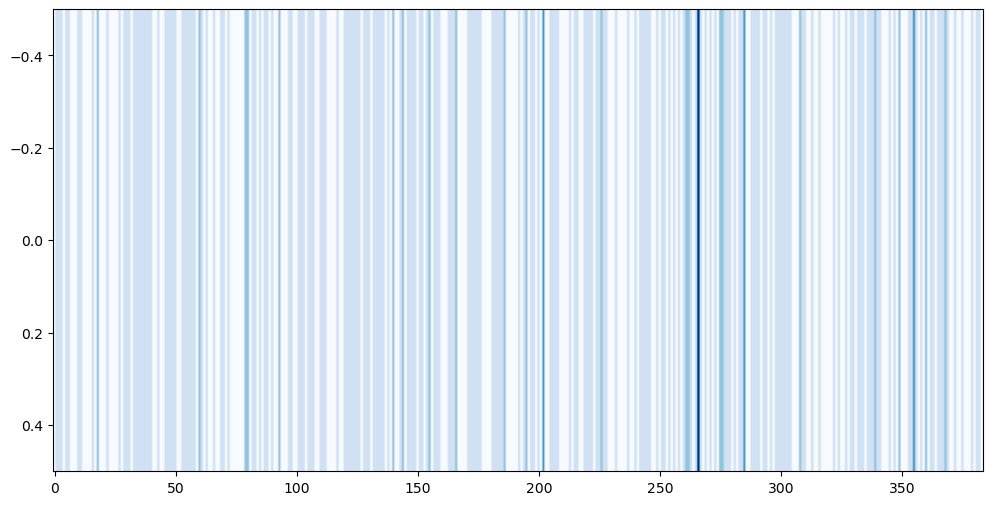

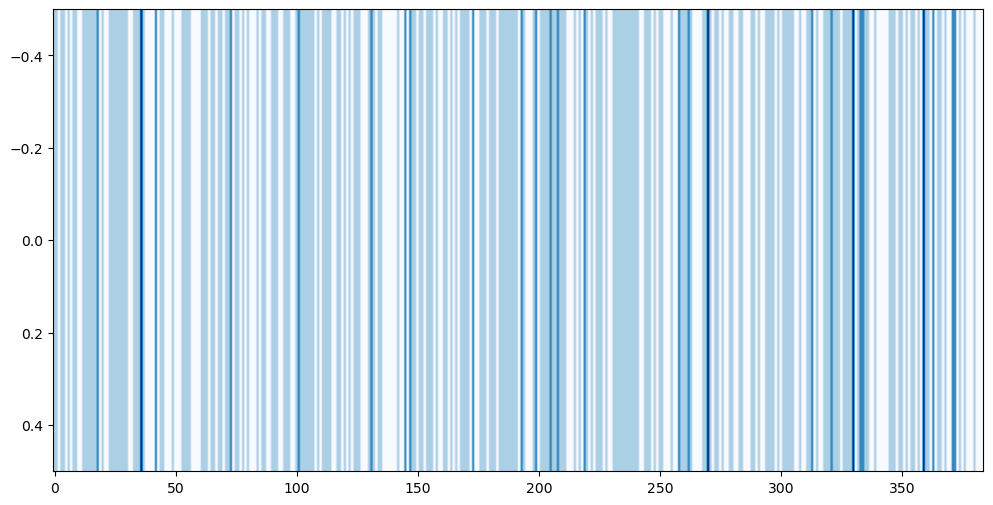

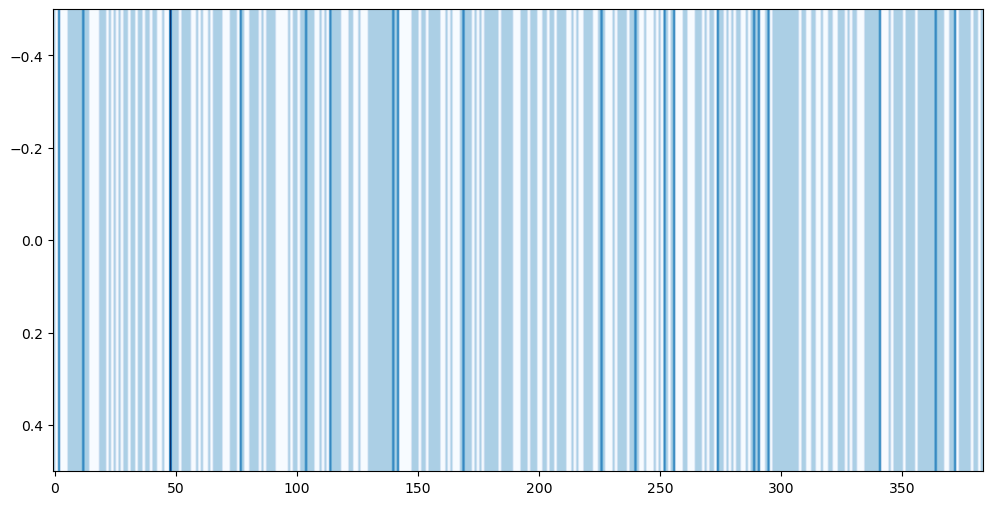

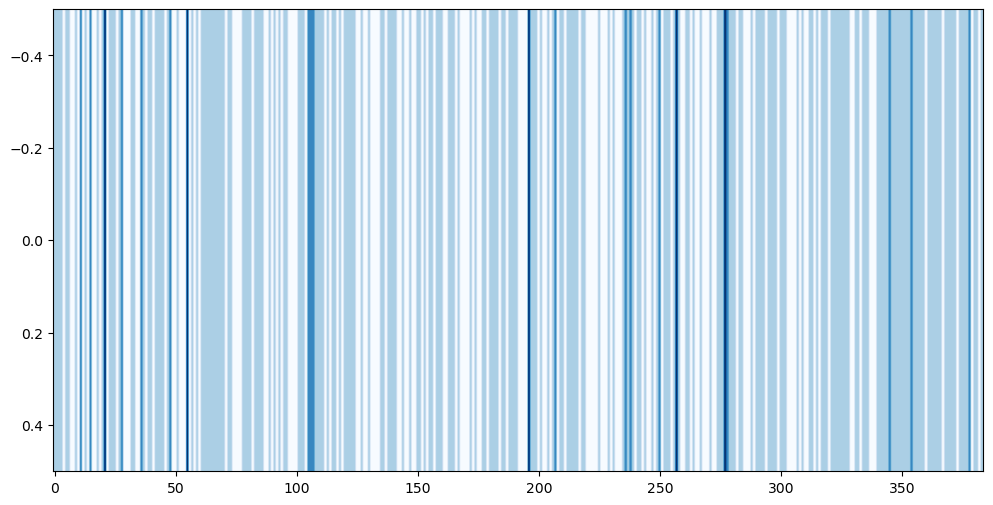

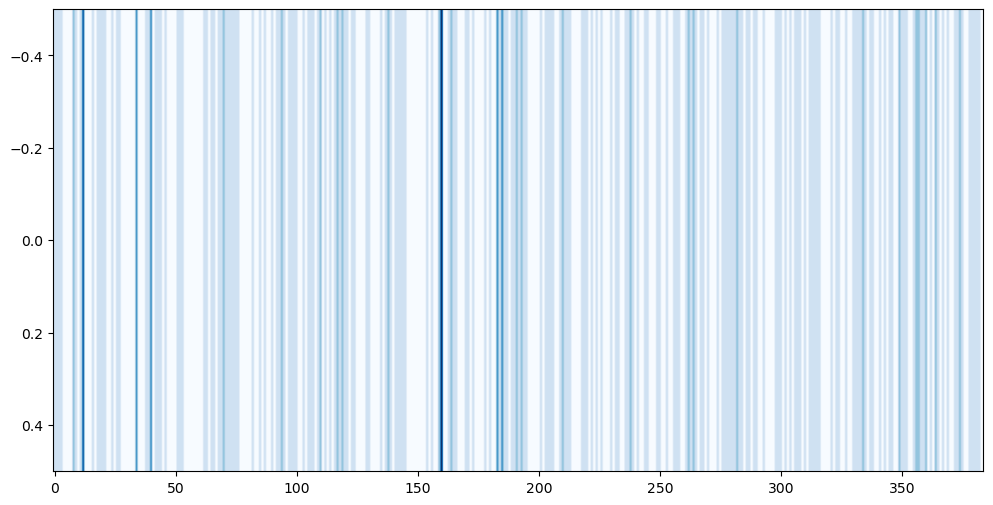

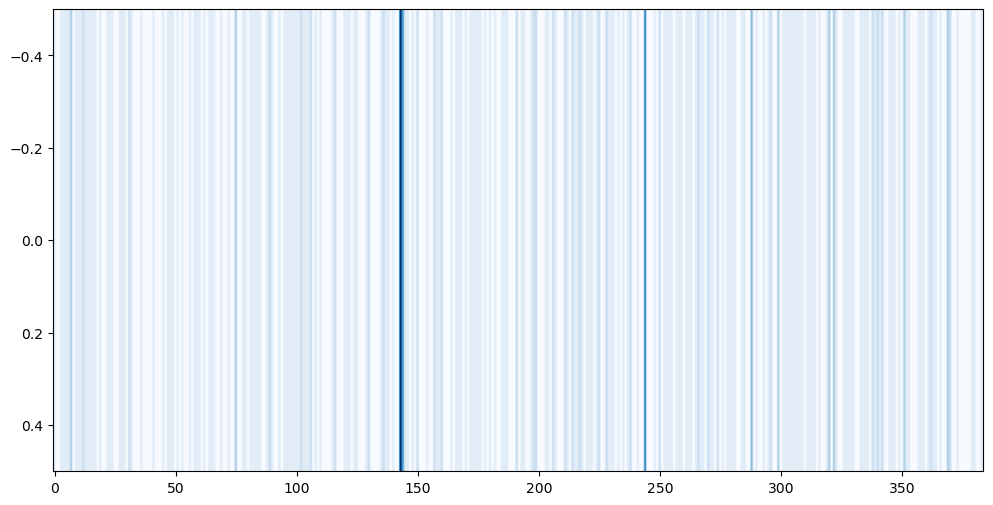

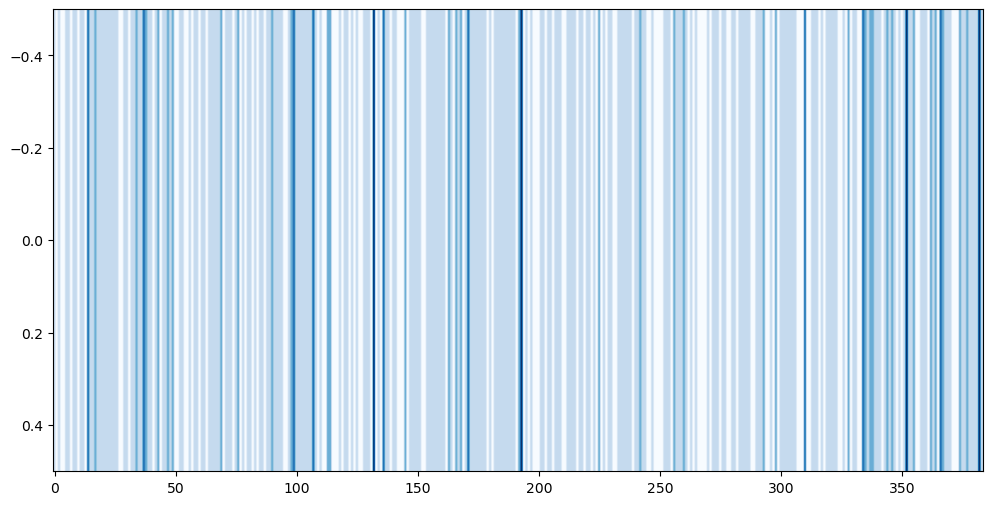

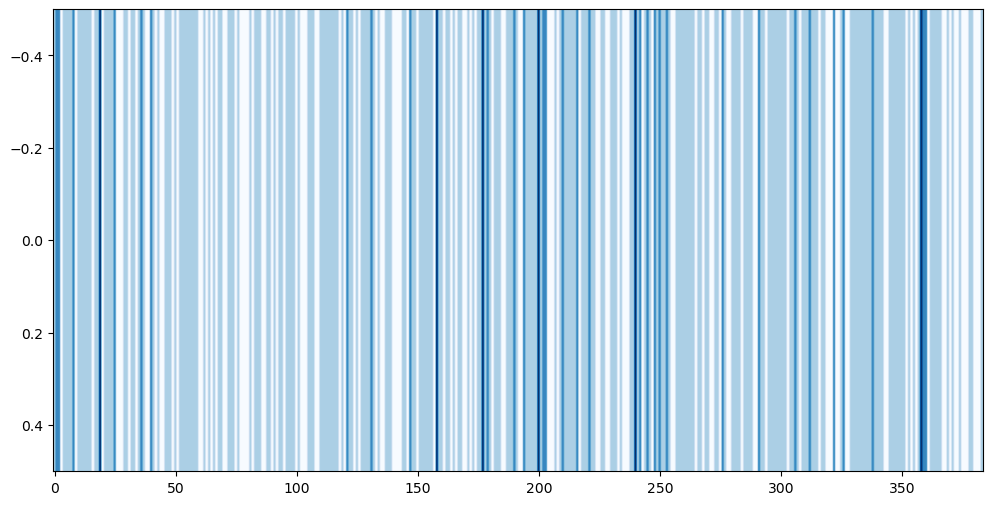

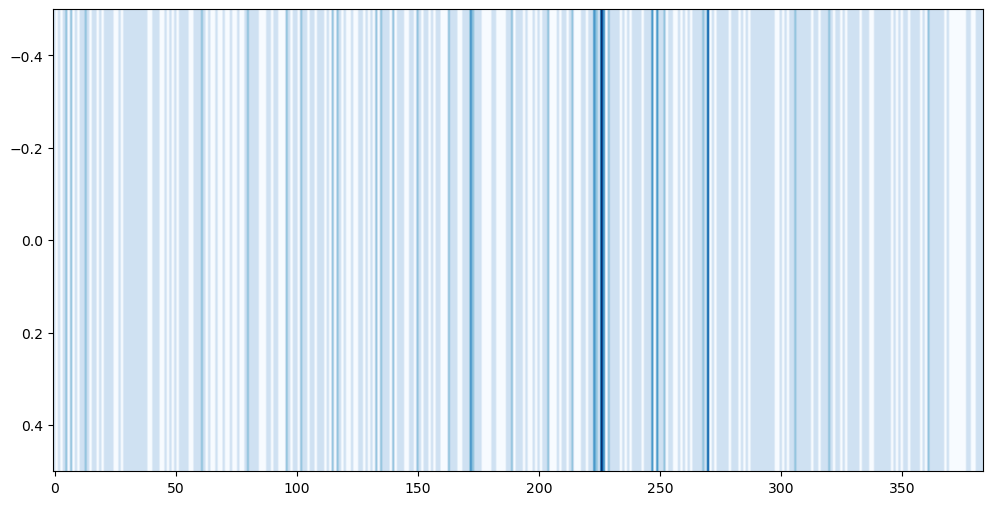

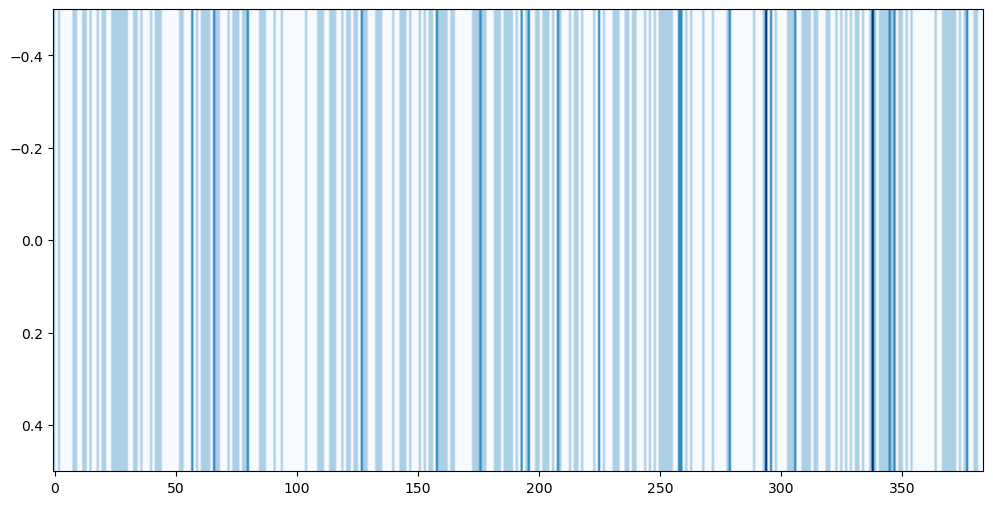

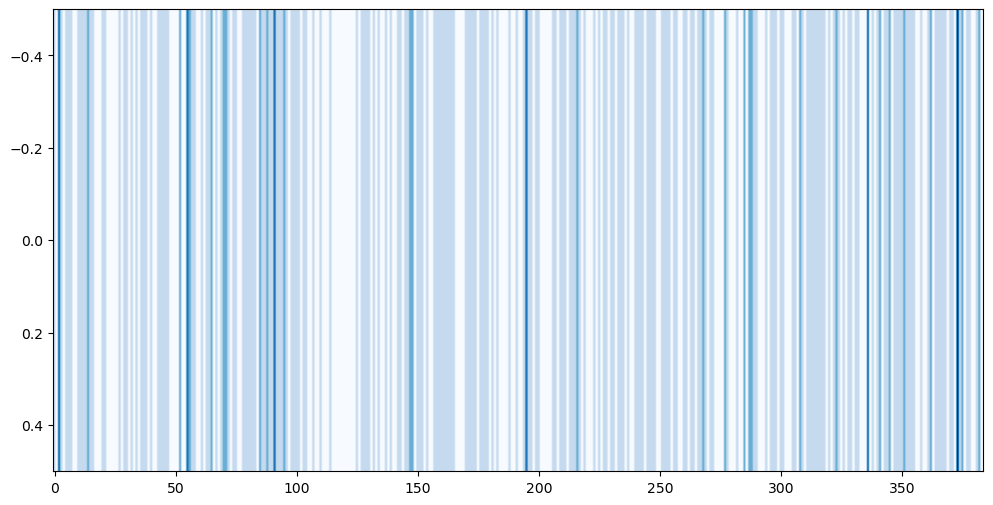

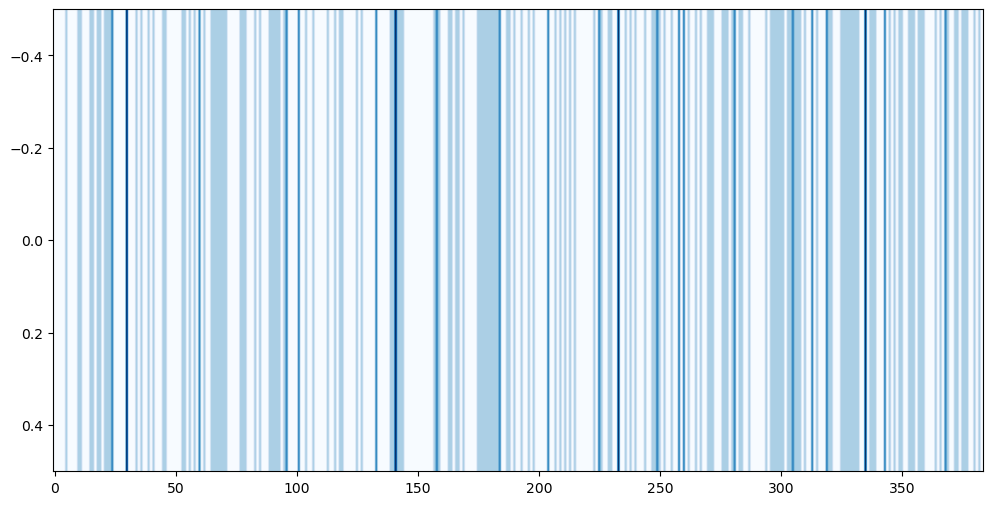

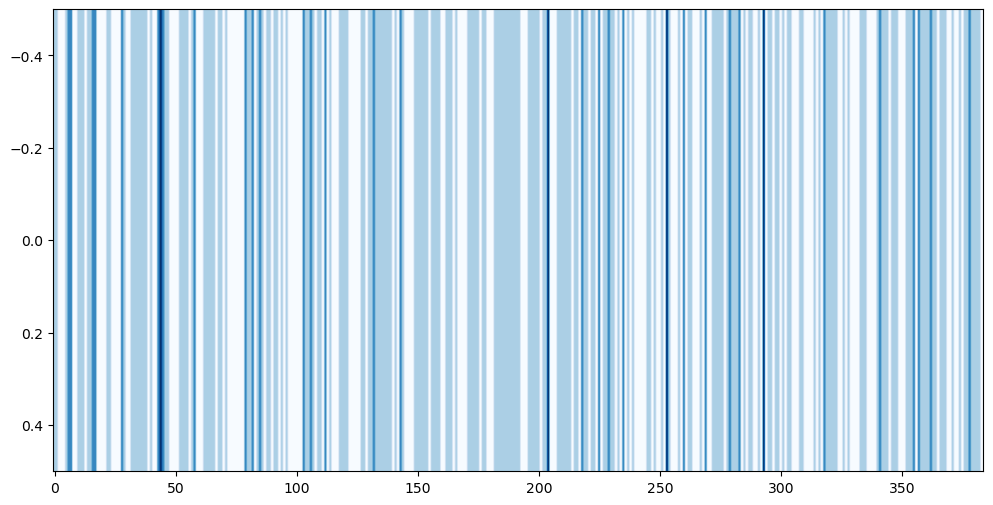

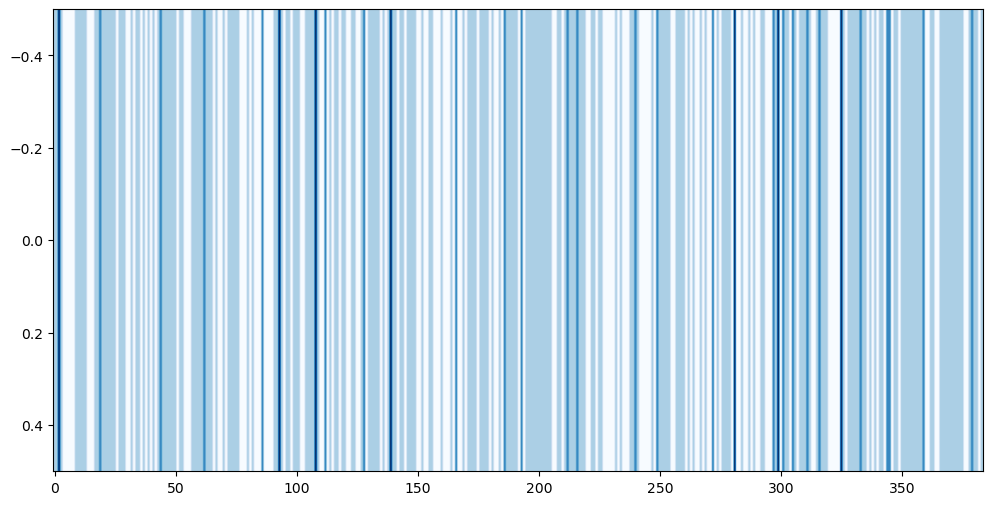

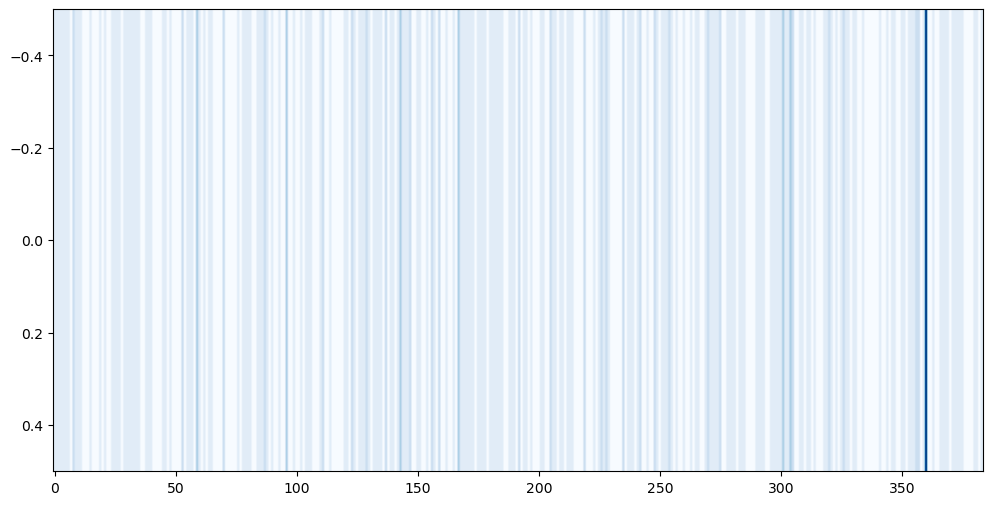

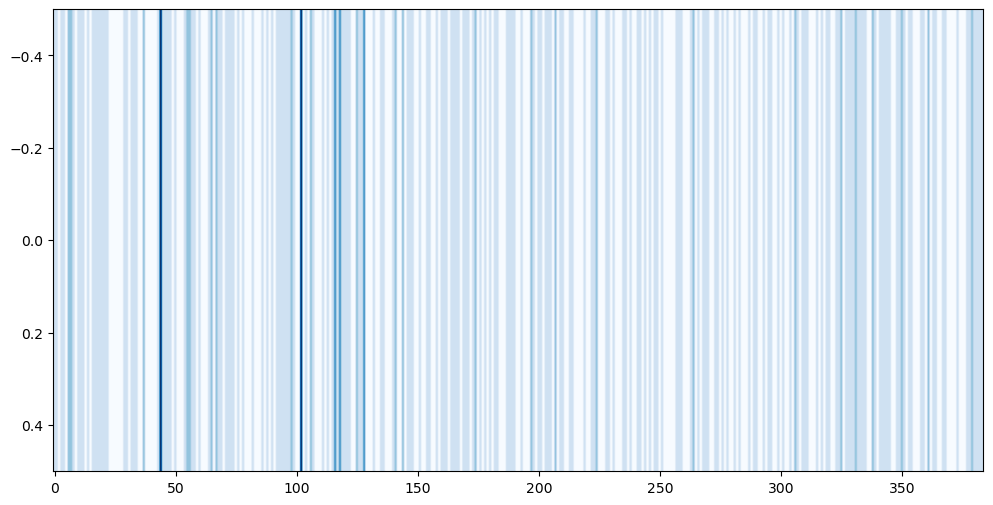

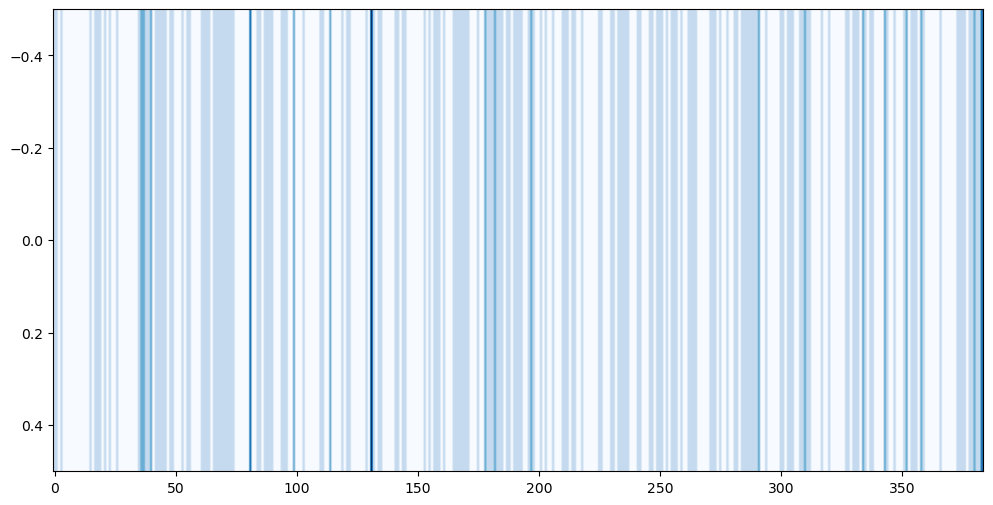

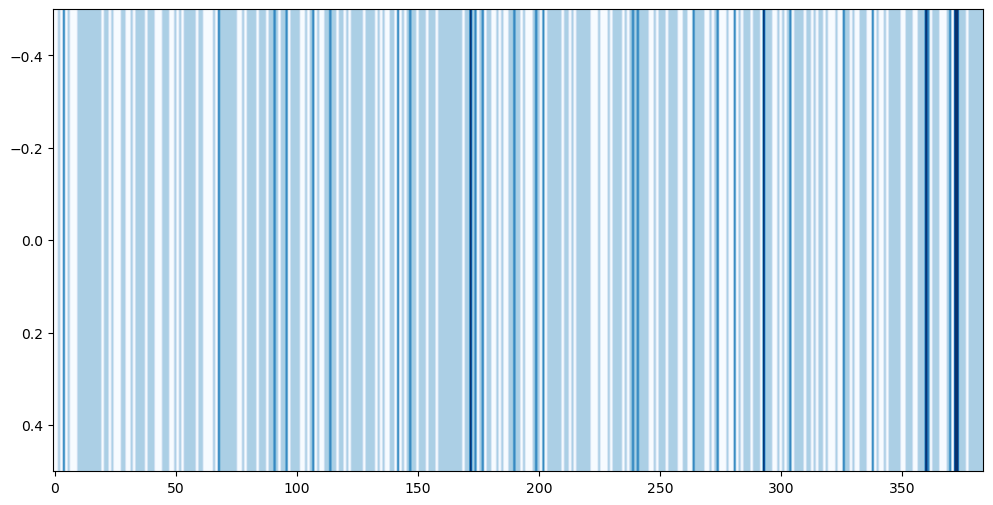

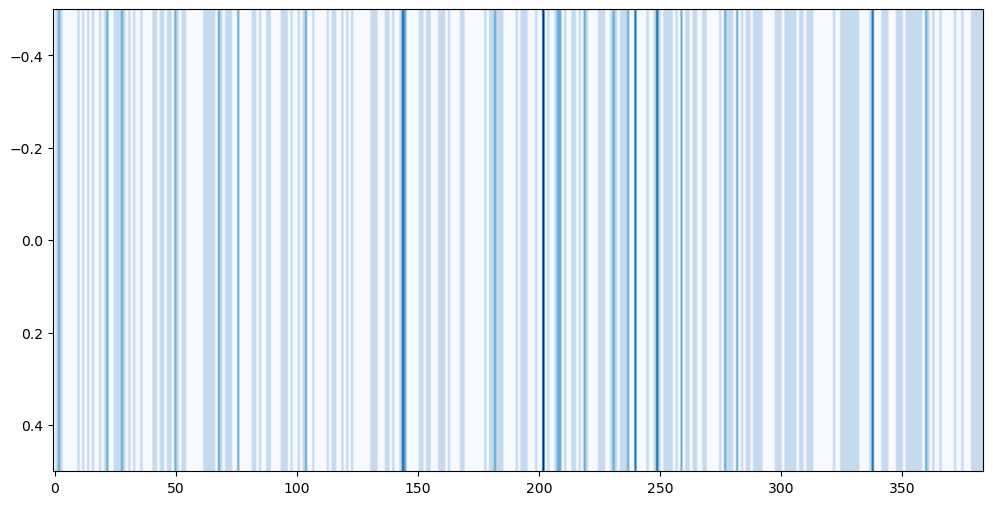

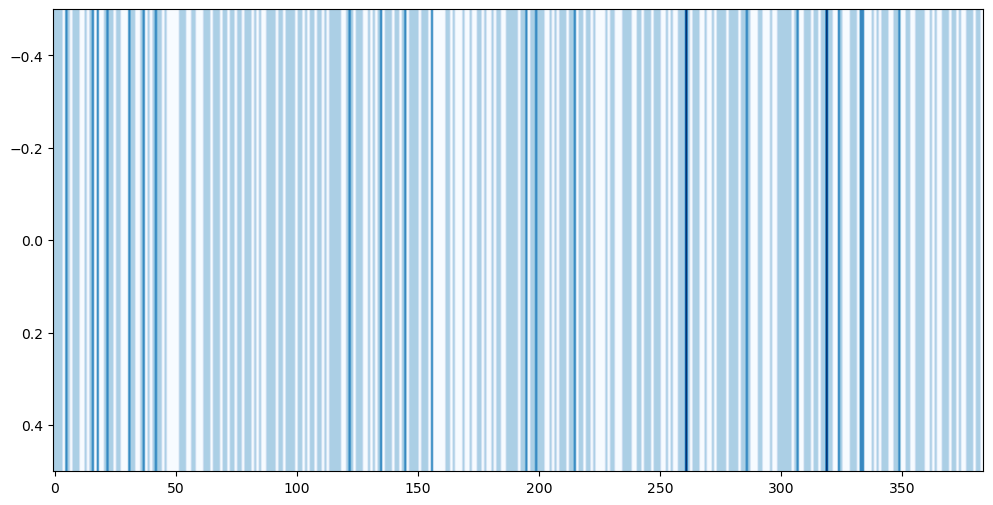

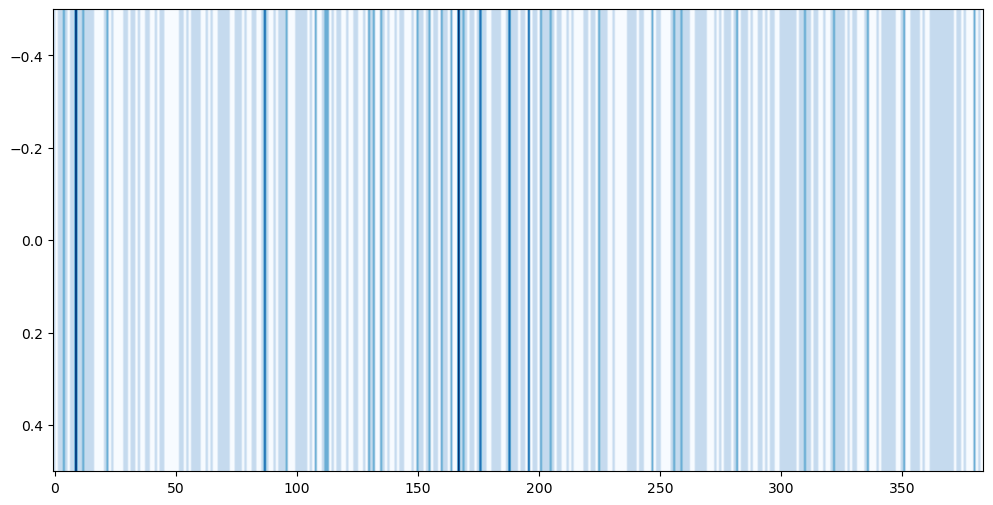

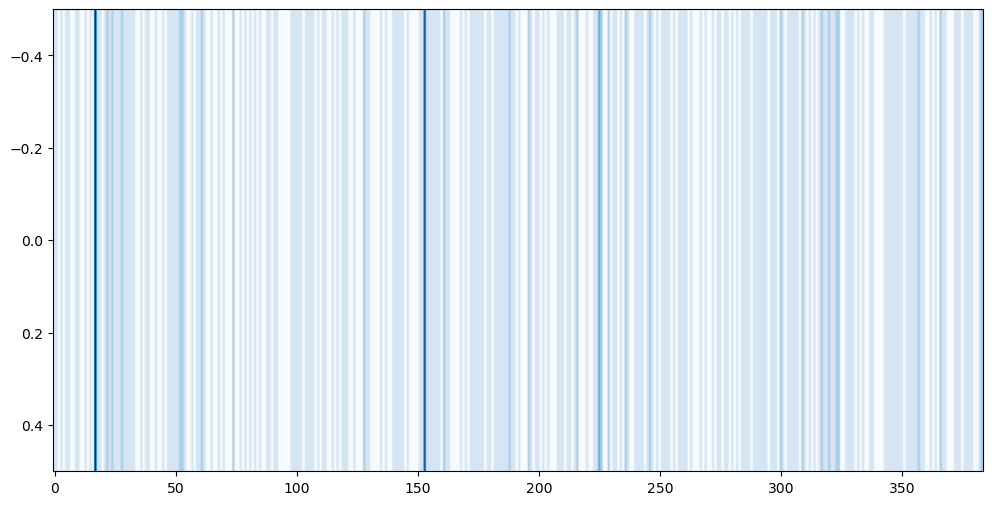

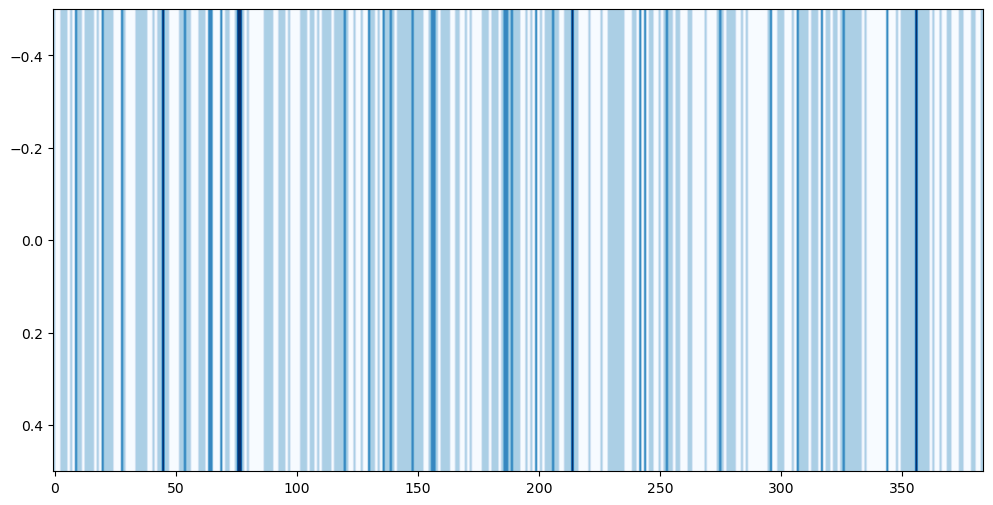

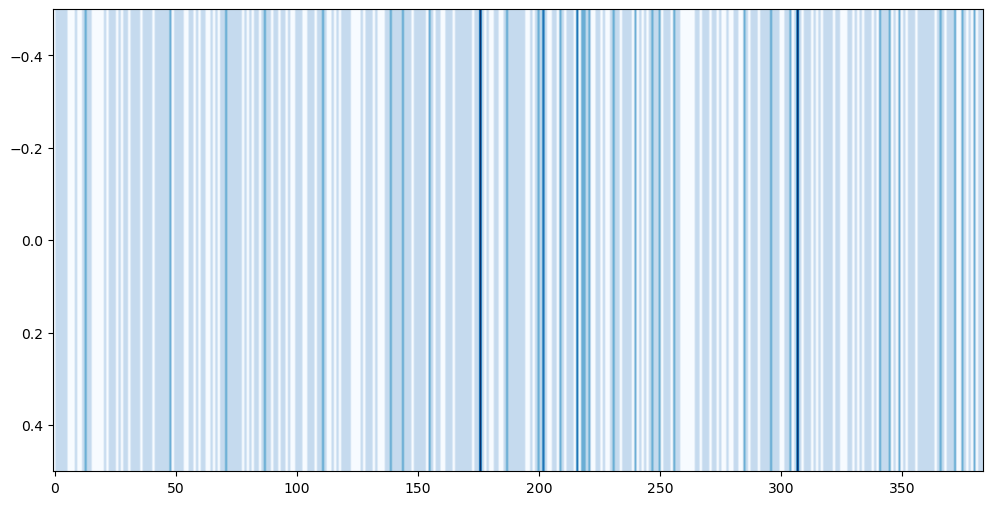

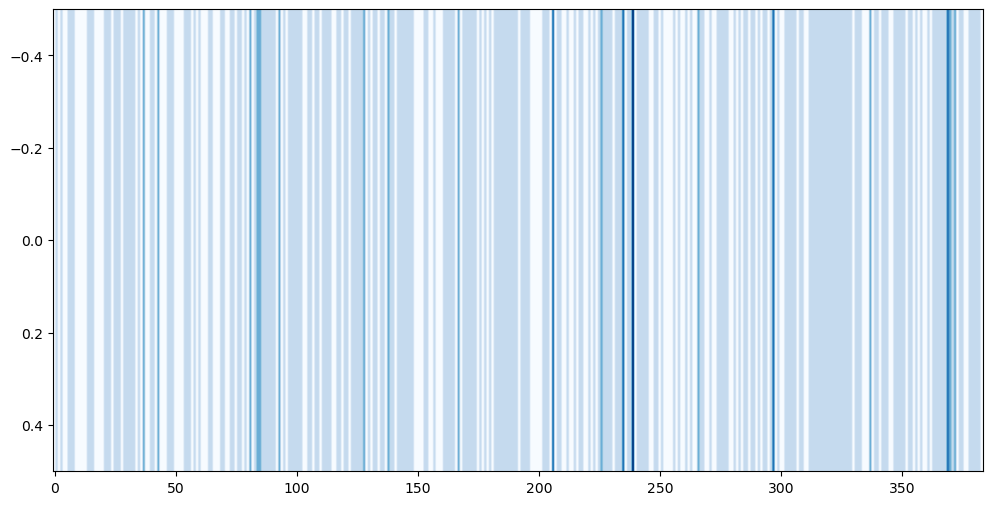

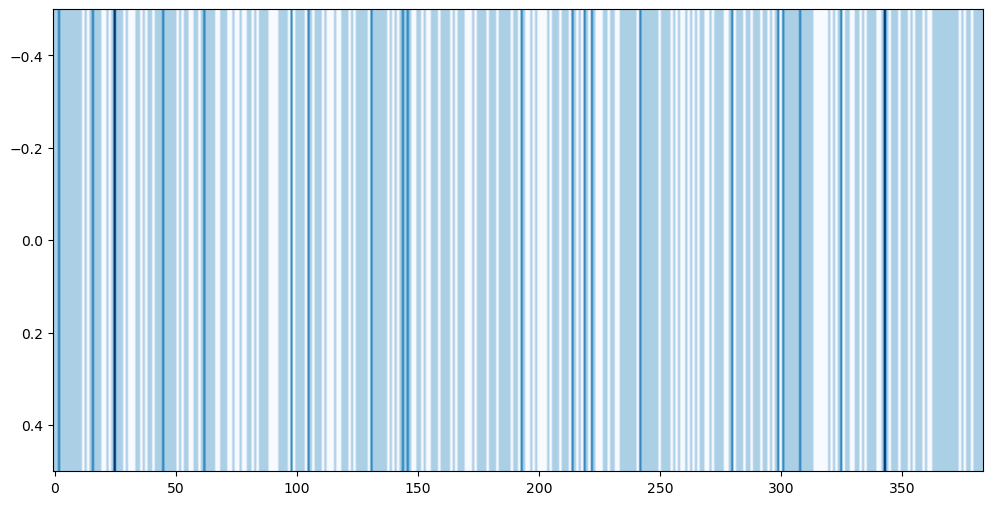

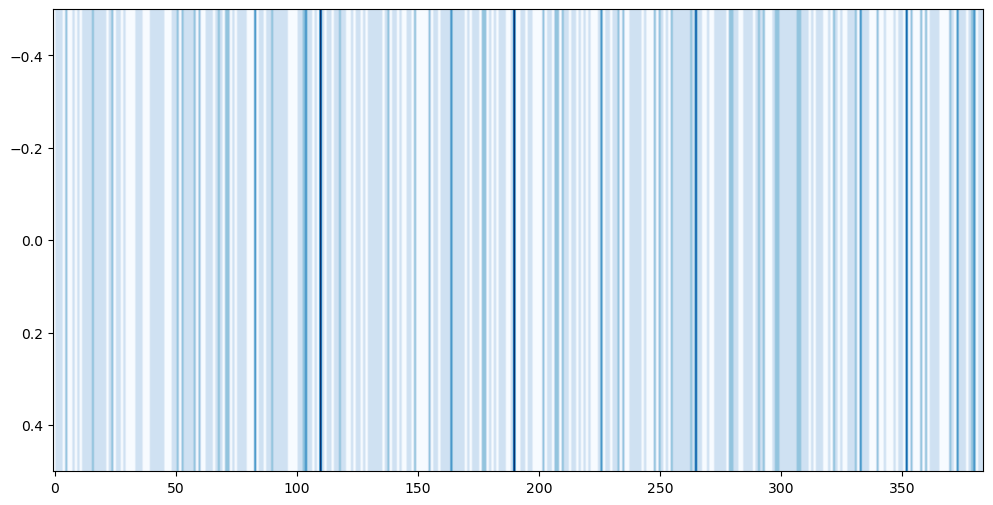

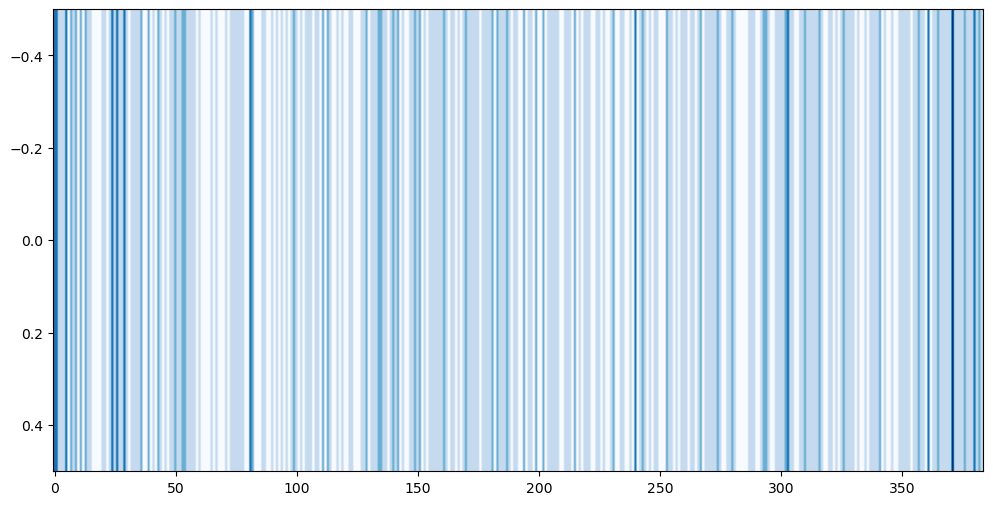

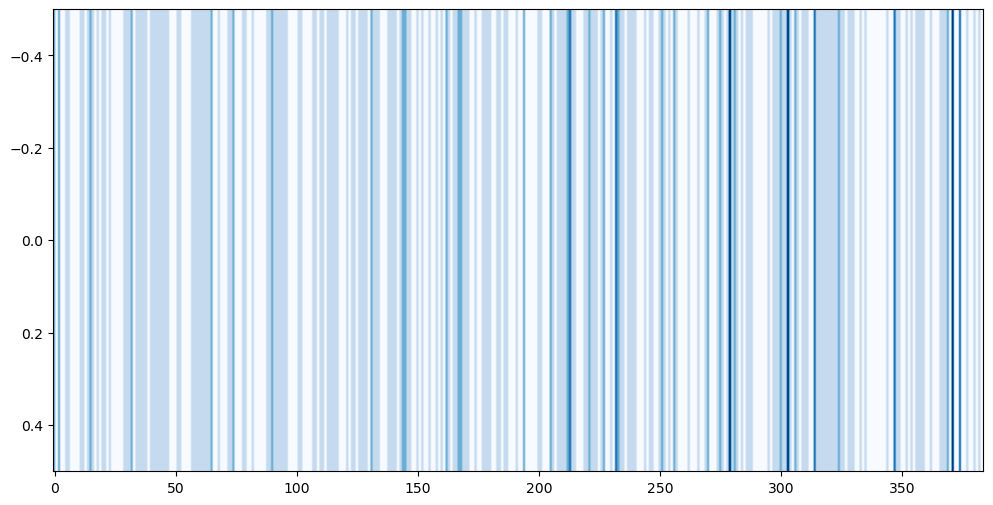

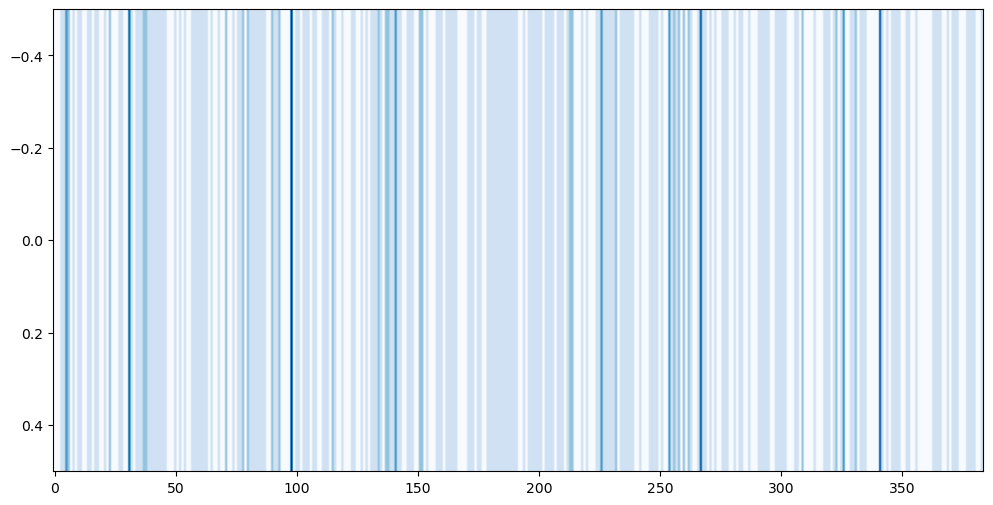

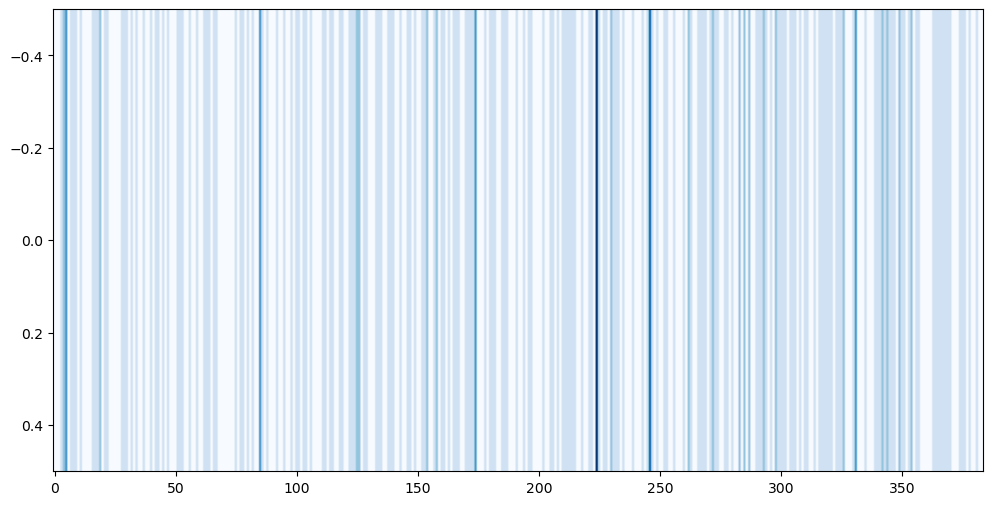

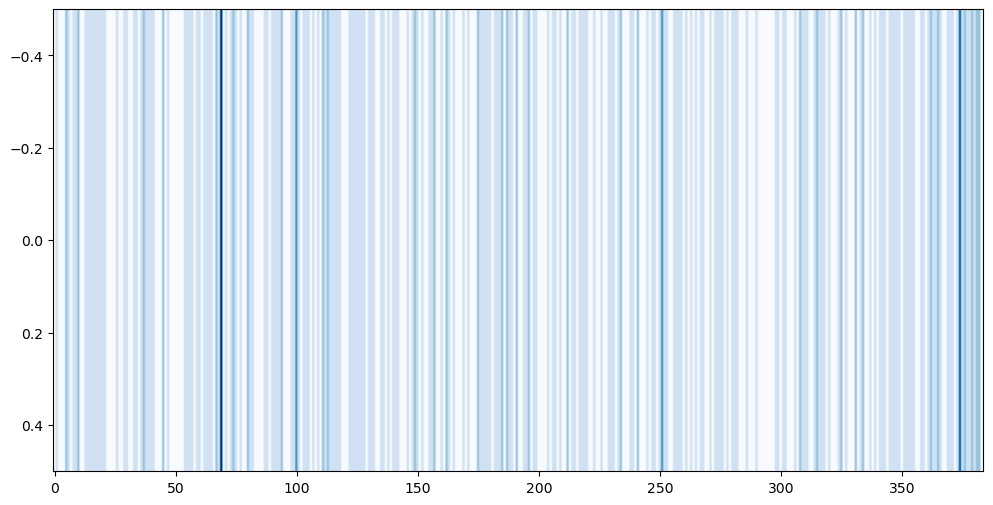

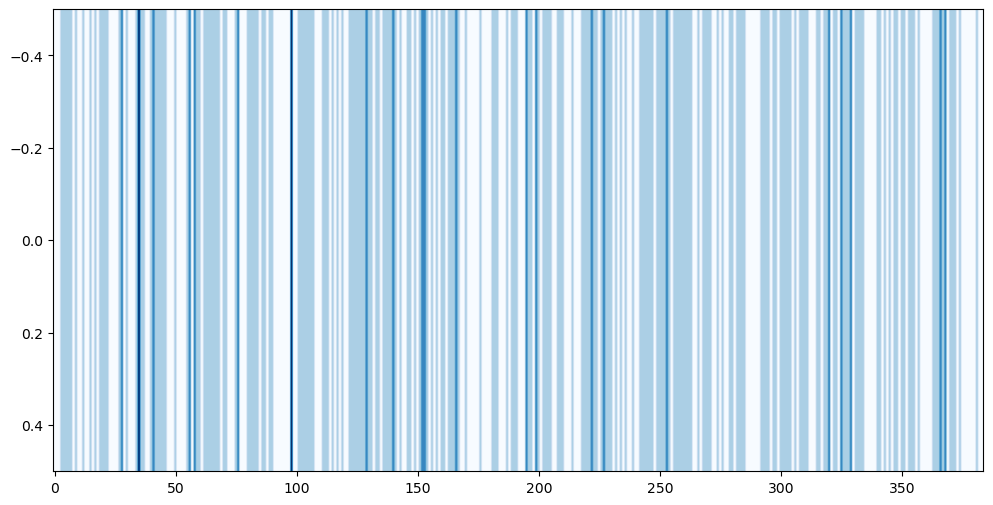

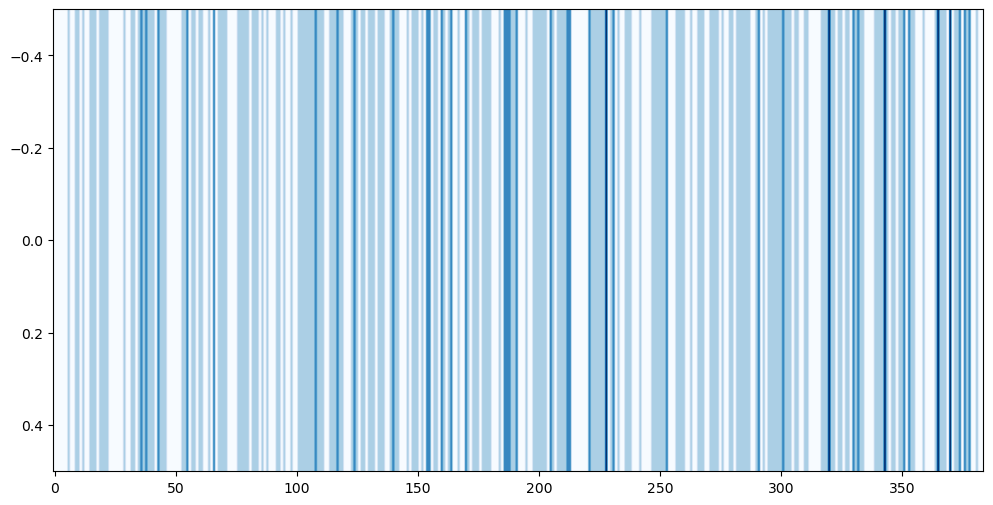

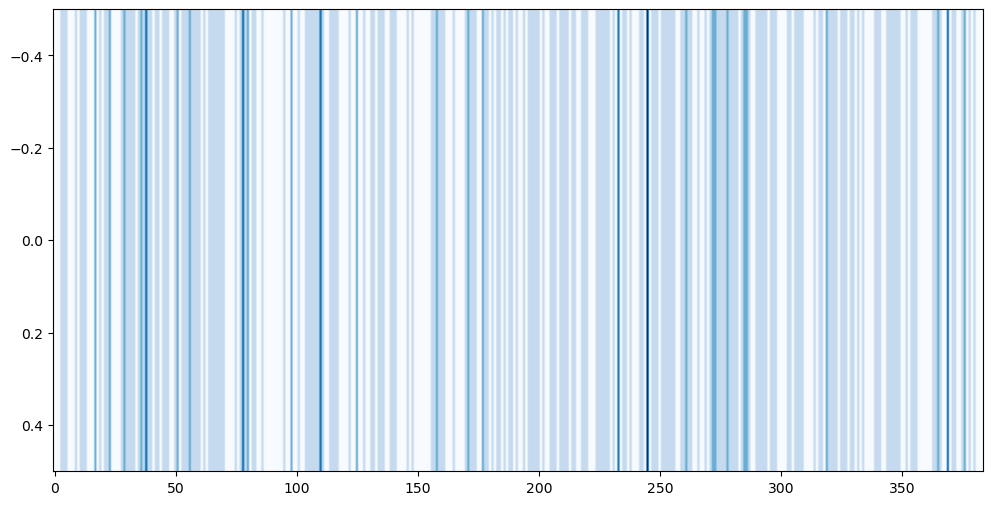

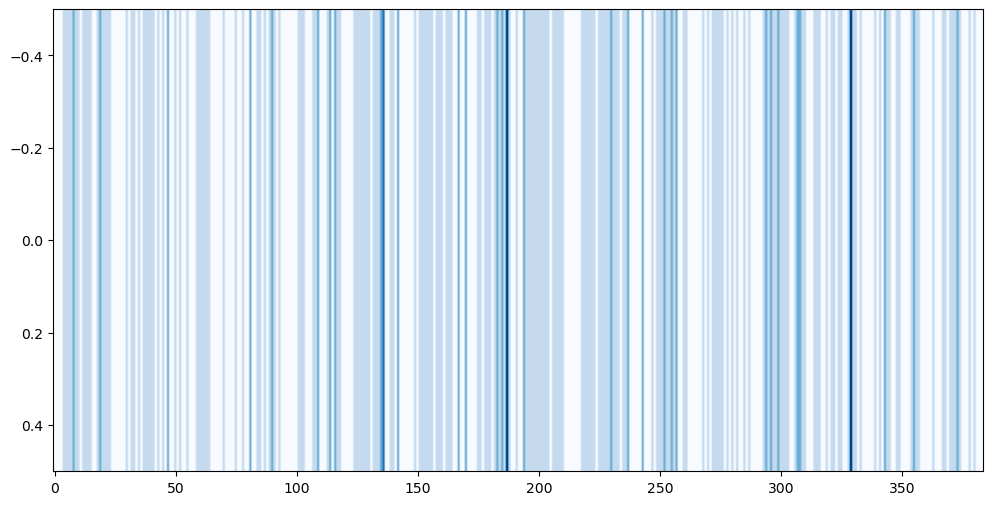

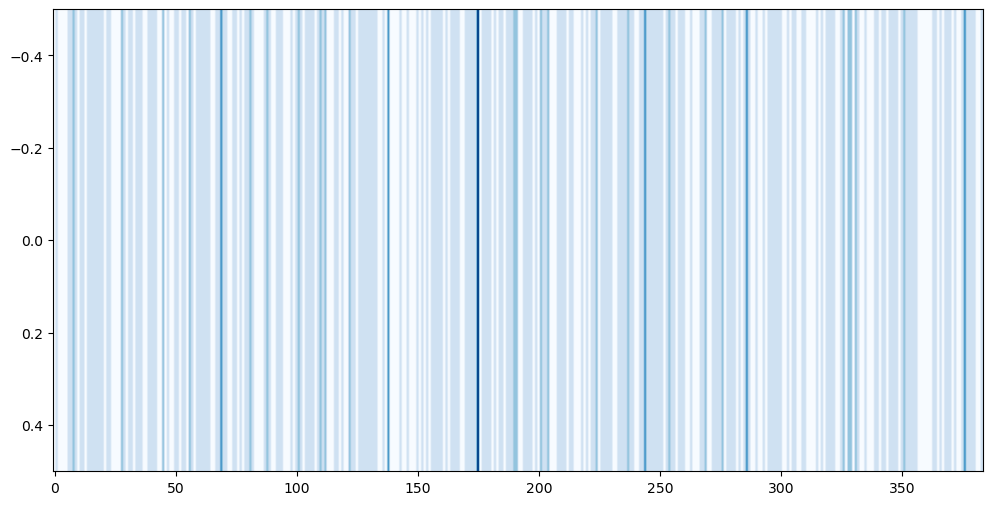

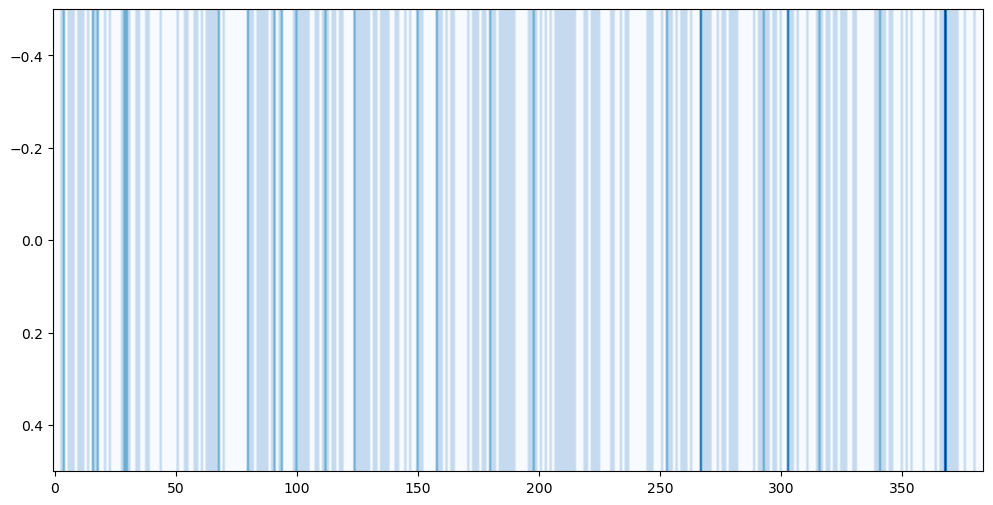

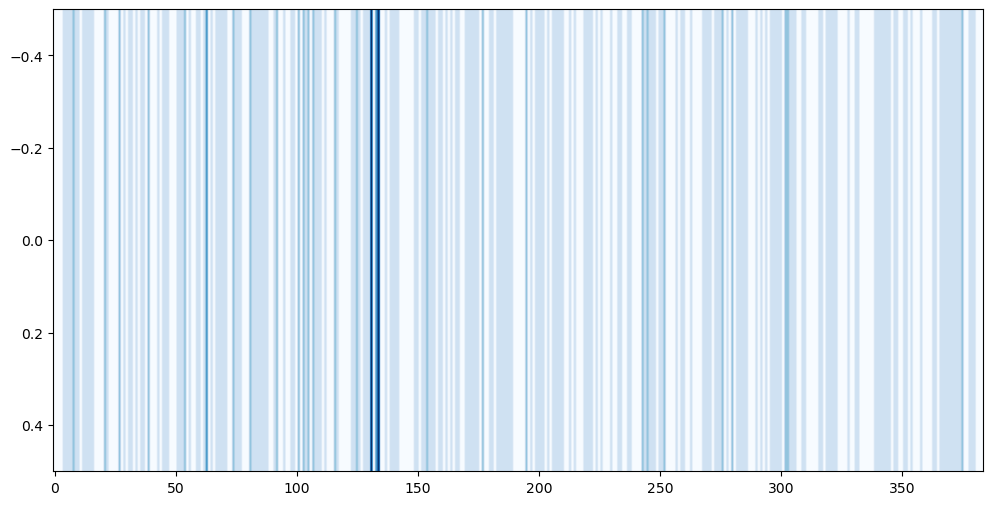

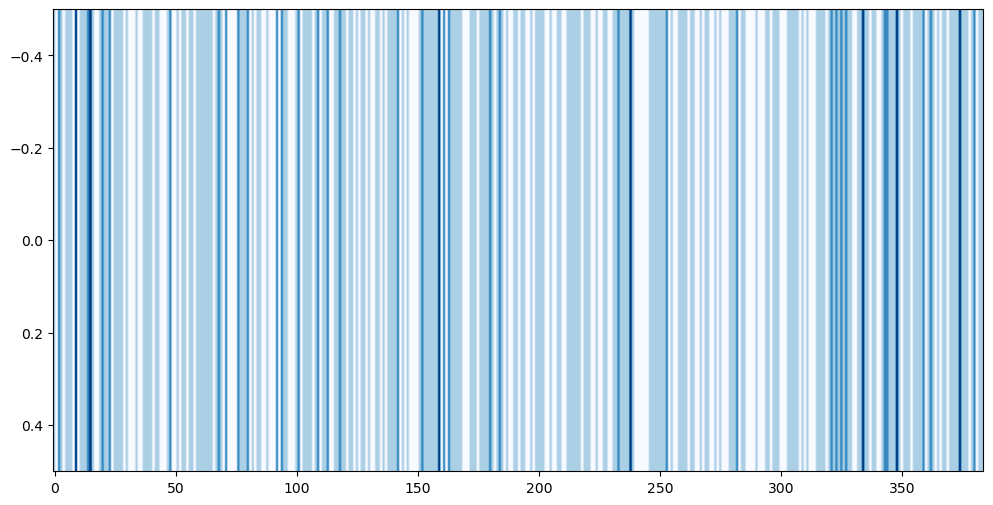

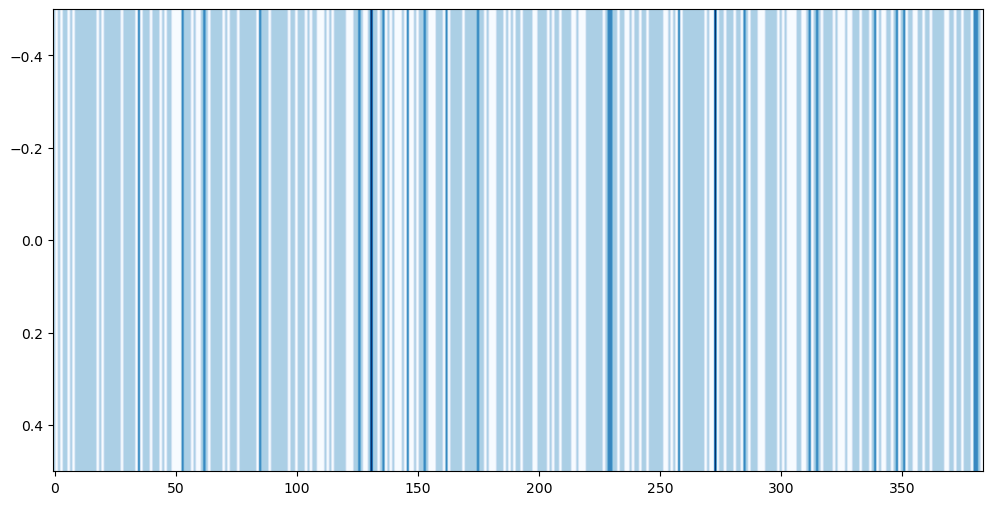

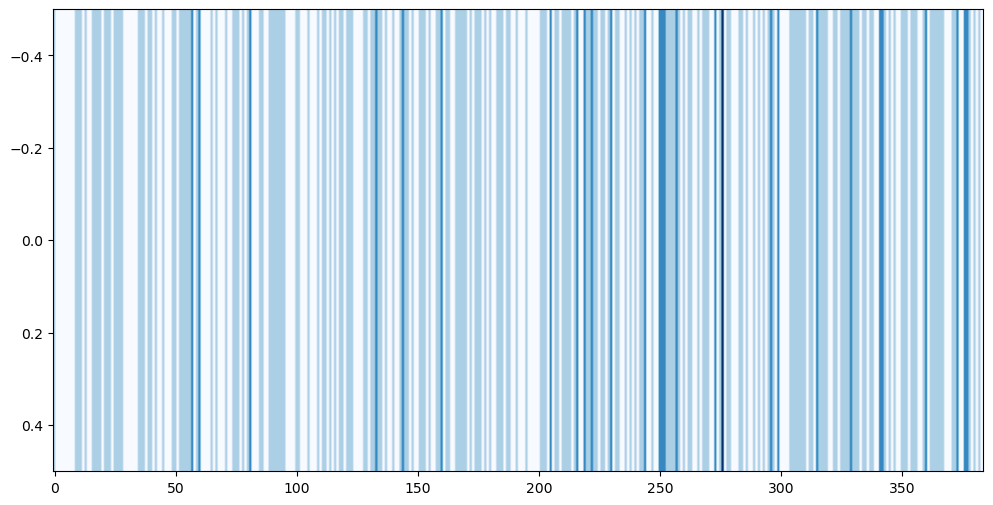

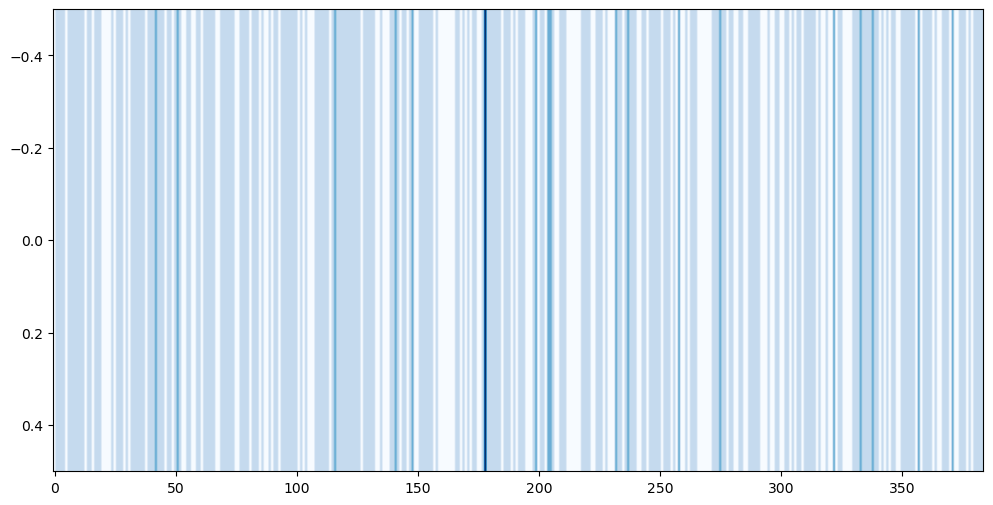

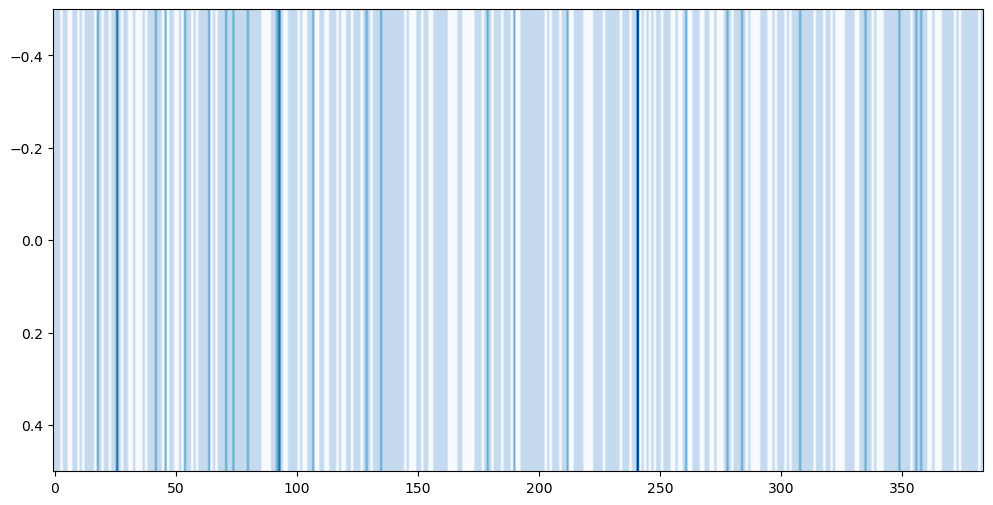

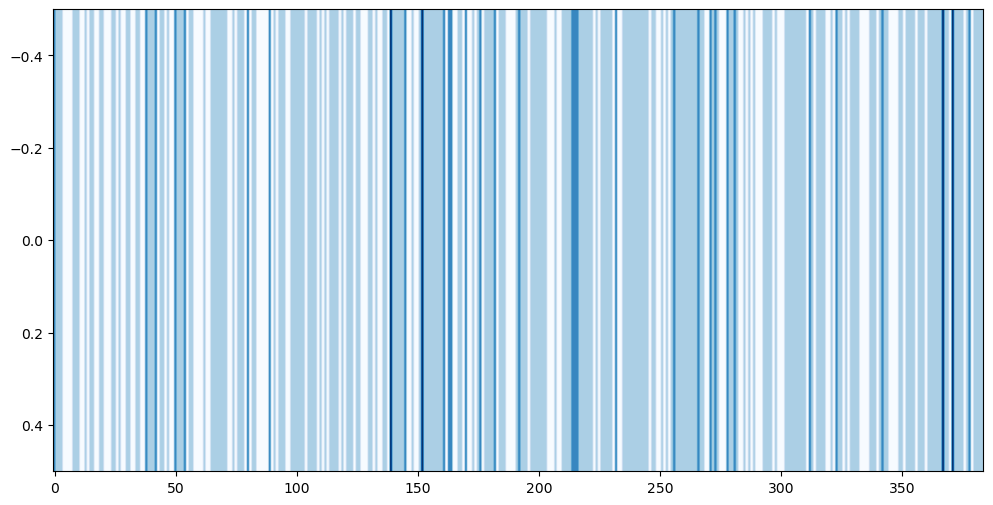

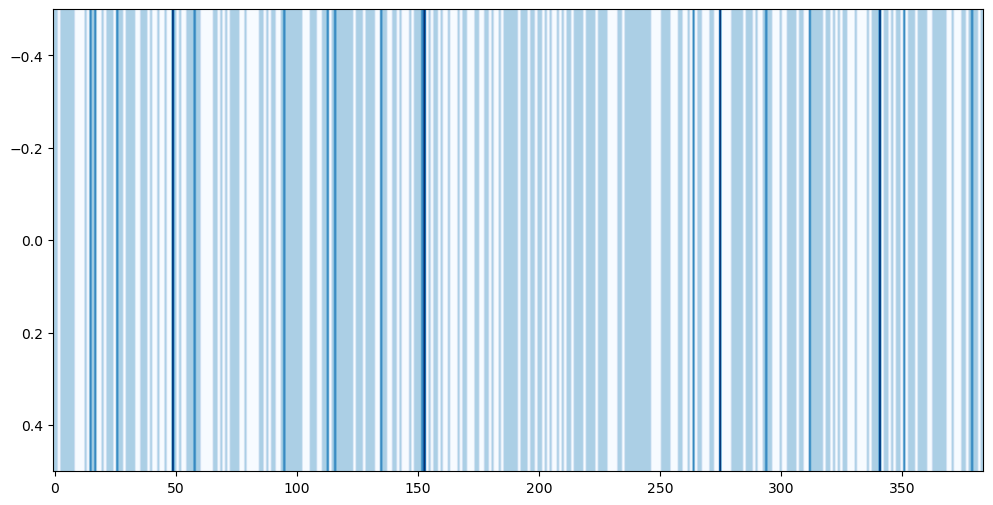

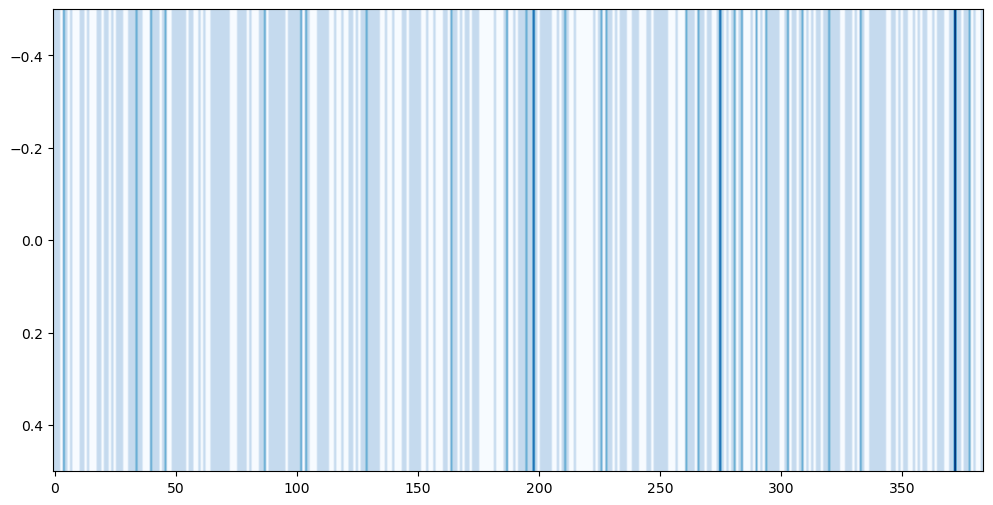

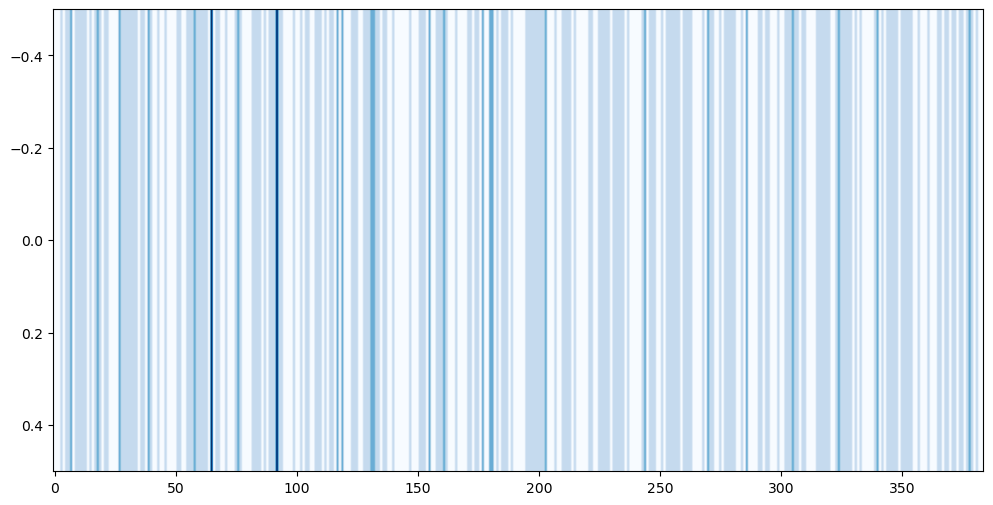

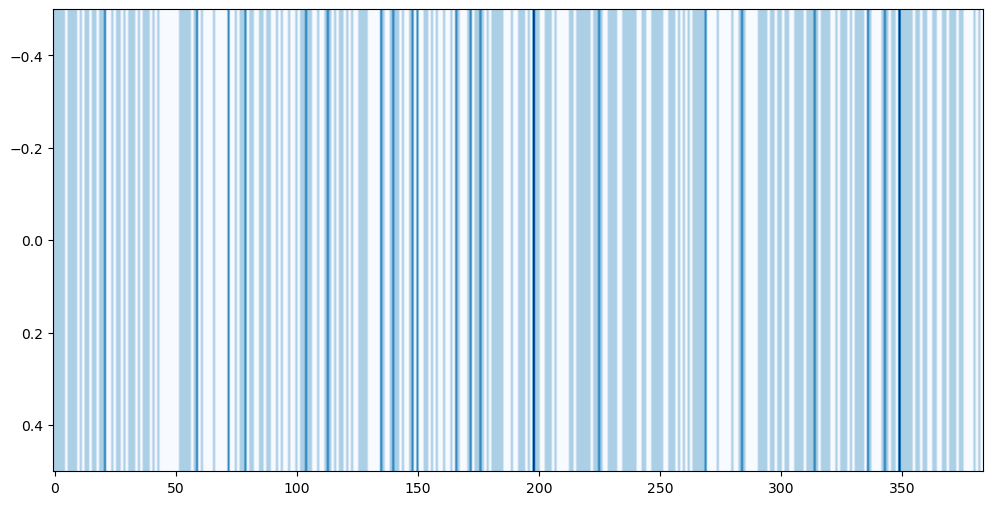

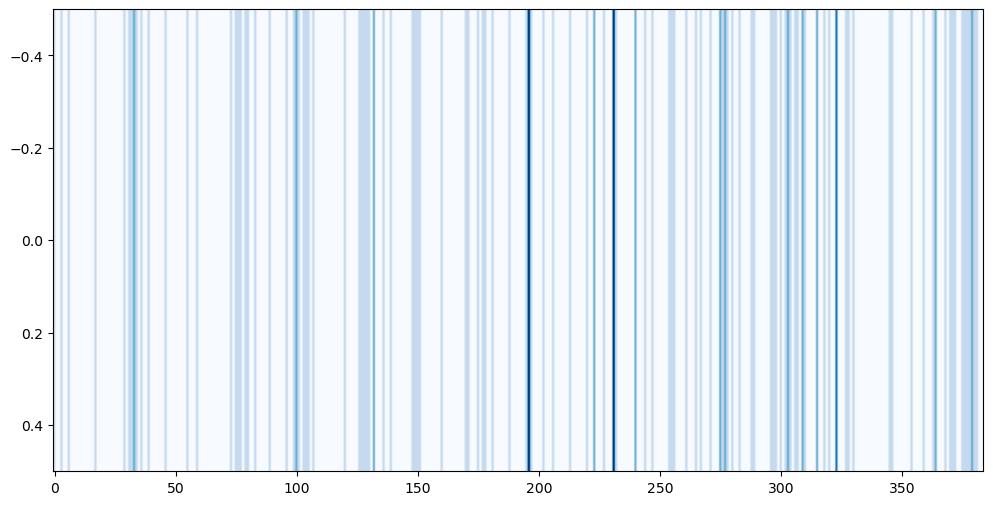

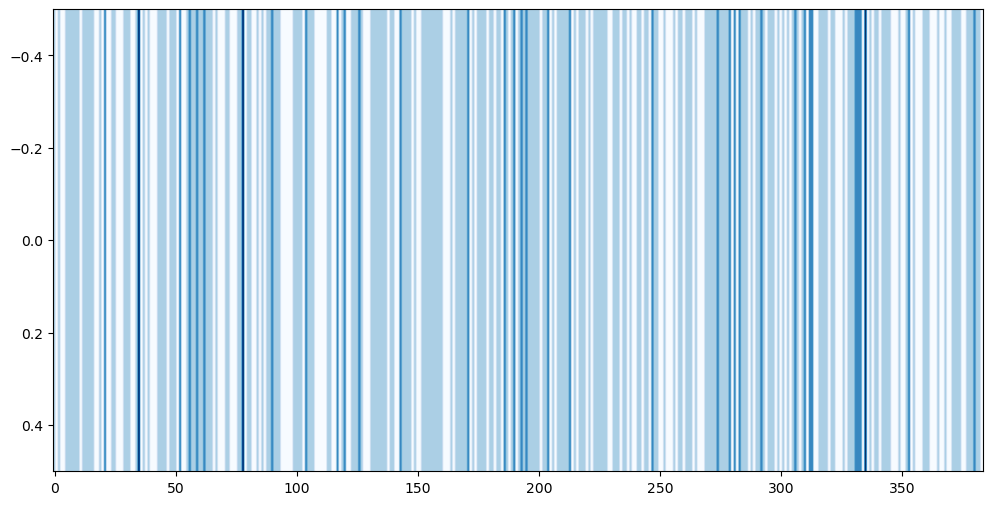

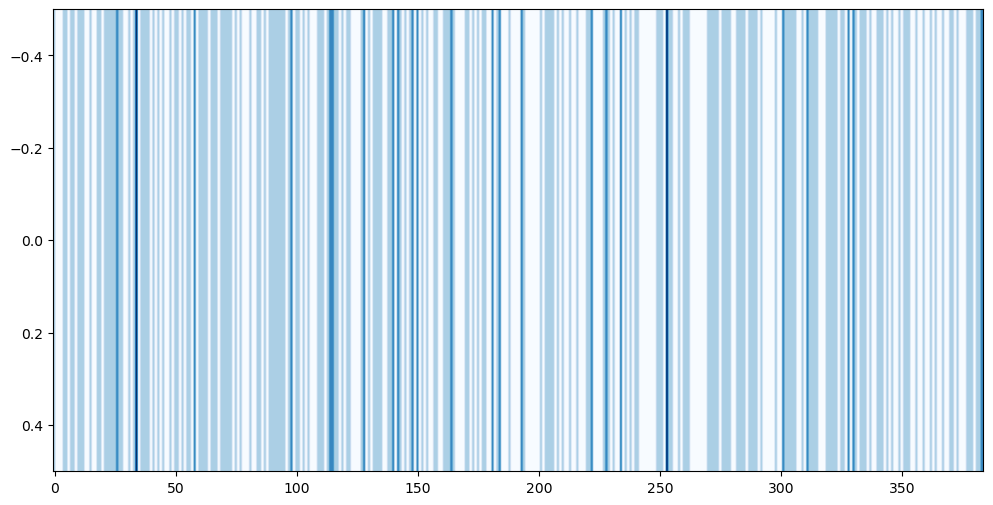

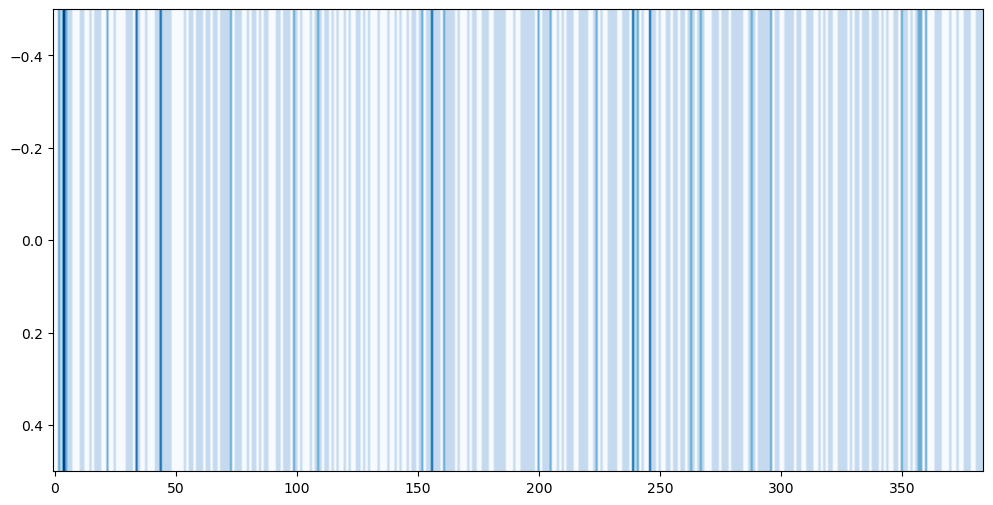

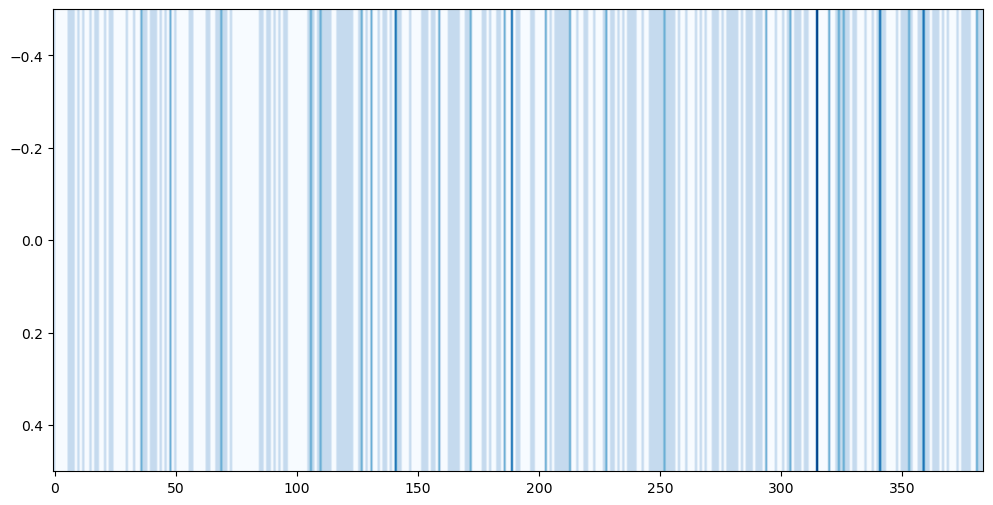

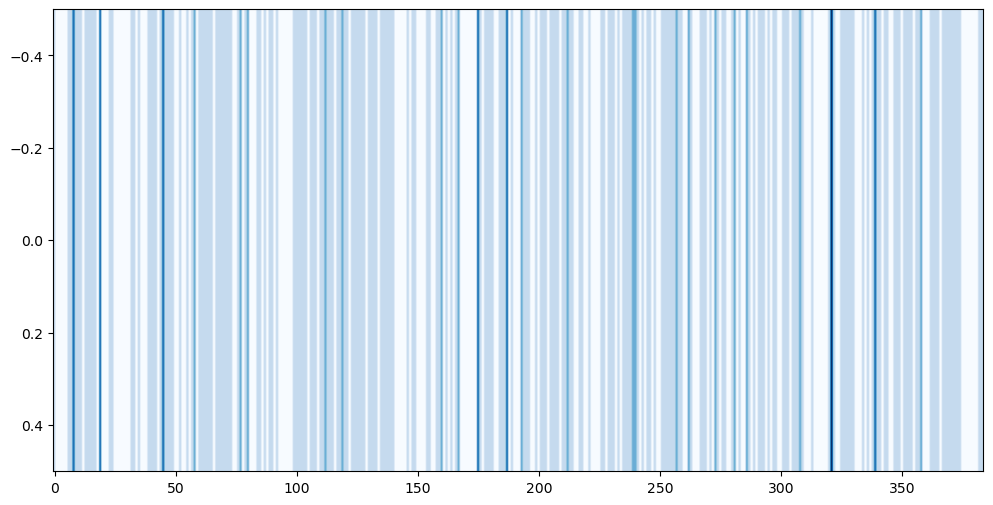

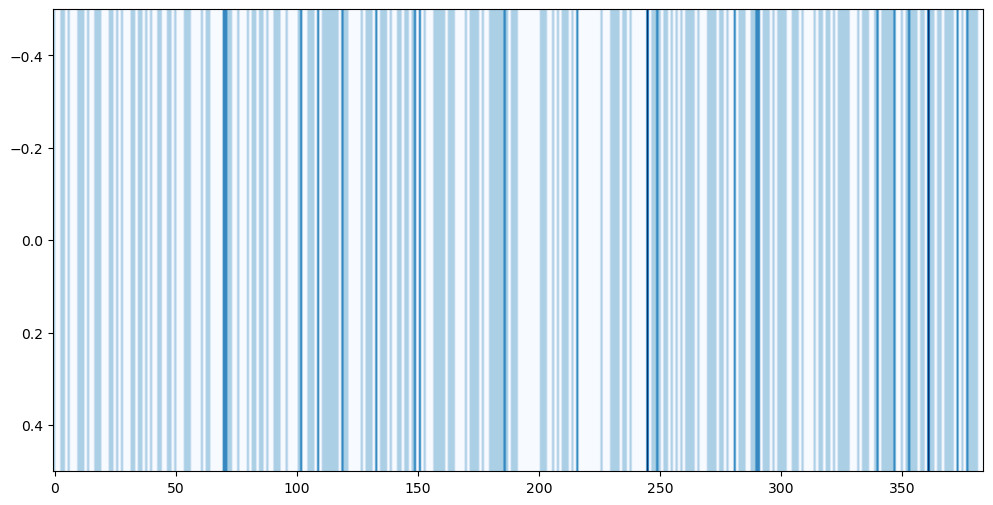

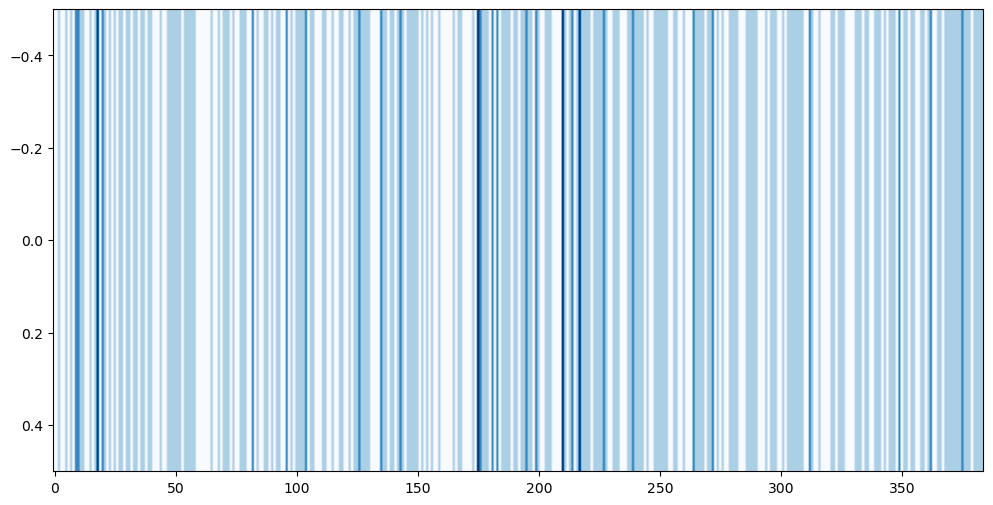

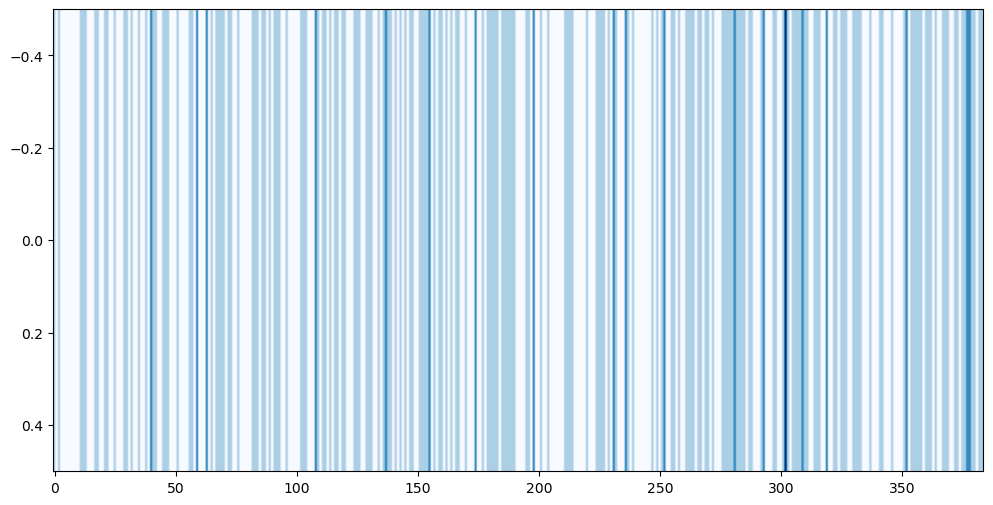

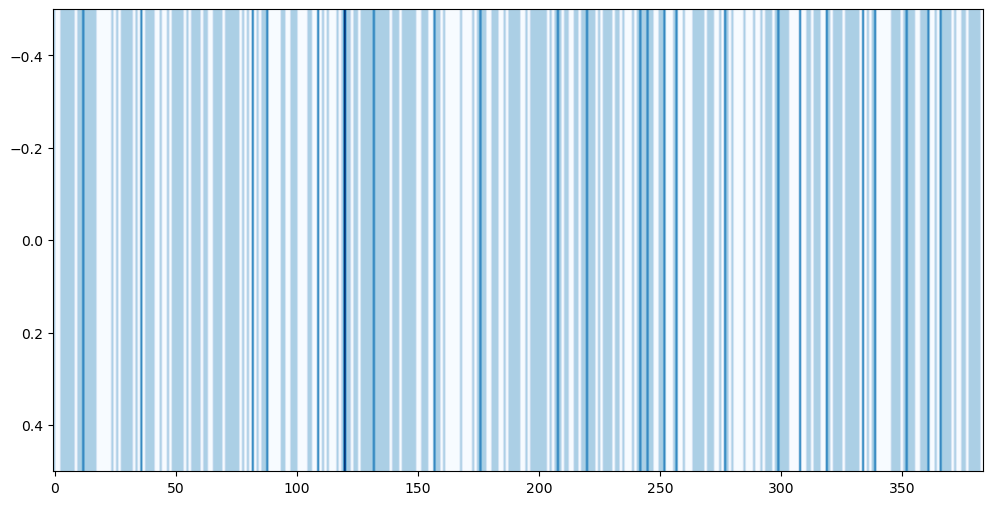

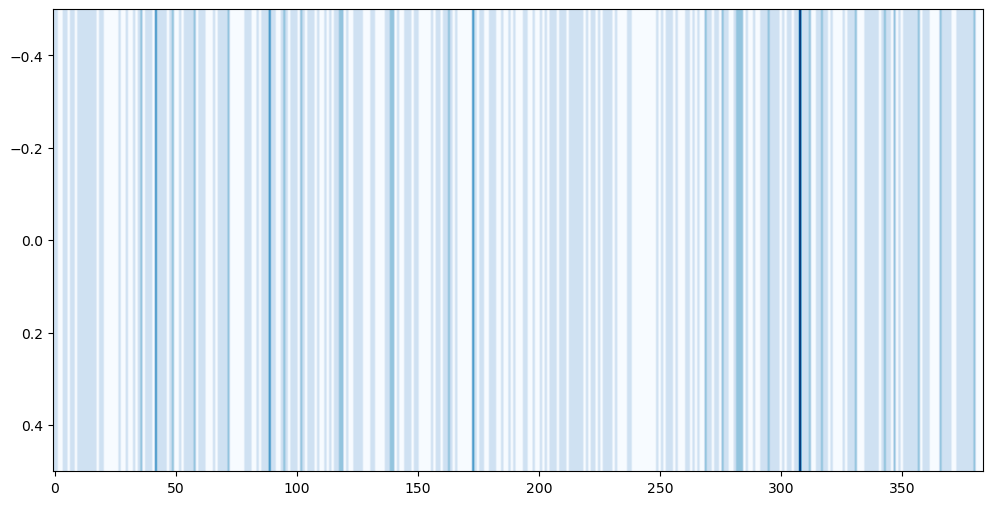

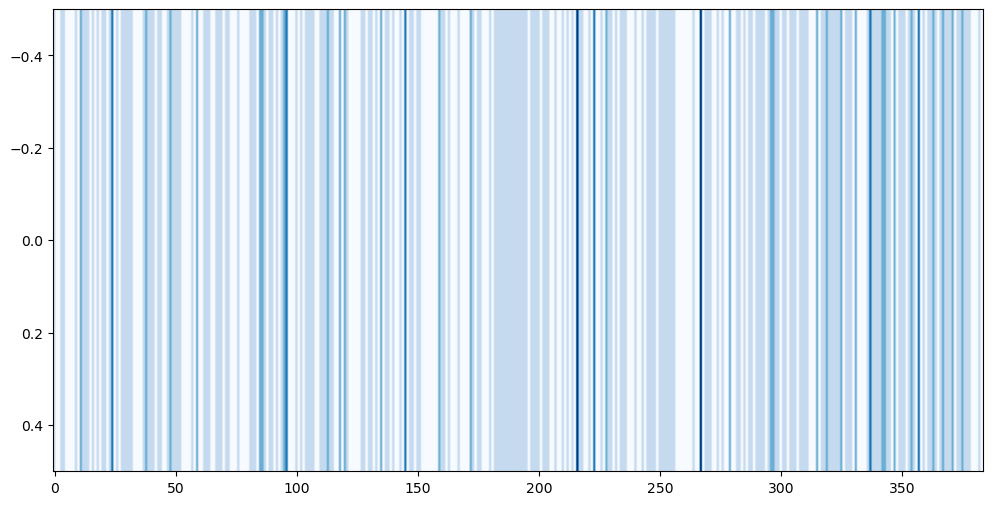

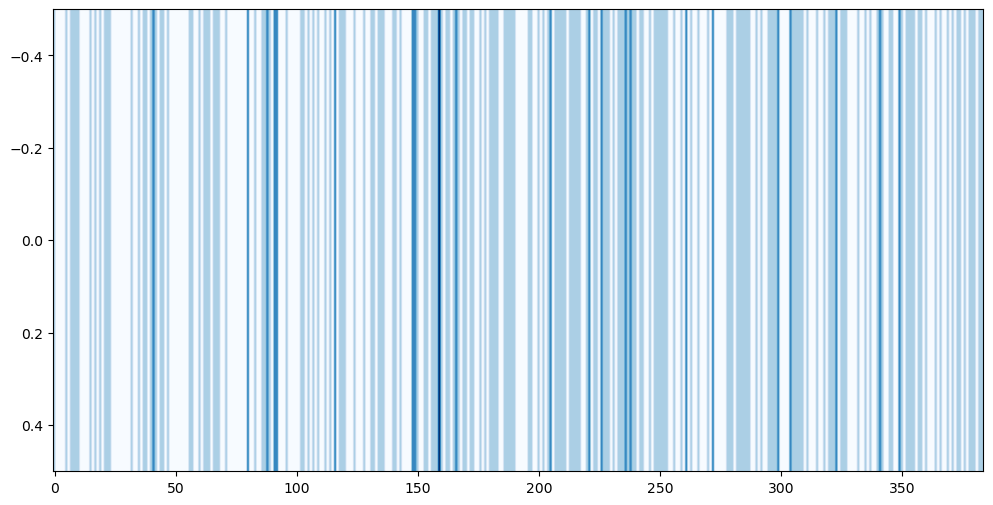

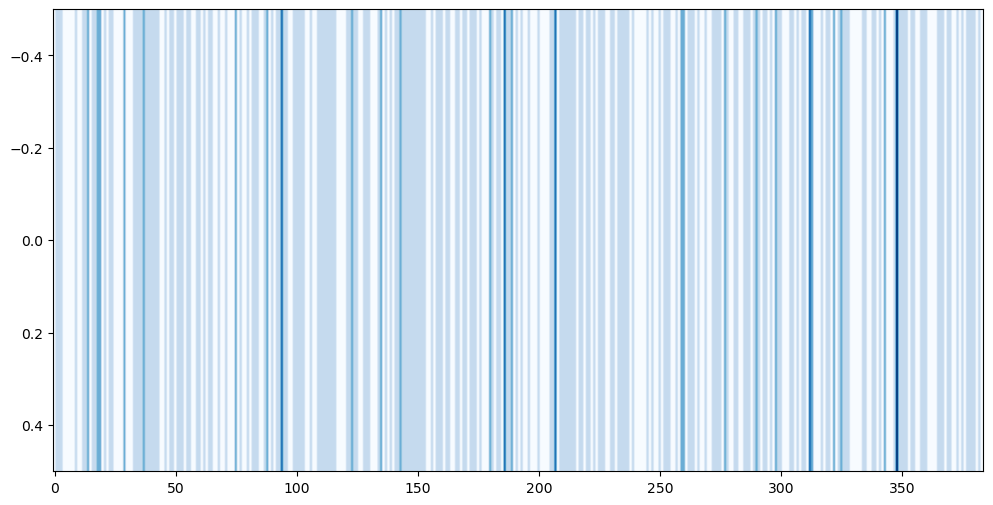

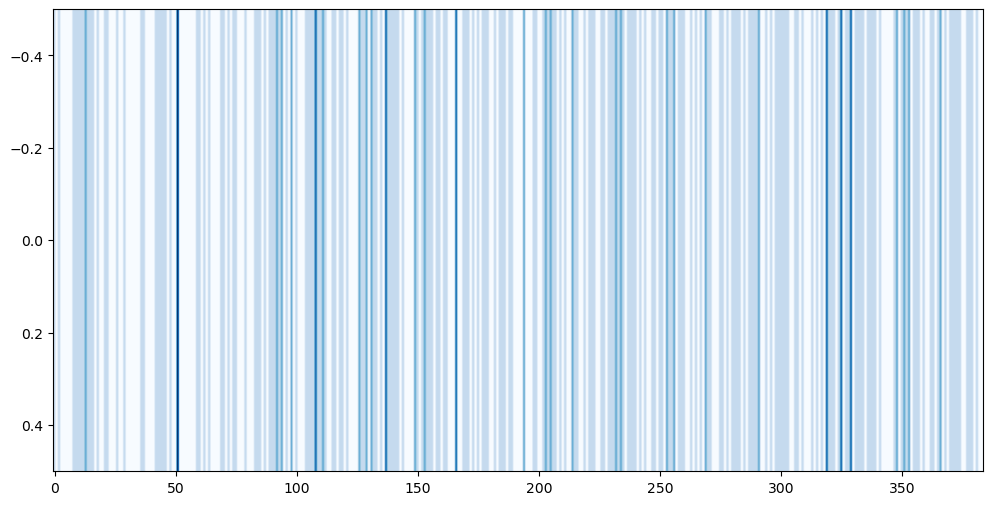

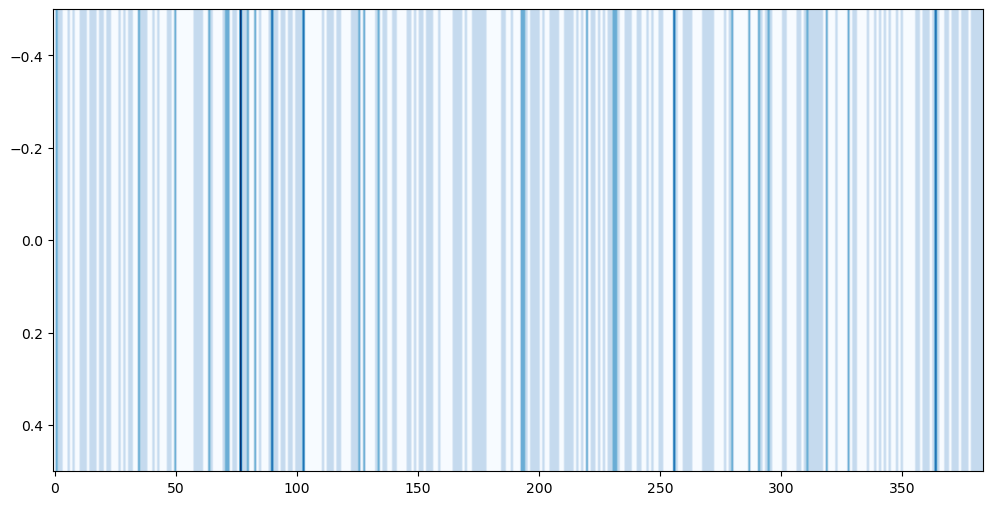

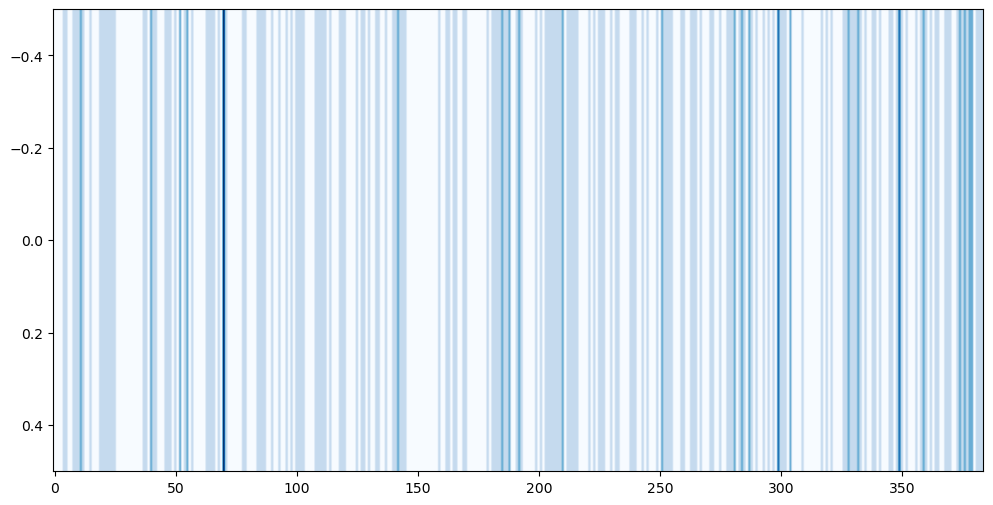

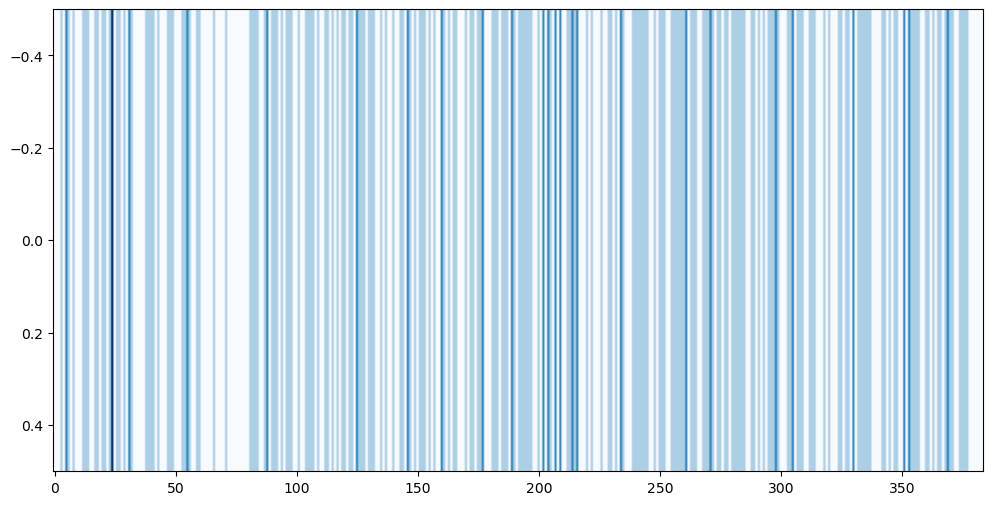

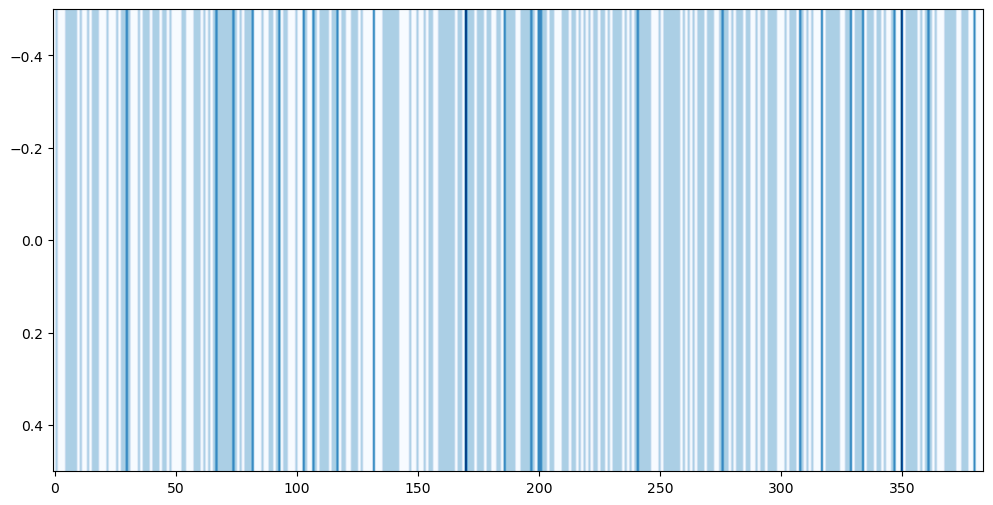

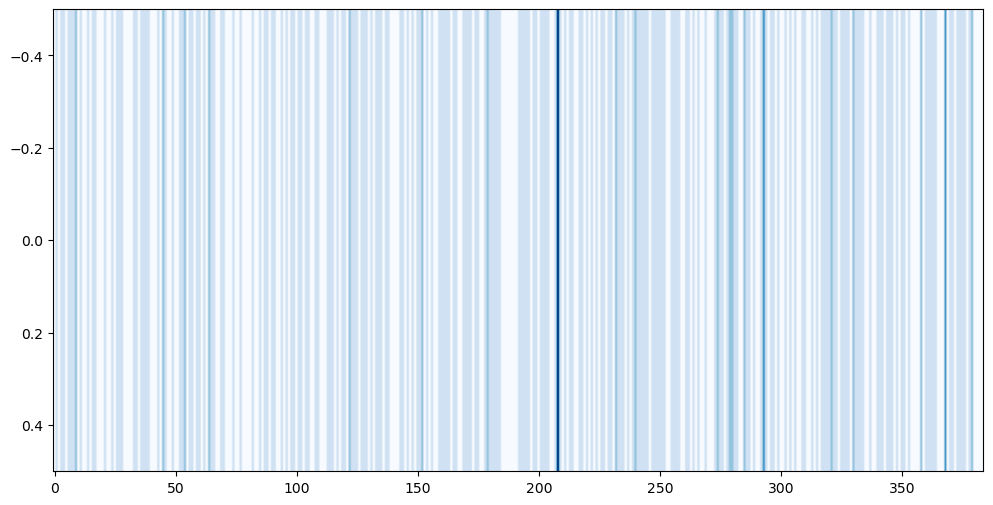

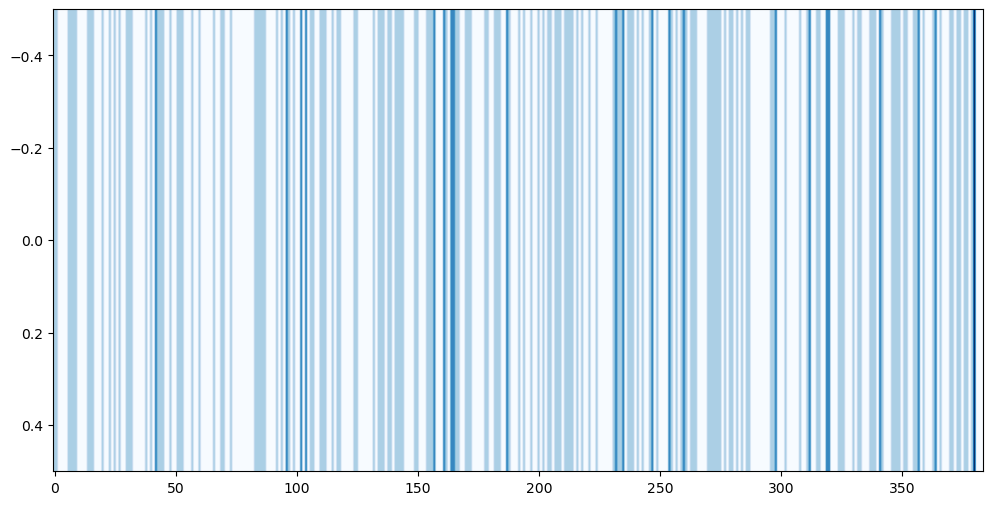

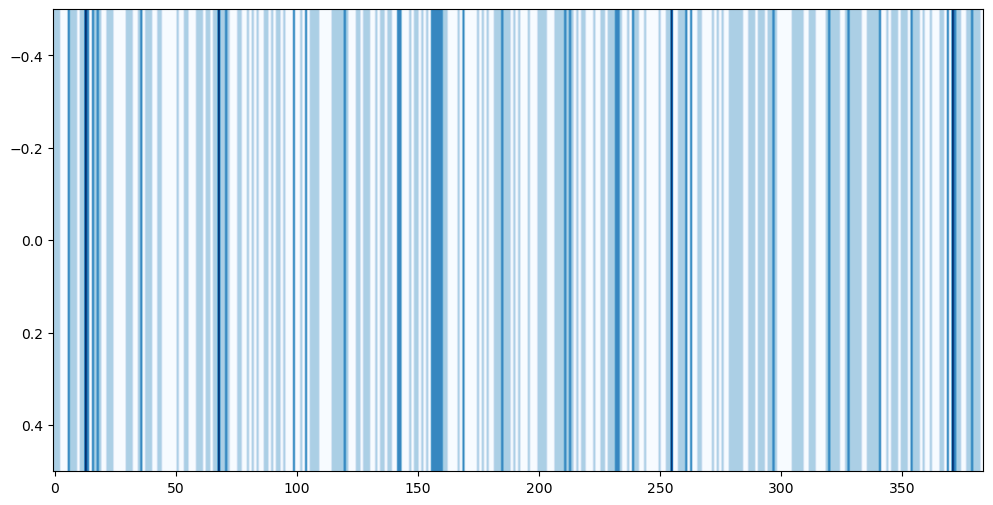

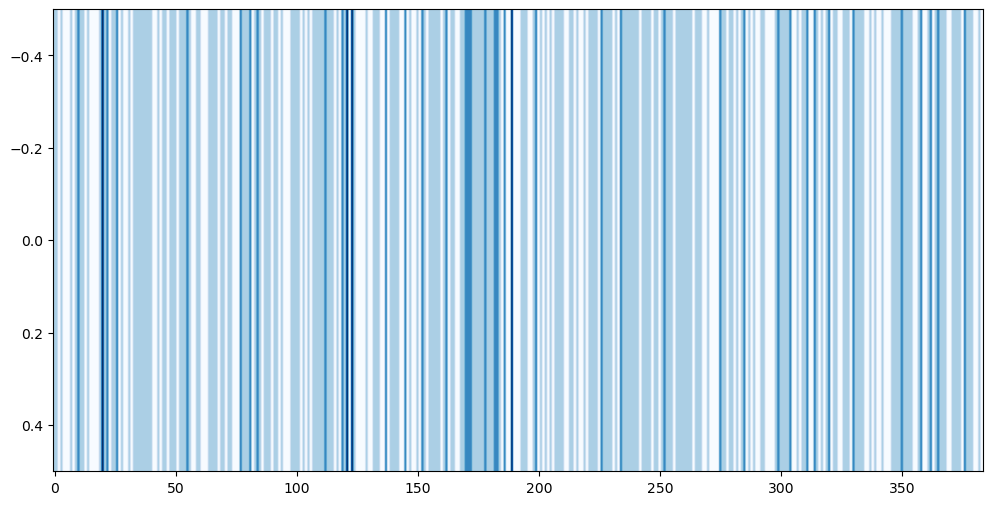

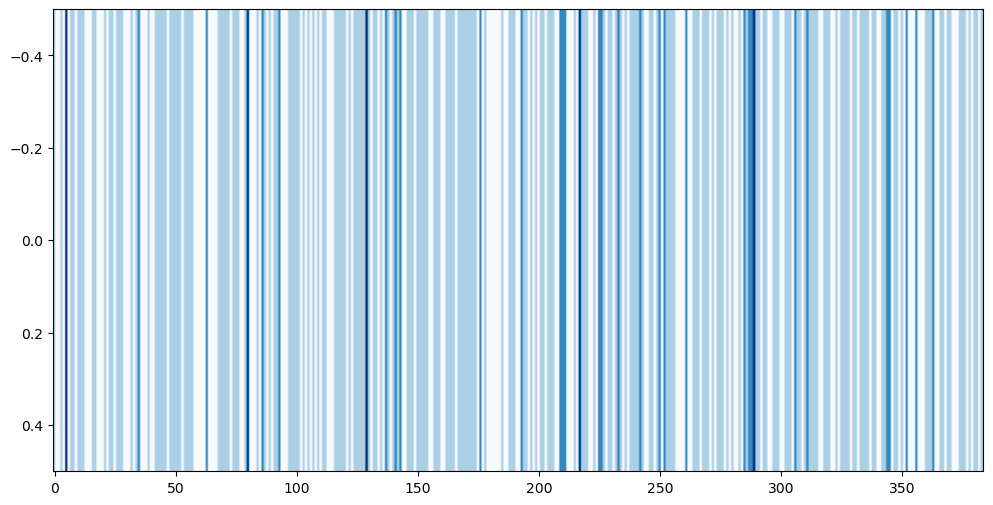

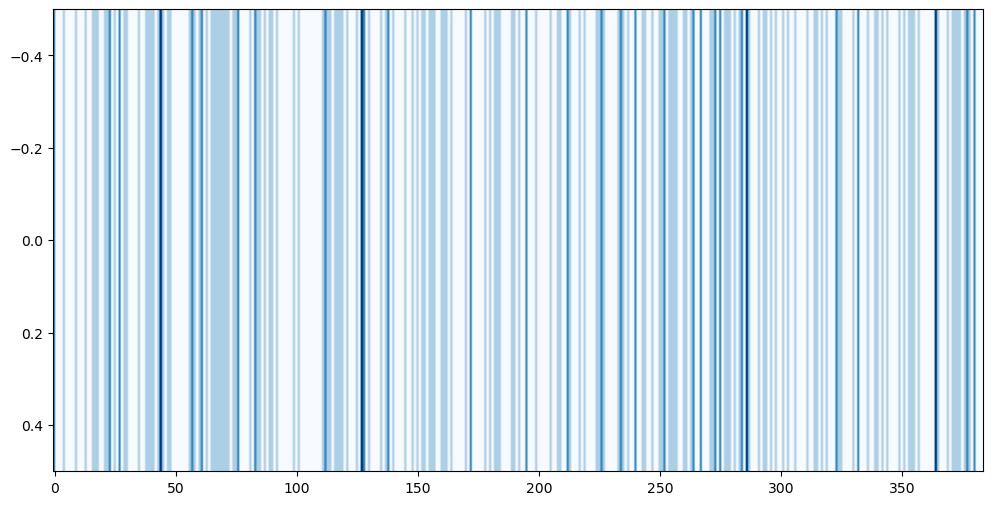

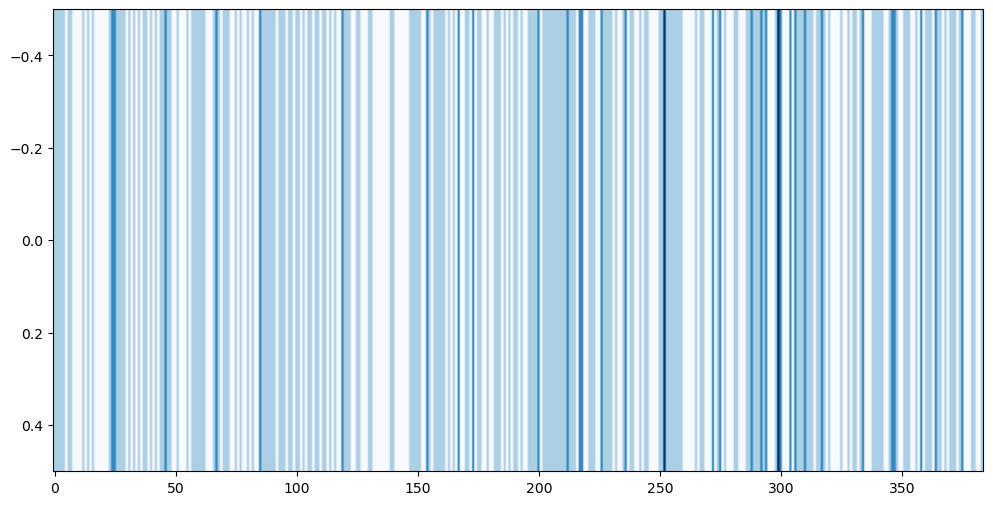

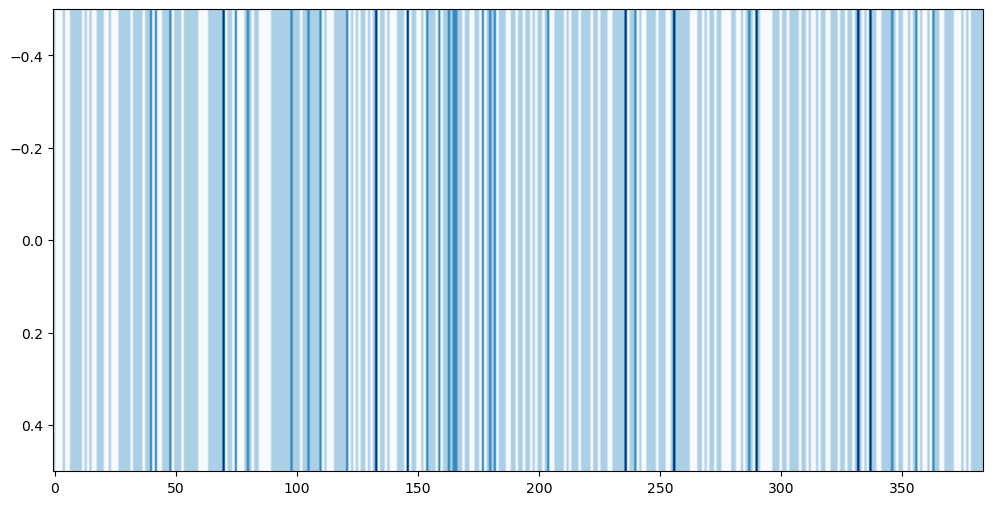

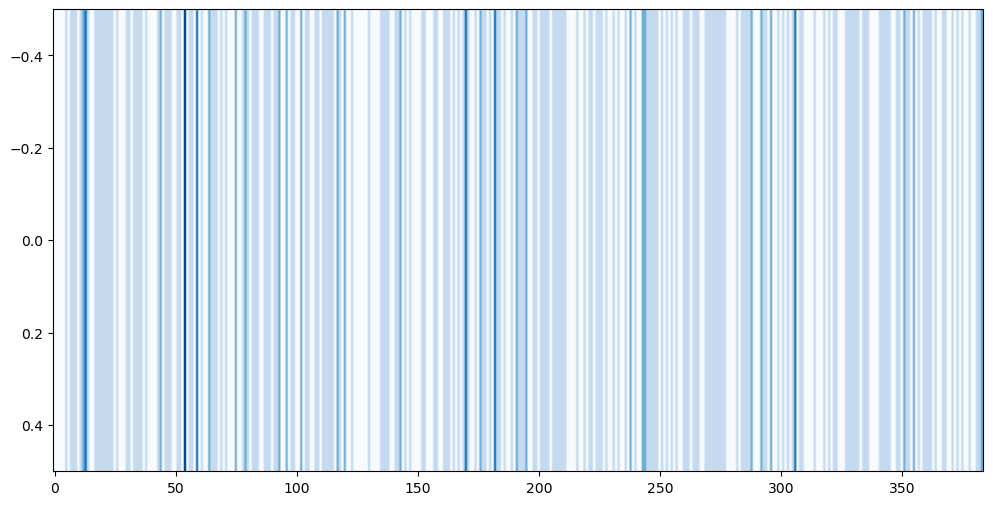

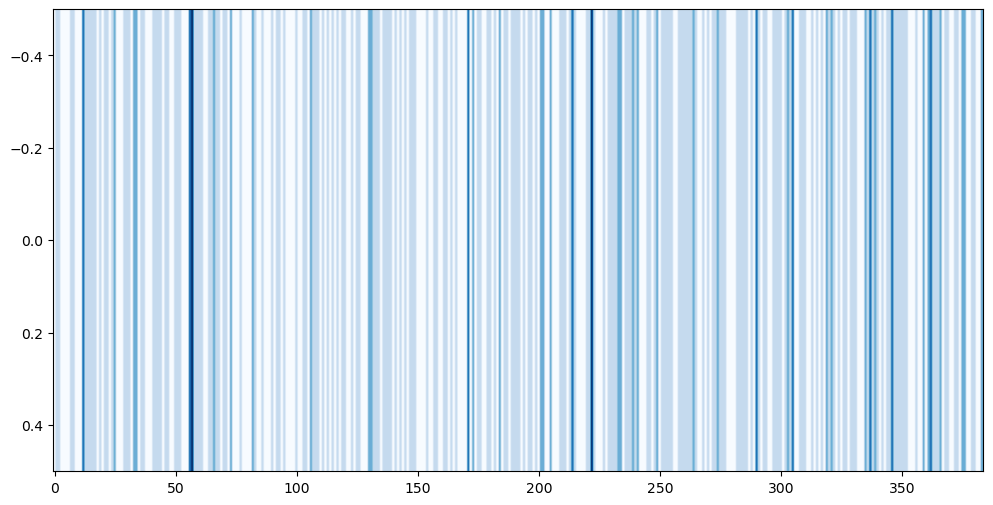

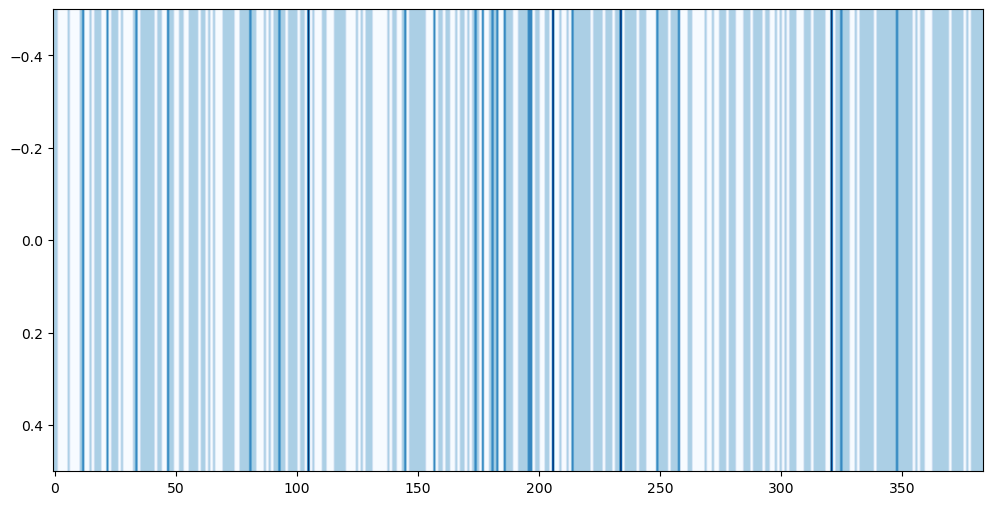

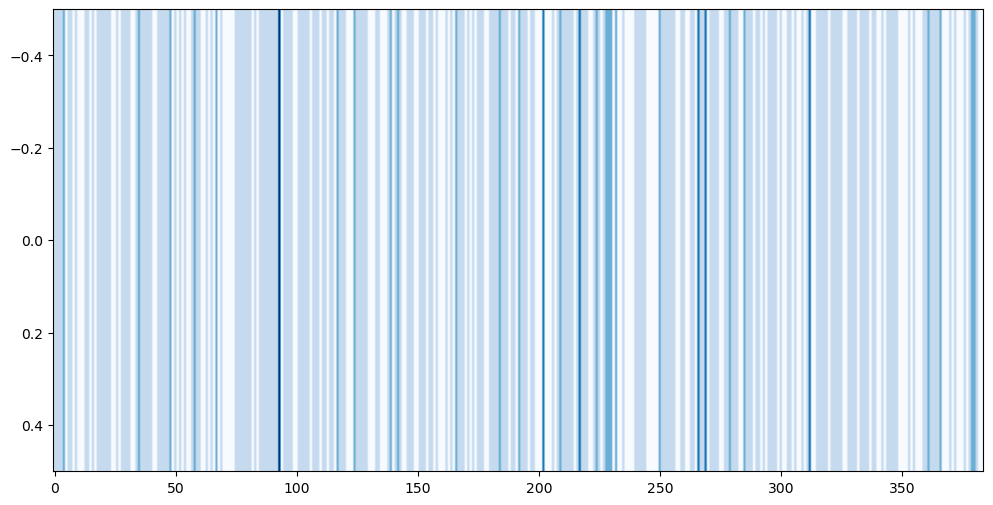

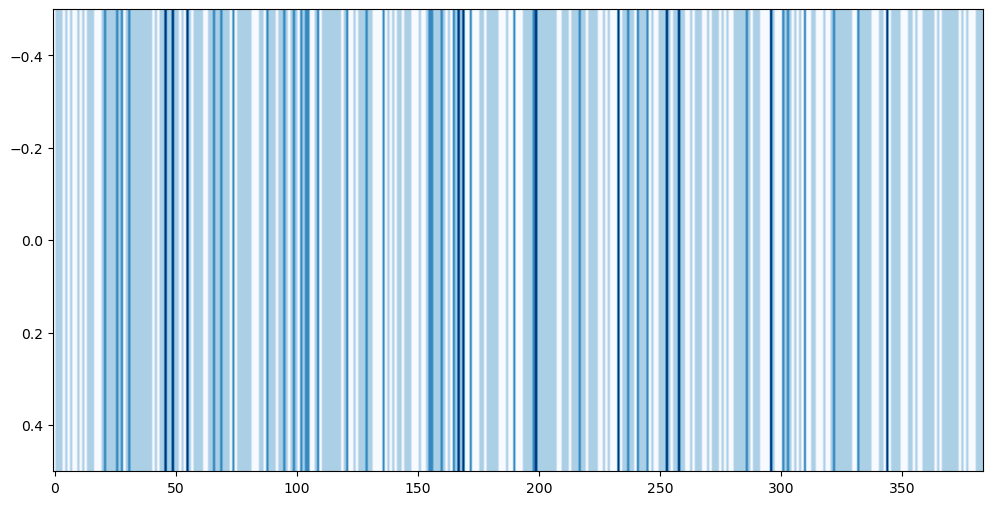

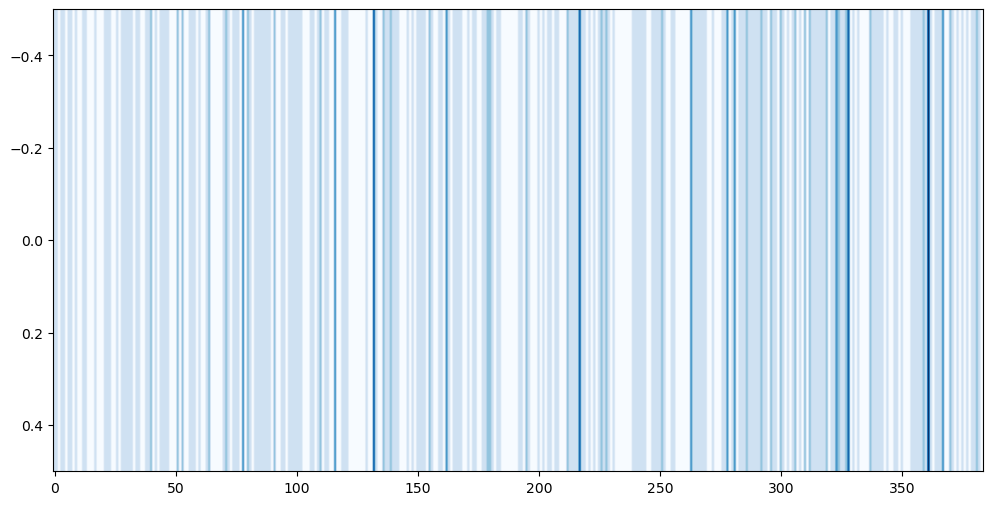

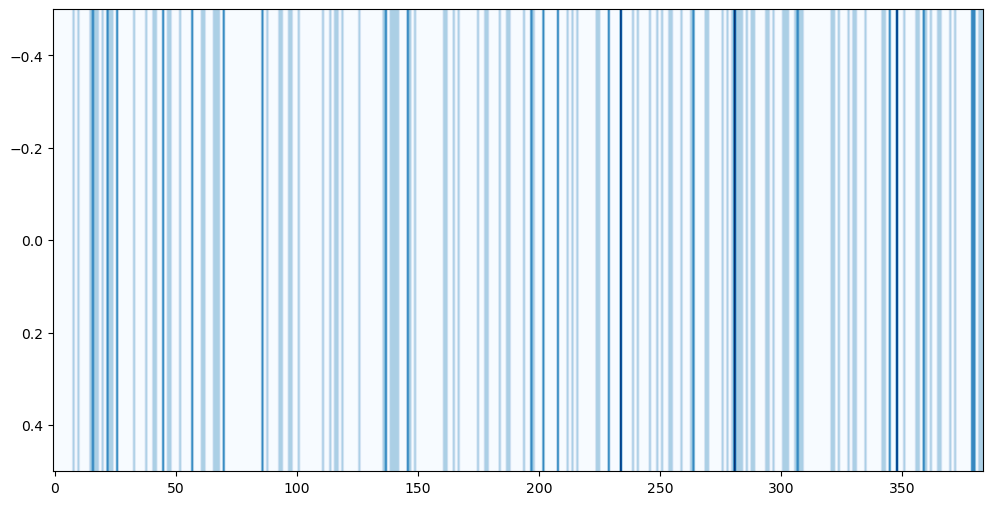

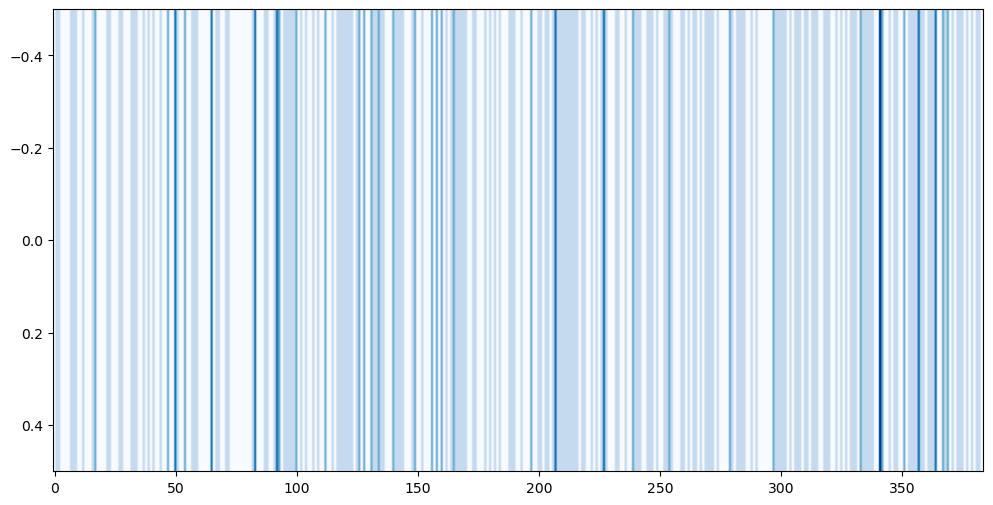

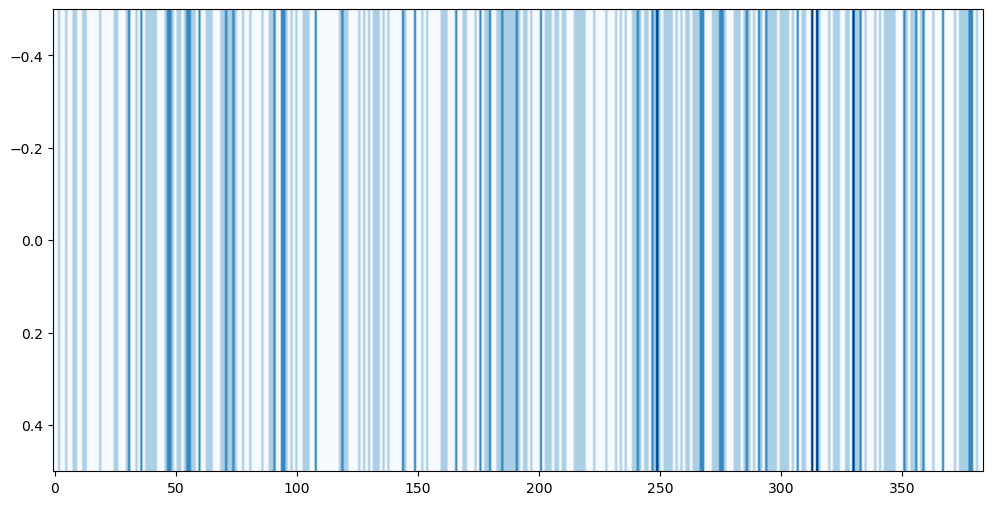

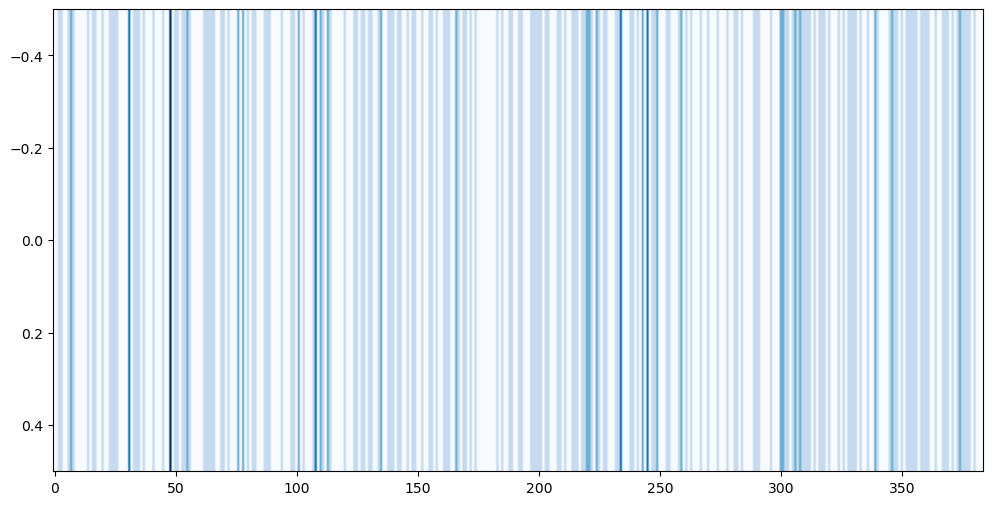

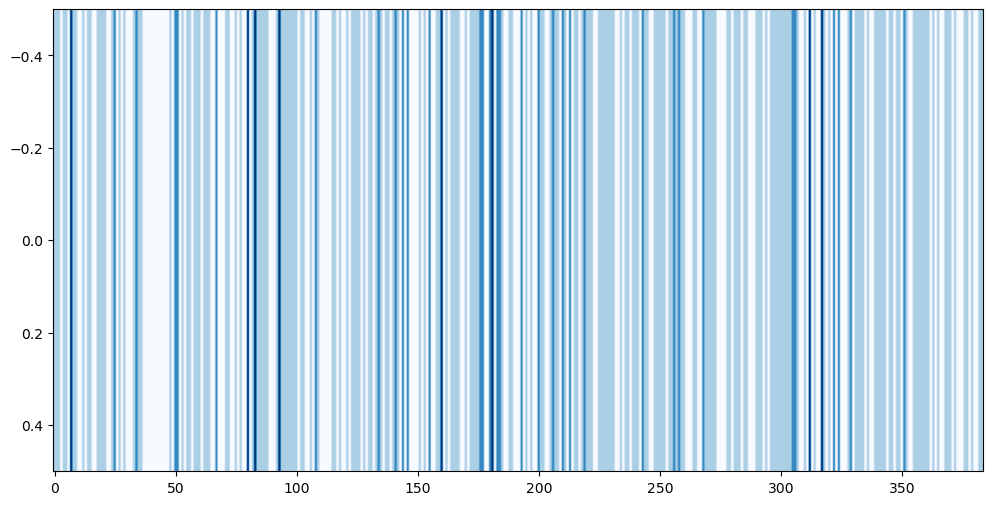

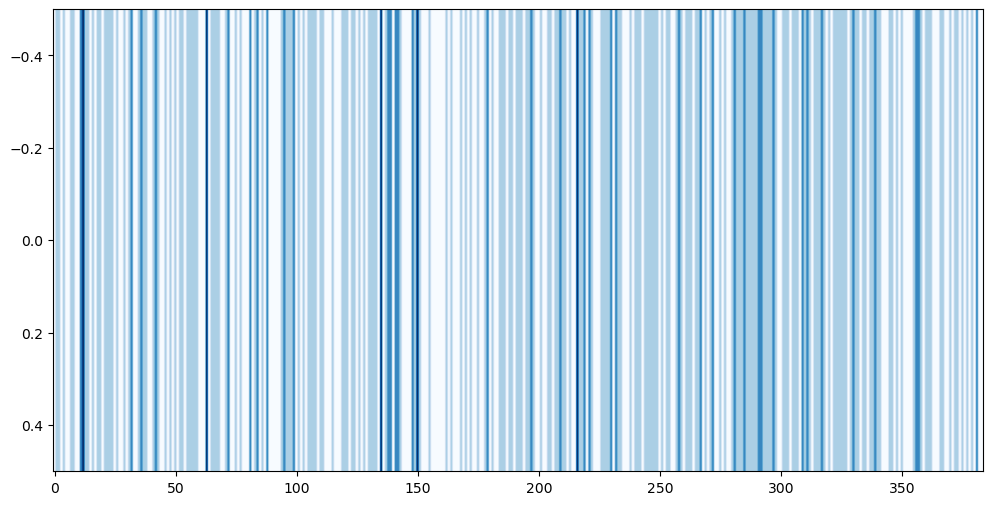

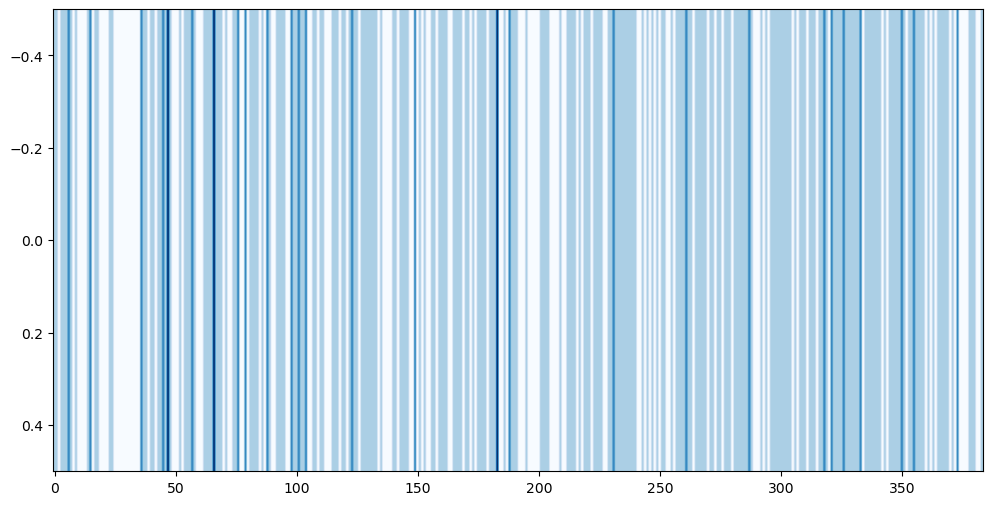

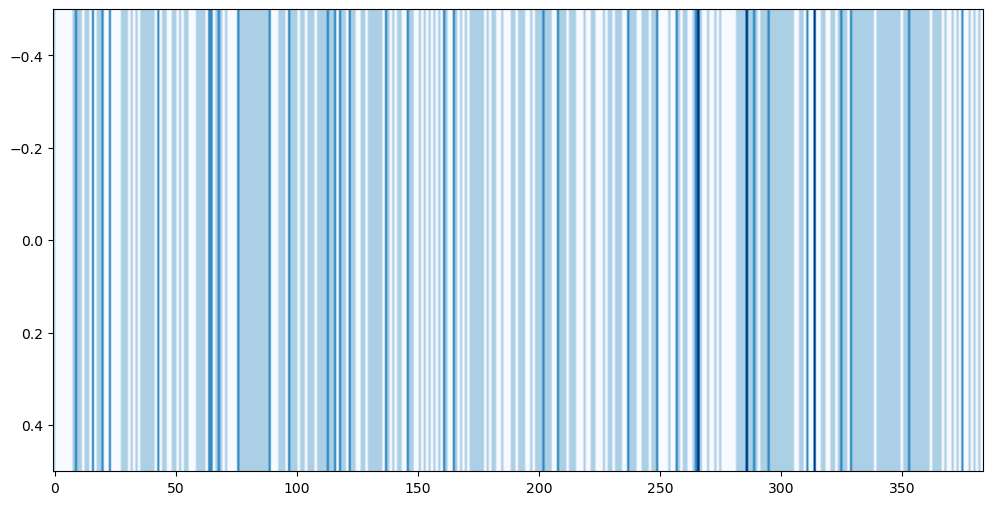

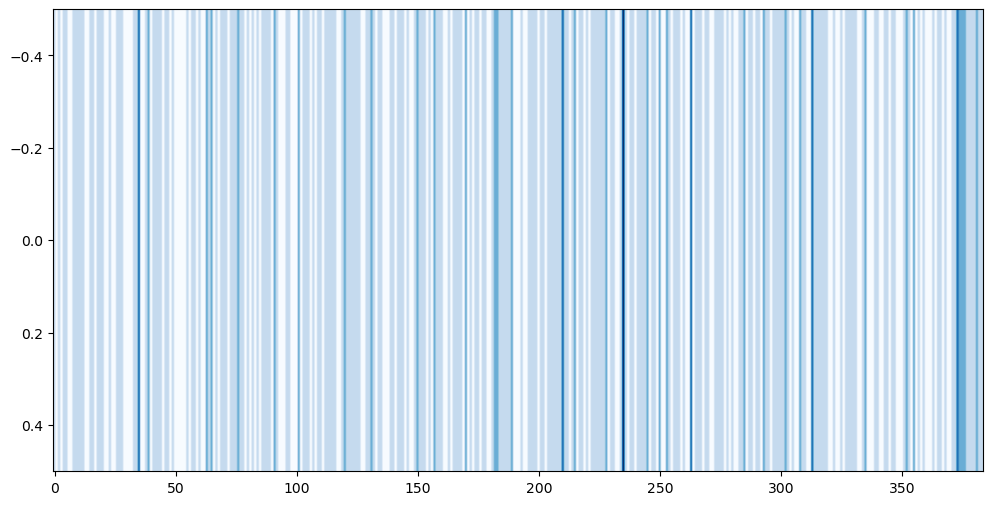

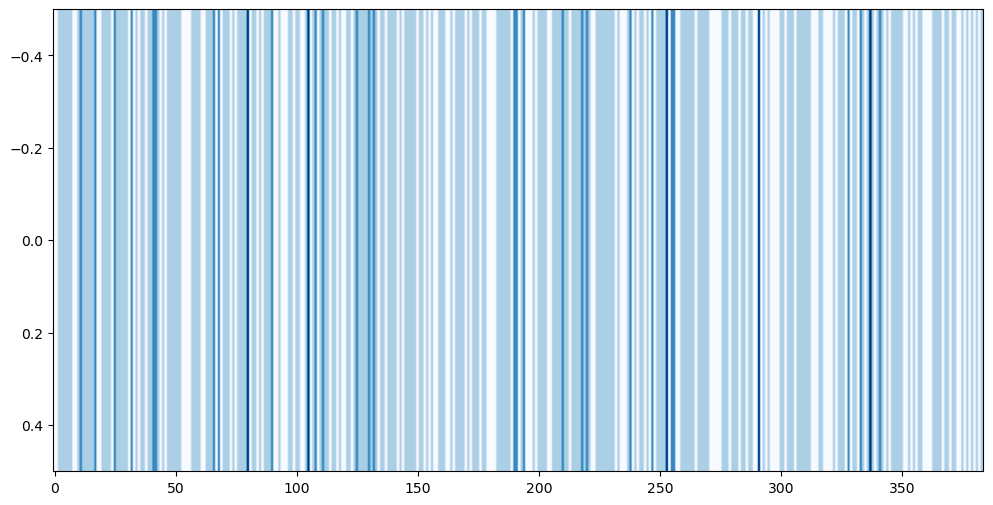

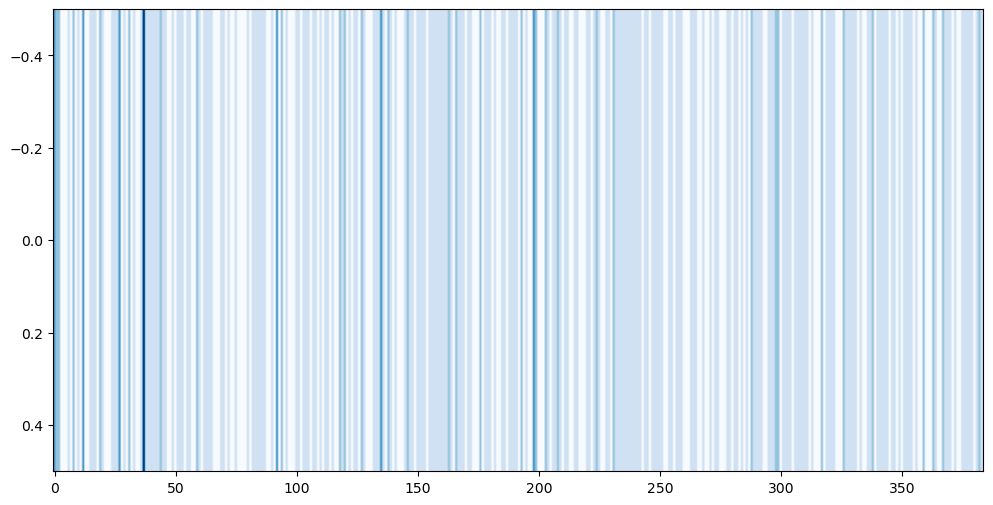

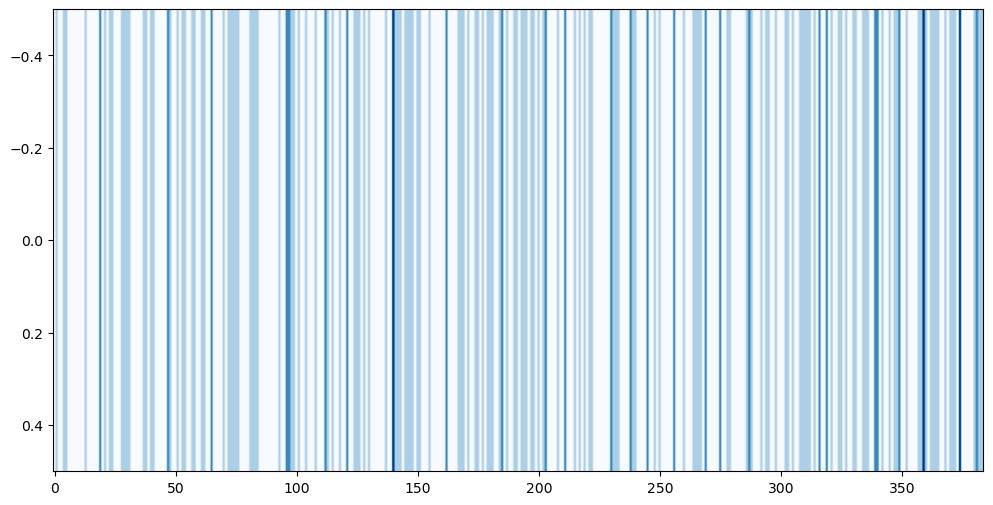

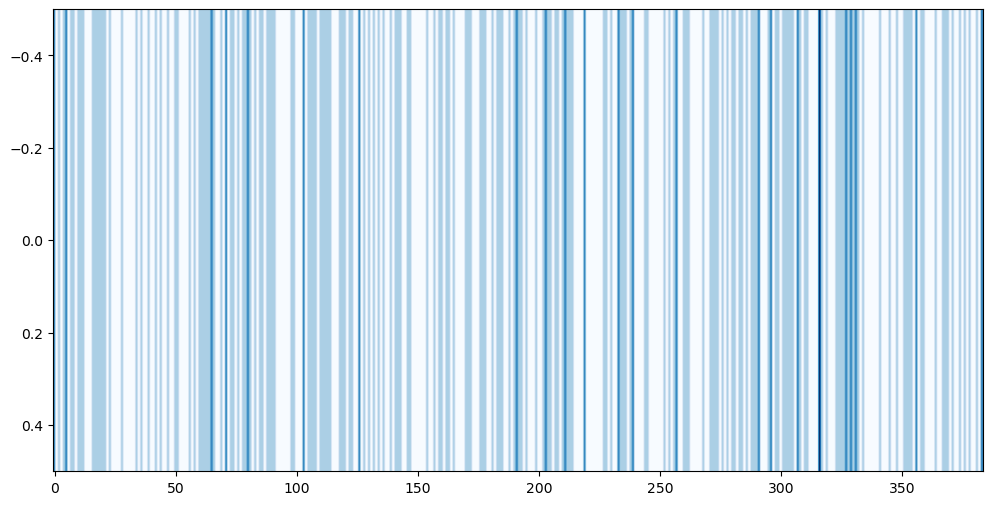

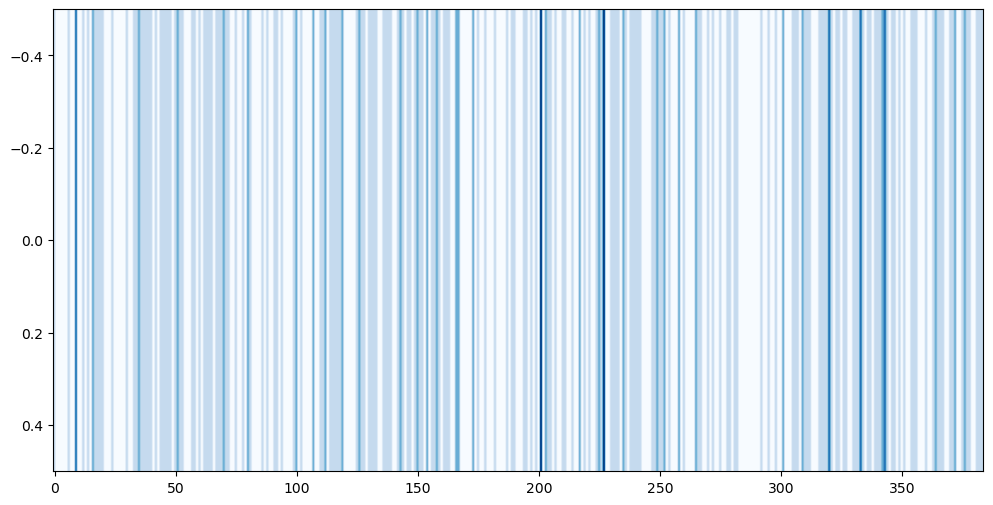

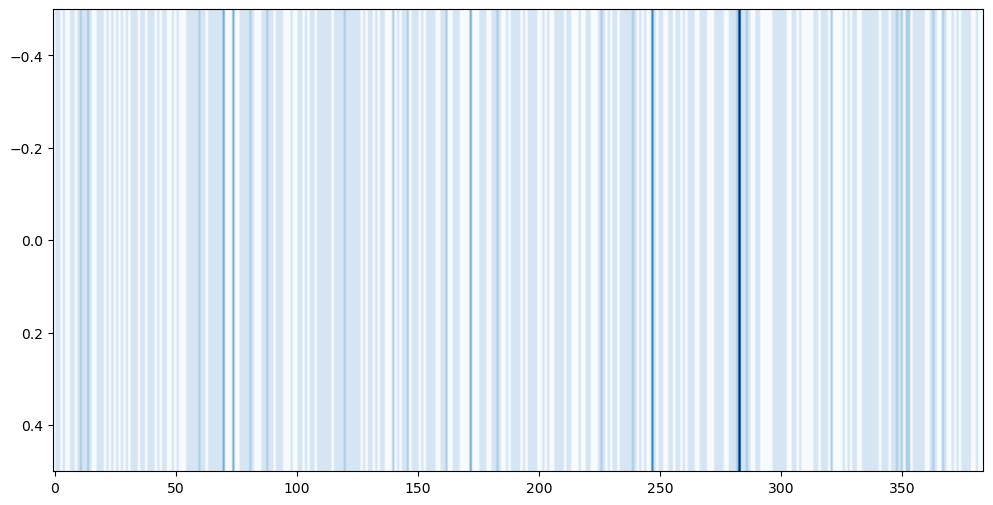

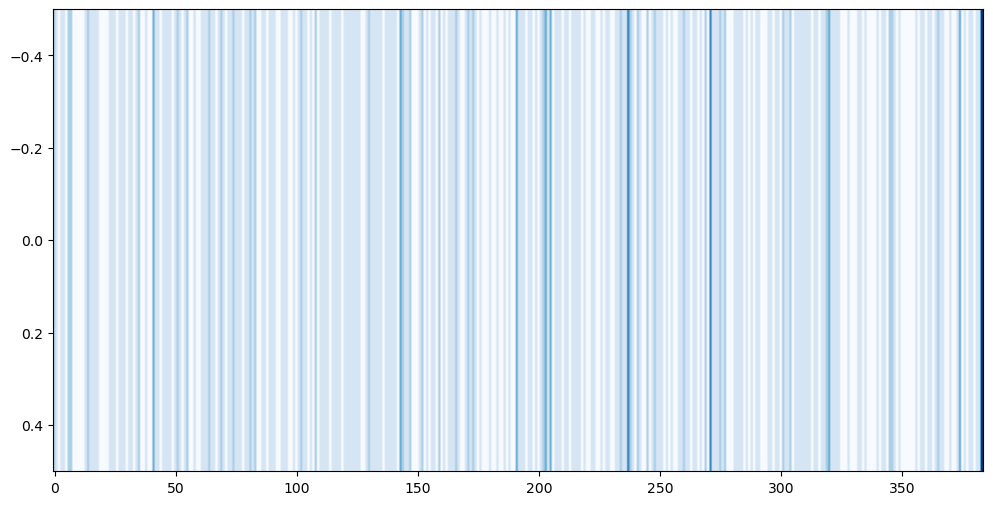

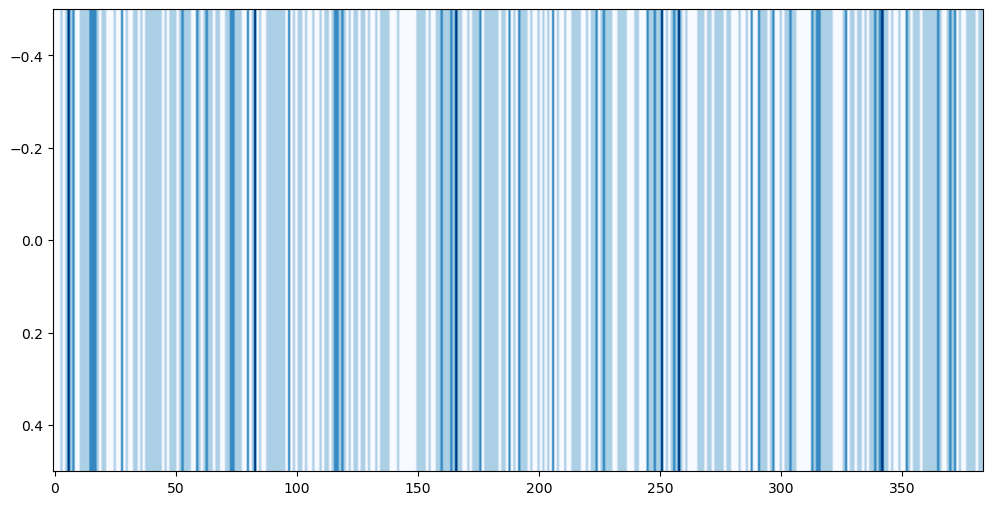

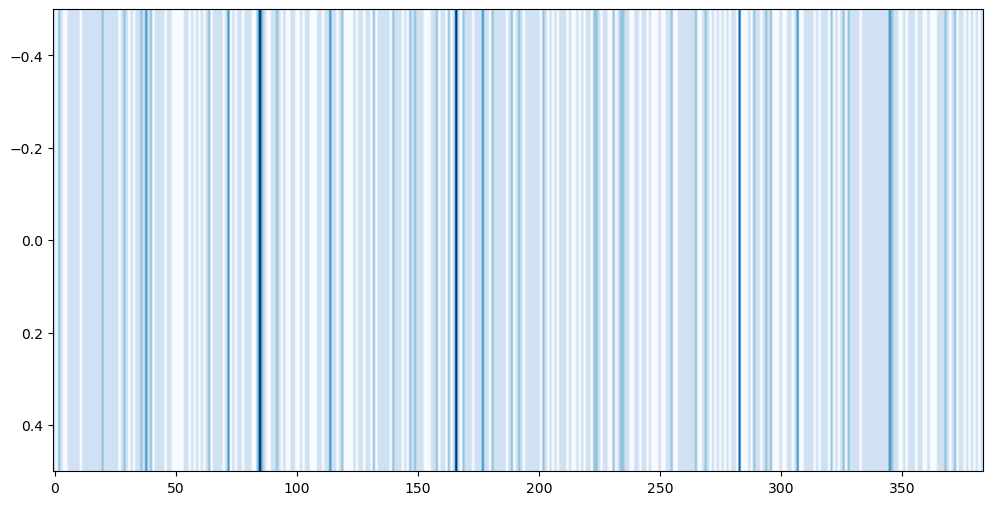

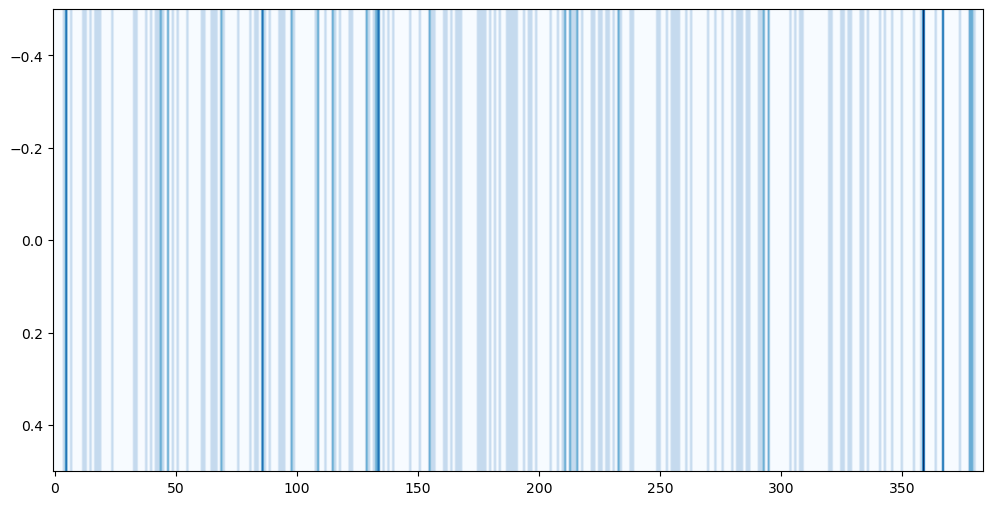

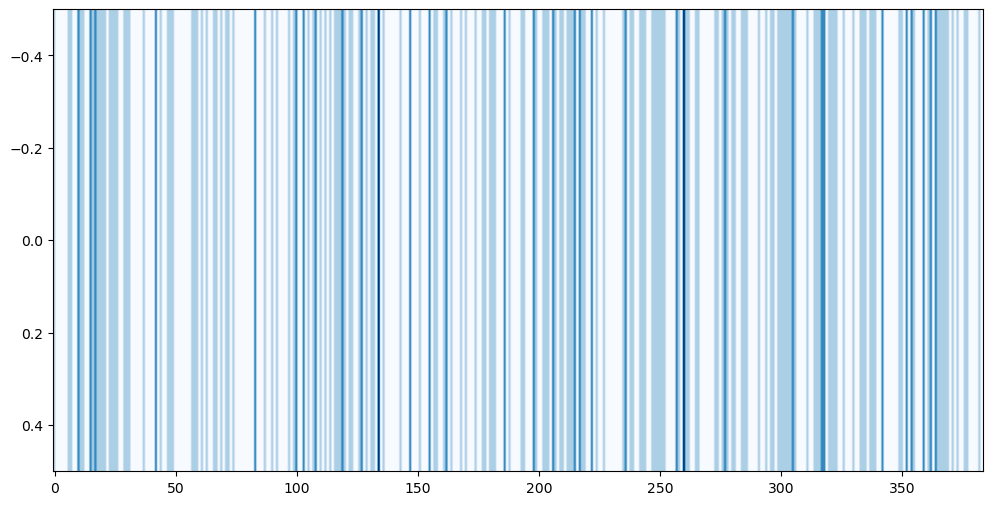

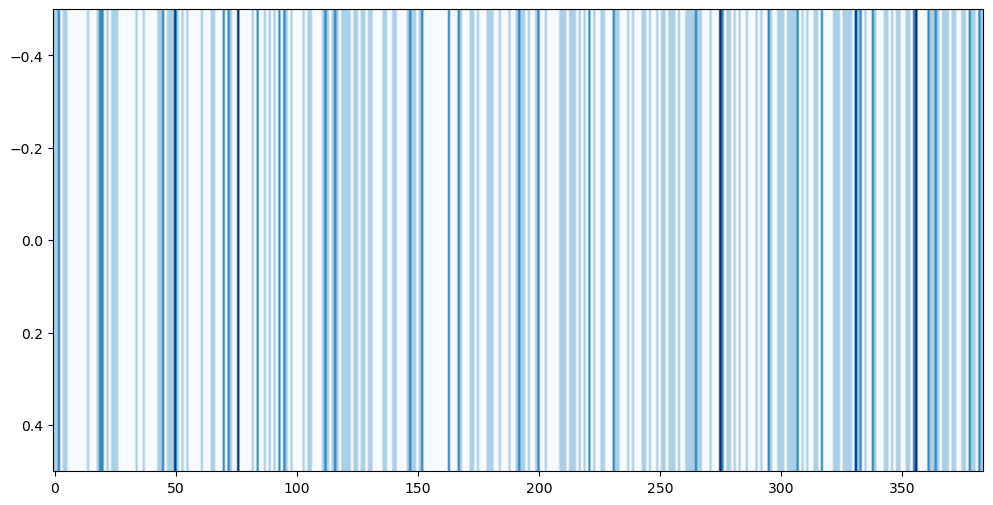

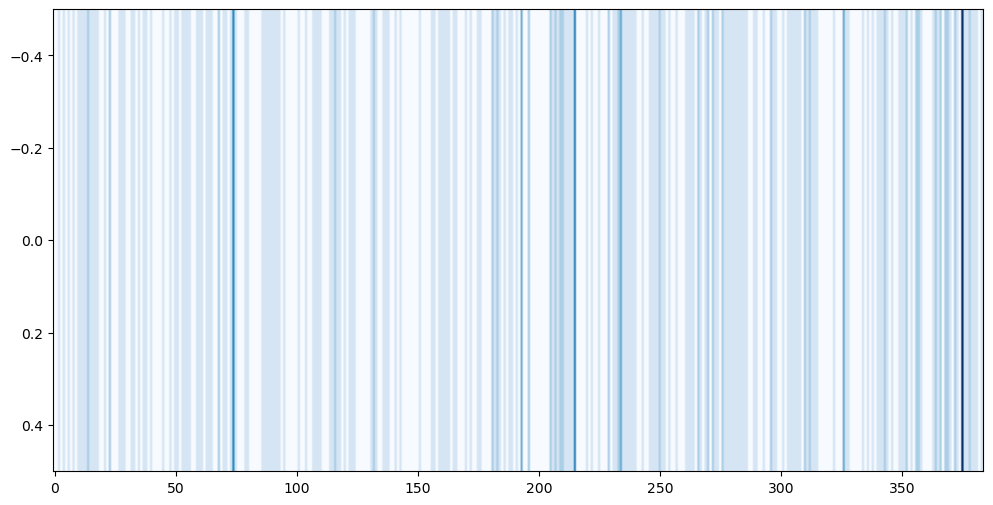

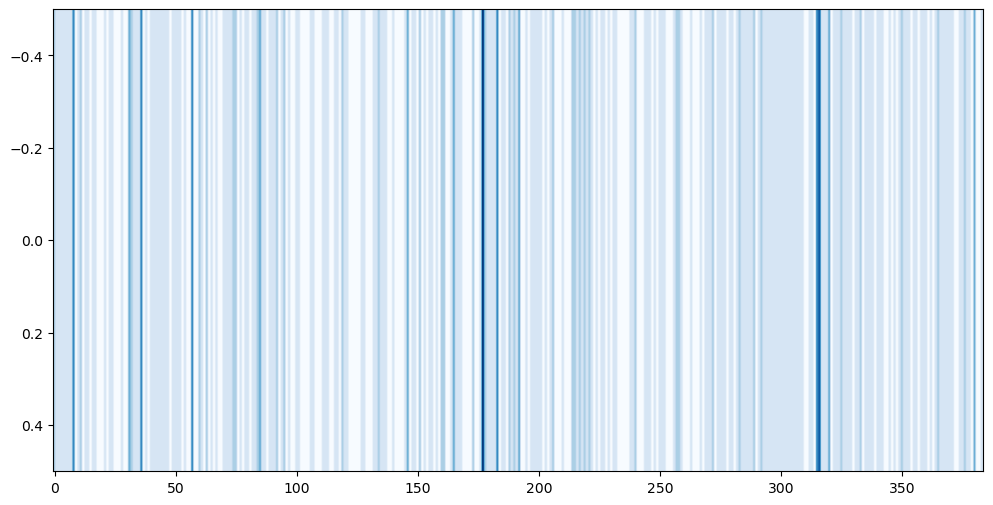

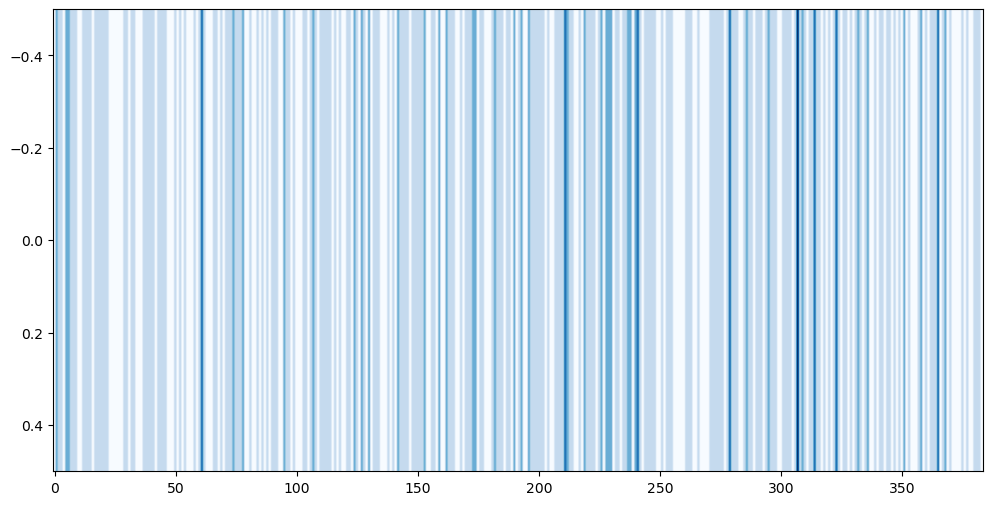

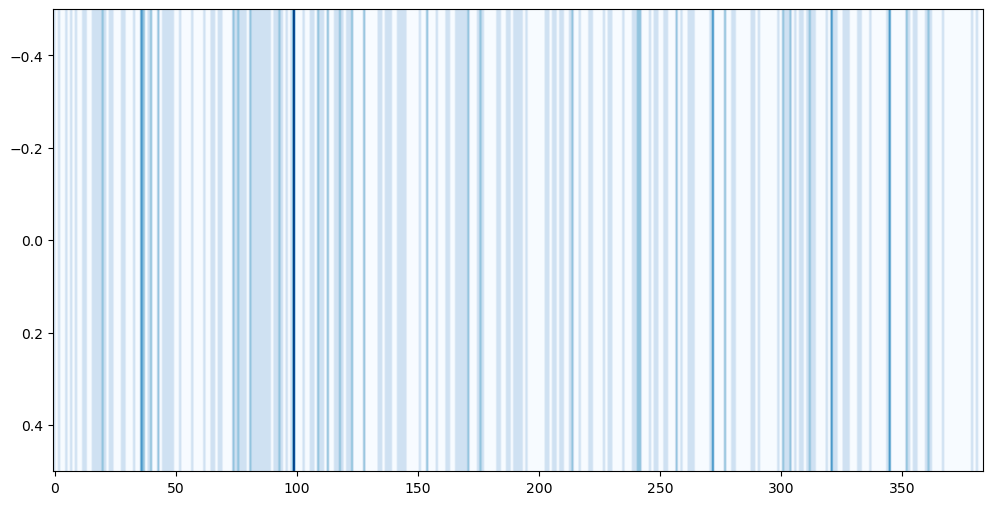

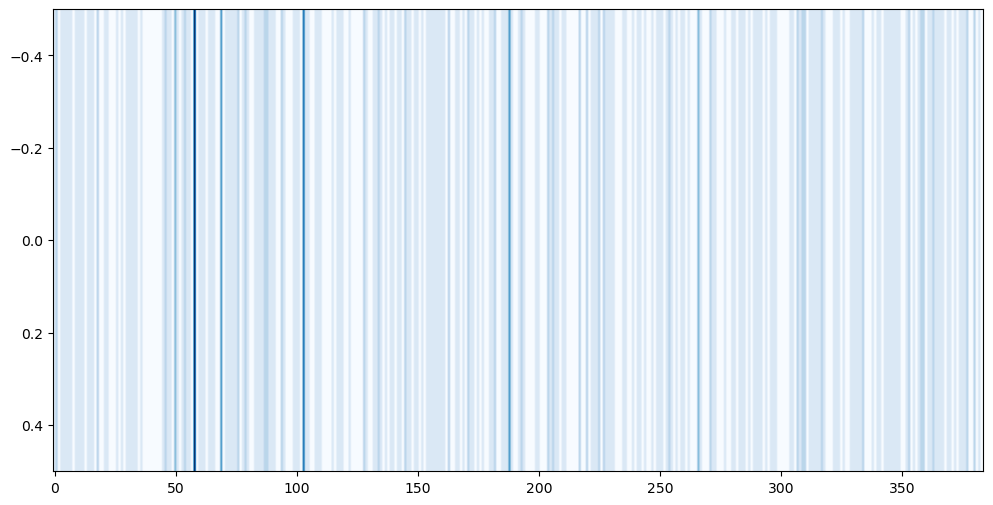

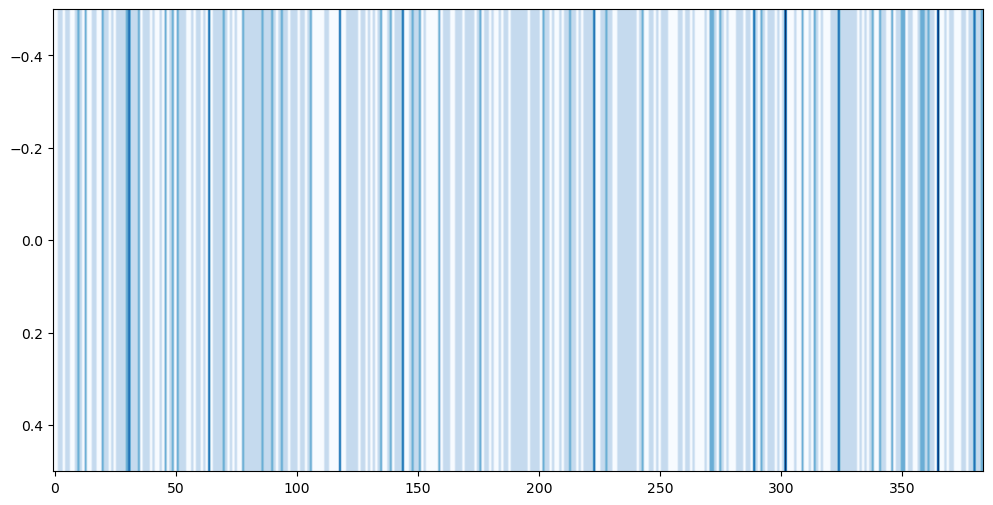

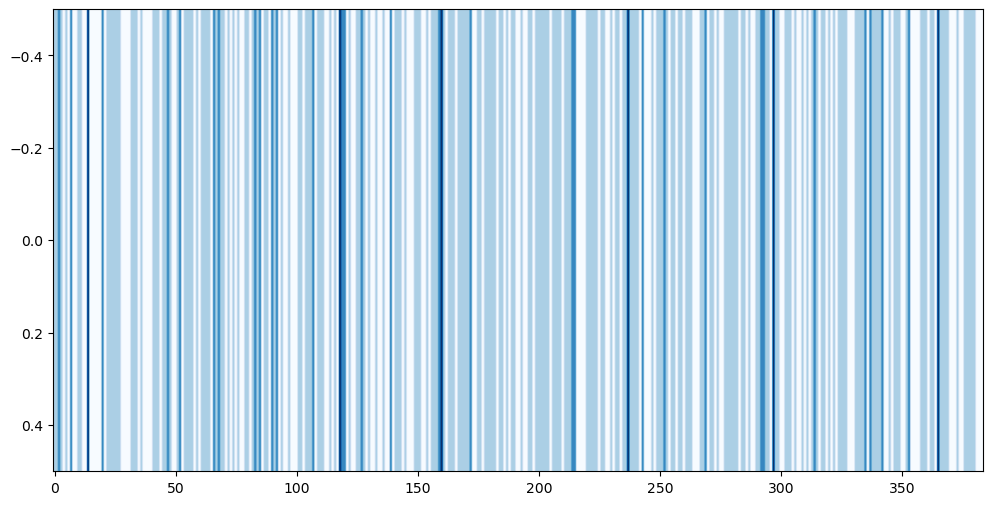

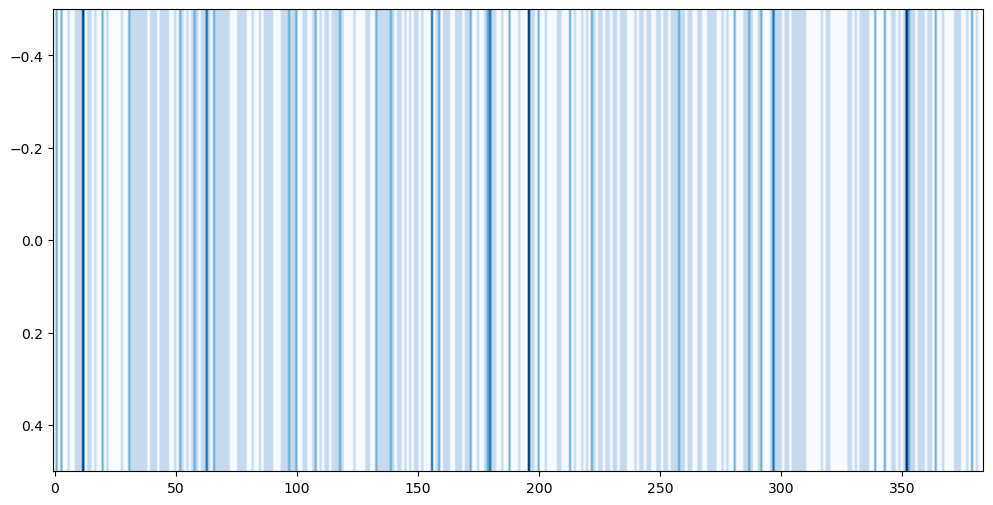

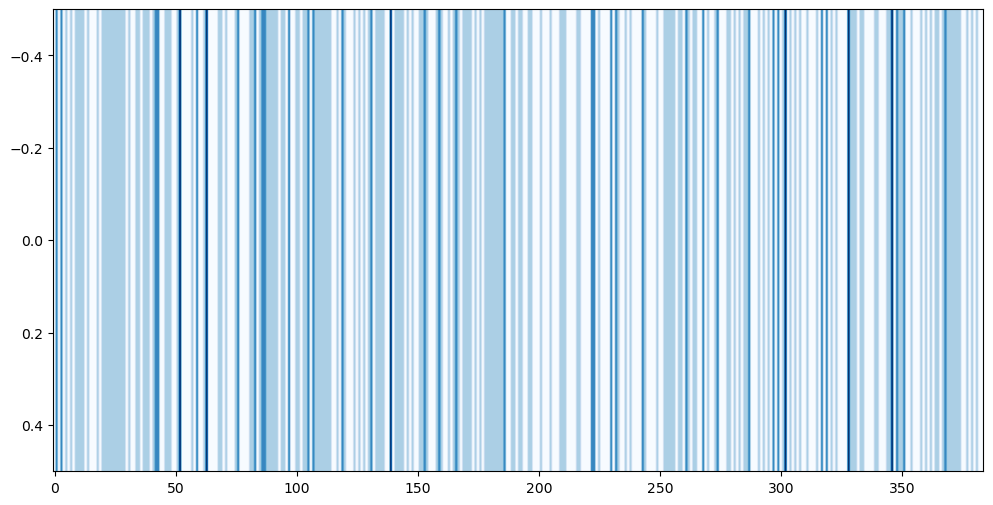

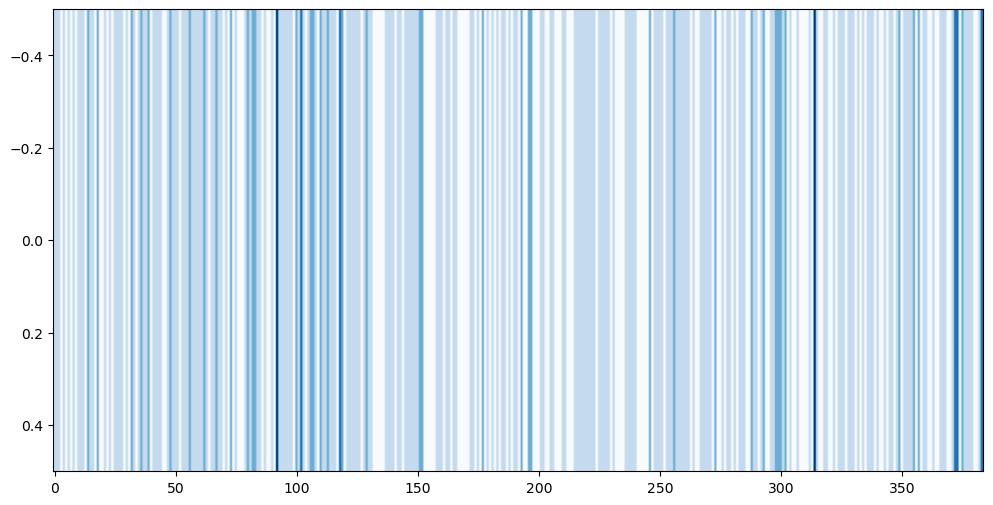

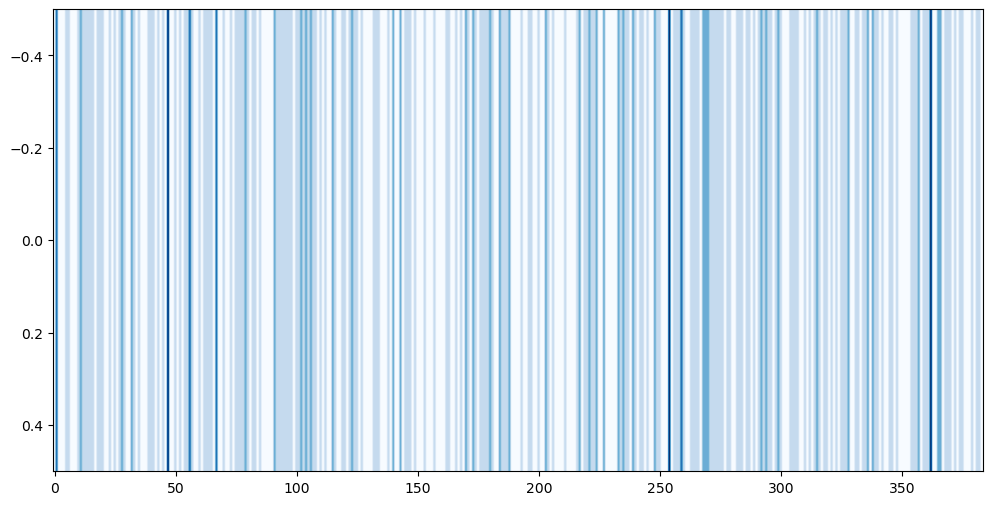

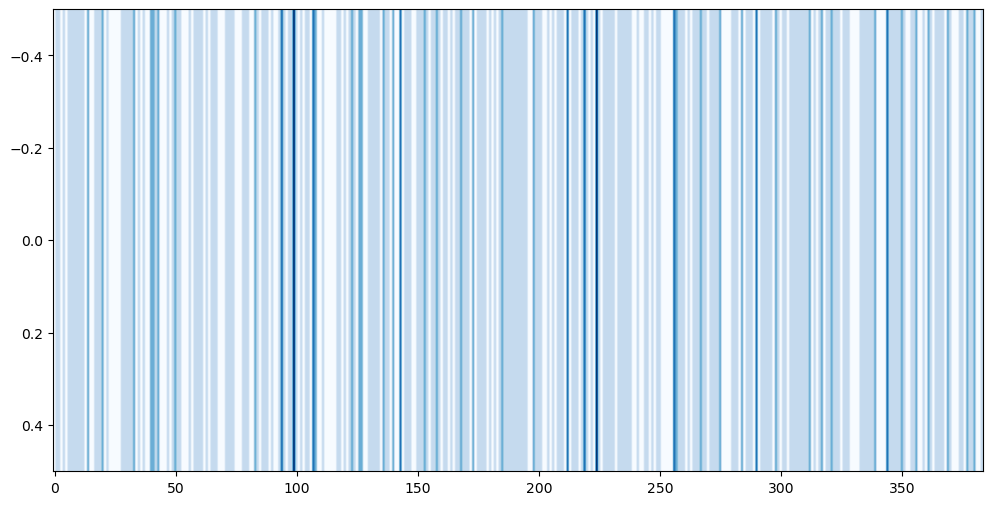

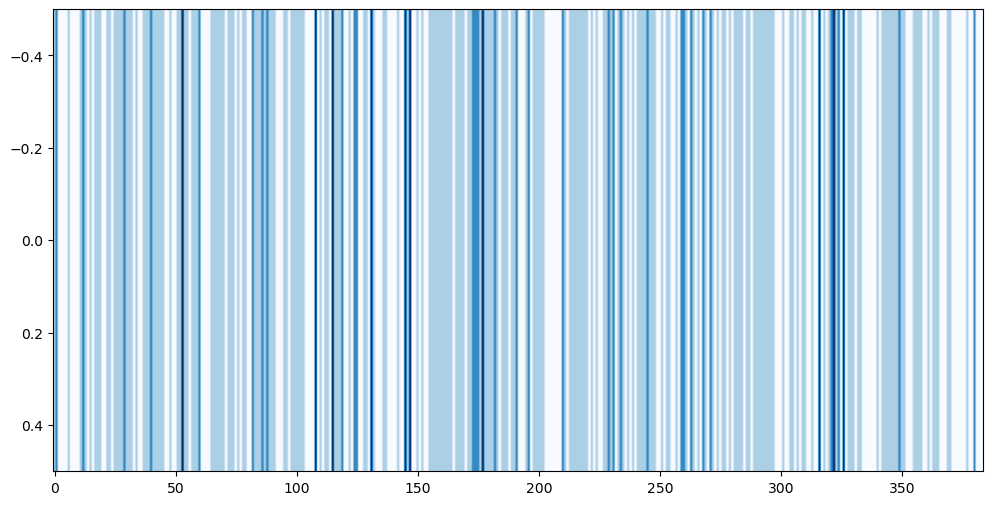

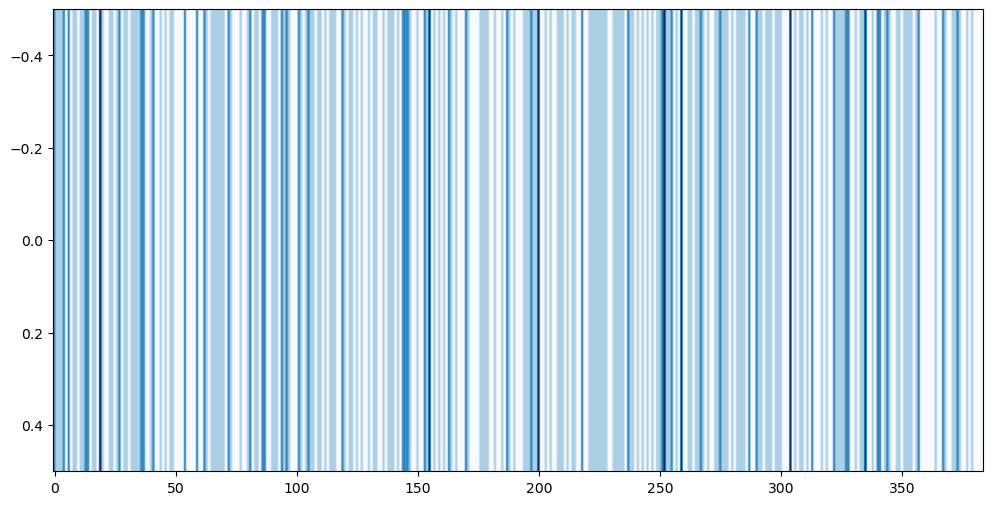

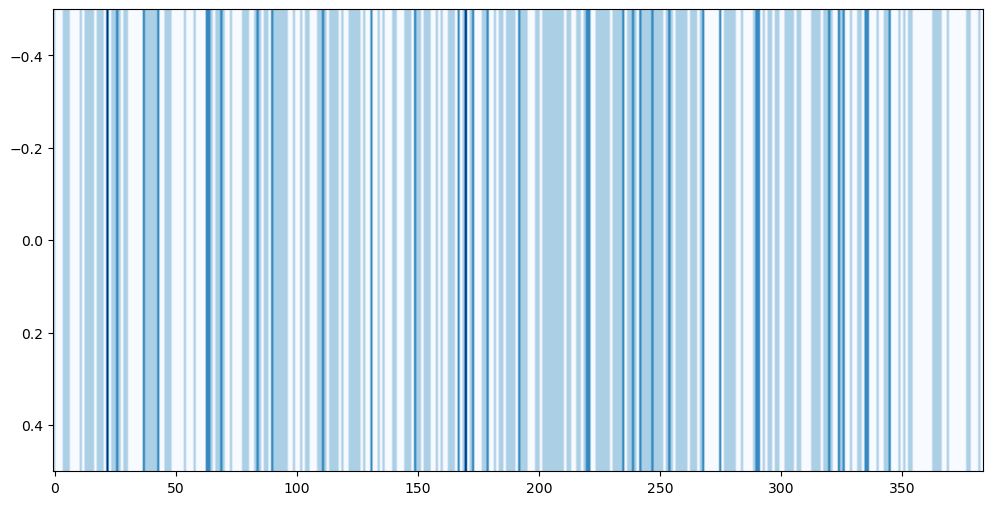

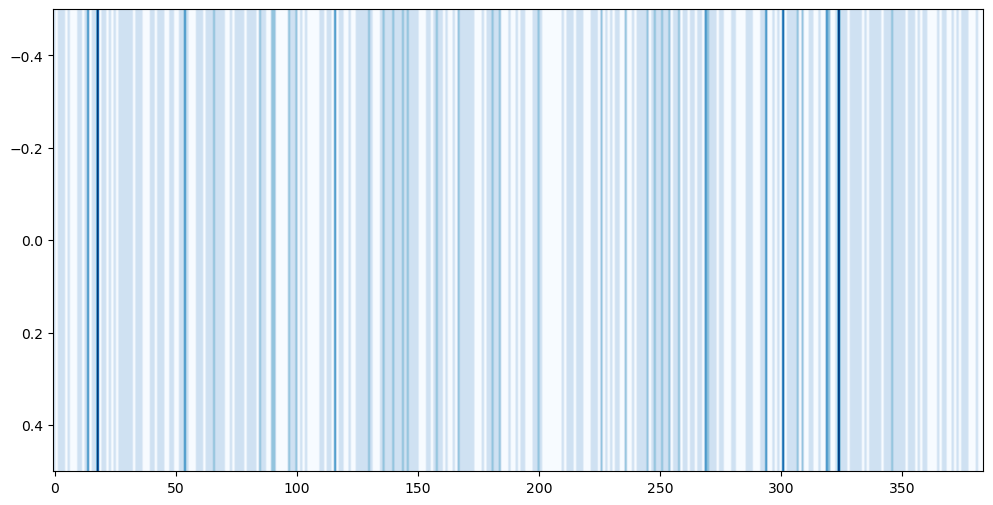

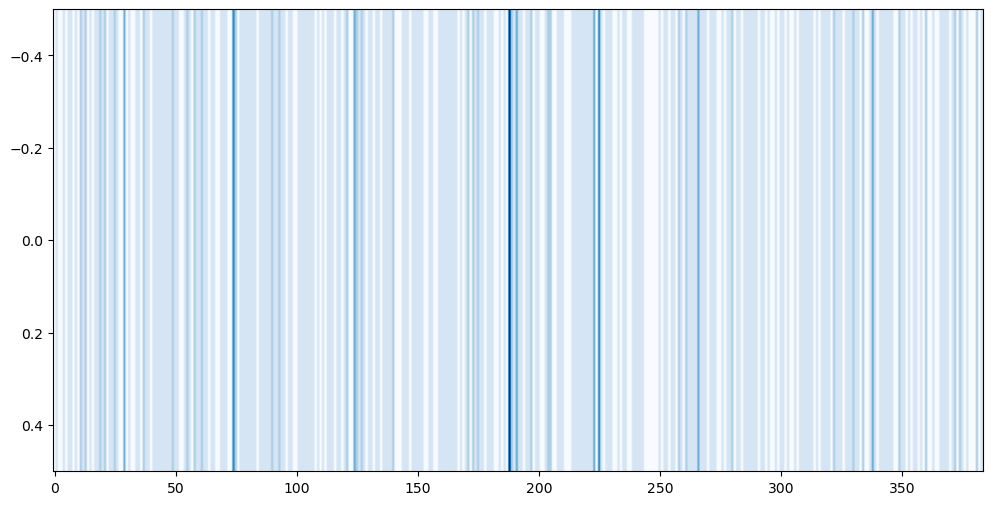

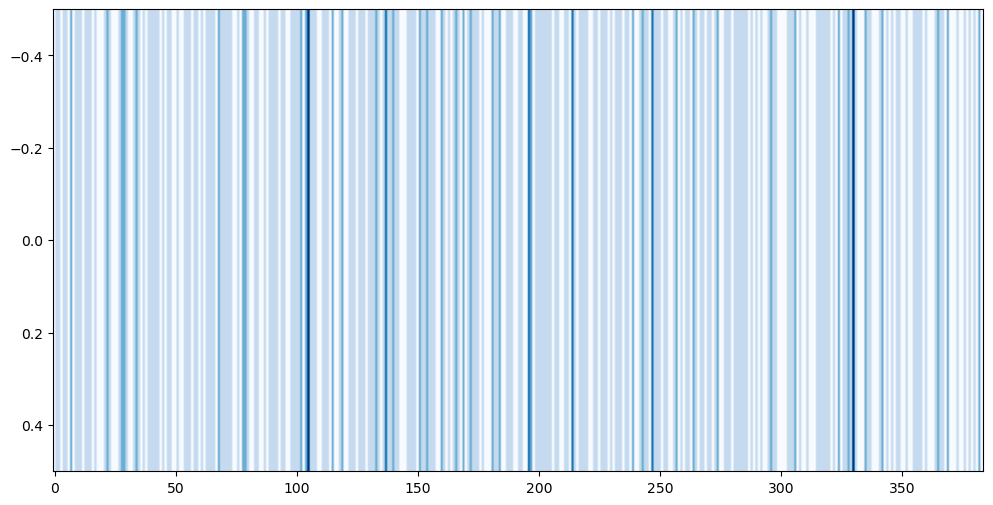

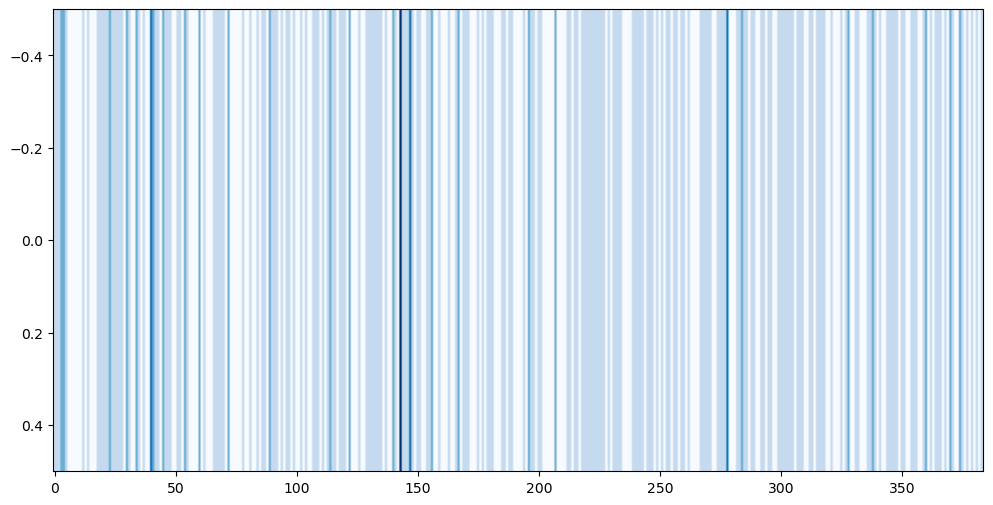

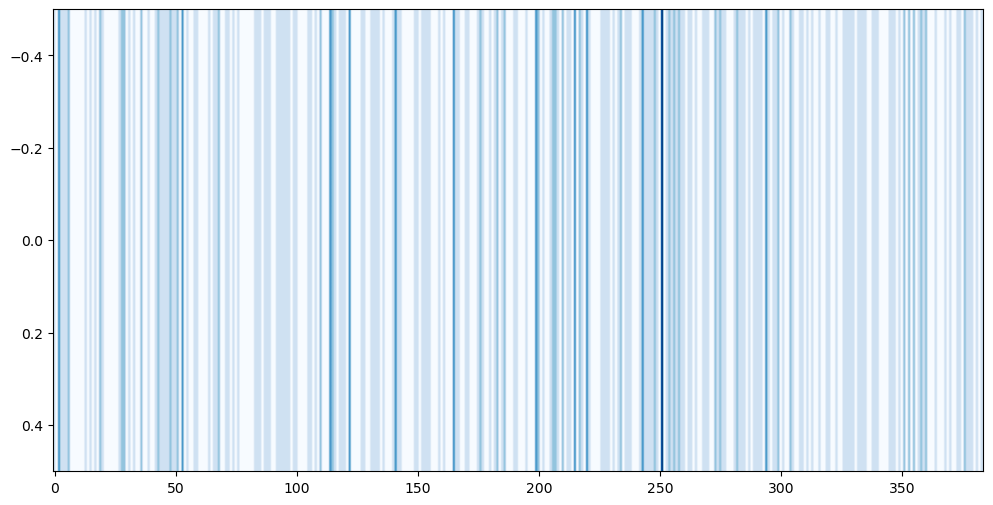

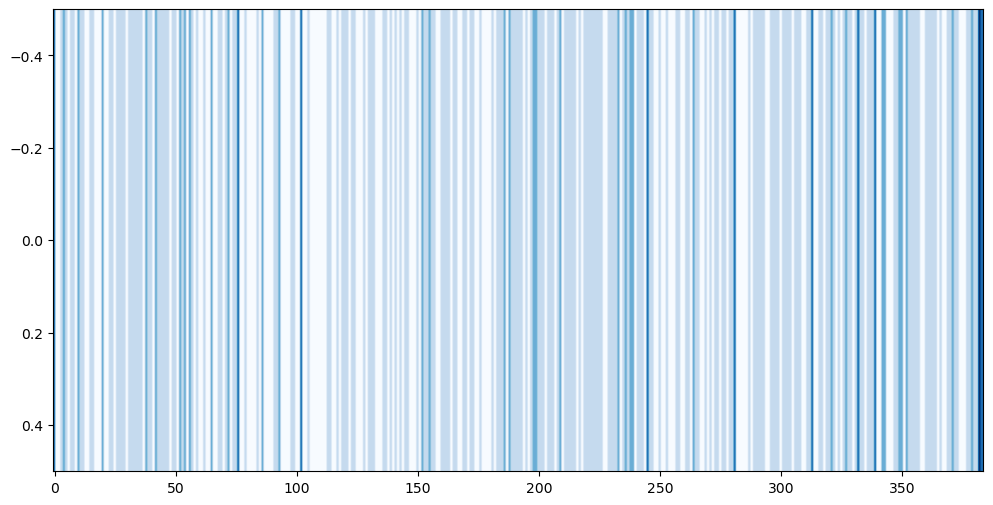

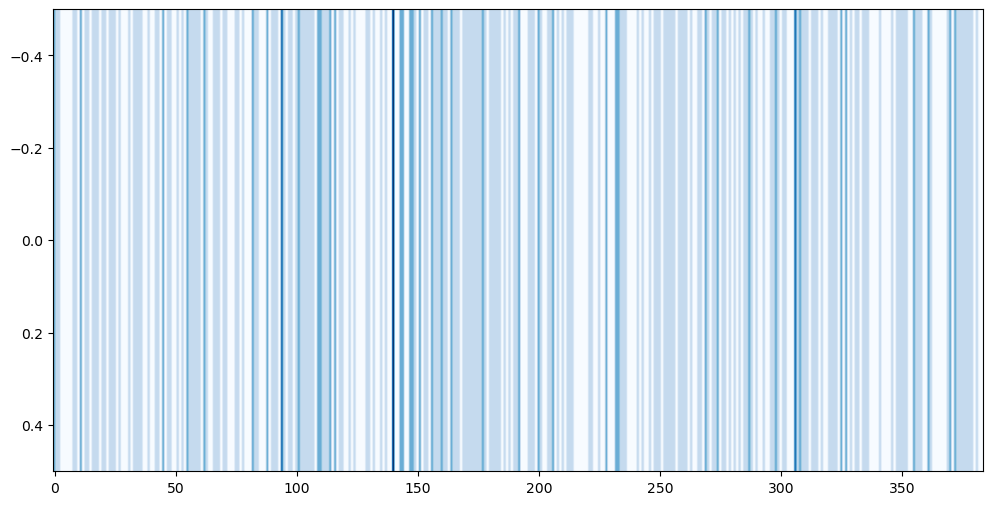

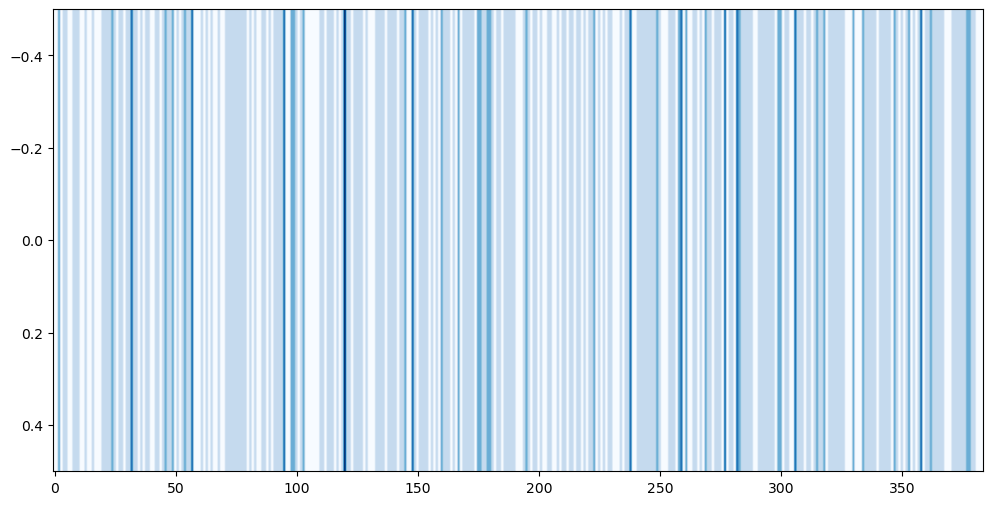

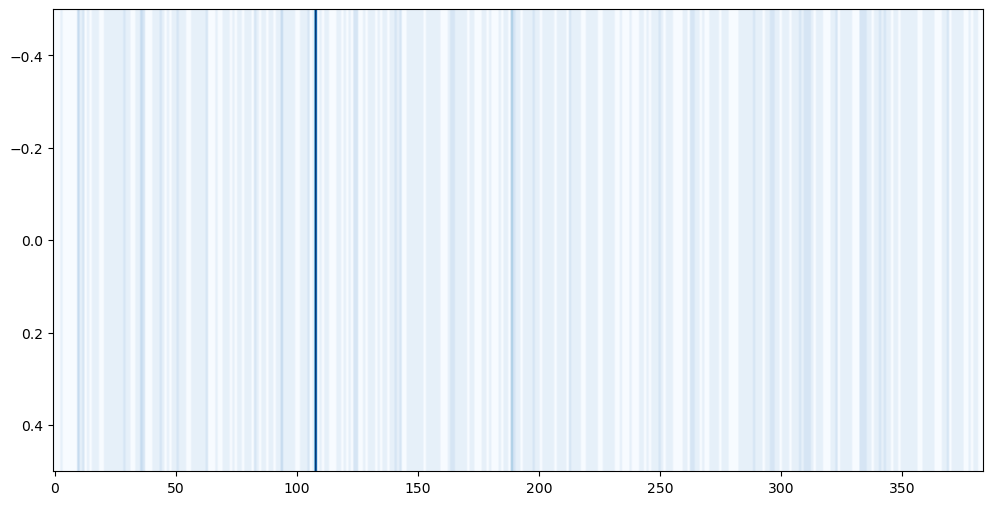

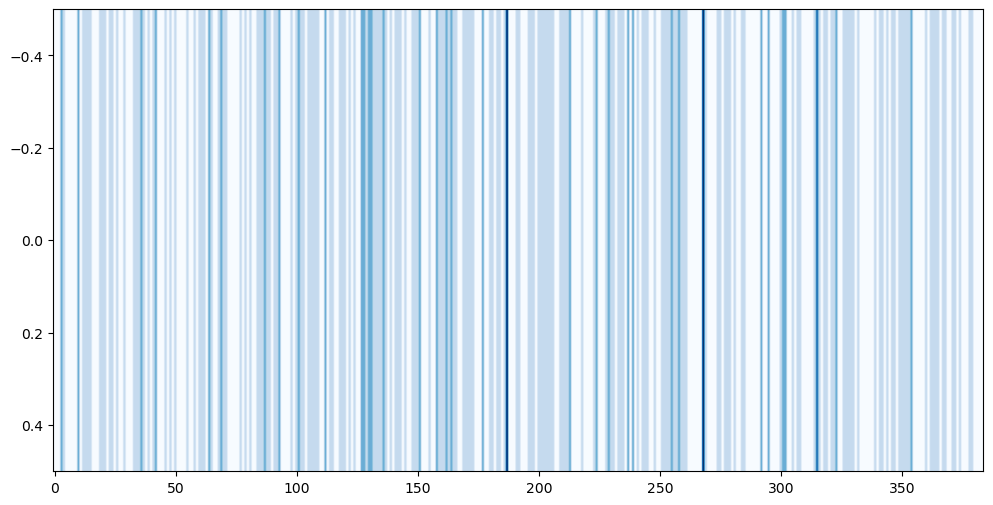

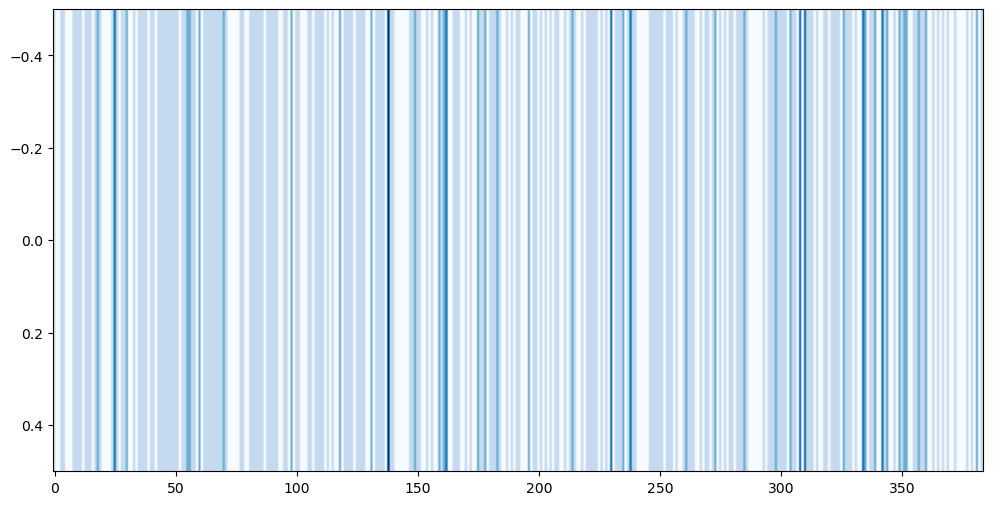

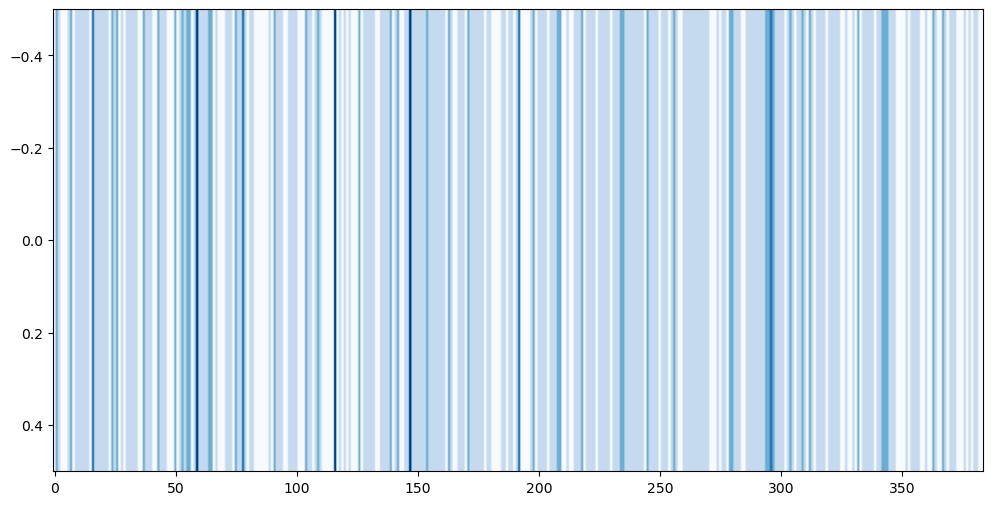

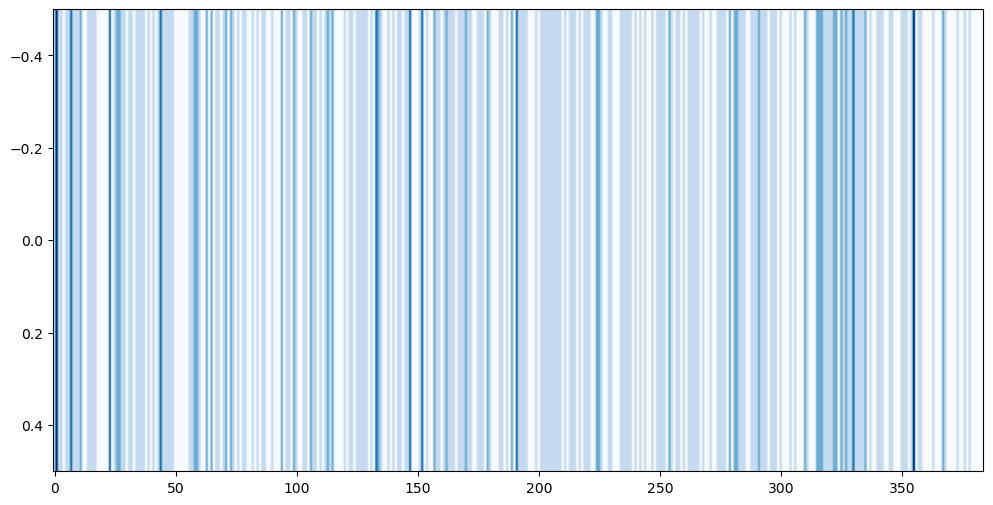

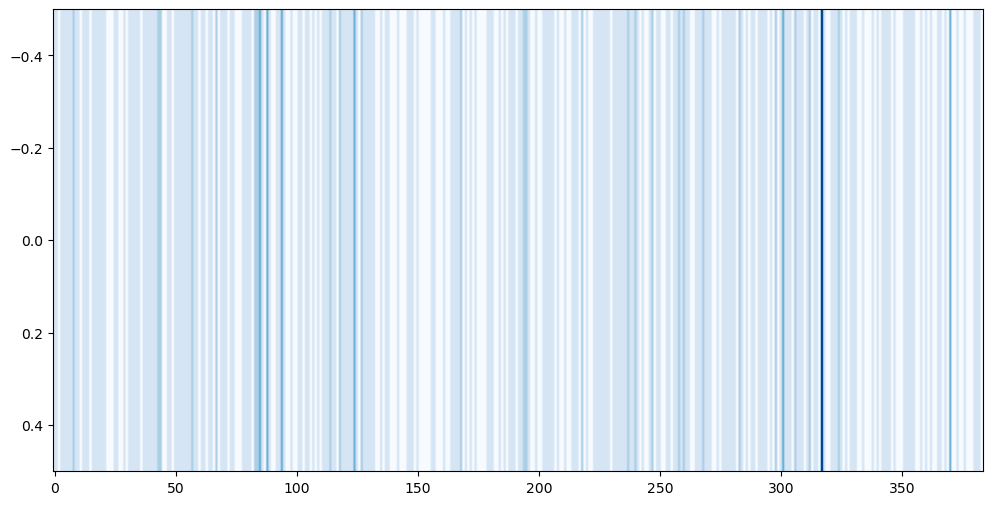

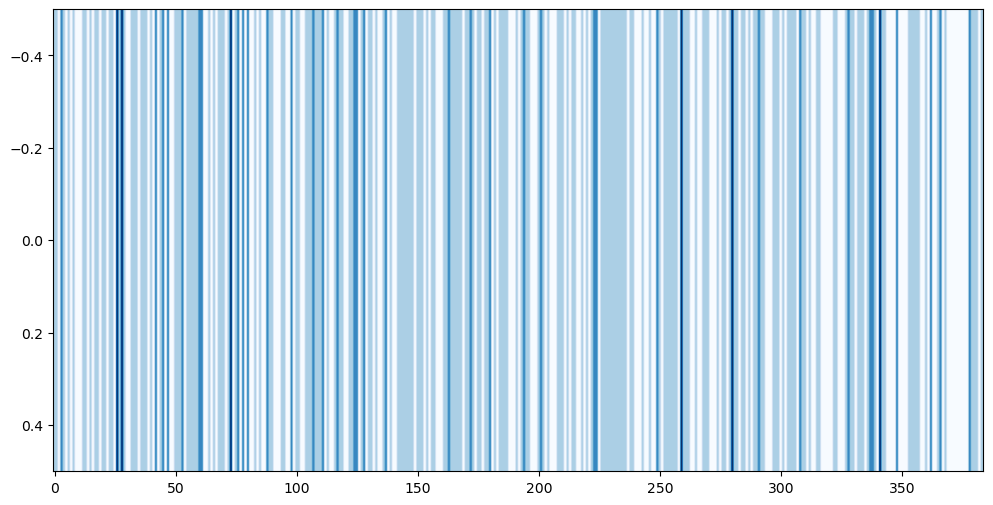

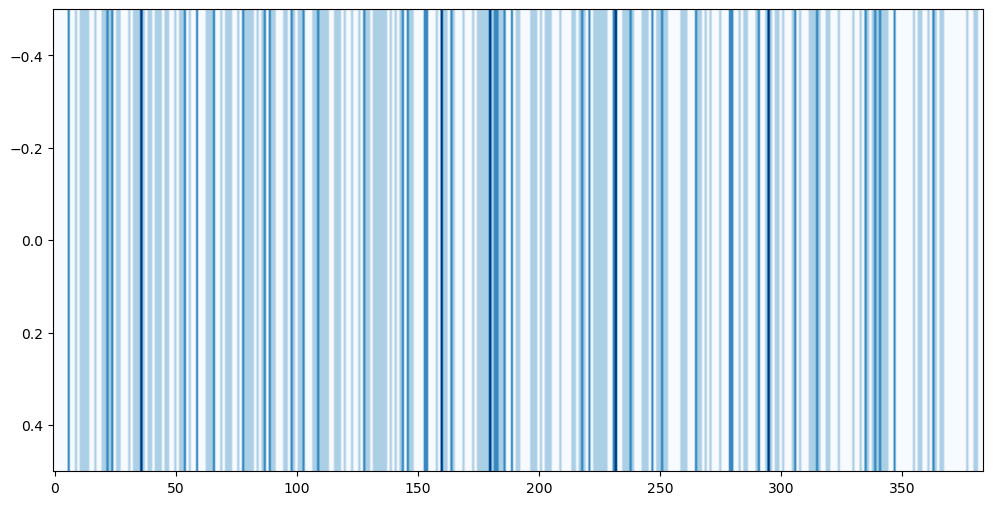

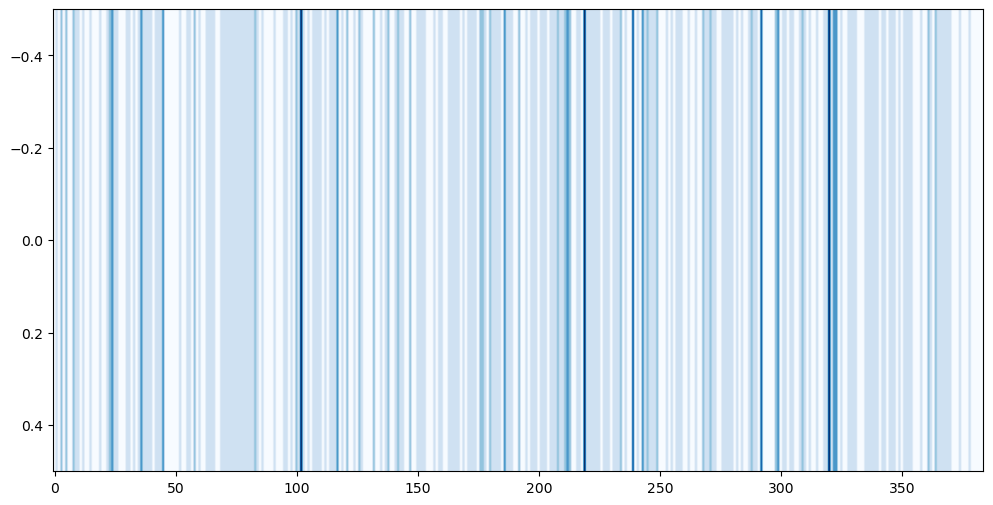

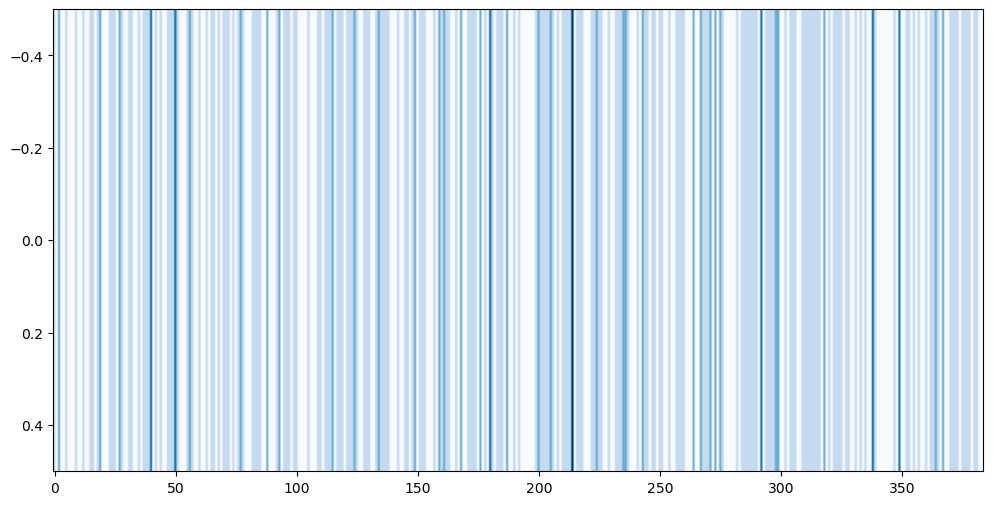

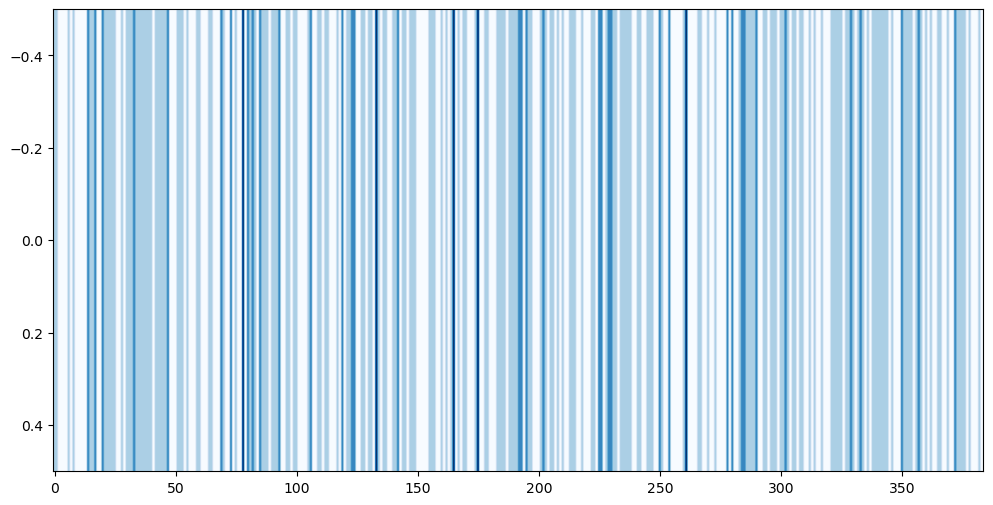

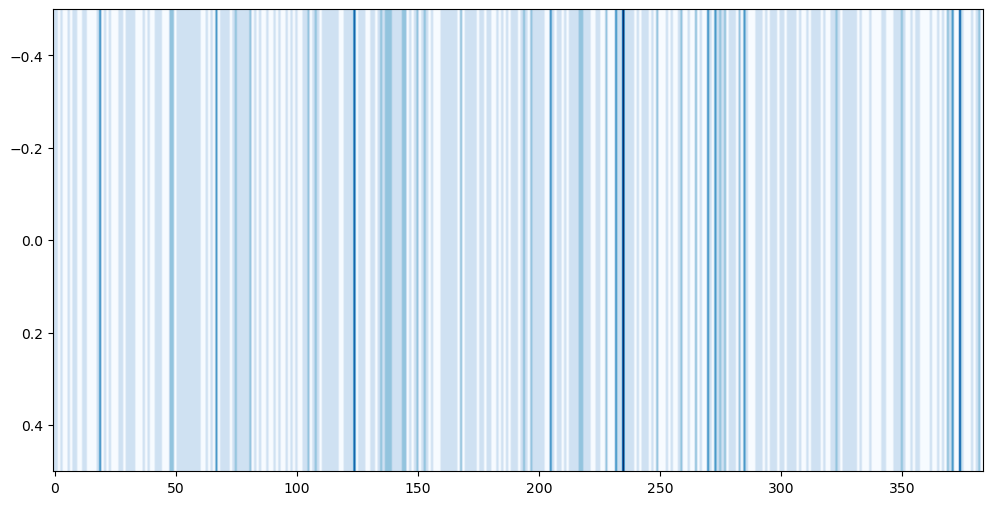

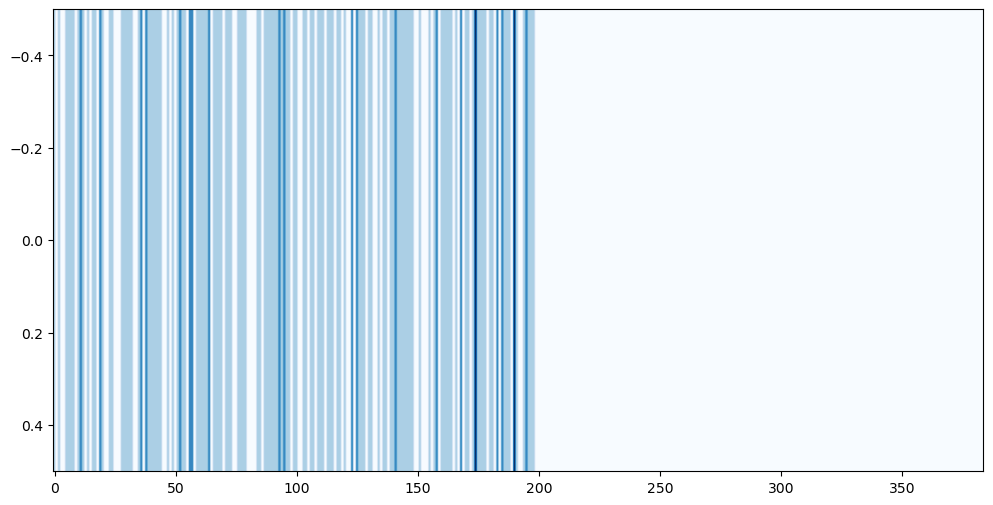

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# create a list of all possible wells
all_wells = [f"{c}{n:02}" for c in "ABCDEFGHIJKLMNOP" for n in range(1, 25)]

# group the dataframe by plate and count the number of occurrences of each well
plate_counts = dfclean2.groupby('plate')['well'].value_counts()

# iterate over each plate
for plate in dfclean2['plate'].unique():
    # create a dataframe with all possible wells set to 0
    plate_df = pd.DataFrame(0, index=[plate], columns=all_wells)
    
    # get the counts for the current plate
    counts = plate_counts[plate]
    
    # iterate over the counts and update the plate dataframe
    for well, count in counts.iteritems():
        plate_df.loc[plate, well] = count
    
    # calculate the missing and excess wells
    missing = set(all_wells) - set(counts.index)
    excess = set(counts.index) - set(all_wells)
    
    # update the plate dataframe with the missing and excess counts
    for well in missing:
        plate_df.loc[plate, well] = 0
        
    # calculate the summary number for the plate
    summary = plate_df.sum().sum()
    
    # plot the current plate dataframe
    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(plate_df, cmap='Blues', aspect='auto', vmin=0, vmax=plate_df.values.max())
   


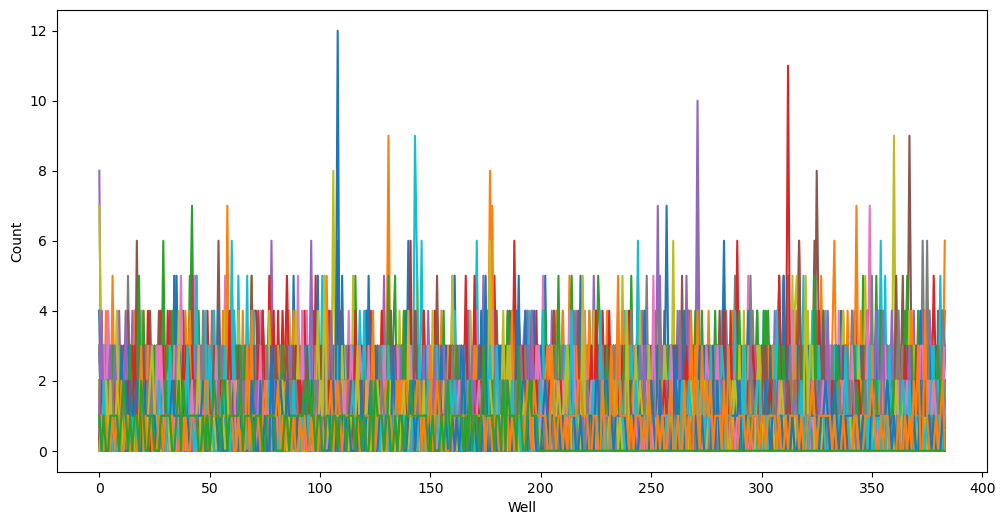

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# create a list of all possible wells
all_wells = [f"{c}{n:02}" for c in "ABCDEFGHIJKLMNOP" for n in range(1, 25)]

# group the dataframe by plate and count the number of occurrences of each well
plate_counts = dfclean2.groupby('plate')['well'].value_counts()

# create a single axes object for all plates
fig, ax = plt.subplots(figsize=(12, 6))

# iterate over each plate and plot it as a line on the same plot
for plate in dfclean2['plate'].unique():
    # create a dataframe with all possible wells set to 0
    plate_df = pd.DataFrame(0, index=[plate], columns=all_wells)
    
    # get the counts for the current plate
    counts = plate_counts[plate]
    
    # iterate over the counts and update the plate dataframe
    for well, count in counts.iteritems():
        plate_df.loc[plate, well] = count
    
    # calculate the missing and excess wells
    missing = set(all_wells) - set(counts.index)
    excess = set(counts.index) - set(all_wells)
    
    # update the plate dataframe with the missing and excess counts
    for well in missing:
        plate_df.loc[plate, well] = 0
        
    # calculate the summary number for the plate
    summary = plate_df.sum().sum()
    
    # plot the current plate dataframe as a line on the same plot
    x = np.arange(len(all_wells))
    y = plate_df.values.flatten()
    ax.plot(x, y, label=f"Plate {plate} (summary: {summary})")

# add a legend and axis labels

ax.set_xlabel('Well')
ax.set_ylabel('Count')

# show the final plot
plt.show()
